In [1]:
import pickle
from gcn import *
import torch
import numpy as np

/Users/janneke/opt/anaconda3/envs/CF-GNNExplainer/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Training the GCN models (and saving them) - for later use

### Read in data

In [2]:
with open('data/syn1.pickle','rb') as pickle_file: 
    data_syn1 = pickle.load(pickle_file)

with open('data/syn4.pickle','rb') as pickle_file:
    data_syn4 = pickle.load(pickle_file)
    
with open('data/syn5.pickle','rb') as pickle_file:
    data_syn5 = pickle.load(pickle_file)

### Put data into tensors

In [3]:
# squeeze the labels (as it has a singleton dim and then make it a tensor)
labels_syn1 = np.squeeze(data_syn1['labels'])
labels_syn1 = torch.tensor(labels_syn1)

labels_syn4 = np.squeeze(data_syn4['labels'])
labels_syn4 = torch.tensor(labels_syn4)

labels_syn5 = np.squeeze(data_syn5['labels'])
labels_syn5 = torch.tensor(labels_syn5)

# same for features, but define the type of data here
features_syn1 = np.squeeze(data_syn1['feat'])
features_syn1 = torch.tensor(features_syn1, dtype=torch.float)

features_syn4 = np.squeeze(data_syn4['feat'])
features_syn4 = torch.tensor(features_syn4, dtype=torch.float)

features_syn5 = np.squeeze(data_syn5['feat'])
features_syn5 = torch.tensor(features_syn5, dtype=torch.float)

# adjacency matrix will be turned into a tensor later on
adjacency_matrix_syn1 = np.squeeze(data_syn1['adj'])
adjacency_matrix_syn4 = np.squeeze(data_syn4['adj'])
adjacency_matrix_syn5 = np.squeeze(data_syn5['adj'])

# the indices are already a list --> but have to split the training data in training and validation data first
train_indices_full_syn1 = torch.tensor(data_syn1['train_idx'])
train_indices_full_syn4 = torch.tensor(data_syn4['train_idx'])
train_indices_full_syn5 = torch.tensor(data_syn5['train_idx'])

# split in training and validation indices
train_indices_syn1, validation_indices_syn1 = torch.utils.data.random_split(train_indices_full_syn1, [0.8, 0.2], generator=torch.Generator().manual_seed(42))
train_indices_syn4, validation_indices_syn4 = torch.utils.data.random_split(train_indices_full_syn4, [0.8, 0.2], generator=torch.Generator().manual_seed(42))
train_indices_syn5, validation_indices_syn5 = torch.utils.data.random_split(train_indices_full_syn5, [0.8, 0.2], generator=torch.Generator().manual_seed(42))

test_indices_syn1 = torch.tensor(data_syn1['test_idx'])
test_indices_syn4 = torch.tensor(data_syn4['test_idx'])
test_indices_syn5 = torch.tensor(data_syn5['test_idx'])

## Train the model

In [4]:
for type_gcn in ["basic", "linear"]:
    # set seed for reproducibility!
    np.random.seed(42)
    torch.manual_seed(42)
    
    if type_gcn == "basic":
        val_acc_lists_basic1 = []
        train_loss_lists_basic1 = []
    elif type_gcn == "linear":
        val_acc_lists_lin1 = []
        train_loss_lists_lin1 = []
    
    for i in range(10):
        train_loss_syn1, validation_acc_syn1, syn_1_model = train_gcn(adjacency_matrix_syn1, features_syn1, labels_syn1, train_indices_syn1, validation_indices_syn1, type_gcn=type_gcn, initialization="new")
        
        if type_gcn == "basic":
            val_acc_lists_basic1.append(validation_acc_syn1)
            train_loss_lists_basic1.append(train_loss_syn1)
        elif type_gcn == "linear":
            val_acc_lists_lin1.append(validation_acc_syn1)
            train_loss_lists_lin1.append(train_loss_syn1)

/Users/janneke/Documents/GitHub/CF-GNNExplainer-recreation/gcn.py:159: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525473998/work/torch/csrc/utils/tensor_new.cpp:233.)
  A_hat = torch.sparse_coo_tensor((A_hat.row, A_hat.col), A_hat.data, dtype=torch.float)


Epoch:  0  , accuracy =  0.15178571428571427
Epoch:  1  , accuracy =  0.15178571428571427
Epoch:  2  , accuracy =  0.15178571428571427
Epoch:  3  , accuracy =  0.15178571428571427
Epoch:  4  , accuracy =  0.15178571428571427
Epoch:  5  , accuracy =  0.15178571428571427
Epoch:  6  , accuracy =  0.15178571428571427
Epoch:  7  , accuracy =  0.15178571428571427
Epoch:  8  , accuracy =  0.15178571428571427
Epoch:  9  , accuracy =  0.15178571428571427
Epoch:  10  , accuracy =  0.15178571428571427
Epoch:  11  , accuracy =  0.15178571428571427
Epoch:  12  , accuracy =  0.15178571428571427
Epoch:  13  , accuracy =  0.15178571428571427
Epoch:  14  , accuracy =  0.15178571428571427
Epoch:  15  , accuracy =  0.15178571428571427
Epoch:  16  , accuracy =  0.15178571428571427
Epoch:  17  , accuracy =  0.15178571428571427
Epoch:  18  , accuracy =  0.15178571428571427
Epoch:  19  , accuracy =  0.15178571428571427
Epoch:  20  , accuracy =  0.15178571428571427
Epoch:  21  , accuracy =  0.1517857142857142

Epoch:  208  , accuracy =  0.35714285714285715
Epoch:  209  , accuracy =  0.35714285714285715
Epoch:  210  , accuracy =  0.35714285714285715
Epoch:  211  , accuracy =  0.35714285714285715
Epoch:  212  , accuracy =  0.35714285714285715
Epoch:  213  , accuracy =  0.35714285714285715
Epoch:  214  , accuracy =  0.35714285714285715
Epoch:  215  , accuracy =  0.35714285714285715
Epoch:  216  , accuracy =  0.35714285714285715
Epoch:  217  , accuracy =  0.35714285714285715
Epoch:  218  , accuracy =  0.35714285714285715
Epoch:  219  , accuracy =  0.35714285714285715
Epoch:  220  , accuracy =  0.35714285714285715
Epoch:  221  , accuracy =  0.35714285714285715
Epoch:  222  , accuracy =  0.35714285714285715
Epoch:  223  , accuracy =  0.35714285714285715
Epoch:  224  , accuracy =  0.35714285714285715
Epoch:  225  , accuracy =  0.35714285714285715
Epoch:  226  , accuracy =  0.35714285714285715
Epoch:  227  , accuracy =  0.35714285714285715
Epoch:  228  , accuracy =  0.35714285714285715
Epoch:  229  

Epoch:  401  , accuracy =  0.35714285714285715
Epoch:  402  , accuracy =  0.35714285714285715
Epoch:  403  , accuracy =  0.35714285714285715
Epoch:  404  , accuracy =  0.35714285714285715
Epoch:  405  , accuracy =  0.35714285714285715
Epoch:  406  , accuracy =  0.35714285714285715
Epoch:  407  , accuracy =  0.35714285714285715
Epoch:  408  , accuracy =  0.35714285714285715
Epoch:  409  , accuracy =  0.35714285714285715
Epoch:  410  , accuracy =  0.35714285714285715
Epoch:  411  , accuracy =  0.35714285714285715
Epoch:  412  , accuracy =  0.35714285714285715
Epoch:  413  , accuracy =  0.35714285714285715
Epoch:  414  , accuracy =  0.35714285714285715
Epoch:  415  , accuracy =  0.35714285714285715
Epoch:  416  , accuracy =  0.35714285714285715
Epoch:  417  , accuracy =  0.35714285714285715
Epoch:  418  , accuracy =  0.35714285714285715
Epoch:  419  , accuracy =  0.35714285714285715
Epoch:  420  , accuracy =  0.35714285714285715
Epoch:  421  , accuracy =  0.35714285714285715
Epoch:  422  

Epoch:  592  , accuracy =  0.44642857142857145
Epoch:  593  , accuracy =  0.5178571428571429
Epoch:  594  , accuracy =  0.5446428571428571
Epoch:  595  , accuracy =  0.5446428571428571
Epoch:  596  , accuracy =  0.5178571428571429
Epoch:  597  , accuracy =  0.5
Epoch:  598  , accuracy =  0.5
Epoch:  599  , accuracy =  0.5
Epoch:  600  , accuracy =  0.5357142857142857
Epoch:  601  , accuracy =  0.5446428571428571
Epoch:  602  , accuracy =  0.5446428571428571
Epoch:  603  , accuracy =  0.5357142857142857
Epoch:  604  , accuracy =  0.5357142857142857
Epoch:  605  , accuracy =  0.5178571428571429
Epoch:  606  , accuracy =  0.5178571428571429
Epoch:  607  , accuracy =  0.5357142857142857
Epoch:  608  , accuracy =  0.5357142857142857
Epoch:  609  , accuracy =  0.5357142857142857
Epoch:  610  , accuracy =  0.5357142857142857
Epoch:  611  , accuracy =  0.5357142857142857
Epoch:  612  , accuracy =  0.5357142857142857
Epoch:  613  , accuracy =  0.5625
Epoch:  614  , accuracy =  0.571428571428571

Epoch:  818  , accuracy =  0.625
Epoch:  819  , accuracy =  0.625
Epoch:  820  , accuracy =  0.6339285714285714
Epoch:  821  , accuracy =  0.6339285714285714
Epoch:  822  , accuracy =  0.625
Epoch:  823  , accuracy =  0.625
Epoch:  824  , accuracy =  0.625
Epoch:  825  , accuracy =  0.625
Epoch:  826  , accuracy =  0.625
Epoch:  827  , accuracy =  0.625
Epoch:  828  , accuracy =  0.6339285714285714
Epoch:  829  , accuracy =  0.6339285714285714
Epoch:  830  , accuracy =  0.625
Epoch:  831  , accuracy =  0.625
Epoch:  832  , accuracy =  0.6339285714285714
Epoch:  833  , accuracy =  0.6339285714285714
Epoch:  834  , accuracy =  0.6339285714285714
Epoch:  835  , accuracy =  0.625
Epoch:  836  , accuracy =  0.625
Epoch:  837  , accuracy =  0.6339285714285714
Epoch:  838  , accuracy =  0.6339285714285714
Epoch:  839  , accuracy =  0.6339285714285714
Epoch:  840  , accuracy =  0.6339285714285714
Epoch:  841  , accuracy =  0.6339285714285714
Epoch:  842  , accuracy =  0.6339285714285714
Epoch:

Epoch:  14  , accuracy =  0.15178571428571427
Epoch:  15  , accuracy =  0.15178571428571427
Epoch:  16  , accuracy =  0.15178571428571427
Epoch:  17  , accuracy =  0.14285714285714285
Epoch:  18  , accuracy =  0.20535714285714285
Epoch:  19  , accuracy =  0.21428571428571427
Epoch:  20  , accuracy =  0.21428571428571427
Epoch:  21  , accuracy =  0.21428571428571427
Epoch:  22  , accuracy =  0.21428571428571427
Epoch:  23  , accuracy =  0.21428571428571427
Epoch:  24  , accuracy =  0.21428571428571427
Epoch:  25  , accuracy =  0.21428571428571427
Epoch:  26  , accuracy =  0.22321428571428573
Epoch:  27  , accuracy =  0.22321428571428573
Epoch:  28  , accuracy =  0.23214285714285715
Epoch:  29  , accuracy =  0.25
Epoch:  30  , accuracy =  0.26785714285714285
Epoch:  31  , accuracy =  0.2857142857142857
Epoch:  32  , accuracy =  0.32142857142857145
Epoch:  33  , accuracy =  0.3482142857142857
Epoch:  34  , accuracy =  0.38392857142857145
Epoch:  35  , accuracy =  0.3125
Epoch:  36  , accu

Epoch:  206  , accuracy =  0.35714285714285715
Epoch:  207  , accuracy =  0.35714285714285715
Epoch:  208  , accuracy =  0.35714285714285715
Epoch:  209  , accuracy =  0.35714285714285715
Epoch:  210  , accuracy =  0.35714285714285715
Epoch:  211  , accuracy =  0.35714285714285715
Epoch:  212  , accuracy =  0.35714285714285715
Epoch:  213  , accuracy =  0.35714285714285715
Epoch:  214  , accuracy =  0.35714285714285715
Epoch:  215  , accuracy =  0.35714285714285715
Epoch:  216  , accuracy =  0.35714285714285715
Epoch:  217  , accuracy =  0.35714285714285715
Epoch:  218  , accuracy =  0.35714285714285715
Epoch:  219  , accuracy =  0.35714285714285715
Epoch:  220  , accuracy =  0.35714285714285715
Epoch:  221  , accuracy =  0.35714285714285715
Epoch:  222  , accuracy =  0.35714285714285715
Epoch:  223  , accuracy =  0.35714285714285715
Epoch:  224  , accuracy =  0.35714285714285715
Epoch:  225  , accuracy =  0.35714285714285715
Epoch:  226  , accuracy =  0.35714285714285715
Epoch:  227  

Epoch:  403  , accuracy =  0.35714285714285715
Epoch:  404  , accuracy =  0.35714285714285715
Epoch:  405  , accuracy =  0.35714285714285715
Epoch:  406  , accuracy =  0.35714285714285715
Epoch:  407  , accuracy =  0.35714285714285715
Epoch:  408  , accuracy =  0.35714285714285715
Epoch:  409  , accuracy =  0.35714285714285715
Epoch:  410  , accuracy =  0.35714285714285715
Epoch:  411  , accuracy =  0.35714285714285715
Epoch:  412  , accuracy =  0.35714285714285715
Epoch:  413  , accuracy =  0.35714285714285715
Epoch:  414  , accuracy =  0.35714285714285715
Epoch:  415  , accuracy =  0.35714285714285715
Epoch:  416  , accuracy =  0.35714285714285715
Epoch:  417  , accuracy =  0.35714285714285715
Epoch:  418  , accuracy =  0.35714285714285715
Epoch:  419  , accuracy =  0.35714285714285715
Epoch:  420  , accuracy =  0.35714285714285715
Epoch:  421  , accuracy =  0.35714285714285715
Epoch:  422  , accuracy =  0.35714285714285715
Epoch:  423  , accuracy =  0.35714285714285715
Epoch:  424  

Epoch:  598  , accuracy =  0.8303571428571429
Epoch:  599  , accuracy =  0.8303571428571429
Epoch:  600  , accuracy =  0.8303571428571429
Epoch:  601  , accuracy =  0.8214285714285714
Epoch:  602  , accuracy =  0.8214285714285714
Epoch:  603  , accuracy =  0.8303571428571429
Epoch:  604  , accuracy =  0.8482142857142857
Epoch:  605  , accuracy =  0.8303571428571429
Epoch:  606  , accuracy =  0.8303571428571429
Epoch:  607  , accuracy =  0.8214285714285714
Epoch:  608  , accuracy =  0.8303571428571429
Epoch:  609  , accuracy =  0.8303571428571429
Epoch:  610  , accuracy =  0.8303571428571429
Epoch:  611  , accuracy =  0.8482142857142857
Epoch:  612  , accuracy =  0.8482142857142857
Epoch:  613  , accuracy =  0.8303571428571429
Epoch:  614  , accuracy =  0.8303571428571429
Epoch:  615  , accuracy =  0.8303571428571429
Epoch:  616  , accuracy =  0.8482142857142857
Epoch:  617  , accuracy =  0.8482142857142857
Epoch:  618  , accuracy =  0.8482142857142857
Epoch:  619  , accuracy =  0.83928

Epoch:  796  , accuracy =  0.8482142857142857
Epoch:  797  , accuracy =  0.8482142857142857
Epoch:  798  , accuracy =  0.8482142857142857
Epoch:  799  , accuracy =  0.8482142857142857
Epoch:  800  , accuracy =  0.8482142857142857
Epoch:  801  , accuracy =  0.8482142857142857
Epoch:  802  , accuracy =  0.8482142857142857
Epoch:  803  , accuracy =  0.8482142857142857
Epoch:  804  , accuracy =  0.8482142857142857
Epoch:  805  , accuracy =  0.8482142857142857
Epoch:  806  , accuracy =  0.8482142857142857
Epoch:  807  , accuracy =  0.8482142857142857
Epoch:  808  , accuracy =  0.8482142857142857
Epoch:  809  , accuracy =  0.8482142857142857
Epoch:  810  , accuracy =  0.8482142857142857
Epoch:  811  , accuracy =  0.8482142857142857
Epoch:  812  , accuracy =  0.8482142857142857
Epoch:  813  , accuracy =  0.8482142857142857
Epoch:  814  , accuracy =  0.8482142857142857
Epoch:  815  , accuracy =  0.8482142857142857
Epoch:  816  , accuracy =  0.8482142857142857
Epoch:  817  , accuracy =  0.84821

Epoch:  980  , accuracy =  0.8482142857142857
Epoch:  981  , accuracy =  0.8482142857142857
Epoch:  982  , accuracy =  0.8482142857142857
Epoch:  983  , accuracy =  0.8482142857142857
Epoch:  984  , accuracy =  0.8482142857142857
Epoch:  985  , accuracy =  0.8482142857142857
Epoch:  986  , accuracy =  0.8482142857142857
Epoch:  987  , accuracy =  0.8482142857142857
Epoch:  988  , accuracy =  0.8482142857142857
Epoch:  989  , accuracy =  0.8482142857142857
Epoch:  990  , accuracy =  0.8482142857142857
Epoch:  991  , accuracy =  0.8482142857142857
Epoch:  992  , accuracy =  0.8482142857142857
Epoch:  993  , accuracy =  0.8482142857142857
Epoch:  994  , accuracy =  0.8482142857142857
Epoch:  995  , accuracy =  0.8482142857142857
Epoch:  996  , accuracy =  0.8482142857142857
Epoch:  997  , accuracy =  0.8482142857142857
Epoch:  998  , accuracy =  0.8482142857142857
Epoch:  999  , accuracy =  0.8482142857142857
Epoch:  0  , accuracy =  0.35714285714285715
Epoch:  1  , accuracy =  0.35714285

Epoch:  163  , accuracy =  0.35714285714285715
Epoch:  164  , accuracy =  0.35714285714285715
Epoch:  165  , accuracy =  0.35714285714285715
Epoch:  166  , accuracy =  0.35714285714285715
Epoch:  167  , accuracy =  0.35714285714285715
Epoch:  168  , accuracy =  0.35714285714285715
Epoch:  169  , accuracy =  0.35714285714285715
Epoch:  170  , accuracy =  0.35714285714285715
Epoch:  171  , accuracy =  0.35714285714285715
Epoch:  172  , accuracy =  0.35714285714285715
Epoch:  173  , accuracy =  0.35714285714285715
Epoch:  174  , accuracy =  0.35714285714285715
Epoch:  175  , accuracy =  0.35714285714285715
Epoch:  176  , accuracy =  0.35714285714285715
Epoch:  177  , accuracy =  0.35714285714285715
Epoch:  178  , accuracy =  0.35714285714285715
Epoch:  179  , accuracy =  0.35714285714285715
Epoch:  180  , accuracy =  0.35714285714285715
Epoch:  181  , accuracy =  0.35714285714285715
Epoch:  182  , accuracy =  0.35714285714285715
Epoch:  183  , accuracy =  0.35714285714285715
Epoch:  184  

Epoch:  348  , accuracy =  0.625
Epoch:  349  , accuracy =  0.6071428571428571
Epoch:  350  , accuracy =  0.5803571428571429
Epoch:  351  , accuracy =  0.6428571428571429
Epoch:  352  , accuracy =  0.6607142857142857
Epoch:  353  , accuracy =  0.5982142857142857
Epoch:  354  , accuracy =  0.5714285714285714
Epoch:  355  , accuracy =  0.5714285714285714
Epoch:  356  , accuracy =  0.5982142857142857
Epoch:  357  , accuracy =  0.5803571428571429
Epoch:  358  , accuracy =  0.5803571428571429
Epoch:  359  , accuracy =  0.6339285714285714
Epoch:  360  , accuracy =  0.6607142857142857
Epoch:  361  , accuracy =  0.6517857142857143
Epoch:  362  , accuracy =  0.6607142857142857
Epoch:  363  , accuracy =  0.6517857142857143
Epoch:  364  , accuracy =  0.6339285714285714
Epoch:  365  , accuracy =  0.6428571428571429
Epoch:  366  , accuracy =  0.6696428571428571
Epoch:  367  , accuracy =  0.6696428571428571
Epoch:  368  , accuracy =  0.6517857142857143
Epoch:  369  , accuracy =  0.6607142857142857
E

Epoch:  540  , accuracy =  0.8303571428571429
Epoch:  541  , accuracy =  0.8392857142857143
Epoch:  542  , accuracy =  0.8482142857142857
Epoch:  543  , accuracy =  0.8482142857142857
Epoch:  544  , accuracy =  0.8303571428571429
Epoch:  545  , accuracy =  0.8392857142857143
Epoch:  546  , accuracy =  0.8392857142857143
Epoch:  547  , accuracy =  0.8303571428571429
Epoch:  548  , accuracy =  0.8303571428571429
Epoch:  549  , accuracy =  0.8482142857142857
Epoch:  550  , accuracy =  0.8303571428571429
Epoch:  551  , accuracy =  0.8392857142857143
Epoch:  552  , accuracy =  0.8482142857142857
Epoch:  553  , accuracy =  0.8482142857142857
Epoch:  554  , accuracy =  0.8482142857142857
Epoch:  555  , accuracy =  0.8392857142857143
Epoch:  556  , accuracy =  0.8303571428571429
Epoch:  557  , accuracy =  0.8303571428571429
Epoch:  558  , accuracy =  0.8482142857142857
Epoch:  559  , accuracy =  0.8482142857142857
Epoch:  560  , accuracy =  0.8214285714285714
Epoch:  561  , accuracy =  0.84821

Epoch:  733  , accuracy =  0.8482142857142857
Epoch:  734  , accuracy =  0.8392857142857143
Epoch:  735  , accuracy =  0.8482142857142857
Epoch:  736  , accuracy =  0.8392857142857143
Epoch:  737  , accuracy =  0.8392857142857143
Epoch:  738  , accuracy =  0.8392857142857143
Epoch:  739  , accuracy =  0.8392857142857143
Epoch:  740  , accuracy =  0.8482142857142857
Epoch:  741  , accuracy =  0.8482142857142857
Epoch:  742  , accuracy =  0.8392857142857143
Epoch:  743  , accuracy =  0.8392857142857143
Epoch:  744  , accuracy =  0.8482142857142857
Epoch:  745  , accuracy =  0.8392857142857143
Epoch:  746  , accuracy =  0.8392857142857143
Epoch:  747  , accuracy =  0.8392857142857143
Epoch:  748  , accuracy =  0.8392857142857143
Epoch:  749  , accuracy =  0.8392857142857143
Epoch:  750  , accuracy =  0.8392857142857143
Epoch:  751  , accuracy =  0.8392857142857143
Epoch:  752  , accuracy =  0.8392857142857143
Epoch:  753  , accuracy =  0.8392857142857143
Epoch:  754  , accuracy =  0.84821

Epoch:  932  , accuracy =  0.8392857142857143
Epoch:  933  , accuracy =  0.8303571428571429
Epoch:  934  , accuracy =  0.8392857142857143
Epoch:  935  , accuracy =  0.8303571428571429
Epoch:  936  , accuracy =  0.8392857142857143
Epoch:  937  , accuracy =  0.8392857142857143
Epoch:  938  , accuracy =  0.8303571428571429
Epoch:  939  , accuracy =  0.8392857142857143
Epoch:  940  , accuracy =  0.8392857142857143
Epoch:  941  , accuracy =  0.8392857142857143
Epoch:  942  , accuracy =  0.8392857142857143
Epoch:  943  , accuracy =  0.8392857142857143
Epoch:  944  , accuracy =  0.8392857142857143
Epoch:  945  , accuracy =  0.8392857142857143
Epoch:  946  , accuracy =  0.8392857142857143
Epoch:  947  , accuracy =  0.8303571428571429
Epoch:  948  , accuracy =  0.8392857142857143
Epoch:  949  , accuracy =  0.8392857142857143
Epoch:  950  , accuracy =  0.8303571428571429
Epoch:  951  , accuracy =  0.8303571428571429
Epoch:  952  , accuracy =  0.8392857142857143
Epoch:  953  , accuracy =  0.83928

Epoch:  130  , accuracy =  0.35714285714285715
Epoch:  131  , accuracy =  0.35714285714285715
Epoch:  132  , accuracy =  0.35714285714285715
Epoch:  133  , accuracy =  0.35714285714285715
Epoch:  134  , accuracy =  0.35714285714285715
Epoch:  135  , accuracy =  0.35714285714285715
Epoch:  136  , accuracy =  0.35714285714285715
Epoch:  137  , accuracy =  0.35714285714285715
Epoch:  138  , accuracy =  0.35714285714285715
Epoch:  139  , accuracy =  0.35714285714285715
Epoch:  140  , accuracy =  0.35714285714285715
Epoch:  141  , accuracy =  0.35714285714285715
Epoch:  142  , accuracy =  0.35714285714285715
Epoch:  143  , accuracy =  0.35714285714285715
Epoch:  144  , accuracy =  0.35714285714285715
Epoch:  145  , accuracy =  0.35714285714285715
Epoch:  146  , accuracy =  0.35714285714285715
Epoch:  147  , accuracy =  0.35714285714285715
Epoch:  148  , accuracy =  0.35714285714285715
Epoch:  149  , accuracy =  0.35714285714285715
Epoch:  150  , accuracy =  0.35714285714285715
Epoch:  151  

Epoch:  329  , accuracy =  0.35714285714285715
Epoch:  330  , accuracy =  0.35714285714285715
Epoch:  331  , accuracy =  0.35714285714285715
Epoch:  332  , accuracy =  0.35714285714285715
Epoch:  333  , accuracy =  0.35714285714285715
Epoch:  334  , accuracy =  0.35714285714285715
Epoch:  335  , accuracy =  0.35714285714285715
Epoch:  336  , accuracy =  0.35714285714285715
Epoch:  337  , accuracy =  0.35714285714285715
Epoch:  338  , accuracy =  0.35714285714285715
Epoch:  339  , accuracy =  0.35714285714285715
Epoch:  340  , accuracy =  0.35714285714285715
Epoch:  341  , accuracy =  0.35714285714285715
Epoch:  342  , accuracy =  0.35714285714285715
Epoch:  343  , accuracy =  0.35714285714285715
Epoch:  344  , accuracy =  0.35714285714285715
Epoch:  345  , accuracy =  0.35714285714285715
Epoch:  346  , accuracy =  0.35714285714285715
Epoch:  347  , accuracy =  0.35714285714285715
Epoch:  348  , accuracy =  0.35714285714285715
Epoch:  349  , accuracy =  0.35714285714285715
Epoch:  350  

Epoch:  525  , accuracy =  0.6339285714285714
Epoch:  526  , accuracy =  0.625
Epoch:  527  , accuracy =  0.625
Epoch:  528  , accuracy =  0.625
Epoch:  529  , accuracy =  0.625
Epoch:  530  , accuracy =  0.625
Epoch:  531  , accuracy =  0.625
Epoch:  532  , accuracy =  0.625
Epoch:  533  , accuracy =  0.625
Epoch:  534  , accuracy =  0.625
Epoch:  535  , accuracy =  0.625
Epoch:  536  , accuracy =  0.625
Epoch:  537  , accuracy =  0.625
Epoch:  538  , accuracy =  0.625
Epoch:  539  , accuracy =  0.6339285714285714
Epoch:  540  , accuracy =  0.6517857142857143
Epoch:  541  , accuracy =  0.6517857142857143
Epoch:  542  , accuracy =  0.6517857142857143
Epoch:  543  , accuracy =  0.6517857142857143
Epoch:  544  , accuracy =  0.6517857142857143
Epoch:  545  , accuracy =  0.6517857142857143
Epoch:  546  , accuracy =  0.6517857142857143
Epoch:  547  , accuracy =  0.6517857142857143
Epoch:  548  , accuracy =  0.6607142857142857
Epoch:  549  , accuracy =  0.6517857142857143
Epoch:  550  , accu

Epoch:  715  , accuracy =  0.8482142857142857
Epoch:  716  , accuracy =  0.8482142857142857
Epoch:  717  , accuracy =  0.8482142857142857
Epoch:  718  , accuracy =  0.8482142857142857
Epoch:  719  , accuracy =  0.8482142857142857
Epoch:  720  , accuracy =  0.8482142857142857
Epoch:  721  , accuracy =  0.8482142857142857
Epoch:  722  , accuracy =  0.8482142857142857
Epoch:  723  , accuracy =  0.8482142857142857
Epoch:  724  , accuracy =  0.8482142857142857
Epoch:  725  , accuracy =  0.8482142857142857
Epoch:  726  , accuracy =  0.8482142857142857
Epoch:  727  , accuracy =  0.8482142857142857
Epoch:  728  , accuracy =  0.8482142857142857
Epoch:  729  , accuracy =  0.8482142857142857
Epoch:  730  , accuracy =  0.8482142857142857
Epoch:  731  , accuracy =  0.8482142857142857
Epoch:  732  , accuracy =  0.8482142857142857
Epoch:  733  , accuracy =  0.8482142857142857
Epoch:  734  , accuracy =  0.8482142857142857
Epoch:  735  , accuracy =  0.8482142857142857
Epoch:  736  , accuracy =  0.84821

Epoch:  912  , accuracy =  0.8392857142857143
Epoch:  913  , accuracy =  0.8392857142857143
Epoch:  914  , accuracy =  0.8392857142857143
Epoch:  915  , accuracy =  0.8482142857142857
Epoch:  916  , accuracy =  0.8482142857142857
Epoch:  917  , accuracy =  0.8482142857142857
Epoch:  918  , accuracy =  0.8482142857142857
Epoch:  919  , accuracy =  0.8482142857142857
Epoch:  920  , accuracy =  0.8392857142857143
Epoch:  921  , accuracy =  0.8392857142857143
Epoch:  922  , accuracy =  0.8392857142857143
Epoch:  923  , accuracy =  0.8482142857142857
Epoch:  924  , accuracy =  0.8482142857142857
Epoch:  925  , accuracy =  0.8392857142857143
Epoch:  926  , accuracy =  0.8392857142857143
Epoch:  927  , accuracy =  0.8482142857142857
Epoch:  928  , accuracy =  0.8482142857142857
Epoch:  929  , accuracy =  0.8482142857142857
Epoch:  930  , accuracy =  0.8392857142857143
Epoch:  931  , accuracy =  0.8392857142857143
Epoch:  932  , accuracy =  0.8392857142857143
Epoch:  933  , accuracy =  0.83928

Epoch:  108  , accuracy =  0.35714285714285715
Epoch:  109  , accuracy =  0.35714285714285715
Epoch:  110  , accuracy =  0.35714285714285715
Epoch:  111  , accuracy =  0.35714285714285715
Epoch:  112  , accuracy =  0.35714285714285715
Epoch:  113  , accuracy =  0.35714285714285715
Epoch:  114  , accuracy =  0.35714285714285715
Epoch:  115  , accuracy =  0.35714285714285715
Epoch:  116  , accuracy =  0.35714285714285715
Epoch:  117  , accuracy =  0.35714285714285715
Epoch:  118  , accuracy =  0.35714285714285715
Epoch:  119  , accuracy =  0.35714285714285715
Epoch:  120  , accuracy =  0.35714285714285715
Epoch:  121  , accuracy =  0.35714285714285715
Epoch:  122  , accuracy =  0.35714285714285715
Epoch:  123  , accuracy =  0.35714285714285715
Epoch:  124  , accuracy =  0.35714285714285715
Epoch:  125  , accuracy =  0.35714285714285715
Epoch:  126  , accuracy =  0.35714285714285715
Epoch:  127  , accuracy =  0.35714285714285715
Epoch:  128  , accuracy =  0.35714285714285715
Epoch:  129  

Epoch:  303  , accuracy =  0.35714285714285715
Epoch:  304  , accuracy =  0.35714285714285715
Epoch:  305  , accuracy =  0.35714285714285715
Epoch:  306  , accuracy =  0.35714285714285715
Epoch:  307  , accuracy =  0.35714285714285715
Epoch:  308  , accuracy =  0.35714285714285715
Epoch:  309  , accuracy =  0.35714285714285715
Epoch:  310  , accuracy =  0.35714285714285715
Epoch:  311  , accuracy =  0.35714285714285715
Epoch:  312  , accuracy =  0.35714285714285715
Epoch:  313  , accuracy =  0.35714285714285715
Epoch:  314  , accuracy =  0.35714285714285715
Epoch:  315  , accuracy =  0.35714285714285715
Epoch:  316  , accuracy =  0.35714285714285715
Epoch:  317  , accuracy =  0.35714285714285715
Epoch:  318  , accuracy =  0.35714285714285715
Epoch:  319  , accuracy =  0.35714285714285715
Epoch:  320  , accuracy =  0.35714285714285715
Epoch:  321  , accuracy =  0.35714285714285715
Epoch:  322  , accuracy =  0.35714285714285715
Epoch:  323  , accuracy =  0.35714285714285715
Epoch:  324  

Epoch:  500  , accuracy =  0.5625
Epoch:  501  , accuracy =  0.5535714285714286
Epoch:  502  , accuracy =  0.5535714285714286
Epoch:  503  , accuracy =  0.5535714285714286
Epoch:  504  , accuracy =  0.5535714285714286
Epoch:  505  , accuracy =  0.5625
Epoch:  506  , accuracy =  0.5714285714285714
Epoch:  507  , accuracy =  0.5803571428571429
Epoch:  508  , accuracy =  0.5803571428571429
Epoch:  509  , accuracy =  0.5625
Epoch:  510  , accuracy =  0.5803571428571429
Epoch:  511  , accuracy =  0.5892857142857143
Epoch:  512  , accuracy =  0.5803571428571429
Epoch:  513  , accuracy =  0.5892857142857143
Epoch:  514  , accuracy =  0.5892857142857143
Epoch:  515  , accuracy =  0.625
Epoch:  516  , accuracy =  0.6339285714285714
Epoch:  517  , accuracy =  0.6428571428571429
Epoch:  518  , accuracy =  0.6517857142857143
Epoch:  519  , accuracy =  0.6428571428571429
Epoch:  520  , accuracy =  0.6339285714285714
Epoch:  521  , accuracy =  0.6696428571428571
Epoch:  522  , accuracy =  0.65178571

Epoch:  698  , accuracy =  0.8214285714285714
Epoch:  699  , accuracy =  0.8303571428571429
Epoch:  700  , accuracy =  0.8482142857142857
Epoch:  701  , accuracy =  0.8482142857142857
Epoch:  702  , accuracy =  0.8303571428571429
Epoch:  703  , accuracy =  0.8303571428571429
Epoch:  704  , accuracy =  0.8392857142857143
Epoch:  705  , accuracy =  0.8482142857142857
Epoch:  706  , accuracy =  0.8482142857142857
Epoch:  707  , accuracy =  0.8392857142857143
Epoch:  708  , accuracy =  0.8303571428571429
Epoch:  709  , accuracy =  0.8303571428571429
Epoch:  710  , accuracy =  0.8392857142857143
Epoch:  711  , accuracy =  0.8482142857142857
Epoch:  712  , accuracy =  0.8392857142857143
Epoch:  713  , accuracy =  0.8392857142857143
Epoch:  714  , accuracy =  0.8392857142857143
Epoch:  715  , accuracy =  0.8392857142857143
Epoch:  716  , accuracy =  0.8392857142857143
Epoch:  717  , accuracy =  0.8392857142857143
Epoch:  718  , accuracy =  0.8392857142857143
Epoch:  719  , accuracy =  0.83928

Epoch:  898  , accuracy =  0.8482142857142857
Epoch:  899  , accuracy =  0.8482142857142857
Epoch:  900  , accuracy =  0.8482142857142857
Epoch:  901  , accuracy =  0.8482142857142857
Epoch:  902  , accuracy =  0.8482142857142857
Epoch:  903  , accuracy =  0.8482142857142857
Epoch:  904  , accuracy =  0.8482142857142857
Epoch:  905  , accuracy =  0.8482142857142857
Epoch:  906  , accuracy =  0.8482142857142857
Epoch:  907  , accuracy =  0.8482142857142857
Epoch:  908  , accuracy =  0.8392857142857143
Epoch:  909  , accuracy =  0.8392857142857143
Epoch:  910  , accuracy =  0.8482142857142857
Epoch:  911  , accuracy =  0.8482142857142857
Epoch:  912  , accuracy =  0.8392857142857143
Epoch:  913  , accuracy =  0.8482142857142857
Epoch:  914  , accuracy =  0.8482142857142857
Epoch:  915  , accuracy =  0.8482142857142857
Epoch:  916  , accuracy =  0.8482142857142857
Epoch:  917  , accuracy =  0.8482142857142857
Epoch:  918  , accuracy =  0.8482142857142857
Epoch:  919  , accuracy =  0.83928

Epoch:  94  , accuracy =  0.35714285714285715
Epoch:  95  , accuracy =  0.35714285714285715
Epoch:  96  , accuracy =  0.35714285714285715
Epoch:  97  , accuracy =  0.35714285714285715
Epoch:  98  , accuracy =  0.35714285714285715
Epoch:  99  , accuracy =  0.35714285714285715
Epoch:  100  , accuracy =  0.35714285714285715
Epoch:  101  , accuracy =  0.35714285714285715
Epoch:  102  , accuracy =  0.35714285714285715
Epoch:  103  , accuracy =  0.35714285714285715
Epoch:  104  , accuracy =  0.35714285714285715
Epoch:  105  , accuracy =  0.35714285714285715
Epoch:  106  , accuracy =  0.35714285714285715
Epoch:  107  , accuracy =  0.35714285714285715
Epoch:  108  , accuracy =  0.35714285714285715
Epoch:  109  , accuracy =  0.35714285714285715
Epoch:  110  , accuracy =  0.35714285714285715
Epoch:  111  , accuracy =  0.35714285714285715
Epoch:  112  , accuracy =  0.35714285714285715
Epoch:  113  , accuracy =  0.35714285714285715
Epoch:  114  , accuracy =  0.35714285714285715
Epoch:  115  , accu

Epoch:  290  , accuracy =  0.35714285714285715
Epoch:  291  , accuracy =  0.35714285714285715
Epoch:  292  , accuracy =  0.35714285714285715
Epoch:  293  , accuracy =  0.35714285714285715
Epoch:  294  , accuracy =  0.35714285714285715
Epoch:  295  , accuracy =  0.35714285714285715
Epoch:  296  , accuracy =  0.35714285714285715
Epoch:  297  , accuracy =  0.35714285714285715
Epoch:  298  , accuracy =  0.35714285714285715
Epoch:  299  , accuracy =  0.35714285714285715
Epoch:  300  , accuracy =  0.35714285714285715
Epoch:  301  , accuracy =  0.35714285714285715
Epoch:  302  , accuracy =  0.35714285714285715
Epoch:  303  , accuracy =  0.35714285714285715
Epoch:  304  , accuracy =  0.35714285714285715
Epoch:  305  , accuracy =  0.35714285714285715
Epoch:  306  , accuracy =  0.35714285714285715
Epoch:  307  , accuracy =  0.35714285714285715
Epoch:  308  , accuracy =  0.35714285714285715
Epoch:  309  , accuracy =  0.35714285714285715
Epoch:  310  , accuracy =  0.35714285714285715
Epoch:  311  

Epoch:  479  , accuracy =  0.35714285714285715
Epoch:  480  , accuracy =  0.35714285714285715
Epoch:  481  , accuracy =  0.35714285714285715
Epoch:  482  , accuracy =  0.35714285714285715
Epoch:  483  , accuracy =  0.35714285714285715
Epoch:  484  , accuracy =  0.35714285714285715
Epoch:  485  , accuracy =  0.35714285714285715
Epoch:  486  , accuracy =  0.35714285714285715
Epoch:  487  , accuracy =  0.35714285714285715
Epoch:  488  , accuracy =  0.35714285714285715
Epoch:  489  , accuracy =  0.35714285714285715
Epoch:  490  , accuracy =  0.35714285714285715
Epoch:  491  , accuracy =  0.35714285714285715
Epoch:  492  , accuracy =  0.35714285714285715
Epoch:  493  , accuracy =  0.35714285714285715
Epoch:  494  , accuracy =  0.35714285714285715
Epoch:  495  , accuracy =  0.35714285714285715
Epoch:  496  , accuracy =  0.35714285714285715
Epoch:  497  , accuracy =  0.35714285714285715
Epoch:  498  , accuracy =  0.35714285714285715
Epoch:  499  , accuracy =  0.35714285714285715
Epoch:  500  

Epoch:  670  , accuracy =  0.625
Epoch:  671  , accuracy =  0.625
Epoch:  672  , accuracy =  0.625
Epoch:  673  , accuracy =  0.625
Epoch:  674  , accuracy =  0.625
Epoch:  675  , accuracy =  0.625
Epoch:  676  , accuracy =  0.625
Epoch:  677  , accuracy =  0.625
Epoch:  678  , accuracy =  0.625
Epoch:  679  , accuracy =  0.625
Epoch:  680  , accuracy =  0.625
Epoch:  681  , accuracy =  0.625
Epoch:  682  , accuracy =  0.625
Epoch:  683  , accuracy =  0.625
Epoch:  684  , accuracy =  0.625
Epoch:  685  , accuracy =  0.625
Epoch:  686  , accuracy =  0.625
Epoch:  687  , accuracy =  0.625
Epoch:  688  , accuracy =  0.625
Epoch:  689  , accuracy =  0.625
Epoch:  690  , accuracy =  0.625
Epoch:  691  , accuracy =  0.625
Epoch:  692  , accuracy =  0.625
Epoch:  693  , accuracy =  0.625
Epoch:  694  , accuracy =  0.625
Epoch:  695  , accuracy =  0.625
Epoch:  696  , accuracy =  0.625
Epoch:  697  , accuracy =  0.625
Epoch:  698  , accuracy =  0.625
Epoch:  699  , accuracy =  0.625
Epoch:  70

Epoch:  899  , accuracy =  0.75
Epoch:  900  , accuracy =  0.75
Epoch:  901  , accuracy =  0.7589285714285714
Epoch:  902  , accuracy =  0.75
Epoch:  903  , accuracy =  0.75
Epoch:  904  , accuracy =  0.7589285714285714
Epoch:  905  , accuracy =  0.7589285714285714
Epoch:  906  , accuracy =  0.7589285714285714
Epoch:  907  , accuracy =  0.7589285714285714
Epoch:  908  , accuracy =  0.7589285714285714
Epoch:  909  , accuracy =  0.7589285714285714
Epoch:  910  , accuracy =  0.7589285714285714
Epoch:  911  , accuracy =  0.7678571428571429
Epoch:  912  , accuracy =  0.7589285714285714
Epoch:  913  , accuracy =  0.7678571428571429
Epoch:  914  , accuracy =  0.7678571428571429
Epoch:  915  , accuracy =  0.7589285714285714
Epoch:  916  , accuracy =  0.7678571428571429
Epoch:  917  , accuracy =  0.7678571428571429
Epoch:  918  , accuracy =  0.7678571428571429
Epoch:  919  , accuracy =  0.7767857142857143
Epoch:  920  , accuracy =  0.7767857142857143
Epoch:  921  , accuracy =  0.776785714285714

Epoch:  92  , accuracy =  0.35714285714285715
Epoch:  93  , accuracy =  0.35714285714285715
Epoch:  94  , accuracy =  0.35714285714285715
Epoch:  95  , accuracy =  0.35714285714285715
Epoch:  96  , accuracy =  0.35714285714285715
Epoch:  97  , accuracy =  0.35714285714285715
Epoch:  98  , accuracy =  0.35714285714285715
Epoch:  99  , accuracy =  0.35714285714285715
Epoch:  100  , accuracy =  0.35714285714285715
Epoch:  101  , accuracy =  0.35714285714285715
Epoch:  102  , accuracy =  0.35714285714285715
Epoch:  103  , accuracy =  0.35714285714285715
Epoch:  104  , accuracy =  0.35714285714285715
Epoch:  105  , accuracy =  0.35714285714285715
Epoch:  106  , accuracy =  0.35714285714285715
Epoch:  107  , accuracy =  0.35714285714285715
Epoch:  108  , accuracy =  0.35714285714285715
Epoch:  109  , accuracy =  0.35714285714285715
Epoch:  110  , accuracy =  0.35714285714285715
Epoch:  111  , accuracy =  0.35714285714285715
Epoch:  112  , accuracy =  0.35714285714285715
Epoch:  113  , accura

Epoch:  285  , accuracy =  0.35714285714285715
Epoch:  286  , accuracy =  0.35714285714285715
Epoch:  287  , accuracy =  0.35714285714285715
Epoch:  288  , accuracy =  0.35714285714285715
Epoch:  289  , accuracy =  0.35714285714285715
Epoch:  290  , accuracy =  0.35714285714285715
Epoch:  291  , accuracy =  0.35714285714285715
Epoch:  292  , accuracy =  0.35714285714285715
Epoch:  293  , accuracy =  0.35714285714285715
Epoch:  294  , accuracy =  0.35714285714285715
Epoch:  295  , accuracy =  0.35714285714285715
Epoch:  296  , accuracy =  0.35714285714285715
Epoch:  297  , accuracy =  0.35714285714285715
Epoch:  298  , accuracy =  0.35714285714285715
Epoch:  299  , accuracy =  0.35714285714285715
Epoch:  300  , accuracy =  0.35714285714285715
Epoch:  301  , accuracy =  0.35714285714285715
Epoch:  302  , accuracy =  0.35714285714285715
Epoch:  303  , accuracy =  0.35714285714285715
Epoch:  304  , accuracy =  0.35714285714285715
Epoch:  305  , accuracy =  0.35714285714285715
Epoch:  306  

Epoch:  478  , accuracy =  0.5982142857142857
Epoch:  479  , accuracy =  0.6071428571428571
Epoch:  480  , accuracy =  0.6517857142857143
Epoch:  481  , accuracy =  0.6964285714285714
Epoch:  482  , accuracy =  0.6964285714285714
Epoch:  483  , accuracy =  0.6517857142857143
Epoch:  484  , accuracy =  0.6517857142857143
Epoch:  485  , accuracy =  0.6964285714285714
Epoch:  486  , accuracy =  0.7142857142857143
Epoch:  487  , accuracy =  0.7142857142857143
Epoch:  488  , accuracy =  0.7142857142857143
Epoch:  489  , accuracy =  0.6964285714285714
Epoch:  490  , accuracy =  0.6964285714285714
Epoch:  491  , accuracy =  0.7142857142857143
Epoch:  492  , accuracy =  0.7142857142857143
Epoch:  493  , accuracy =  0.7142857142857143
Epoch:  494  , accuracy =  0.7142857142857143
Epoch:  495  , accuracy =  0.7142857142857143
Epoch:  496  , accuracy =  0.7142857142857143
Epoch:  497  , accuracy =  0.7142857142857143
Epoch:  498  , accuracy =  0.7142857142857143
Epoch:  499  , accuracy =  0.71428

Epoch:  667  , accuracy =  0.8482142857142857
Epoch:  668  , accuracy =  0.8482142857142857
Epoch:  669  , accuracy =  0.8482142857142857
Epoch:  670  , accuracy =  0.8482142857142857
Epoch:  671  , accuracy =  0.8482142857142857
Epoch:  672  , accuracy =  0.8482142857142857
Epoch:  673  , accuracy =  0.8482142857142857
Epoch:  674  , accuracy =  0.8482142857142857
Epoch:  675  , accuracy =  0.8482142857142857
Epoch:  676  , accuracy =  0.8482142857142857
Epoch:  677  , accuracy =  0.8482142857142857
Epoch:  678  , accuracy =  0.8482142857142857
Epoch:  679  , accuracy =  0.8482142857142857
Epoch:  680  , accuracy =  0.8482142857142857
Epoch:  681  , accuracy =  0.8482142857142857
Epoch:  682  , accuracy =  0.8482142857142857
Epoch:  683  , accuracy =  0.8482142857142857
Epoch:  684  , accuracy =  0.8482142857142857
Epoch:  685  , accuracy =  0.8482142857142857
Epoch:  686  , accuracy =  0.8482142857142857
Epoch:  687  , accuracy =  0.8482142857142857
Epoch:  688  , accuracy =  0.84821

Epoch:  859  , accuracy =  0.8482142857142857
Epoch:  860  , accuracy =  0.8482142857142857
Epoch:  861  , accuracy =  0.8482142857142857
Epoch:  862  , accuracy =  0.8482142857142857
Epoch:  863  , accuracy =  0.8482142857142857
Epoch:  864  , accuracy =  0.8482142857142857
Epoch:  865  , accuracy =  0.8482142857142857
Epoch:  866  , accuracy =  0.8482142857142857
Epoch:  867  , accuracy =  0.8482142857142857
Epoch:  868  , accuracy =  0.8482142857142857
Epoch:  869  , accuracy =  0.8482142857142857
Epoch:  870  , accuracy =  0.8482142857142857
Epoch:  871  , accuracy =  0.8482142857142857
Epoch:  872  , accuracy =  0.8482142857142857
Epoch:  873  , accuracy =  0.8482142857142857
Epoch:  874  , accuracy =  0.8482142857142857
Epoch:  875  , accuracy =  0.8482142857142857
Epoch:  876  , accuracy =  0.8482142857142857
Epoch:  877  , accuracy =  0.8482142857142857
Epoch:  878  , accuracy =  0.8482142857142857
Epoch:  879  , accuracy =  0.8482142857142857
Epoch:  880  , accuracy =  0.84821

Epoch:  50  , accuracy =  0.35714285714285715
Epoch:  51  , accuracy =  0.35714285714285715
Epoch:  52  , accuracy =  0.35714285714285715
Epoch:  53  , accuracy =  0.35714285714285715
Epoch:  54  , accuracy =  0.35714285714285715
Epoch:  55  , accuracy =  0.35714285714285715
Epoch:  56  , accuracy =  0.35714285714285715
Epoch:  57  , accuracy =  0.35714285714285715
Epoch:  58  , accuracy =  0.35714285714285715
Epoch:  59  , accuracy =  0.35714285714285715
Epoch:  60  , accuracy =  0.35714285714285715
Epoch:  61  , accuracy =  0.35714285714285715
Epoch:  62  , accuracy =  0.35714285714285715
Epoch:  63  , accuracy =  0.35714285714285715
Epoch:  64  , accuracy =  0.35714285714285715
Epoch:  65  , accuracy =  0.35714285714285715
Epoch:  66  , accuracy =  0.35714285714285715
Epoch:  67  , accuracy =  0.35714285714285715
Epoch:  68  , accuracy =  0.35714285714285715
Epoch:  69  , accuracy =  0.35714285714285715
Epoch:  70  , accuracy =  0.35714285714285715
Epoch:  71  , accuracy =  0.357142

Epoch:  244  , accuracy =  0.35714285714285715
Epoch:  245  , accuracy =  0.35714285714285715
Epoch:  246  , accuracy =  0.35714285714285715
Epoch:  247  , accuracy =  0.35714285714285715
Epoch:  248  , accuracy =  0.35714285714285715
Epoch:  249  , accuracy =  0.35714285714285715
Epoch:  250  , accuracy =  0.35714285714285715
Epoch:  251  , accuracy =  0.35714285714285715
Epoch:  252  , accuracy =  0.35714285714285715
Epoch:  253  , accuracy =  0.35714285714285715
Epoch:  254  , accuracy =  0.35714285714285715
Epoch:  255  , accuracy =  0.35714285714285715
Epoch:  256  , accuracy =  0.35714285714285715
Epoch:  257  , accuracy =  0.35714285714285715
Epoch:  258  , accuracy =  0.35714285714285715
Epoch:  259  , accuracy =  0.35714285714285715
Epoch:  260  , accuracy =  0.35714285714285715
Epoch:  261  , accuracy =  0.35714285714285715
Epoch:  262  , accuracy =  0.35714285714285715
Epoch:  263  , accuracy =  0.35714285714285715
Epoch:  264  , accuracy =  0.35714285714285715
Epoch:  265  

Epoch:  435  , accuracy =  0.6160714285714286
Epoch:  436  , accuracy =  0.6160714285714286
Epoch:  437  , accuracy =  0.6160714285714286
Epoch:  438  , accuracy =  0.6160714285714286
Epoch:  439  , accuracy =  0.6160714285714286
Epoch:  440  , accuracy =  0.6160714285714286
Epoch:  441  , accuracy =  0.625
Epoch:  442  , accuracy =  0.625
Epoch:  443  , accuracy =  0.6160714285714286
Epoch:  444  , accuracy =  0.6160714285714286
Epoch:  445  , accuracy =  0.625
Epoch:  446  , accuracy =  0.625
Epoch:  447  , accuracy =  0.6160714285714286
Epoch:  448  , accuracy =  0.625
Epoch:  449  , accuracy =  0.6428571428571429
Epoch:  450  , accuracy =  0.6428571428571429
Epoch:  451  , accuracy =  0.6428571428571429
Epoch:  452  , accuracy =  0.6339285714285714
Epoch:  453  , accuracy =  0.6428571428571429
Epoch:  454  , accuracy =  0.6428571428571429
Epoch:  455  , accuracy =  0.6428571428571429
Epoch:  456  , accuracy =  0.6428571428571429
Epoch:  457  , accuracy =  0.6339285714285714
Epoch: 

Epoch:  623  , accuracy =  0.7857142857142857
Epoch:  624  , accuracy =  0.7857142857142857
Epoch:  625  , accuracy =  0.7946428571428571
Epoch:  626  , accuracy =  0.7946428571428571
Epoch:  627  , accuracy =  0.7946428571428571
Epoch:  628  , accuracy =  0.7946428571428571
Epoch:  629  , accuracy =  0.7946428571428571
Epoch:  630  , accuracy =  0.7857142857142857
Epoch:  631  , accuracy =  0.7946428571428571
Epoch:  632  , accuracy =  0.7946428571428571
Epoch:  633  , accuracy =  0.7946428571428571
Epoch:  634  , accuracy =  0.7946428571428571
Epoch:  635  , accuracy =  0.7946428571428571
Epoch:  636  , accuracy =  0.7946428571428571
Epoch:  637  , accuracy =  0.8035714285714286
Epoch:  638  , accuracy =  0.8035714285714286
Epoch:  639  , accuracy =  0.7946428571428571
Epoch:  640  , accuracy =  0.7946428571428571
Epoch:  641  , accuracy =  0.7946428571428571
Epoch:  642  , accuracy =  0.7946428571428571
Epoch:  643  , accuracy =  0.8035714285714286
Epoch:  644  , accuracy =  0.80357

Epoch:  810  , accuracy =  0.8482142857142857
Epoch:  811  , accuracy =  0.8482142857142857
Epoch:  812  , accuracy =  0.8482142857142857
Epoch:  813  , accuracy =  0.8482142857142857
Epoch:  814  , accuracy =  0.8482142857142857
Epoch:  815  , accuracy =  0.8482142857142857
Epoch:  816  , accuracy =  0.8482142857142857
Epoch:  817  , accuracy =  0.8482142857142857
Epoch:  818  , accuracy =  0.8482142857142857
Epoch:  819  , accuracy =  0.8482142857142857
Epoch:  820  , accuracy =  0.8482142857142857
Epoch:  821  , accuracy =  0.8482142857142857
Epoch:  822  , accuracy =  0.8482142857142857
Epoch:  823  , accuracy =  0.8482142857142857
Epoch:  824  , accuracy =  0.8482142857142857
Epoch:  825  , accuracy =  0.8482142857142857
Epoch:  826  , accuracy =  0.8482142857142857
Epoch:  827  , accuracy =  0.8482142857142857
Epoch:  828  , accuracy =  0.8482142857142857
Epoch:  829  , accuracy =  0.8482142857142857
Epoch:  830  , accuracy =  0.8482142857142857
Epoch:  831  , accuracy =  0.84821

Epoch:  7  , accuracy =  0.21428571428571427
Epoch:  8  , accuracy =  0.21428571428571427
Epoch:  9  , accuracy =  0.21428571428571427
Epoch:  10  , accuracy =  0.21428571428571427
Epoch:  11  , accuracy =  0.21428571428571427
Epoch:  12  , accuracy =  0.21428571428571427
Epoch:  13  , accuracy =  0.21428571428571427
Epoch:  14  , accuracy =  0.21428571428571427
Epoch:  15  , accuracy =  0.21428571428571427
Epoch:  16  , accuracy =  0.21428571428571427
Epoch:  17  , accuracy =  0.21428571428571427
Epoch:  18  , accuracy =  0.21428571428571427
Epoch:  19  , accuracy =  0.21428571428571427
Epoch:  20  , accuracy =  0.21428571428571427
Epoch:  21  , accuracy =  0.21428571428571427
Epoch:  22  , accuracy =  0.21428571428571427
Epoch:  23  , accuracy =  0.21428571428571427
Epoch:  24  , accuracy =  0.21428571428571427
Epoch:  25  , accuracy =  0.22321428571428573
Epoch:  26  , accuracy =  0.22321428571428573
Epoch:  27  , accuracy =  0.23214285714285715
Epoch:  28  , accuracy =  0.232142857

Epoch:  199  , accuracy =  0.35714285714285715
Epoch:  200  , accuracy =  0.35714285714285715
Epoch:  201  , accuracy =  0.35714285714285715
Epoch:  202  , accuracy =  0.35714285714285715
Epoch:  203  , accuracy =  0.35714285714285715
Epoch:  204  , accuracy =  0.35714285714285715
Epoch:  205  , accuracy =  0.35714285714285715
Epoch:  206  , accuracy =  0.35714285714285715
Epoch:  207  , accuracy =  0.35714285714285715
Epoch:  208  , accuracy =  0.35714285714285715
Epoch:  209  , accuracy =  0.35714285714285715
Epoch:  210  , accuracy =  0.35714285714285715
Epoch:  211  , accuracy =  0.35714285714285715
Epoch:  212  , accuracy =  0.35714285714285715
Epoch:  213  , accuracy =  0.35714285714285715
Epoch:  214  , accuracy =  0.35714285714285715
Epoch:  215  , accuracy =  0.35714285714285715
Epoch:  216  , accuracy =  0.35714285714285715
Epoch:  217  , accuracy =  0.35714285714285715
Epoch:  218  , accuracy =  0.35714285714285715
Epoch:  219  , accuracy =  0.35714285714285715
Epoch:  220  

Epoch:  388  , accuracy =  0.35714285714285715
Epoch:  389  , accuracy =  0.35714285714285715
Epoch:  390  , accuracy =  0.35714285714285715
Epoch:  391  , accuracy =  0.35714285714285715
Epoch:  392  , accuracy =  0.35714285714285715
Epoch:  393  , accuracy =  0.35714285714285715
Epoch:  394  , accuracy =  0.35714285714285715
Epoch:  395  , accuracy =  0.35714285714285715
Epoch:  396  , accuracy =  0.35714285714285715
Epoch:  397  , accuracy =  0.35714285714285715
Epoch:  398  , accuracy =  0.35714285714285715
Epoch:  399  , accuracy =  0.35714285714285715
Epoch:  400  , accuracy =  0.35714285714285715
Epoch:  401  , accuracy =  0.35714285714285715
Epoch:  402  , accuracy =  0.35714285714285715
Epoch:  403  , accuracy =  0.35714285714285715
Epoch:  404  , accuracy =  0.35714285714285715
Epoch:  405  , accuracy =  0.35714285714285715
Epoch:  406  , accuracy =  0.35714285714285715
Epoch:  407  , accuracy =  0.35714285714285715
Epoch:  408  , accuracy =  0.35714285714285715
Epoch:  409  

Epoch:  580  , accuracy =  0.625
Epoch:  581  , accuracy =  0.6160714285714286
Epoch:  582  , accuracy =  0.6071428571428571
Epoch:  583  , accuracy =  0.6071428571428571
Epoch:  584  , accuracy =  0.6160714285714286
Epoch:  585  , accuracy =  0.625
Epoch:  586  , accuracy =  0.625
Epoch:  587  , accuracy =  0.625
Epoch:  588  , accuracy =  0.6160714285714286
Epoch:  589  , accuracy =  0.6071428571428571
Epoch:  590  , accuracy =  0.6160714285714286
Epoch:  591  , accuracy =  0.625
Epoch:  592  , accuracy =  0.625
Epoch:  593  , accuracy =  0.625
Epoch:  594  , accuracy =  0.625
Epoch:  595  , accuracy =  0.625
Epoch:  596  , accuracy =  0.625
Epoch:  597  , accuracy =  0.625
Epoch:  598  , accuracy =  0.625
Epoch:  599  , accuracy =  0.625
Epoch:  600  , accuracy =  0.625
Epoch:  601  , accuracy =  0.625
Epoch:  602  , accuracy =  0.625
Epoch:  603  , accuracy =  0.625
Epoch:  604  , accuracy =  0.625
Epoch:  605  , accuracy =  0.625
Epoch:  606  , accuracy =  0.6339285714285714
Epoch

Epoch:  770  , accuracy =  0.6696428571428571
Epoch:  771  , accuracy =  0.6696428571428571
Epoch:  772  , accuracy =  0.6785714285714286
Epoch:  773  , accuracy =  0.6785714285714286
Epoch:  774  , accuracy =  0.6785714285714286
Epoch:  775  , accuracy =  0.6785714285714286
Epoch:  776  , accuracy =  0.6785714285714286
Epoch:  777  , accuracy =  0.6785714285714286
Epoch:  778  , accuracy =  0.6785714285714286
Epoch:  779  , accuracy =  0.6785714285714286
Epoch:  780  , accuracy =  0.6785714285714286
Epoch:  781  , accuracy =  0.6875
Epoch:  782  , accuracy =  0.6875
Epoch:  783  , accuracy =  0.6875
Epoch:  784  , accuracy =  0.6875
Epoch:  785  , accuracy =  0.6875
Epoch:  786  , accuracy =  0.6964285714285714
Epoch:  787  , accuracy =  0.6964285714285714
Epoch:  788  , accuracy =  0.6964285714285714
Epoch:  789  , accuracy =  0.7053571428571429
Epoch:  790  , accuracy =  0.7232142857142857
Epoch:  791  , accuracy =  0.7232142857142857
Epoch:  792  , accuracy =  0.7232142857142857
Ep

Epoch:  962  , accuracy =  0.8482142857142857
Epoch:  963  , accuracy =  0.8482142857142857
Epoch:  964  , accuracy =  0.8482142857142857
Epoch:  965  , accuracy =  0.8482142857142857
Epoch:  966  , accuracy =  0.8482142857142857
Epoch:  967  , accuracy =  0.8482142857142857
Epoch:  968  , accuracy =  0.8482142857142857
Epoch:  969  , accuracy =  0.8482142857142857
Epoch:  970  , accuracy =  0.8482142857142857
Epoch:  971  , accuracy =  0.8482142857142857
Epoch:  972  , accuracy =  0.8482142857142857
Epoch:  973  , accuracy =  0.8482142857142857
Epoch:  974  , accuracy =  0.8482142857142857
Epoch:  975  , accuracy =  0.8482142857142857
Epoch:  976  , accuracy =  0.8482142857142857
Epoch:  977  , accuracy =  0.8482142857142857
Epoch:  978  , accuracy =  0.8482142857142857
Epoch:  979  , accuracy =  0.8482142857142857
Epoch:  980  , accuracy =  0.8482142857142857
Epoch:  981  , accuracy =  0.8482142857142857
Epoch:  982  , accuracy =  0.8482142857142857
Epoch:  983  , accuracy =  0.84821

Epoch:  158  , accuracy =  0.35714285714285715
Epoch:  159  , accuracy =  0.35714285714285715
Epoch:  160  , accuracy =  0.35714285714285715
Epoch:  161  , accuracy =  0.35714285714285715
Epoch:  162  , accuracy =  0.35714285714285715
Epoch:  163  , accuracy =  0.35714285714285715
Epoch:  164  , accuracy =  0.35714285714285715
Epoch:  165  , accuracy =  0.35714285714285715
Epoch:  166  , accuracy =  0.35714285714285715
Epoch:  167  , accuracy =  0.35714285714285715
Epoch:  168  , accuracy =  0.35714285714285715
Epoch:  169  , accuracy =  0.35714285714285715
Epoch:  170  , accuracy =  0.35714285714285715
Epoch:  171  , accuracy =  0.35714285714285715
Epoch:  172  , accuracy =  0.35714285714285715
Epoch:  173  , accuracy =  0.35714285714285715
Epoch:  174  , accuracy =  0.35714285714285715
Epoch:  175  , accuracy =  0.35714285714285715
Epoch:  176  , accuracy =  0.35714285714285715
Epoch:  177  , accuracy =  0.35714285714285715
Epoch:  178  , accuracy =  0.35714285714285715
Epoch:  179  

Epoch:  356  , accuracy =  0.35714285714285715
Epoch:  357  , accuracy =  0.35714285714285715
Epoch:  358  , accuracy =  0.35714285714285715
Epoch:  359  , accuracy =  0.35714285714285715
Epoch:  360  , accuracy =  0.35714285714285715
Epoch:  361  , accuracy =  0.35714285714285715
Epoch:  362  , accuracy =  0.35714285714285715
Epoch:  363  , accuracy =  0.35714285714285715
Epoch:  364  , accuracy =  0.36607142857142855
Epoch:  365  , accuracy =  0.36607142857142855
Epoch:  366  , accuracy =  0.36607142857142855
Epoch:  367  , accuracy =  0.36607142857142855
Epoch:  368  , accuracy =  0.36607142857142855
Epoch:  369  , accuracy =  0.375
Epoch:  370  , accuracy =  0.375
Epoch:  371  , accuracy =  0.36607142857142855
Epoch:  372  , accuracy =  0.375
Epoch:  373  , accuracy =  0.38392857142857145
Epoch:  374  , accuracy =  0.39285714285714285
Epoch:  375  , accuracy =  0.39285714285714285
Epoch:  376  , accuracy =  0.38392857142857145
Epoch:  377  , accuracy =  0.38392857142857145
Epoch:  

Epoch:  547  , accuracy =  0.8303571428571429
Epoch:  548  , accuracy =  0.7589285714285714
Epoch:  549  , accuracy =  0.8035714285714286
Epoch:  550  , accuracy =  0.8482142857142857
Epoch:  551  , accuracy =  0.8392857142857143
Epoch:  552  , accuracy =  0.8125
Epoch:  553  , accuracy =  0.8214285714285714
Epoch:  554  , accuracy =  0.8482142857142857
Epoch:  555  , accuracy =  0.8392857142857143
Epoch:  556  , accuracy =  0.8125
Epoch:  557  , accuracy =  0.8035714285714286
Epoch:  558  , accuracy =  0.8392857142857143
Epoch:  559  , accuracy =  0.8482142857142857
Epoch:  560  , accuracy =  0.8214285714285714
Epoch:  561  , accuracy =  0.7946428571428571
Epoch:  562  , accuracy =  0.8303571428571429
Epoch:  563  , accuracy =  0.8482142857142857
Epoch:  564  , accuracy =  0.8303571428571429
Epoch:  565  , accuracy =  0.8214285714285714
Epoch:  566  , accuracy =  0.8303571428571429
Epoch:  567  , accuracy =  0.8482142857142857
Epoch:  568  , accuracy =  0.8392857142857143
Epoch:  569 

Epoch:  743  , accuracy =  0.8482142857142857
Epoch:  744  , accuracy =  0.8482142857142857
Epoch:  745  , accuracy =  0.8482142857142857
Epoch:  746  , accuracy =  0.8482142857142857
Epoch:  747  , accuracy =  0.8482142857142857
Epoch:  748  , accuracy =  0.8482142857142857
Epoch:  749  , accuracy =  0.8482142857142857
Epoch:  750  , accuracy =  0.8482142857142857
Epoch:  751  , accuracy =  0.8482142857142857
Epoch:  752  , accuracy =  0.8482142857142857
Epoch:  753  , accuracy =  0.8482142857142857
Epoch:  754  , accuracy =  0.8482142857142857
Epoch:  755  , accuracy =  0.8482142857142857
Epoch:  756  , accuracy =  0.8482142857142857
Epoch:  757  , accuracy =  0.8482142857142857
Epoch:  758  , accuracy =  0.8482142857142857
Epoch:  759  , accuracy =  0.8482142857142857
Epoch:  760  , accuracy =  0.8482142857142857
Epoch:  761  , accuracy =  0.8482142857142857
Epoch:  762  , accuracy =  0.8482142857142857
Epoch:  763  , accuracy =  0.8482142857142857
Epoch:  764  , accuracy =  0.84821

Epoch:  939  , accuracy =  0.8392857142857143
Epoch:  940  , accuracy =  0.8303571428571429
Epoch:  941  , accuracy =  0.8392857142857143
Epoch:  942  , accuracy =  0.8392857142857143
Epoch:  943  , accuracy =  0.8392857142857143
Epoch:  944  , accuracy =  0.8392857142857143
Epoch:  945  , accuracy =  0.8392857142857143
Epoch:  946  , accuracy =  0.8392857142857143
Epoch:  947  , accuracy =  0.8392857142857143
Epoch:  948  , accuracy =  0.8392857142857143
Epoch:  949  , accuracy =  0.8392857142857143
Epoch:  950  , accuracy =  0.8392857142857143
Epoch:  951  , accuracy =  0.8392857142857143
Epoch:  952  , accuracy =  0.8482142857142857
Epoch:  953  , accuracy =  0.8392857142857143
Epoch:  954  , accuracy =  0.8482142857142857
Epoch:  955  , accuracy =  0.8392857142857143
Epoch:  956  , accuracy =  0.8392857142857143
Epoch:  957  , accuracy =  0.8392857142857143
Epoch:  958  , accuracy =  0.8392857142857143
Epoch:  959  , accuracy =  0.8392857142857143
Epoch:  960  , accuracy =  0.83928

Epoch:  121  , accuracy =  0.35714285714285715
Epoch:  122  , accuracy =  0.35714285714285715
Epoch:  123  , accuracy =  0.35714285714285715
Epoch:  124  , accuracy =  0.35714285714285715
Epoch:  125  , accuracy =  0.35714285714285715
Epoch:  126  , accuracy =  0.35714285714285715
Epoch:  127  , accuracy =  0.35714285714285715
Epoch:  128  , accuracy =  0.35714285714285715
Epoch:  129  , accuracy =  0.3482142857142857
Epoch:  130  , accuracy =  0.3482142857142857
Epoch:  131  , accuracy =  0.3482142857142857
Epoch:  132  , accuracy =  0.3482142857142857
Epoch:  133  , accuracy =  0.3482142857142857
Epoch:  134  , accuracy =  0.3482142857142857
Epoch:  135  , accuracy =  0.3482142857142857
Epoch:  136  , accuracy =  0.3482142857142857
Epoch:  137  , accuracy =  0.3482142857142857
Epoch:  138  , accuracy =  0.3482142857142857
Epoch:  139  , accuracy =  0.3482142857142857
Epoch:  140  , accuracy =  0.3482142857142857
Epoch:  141  , accuracy =  0.3482142857142857
Epoch:  142  , accuracy = 

Epoch:  302  , accuracy =  0.8482142857142857
Epoch:  303  , accuracy =  0.8482142857142857
Epoch:  304  , accuracy =  0.8482142857142857
Epoch:  305  , accuracy =  0.8482142857142857
Epoch:  306  , accuracy =  0.8482142857142857
Epoch:  307  , accuracy =  0.8482142857142857
Epoch:  308  , accuracy =  0.8482142857142857
Epoch:  309  , accuracy =  0.8482142857142857
Epoch:  310  , accuracy =  0.8482142857142857
Epoch:  311  , accuracy =  0.8482142857142857
Epoch:  312  , accuracy =  0.8482142857142857
Epoch:  313  , accuracy =  0.8482142857142857
Epoch:  314  , accuracy =  0.8482142857142857
Epoch:  315  , accuracy =  0.8482142857142857
Epoch:  316  , accuracy =  0.8482142857142857
Epoch:  317  , accuracy =  0.8482142857142857
Epoch:  318  , accuracy =  0.8482142857142857
Epoch:  319  , accuracy =  0.8482142857142857
Epoch:  320  , accuracy =  0.8482142857142857
Epoch:  321  , accuracy =  0.8482142857142857
Epoch:  322  , accuracy =  0.8482142857142857
Epoch:  323  , accuracy =  0.84821

Epoch:  514  , accuracy =  0.9375
Epoch:  515  , accuracy =  0.9553571428571429
Epoch:  516  , accuracy =  0.9375
Epoch:  517  , accuracy =  0.9375
Epoch:  518  , accuracy =  0.9375
Epoch:  519  , accuracy =  0.9285714285714286
Epoch:  520  , accuracy =  0.9375
Epoch:  521  , accuracy =  0.9375
Epoch:  522  , accuracy =  0.9375
Epoch:  523  , accuracy =  0.9553571428571429
Epoch:  524  , accuracy =  0.9375
Epoch:  525  , accuracy =  0.9196428571428571
Epoch:  526  , accuracy =  0.9375
Epoch:  527  , accuracy =  0.9732142857142857
Epoch:  528  , accuracy =  0.9375
Epoch:  529  , accuracy =  0.9017857142857143
Epoch:  530  , accuracy =  0.9196428571428571
Epoch:  531  , accuracy =  0.9732142857142857
Epoch:  532  , accuracy =  0.9732142857142857
Epoch:  533  , accuracy =  0.9375
Epoch:  534  , accuracy =  0.9375
Epoch:  535  , accuracy =  0.9732142857142857
Epoch:  536  , accuracy =  0.9732142857142857
Epoch:  537  , accuracy =  0.9375
Epoch:  538  , accuracy =  0.9375
Epoch:  539  , acc

Epoch:  722  , accuracy =  0.9732142857142857
Epoch:  723  , accuracy =  0.9732142857142857
Epoch:  724  , accuracy =  0.9732142857142857
Epoch:  725  , accuracy =  0.9732142857142857
Epoch:  726  , accuracy =  0.9732142857142857
Epoch:  727  , accuracy =  0.9732142857142857
Epoch:  728  , accuracy =  0.9732142857142857
Epoch:  729  , accuracy =  0.9732142857142857
Epoch:  730  , accuracy =  0.9732142857142857
Epoch:  731  , accuracy =  0.9732142857142857
Epoch:  732  , accuracy =  0.9732142857142857
Epoch:  733  , accuracy =  0.9732142857142857
Epoch:  734  , accuracy =  0.9732142857142857
Epoch:  735  , accuracy =  0.9732142857142857
Epoch:  736  , accuracy =  0.9821428571428571
Epoch:  737  , accuracy =  0.9821428571428571
Epoch:  738  , accuracy =  0.9821428571428571
Epoch:  739  , accuracy =  0.9821428571428571
Epoch:  740  , accuracy =  0.9821428571428571
Epoch:  741  , accuracy =  0.9821428571428571
Epoch:  742  , accuracy =  0.9821428571428571
Epoch:  743  , accuracy =  0.98214

Epoch:  929  , accuracy =  0.9821428571428571
Epoch:  930  , accuracy =  0.9821428571428571
Epoch:  931  , accuracy =  0.9821428571428571
Epoch:  932  , accuracy =  0.9821428571428571
Epoch:  933  , accuracy =  0.9821428571428571
Epoch:  934  , accuracy =  0.9821428571428571
Epoch:  935  , accuracy =  0.9821428571428571
Epoch:  936  , accuracy =  0.9821428571428571
Epoch:  937  , accuracy =  0.9821428571428571
Epoch:  938  , accuracy =  0.9821428571428571
Epoch:  939  , accuracy =  0.9821428571428571
Epoch:  940  , accuracy =  0.9821428571428571
Epoch:  941  , accuracy =  0.9821428571428571
Epoch:  942  , accuracy =  0.9821428571428571
Epoch:  943  , accuracy =  0.9821428571428571
Epoch:  944  , accuracy =  0.9821428571428571
Epoch:  945  , accuracy =  0.9821428571428571
Epoch:  946  , accuracy =  0.9821428571428571
Epoch:  947  , accuracy =  0.9821428571428571
Epoch:  948  , accuracy =  0.9821428571428571
Epoch:  949  , accuracy =  0.9821428571428571
Epoch:  950  , accuracy =  0.98214

Epoch:  111  , accuracy =  0.35714285714285715
Epoch:  112  , accuracy =  0.35714285714285715
Epoch:  113  , accuracy =  0.35714285714285715
Epoch:  114  , accuracy =  0.35714285714285715
Epoch:  115  , accuracy =  0.35714285714285715
Epoch:  116  , accuracy =  0.35714285714285715
Epoch:  117  , accuracy =  0.35714285714285715
Epoch:  118  , accuracy =  0.35714285714285715
Epoch:  119  , accuracy =  0.35714285714285715
Epoch:  120  , accuracy =  0.35714285714285715
Epoch:  121  , accuracy =  0.35714285714285715
Epoch:  122  , accuracy =  0.35714285714285715
Epoch:  123  , accuracy =  0.35714285714285715
Epoch:  124  , accuracy =  0.35714285714285715
Epoch:  125  , accuracy =  0.35714285714285715
Epoch:  126  , accuracy =  0.35714285714285715
Epoch:  127  , accuracy =  0.35714285714285715
Epoch:  128  , accuracy =  0.35714285714285715
Epoch:  129  , accuracy =  0.35714285714285715
Epoch:  130  , accuracy =  0.35714285714285715
Epoch:  131  , accuracy =  0.35714285714285715
Epoch:  132  

Epoch:  314  , accuracy =  0.8214285714285714
Epoch:  315  , accuracy =  0.8214285714285714
Epoch:  316  , accuracy =  0.8214285714285714
Epoch:  317  , accuracy =  0.8214285714285714
Epoch:  318  , accuracy =  0.8303571428571429
Epoch:  319  , accuracy =  0.8214285714285714
Epoch:  320  , accuracy =  0.8303571428571429
Epoch:  321  , accuracy =  0.8303571428571429
Epoch:  322  , accuracy =  0.8214285714285714
Epoch:  323  , accuracy =  0.8303571428571429
Epoch:  324  , accuracy =  0.8303571428571429
Epoch:  325  , accuracy =  0.8214285714285714
Epoch:  326  , accuracy =  0.8303571428571429
Epoch:  327  , accuracy =  0.8303571428571429
Epoch:  328  , accuracy =  0.8303571428571429
Epoch:  329  , accuracy =  0.8303571428571429
Epoch:  330  , accuracy =  0.8303571428571429
Epoch:  331  , accuracy =  0.8303571428571429
Epoch:  332  , accuracy =  0.8303571428571429
Epoch:  333  , accuracy =  0.8303571428571429
Epoch:  334  , accuracy =  0.8303571428571429
Epoch:  335  , accuracy =  0.83035

Epoch:  497  , accuracy =  0.8482142857142857
Epoch:  498  , accuracy =  0.8392857142857143
Epoch:  499  , accuracy =  0.8660714285714286
Epoch:  500  , accuracy =  0.8392857142857143
Epoch:  501  , accuracy =  0.8660714285714286
Epoch:  502  , accuracy =  0.8660714285714286
Epoch:  503  , accuracy =  0.8392857142857143
Epoch:  504  , accuracy =  0.8660714285714286
Epoch:  505  , accuracy =  0.8482142857142857
Epoch:  506  , accuracy =  0.8660714285714286
Epoch:  507  , accuracy =  0.8660714285714286
Epoch:  508  , accuracy =  0.8482142857142857
Epoch:  509  , accuracy =  0.8660714285714286
Epoch:  510  , accuracy =  0.8660714285714286
Epoch:  511  , accuracy =  0.8571428571428571
Epoch:  512  , accuracy =  0.8660714285714286
Epoch:  513  , accuracy =  0.8482142857142857
Epoch:  514  , accuracy =  0.8660714285714286
Epoch:  515  , accuracy =  0.8660714285714286
Epoch:  516  , accuracy =  0.8660714285714286
Epoch:  517  , accuracy =  0.8660714285714286
Epoch:  518  , accuracy =  0.86607

Epoch:  708  , accuracy =  0.9375
Epoch:  709  , accuracy =  0.9642857142857143
Epoch:  710  , accuracy =  0.9375
Epoch:  711  , accuracy =  0.9642857142857143
Epoch:  712  , accuracy =  0.9285714285714286
Epoch:  713  , accuracy =  0.9642857142857143
Epoch:  714  , accuracy =  0.9285714285714286
Epoch:  715  , accuracy =  0.9642857142857143
Epoch:  716  , accuracy =  0.9642857142857143
Epoch:  717  , accuracy =  0.9285714285714286
Epoch:  718  , accuracy =  0.9642857142857143
Epoch:  719  , accuracy =  0.9375
Epoch:  720  , accuracy =  0.9642857142857143
Epoch:  721  , accuracy =  0.9642857142857143
Epoch:  722  , accuracy =  0.9375
Epoch:  723  , accuracy =  0.9642857142857143
Epoch:  724  , accuracy =  0.9375
Epoch:  725  , accuracy =  0.9642857142857143
Epoch:  726  , accuracy =  0.9375
Epoch:  727  , accuracy =  0.9642857142857143
Epoch:  728  , accuracy =  0.9642857142857143
Epoch:  729  , accuracy =  0.9553571428571429
Epoch:  730  , accuracy =  0.9642857142857143
Epoch:  731  ,

Epoch:  917  , accuracy =  0.9821428571428571
Epoch:  918  , accuracy =  0.9642857142857143
Epoch:  919  , accuracy =  0.9821428571428571
Epoch:  920  , accuracy =  0.9732142857142857
Epoch:  921  , accuracy =  0.9821428571428571
Epoch:  922  , accuracy =  0.9821428571428571
Epoch:  923  , accuracy =  0.9732142857142857
Epoch:  924  , accuracy =  0.9821428571428571
Epoch:  925  , accuracy =  0.9642857142857143
Epoch:  926  , accuracy =  0.9821428571428571
Epoch:  927  , accuracy =  0.9821428571428571
Epoch:  928  , accuracy =  0.9821428571428571
Epoch:  929  , accuracy =  0.9821428571428571
Epoch:  930  , accuracy =  0.9642857142857143
Epoch:  931  , accuracy =  0.9821428571428571
Epoch:  932  , accuracy =  0.9732142857142857
Epoch:  933  , accuracy =  0.9821428571428571
Epoch:  934  , accuracy =  0.9821428571428571
Epoch:  935  , accuracy =  0.9821428571428571
Epoch:  936  , accuracy =  0.9821428571428571
Epoch:  937  , accuracy =  0.9732142857142857
Epoch:  938  , accuracy =  0.98214

Epoch:  99  , accuracy =  0.35714285714285715
Epoch:  100  , accuracy =  0.35714285714285715
Epoch:  101  , accuracy =  0.35714285714285715
Epoch:  102  , accuracy =  0.35714285714285715
Epoch:  103  , accuracy =  0.35714285714285715
Epoch:  104  , accuracy =  0.35714285714285715
Epoch:  105  , accuracy =  0.35714285714285715
Epoch:  106  , accuracy =  0.35714285714285715
Epoch:  107  , accuracy =  0.35714285714285715
Epoch:  108  , accuracy =  0.35714285714285715
Epoch:  109  , accuracy =  0.35714285714285715
Epoch:  110  , accuracy =  0.35714285714285715
Epoch:  111  , accuracy =  0.35714285714285715
Epoch:  112  , accuracy =  0.35714285714285715
Epoch:  113  , accuracy =  0.35714285714285715
Epoch:  114  , accuracy =  0.35714285714285715
Epoch:  115  , accuracy =  0.35714285714285715
Epoch:  116  , accuracy =  0.35714285714285715
Epoch:  117  , accuracy =  0.35714285714285715
Epoch:  118  , accuracy =  0.35714285714285715
Epoch:  119  , accuracy =  0.35714285714285715
Epoch:  120  ,

Epoch:  297  , accuracy =  0.5625
Epoch:  298  , accuracy =  0.5892857142857143
Epoch:  299  , accuracy =  0.5803571428571429
Epoch:  300  , accuracy =  0.6160714285714286
Epoch:  301  , accuracy =  0.6071428571428571
Epoch:  302  , accuracy =  0.6339285714285714
Epoch:  303  , accuracy =  0.6607142857142857
Epoch:  304  , accuracy =  0.6428571428571429
Epoch:  305  , accuracy =  0.7053571428571429
Epoch:  306  , accuracy =  0.6071428571428571
Epoch:  307  , accuracy =  0.7142857142857143
Epoch:  308  , accuracy =  0.6428571428571429
Epoch:  309  , accuracy =  0.7053571428571429
Epoch:  310  , accuracy =  0.7142857142857143
Epoch:  311  , accuracy =  0.6964285714285714
Epoch:  312  , accuracy =  0.7142857142857143
Epoch:  313  , accuracy =  0.7053571428571429
Epoch:  314  , accuracy =  0.7053571428571429
Epoch:  315  , accuracy =  0.7232142857142857
Epoch:  316  , accuracy =  0.7321428571428571
Epoch:  317  , accuracy =  0.7232142857142857
Epoch:  318  , accuracy =  0.7232142857142857


Epoch:  502  , accuracy =  0.8482142857142857
Epoch:  503  , accuracy =  0.875
Epoch:  504  , accuracy =  0.8482142857142857
Epoch:  505  , accuracy =  0.8482142857142857
Epoch:  506  , accuracy =  0.875
Epoch:  507  , accuracy =  0.8482142857142857
Epoch:  508  , accuracy =  0.8482142857142857
Epoch:  509  , accuracy =  0.8660714285714286
Epoch:  510  , accuracy =  0.8482142857142857
Epoch:  511  , accuracy =  0.8482142857142857
Epoch:  512  , accuracy =  0.8571428571428571
Epoch:  513  , accuracy =  0.8482142857142857
Epoch:  514  , accuracy =  0.8571428571428571
Epoch:  515  , accuracy =  0.8660714285714286
Epoch:  516  , accuracy =  0.8482142857142857
Epoch:  517  , accuracy =  0.8571428571428571
Epoch:  518  , accuracy =  0.8482142857142857
Epoch:  519  , accuracy =  0.8482142857142857
Epoch:  520  , accuracy =  0.8571428571428571
Epoch:  521  , accuracy =  0.8571428571428571
Epoch:  522  , accuracy =  0.8660714285714286
Epoch:  523  , accuracy =  0.8660714285714286
Epoch:  524  ,

Epoch:  708  , accuracy =  0.9107142857142857
Epoch:  709  , accuracy =  0.9285714285714286
Epoch:  710  , accuracy =  0.9553571428571429
Epoch:  711  , accuracy =  0.9464285714285714
Epoch:  712  , accuracy =  0.9107142857142857
Epoch:  713  , accuracy =  0.9107142857142857
Epoch:  714  , accuracy =  0.9464285714285714
Epoch:  715  , accuracy =  0.9375
Epoch:  716  , accuracy =  0.9107142857142857
Epoch:  717  , accuracy =  0.9196428571428571
Epoch:  718  , accuracy =  0.9732142857142857
Epoch:  719  , accuracy =  0.9732142857142857
Epoch:  720  , accuracy =  0.9375
Epoch:  721  , accuracy =  0.9017857142857143
Epoch:  722  , accuracy =  0.9107142857142857
Epoch:  723  , accuracy =  0.9464285714285714
Epoch:  724  , accuracy =  0.9464285714285714
Epoch:  725  , accuracy =  0.9196428571428571
Epoch:  726  , accuracy =  0.9196428571428571
Epoch:  727  , accuracy =  0.9642857142857143
Epoch:  728  , accuracy =  0.9464285714285714
Epoch:  729  , accuracy =  0.9196428571428571
Epoch:  730 

Epoch:  918  , accuracy =  0.9821428571428571
Epoch:  919  , accuracy =  0.9821428571428571
Epoch:  920  , accuracy =  0.9821428571428571
Epoch:  921  , accuracy =  0.9821428571428571
Epoch:  922  , accuracy =  0.9821428571428571
Epoch:  923  , accuracy =  0.9821428571428571
Epoch:  924  , accuracy =  0.9821428571428571
Epoch:  925  , accuracy =  0.9821428571428571
Epoch:  926  , accuracy =  0.9821428571428571
Epoch:  927  , accuracy =  0.9821428571428571
Epoch:  928  , accuracy =  0.9821428571428571
Epoch:  929  , accuracy =  0.9821428571428571
Epoch:  930  , accuracy =  0.9821428571428571
Epoch:  931  , accuracy =  0.9821428571428571
Epoch:  932  , accuracy =  0.9821428571428571
Epoch:  933  , accuracy =  0.9821428571428571
Epoch:  934  , accuracy =  0.9821428571428571
Epoch:  935  , accuracy =  0.9821428571428571
Epoch:  936  , accuracy =  0.9821428571428571
Epoch:  937  , accuracy =  0.9821428571428571
Epoch:  938  , accuracy =  0.9821428571428571
Epoch:  939  , accuracy =  0.98214

Epoch:  123  , accuracy =  0.3482142857142857
Epoch:  124  , accuracy =  0.3482142857142857
Epoch:  125  , accuracy =  0.3482142857142857
Epoch:  126  , accuracy =  0.3482142857142857
Epoch:  127  , accuracy =  0.3482142857142857
Epoch:  128  , accuracy =  0.3482142857142857
Epoch:  129  , accuracy =  0.3482142857142857
Epoch:  130  , accuracy =  0.3482142857142857
Epoch:  131  , accuracy =  0.3482142857142857
Epoch:  132  , accuracy =  0.3482142857142857
Epoch:  133  , accuracy =  0.3482142857142857
Epoch:  134  , accuracy =  0.3482142857142857
Epoch:  135  , accuracy =  0.3482142857142857
Epoch:  136  , accuracy =  0.3482142857142857
Epoch:  137  , accuracy =  0.3482142857142857
Epoch:  138  , accuracy =  0.3482142857142857
Epoch:  139  , accuracy =  0.3482142857142857
Epoch:  140  , accuracy =  0.3482142857142857
Epoch:  141  , accuracy =  0.3482142857142857
Epoch:  142  , accuracy =  0.3482142857142857
Epoch:  143  , accuracy =  0.3482142857142857
Epoch:  144  , accuracy =  0.34821

Epoch:  302  , accuracy =  0.8482142857142857
Epoch:  303  , accuracy =  0.8482142857142857
Epoch:  304  , accuracy =  0.8482142857142857
Epoch:  305  , accuracy =  0.8482142857142857
Epoch:  306  , accuracy =  0.8482142857142857
Epoch:  307  , accuracy =  0.8482142857142857
Epoch:  308  , accuracy =  0.8482142857142857
Epoch:  309  , accuracy =  0.8482142857142857
Epoch:  310  , accuracy =  0.8482142857142857
Epoch:  311  , accuracy =  0.8482142857142857
Epoch:  312  , accuracy =  0.8482142857142857
Epoch:  313  , accuracy =  0.8482142857142857
Epoch:  314  , accuracy =  0.8482142857142857
Epoch:  315  , accuracy =  0.8482142857142857
Epoch:  316  , accuracy =  0.8482142857142857
Epoch:  317  , accuracy =  0.8482142857142857
Epoch:  318  , accuracy =  0.8482142857142857
Epoch:  319  , accuracy =  0.8482142857142857
Epoch:  320  , accuracy =  0.8482142857142857
Epoch:  321  , accuracy =  0.8482142857142857
Epoch:  322  , accuracy =  0.8482142857142857
Epoch:  323  , accuracy =  0.84821

Epoch:  500  , accuracy =  0.9196428571428571
Epoch:  501  , accuracy =  0.9196428571428571
Epoch:  502  , accuracy =  0.9375
Epoch:  503  , accuracy =  0.8839285714285714
Epoch:  504  , accuracy =  0.9196428571428571
Epoch:  505  , accuracy =  0.9375
Epoch:  506  , accuracy =  0.9017857142857143
Epoch:  507  , accuracy =  0.9196428571428571
Epoch:  508  , accuracy =  0.9375
Epoch:  509  , accuracy =  0.8928571428571429
Epoch:  510  , accuracy =  0.9375
Epoch:  511  , accuracy =  0.9196428571428571
Epoch:  512  , accuracy =  0.9375
Epoch:  513  , accuracy =  0.9196428571428571
Epoch:  514  , accuracy =  0.9375
Epoch:  515  , accuracy =  0.9196428571428571
Epoch:  516  , accuracy =  0.9375
Epoch:  517  , accuracy =  0.9196428571428571
Epoch:  518  , accuracy =  0.9375
Epoch:  519  , accuracy =  0.9196428571428571
Epoch:  520  , accuracy =  0.9375
Epoch:  521  , accuracy =  0.9196428571428571
Epoch:  522  , accuracy =  0.9375
Epoch:  523  , accuracy =  0.9196428571428571
Epoch:  524  , a

Epoch:  703  , accuracy =  0.9732142857142857
Epoch:  704  , accuracy =  0.9375
Epoch:  705  , accuracy =  0.9375
Epoch:  706  , accuracy =  0.9732142857142857
Epoch:  707  , accuracy =  0.9732142857142857
Epoch:  708  , accuracy =  0.9375
Epoch:  709  , accuracy =  0.9375
Epoch:  710  , accuracy =  0.9732142857142857
Epoch:  711  , accuracy =  0.9732142857142857
Epoch:  712  , accuracy =  0.9375
Epoch:  713  , accuracy =  0.9375
Epoch:  714  , accuracy =  0.9642857142857143
Epoch:  715  , accuracy =  0.9732142857142857
Epoch:  716  , accuracy =  0.9375
Epoch:  717  , accuracy =  0.9375
Epoch:  718  , accuracy =  0.9732142857142857
Epoch:  719  , accuracy =  0.9732142857142857
Epoch:  720  , accuracy =  0.9375
Epoch:  721  , accuracy =  0.9375
Epoch:  722  , accuracy =  0.9732142857142857
Epoch:  723  , accuracy =  0.9732142857142857
Epoch:  724  , accuracy =  0.9375
Epoch:  725  , accuracy =  0.9285714285714286
Epoch:  726  , accuracy =  0.9553571428571429
Epoch:  727  , accuracy =  0

Epoch:  913  , accuracy =  0.9821428571428571
Epoch:  914  , accuracy =  0.9821428571428571
Epoch:  915  , accuracy =  0.9821428571428571
Epoch:  916  , accuracy =  0.9821428571428571
Epoch:  917  , accuracy =  0.9821428571428571
Epoch:  918  , accuracy =  0.9821428571428571
Epoch:  919  , accuracy =  0.9821428571428571
Epoch:  920  , accuracy =  0.9821428571428571
Epoch:  921  , accuracy =  0.9821428571428571
Epoch:  922  , accuracy =  0.9821428571428571
Epoch:  923  , accuracy =  0.9821428571428571
Epoch:  924  , accuracy =  0.9821428571428571
Epoch:  925  , accuracy =  0.9821428571428571
Epoch:  926  , accuracy =  0.9821428571428571
Epoch:  927  , accuracy =  0.9821428571428571
Epoch:  928  , accuracy =  0.9821428571428571
Epoch:  929  , accuracy =  0.9821428571428571
Epoch:  930  , accuracy =  0.9821428571428571
Epoch:  931  , accuracy =  0.9821428571428571
Epoch:  932  , accuracy =  0.9821428571428571
Epoch:  933  , accuracy =  0.9821428571428571
Epoch:  934  , accuracy =  0.98214

Epoch:  95  , accuracy =  0.35714285714285715
Epoch:  96  , accuracy =  0.35714285714285715
Epoch:  97  , accuracy =  0.35714285714285715
Epoch:  98  , accuracy =  0.35714285714285715
Epoch:  99  , accuracy =  0.35714285714285715
Epoch:  100  , accuracy =  0.35714285714285715
Epoch:  101  , accuracy =  0.35714285714285715
Epoch:  102  , accuracy =  0.35714285714285715
Epoch:  103  , accuracy =  0.35714285714285715
Epoch:  104  , accuracy =  0.35714285714285715
Epoch:  105  , accuracy =  0.35714285714285715
Epoch:  106  , accuracy =  0.35714285714285715
Epoch:  107  , accuracy =  0.35714285714285715
Epoch:  108  , accuracy =  0.35714285714285715
Epoch:  109  , accuracy =  0.35714285714285715
Epoch:  110  , accuracy =  0.35714285714285715
Epoch:  111  , accuracy =  0.35714285714285715
Epoch:  112  , accuracy =  0.35714285714285715
Epoch:  113  , accuracy =  0.35714285714285715
Epoch:  114  , accuracy =  0.35714285714285715
Epoch:  115  , accuracy =  0.35714285714285715
Epoch:  116  , acc

Epoch:  271  , accuracy =  0.625
Epoch:  272  , accuracy =  0.7589285714285714
Epoch:  273  , accuracy =  0.6696428571428571
Epoch:  274  , accuracy =  0.6696428571428571
Epoch:  275  , accuracy =  0.7589285714285714
Epoch:  276  , accuracy =  0.7232142857142857
Epoch:  277  , accuracy =  0.7589285714285714
Epoch:  278  , accuracy =  0.7410714285714286
Epoch:  279  , accuracy =  0.75
Epoch:  280  , accuracy =  0.7678571428571429
Epoch:  281  , accuracy =  0.7857142857142857
Epoch:  282  , accuracy =  0.7678571428571429
Epoch:  283  , accuracy =  0.8125
Epoch:  284  , accuracy =  0.7410714285714286
Epoch:  285  , accuracy =  0.8125
Epoch:  286  , accuracy =  0.7678571428571429
Epoch:  287  , accuracy =  0.7857142857142857
Epoch:  288  , accuracy =  0.8125
Epoch:  289  , accuracy =  0.7857142857142857
Epoch:  290  , accuracy =  0.8125
Epoch:  291  , accuracy =  0.8125
Epoch:  292  , accuracy =  0.7946428571428571
Epoch:  293  , accuracy =  0.8214285714285714
Epoch:  294  , accuracy =  0.

Epoch:  455  , accuracy =  0.8482142857142857
Epoch:  456  , accuracy =  0.8482142857142857
Epoch:  457  , accuracy =  0.8482142857142857
Epoch:  458  , accuracy =  0.8482142857142857
Epoch:  459  , accuracy =  0.8482142857142857
Epoch:  460  , accuracy =  0.8482142857142857
Epoch:  461  , accuracy =  0.8482142857142857
Epoch:  462  , accuracy =  0.8482142857142857
Epoch:  463  , accuracy =  0.8482142857142857
Epoch:  464  , accuracy =  0.8482142857142857
Epoch:  465  , accuracy =  0.8482142857142857
Epoch:  466  , accuracy =  0.8482142857142857
Epoch:  467  , accuracy =  0.8482142857142857
Epoch:  468  , accuracy =  0.8482142857142857
Epoch:  469  , accuracy =  0.8482142857142857
Epoch:  470  , accuracy =  0.8482142857142857
Epoch:  471  , accuracy =  0.8482142857142857
Epoch:  472  , accuracy =  0.8482142857142857
Epoch:  473  , accuracy =  0.8482142857142857
Epoch:  474  , accuracy =  0.8482142857142857
Epoch:  475  , accuracy =  0.8482142857142857
Epoch:  476  , accuracy =  0.84821

Epoch:  664  , accuracy =  0.9285714285714286
Epoch:  665  , accuracy =  0.9196428571428571
Epoch:  666  , accuracy =  0.9107142857142857
Epoch:  667  , accuracy =  0.9375
Epoch:  668  , accuracy =  0.9196428571428571
Epoch:  669  , accuracy =  0.9017857142857143
Epoch:  670  , accuracy =  0.9375
Epoch:  671  , accuracy =  0.9196428571428571
Epoch:  672  , accuracy =  0.9196428571428571
Epoch:  673  , accuracy =  0.9285714285714286
Epoch:  674  , accuracy =  0.9107142857142857
Epoch:  675  , accuracy =  0.9375
Epoch:  676  , accuracy =  0.9196428571428571
Epoch:  677  , accuracy =  0.9196428571428571
Epoch:  678  , accuracy =  0.9285714285714286
Epoch:  679  , accuracy =  0.9107142857142857
Epoch:  680  , accuracy =  0.9285714285714286
Epoch:  681  , accuracy =  0.9196428571428571
Epoch:  682  , accuracy =  0.9196428571428571
Epoch:  683  , accuracy =  0.9285714285714286
Epoch:  684  , accuracy =  0.9196428571428571
Epoch:  685  , accuracy =  0.9285714285714286
Epoch:  686  , accuracy 

Epoch:  874  , accuracy =  0.9464285714285714
Epoch:  875  , accuracy =  0.9732142857142857
Epoch:  876  , accuracy =  0.9732142857142857
Epoch:  877  , accuracy =  0.9732142857142857
Epoch:  878  , accuracy =  0.9285714285714286
Epoch:  879  , accuracy =  0.9107142857142857
Epoch:  880  , accuracy =  0.9464285714285714
Epoch:  881  , accuracy =  0.9732142857142857
Epoch:  882  , accuracy =  0.9732142857142857
Epoch:  883  , accuracy =  0.9732142857142857
Epoch:  884  , accuracy =  0.9285714285714286
Epoch:  885  , accuracy =  0.9196428571428571
Epoch:  886  , accuracy =  0.9464285714285714
Epoch:  887  , accuracy =  0.9732142857142857
Epoch:  888  , accuracy =  0.9732142857142857
Epoch:  889  , accuracy =  0.9732142857142857
Epoch:  890  , accuracy =  0.9375
Epoch:  891  , accuracy =  0.9285714285714286
Epoch:  892  , accuracy =  0.9464285714285714
Epoch:  893  , accuracy =  0.9732142857142857
Epoch:  894  , accuracy =  0.9732142857142857
Epoch:  895  , accuracy =  0.9732142857142857


Epoch:  83  , accuracy =  0.35714285714285715
Epoch:  84  , accuracy =  0.35714285714285715
Epoch:  85  , accuracy =  0.35714285714285715
Epoch:  86  , accuracy =  0.35714285714285715
Epoch:  87  , accuracy =  0.35714285714285715
Epoch:  88  , accuracy =  0.35714285714285715
Epoch:  89  , accuracy =  0.35714285714285715
Epoch:  90  , accuracy =  0.35714285714285715
Epoch:  91  , accuracy =  0.35714285714285715
Epoch:  92  , accuracy =  0.35714285714285715
Epoch:  93  , accuracy =  0.35714285714285715
Epoch:  94  , accuracy =  0.35714285714285715
Epoch:  95  , accuracy =  0.35714285714285715
Epoch:  96  , accuracy =  0.35714285714285715
Epoch:  97  , accuracy =  0.35714285714285715
Epoch:  98  , accuracy =  0.35714285714285715
Epoch:  99  , accuracy =  0.35714285714285715
Epoch:  100  , accuracy =  0.35714285714285715
Epoch:  101  , accuracy =  0.35714285714285715
Epoch:  102  , accuracy =  0.35714285714285715
Epoch:  103  , accuracy =  0.35714285714285715
Epoch:  104  , accuracy =  0.3

Epoch:  264  , accuracy =  0.8482142857142857
Epoch:  265  , accuracy =  0.8482142857142857
Epoch:  266  , accuracy =  0.8482142857142857
Epoch:  267  , accuracy =  0.8482142857142857
Epoch:  268  , accuracy =  0.8482142857142857
Epoch:  269  , accuracy =  0.8482142857142857
Epoch:  270  , accuracy =  0.8482142857142857
Epoch:  271  , accuracy =  0.8482142857142857
Epoch:  272  , accuracy =  0.8482142857142857
Epoch:  273  , accuracy =  0.8482142857142857
Epoch:  274  , accuracy =  0.8482142857142857
Epoch:  275  , accuracy =  0.8482142857142857
Epoch:  276  , accuracy =  0.8482142857142857
Epoch:  277  , accuracy =  0.8482142857142857
Epoch:  278  , accuracy =  0.8482142857142857
Epoch:  279  , accuracy =  0.8482142857142857
Epoch:  280  , accuracy =  0.8482142857142857
Epoch:  281  , accuracy =  0.8482142857142857
Epoch:  282  , accuracy =  0.8482142857142857
Epoch:  283  , accuracy =  0.8482142857142857
Epoch:  284  , accuracy =  0.8482142857142857
Epoch:  285  , accuracy =  0.84821

Epoch:  472  , accuracy =  0.9375
Epoch:  473  , accuracy =  0.9285714285714286
Epoch:  474  , accuracy =  0.9375
Epoch:  475  , accuracy =  0.9375
Epoch:  476  , accuracy =  0.9375
Epoch:  477  , accuracy =  0.9375
Epoch:  478  , accuracy =  0.9375
Epoch:  479  , accuracy =  0.9375
Epoch:  480  , accuracy =  0.9375
Epoch:  481  , accuracy =  0.9375
Epoch:  482  , accuracy =  0.9375
Epoch:  483  , accuracy =  0.9375
Epoch:  484  , accuracy =  0.9375
Epoch:  485  , accuracy =  0.9375
Epoch:  486  , accuracy =  0.9553571428571429
Epoch:  487  , accuracy =  0.9375
Epoch:  488  , accuracy =  0.9375
Epoch:  489  , accuracy =  0.9642857142857143
Epoch:  490  , accuracy =  0.9375
Epoch:  491  , accuracy =  0.9107142857142857
Epoch:  492  , accuracy =  0.9375
Epoch:  493  , accuracy =  0.9732142857142857
Epoch:  494  , accuracy =  0.9732142857142857
Epoch:  495  , accuracy =  0.9464285714285714
Epoch:  496  , accuracy =  0.8660714285714286
Epoch:  497  , accuracy =  0.8303571428571429
Epoch:  

Epoch:  683  , accuracy =  0.9107142857142857
Epoch:  684  , accuracy =  0.9375
Epoch:  685  , accuracy =  0.9732142857142857
Epoch:  686  , accuracy =  0.9732142857142857
Epoch:  687  , accuracy =  0.9642857142857143
Epoch:  688  , accuracy =  0.9285714285714286
Epoch:  689  , accuracy =  0.9107142857142857
Epoch:  690  , accuracy =  0.9375
Epoch:  691  , accuracy =  0.9732142857142857
Epoch:  692  , accuracy =  0.9732142857142857
Epoch:  693  , accuracy =  0.9642857142857143
Epoch:  694  , accuracy =  0.9285714285714286
Epoch:  695  , accuracy =  0.9107142857142857
Epoch:  696  , accuracy =  0.9375
Epoch:  697  , accuracy =  0.9732142857142857
Epoch:  698  , accuracy =  0.9732142857142857
Epoch:  699  , accuracy =  0.9642857142857143
Epoch:  700  , accuracy =  0.9285714285714286
Epoch:  701  , accuracy =  0.9107142857142857
Epoch:  702  , accuracy =  0.9375
Epoch:  703  , accuracy =  0.9732142857142857
Epoch:  704  , accuracy =  0.9732142857142857
Epoch:  705  , accuracy =  0.9642857

Epoch:  911  , accuracy =  0.9375
Epoch:  912  , accuracy =  0.9375
Epoch:  913  , accuracy =  0.9732142857142857
Epoch:  914  , accuracy =  0.9732142857142857
Epoch:  915  , accuracy =  0.9732142857142857
Epoch:  916  , accuracy =  0.9375
Epoch:  917  , accuracy =  0.9375
Epoch:  918  , accuracy =  0.9375
Epoch:  919  , accuracy =  0.9732142857142857
Epoch:  920  , accuracy =  0.9732142857142857
Epoch:  921  , accuracy =  0.9732142857142857
Epoch:  922  , accuracy =  0.9375
Epoch:  923  , accuracy =  0.9375
Epoch:  924  , accuracy =  0.9375
Epoch:  925  , accuracy =  0.9732142857142857
Epoch:  926  , accuracy =  0.9732142857142857
Epoch:  927  , accuracy =  0.9732142857142857
Epoch:  928  , accuracy =  0.9375
Epoch:  929  , accuracy =  0.9375
Epoch:  930  , accuracy =  0.9464285714285714
Epoch:  931  , accuracy =  0.9732142857142857
Epoch:  932  , accuracy =  0.9821428571428571
Epoch:  933  , accuracy =  0.9732142857142857
Epoch:  934  , accuracy =  0.9375
Epoch:  935  , accuracy =  0

Epoch:  122  , accuracy =  0.35714285714285715
Epoch:  123  , accuracy =  0.35714285714285715
Epoch:  124  , accuracy =  0.35714285714285715
Epoch:  125  , accuracy =  0.35714285714285715
Epoch:  126  , accuracy =  0.35714285714285715
Epoch:  127  , accuracy =  0.35714285714285715
Epoch:  128  , accuracy =  0.35714285714285715
Epoch:  129  , accuracy =  0.35714285714285715
Epoch:  130  , accuracy =  0.35714285714285715
Epoch:  131  , accuracy =  0.35714285714285715
Epoch:  132  , accuracy =  0.35714285714285715
Epoch:  133  , accuracy =  0.35714285714285715
Epoch:  134  , accuracy =  0.35714285714285715
Epoch:  135  , accuracy =  0.35714285714285715
Epoch:  136  , accuracy =  0.35714285714285715
Epoch:  137  , accuracy =  0.35714285714285715
Epoch:  138  , accuracy =  0.35714285714285715
Epoch:  139  , accuracy =  0.35714285714285715
Epoch:  140  , accuracy =  0.35714285714285715
Epoch:  141  , accuracy =  0.35714285714285715
Epoch:  142  , accuracy =  0.35714285714285715
Epoch:  143  

Epoch:  304  , accuracy =  0.8125
Epoch:  305  , accuracy =  0.8125
Epoch:  306  , accuracy =  0.8125
Epoch:  307  , accuracy =  0.8125
Epoch:  308  , accuracy =  0.8125
Epoch:  309  , accuracy =  0.8125
Epoch:  310  , accuracy =  0.8125
Epoch:  311  , accuracy =  0.8125
Epoch:  312  , accuracy =  0.8125
Epoch:  313  , accuracy =  0.8214285714285714
Epoch:  314  , accuracy =  0.8214285714285714
Epoch:  315  , accuracy =  0.8125
Epoch:  316  , accuracy =  0.8214285714285714
Epoch:  317  , accuracy =  0.8125
Epoch:  318  , accuracy =  0.8214285714285714
Epoch:  319  , accuracy =  0.8214285714285714
Epoch:  320  , accuracy =  0.8214285714285714
Epoch:  321  , accuracy =  0.8214285714285714
Epoch:  322  , accuracy =  0.8214285714285714
Epoch:  323  , accuracy =  0.8214285714285714
Epoch:  324  , accuracy =  0.8214285714285714
Epoch:  325  , accuracy =  0.8214285714285714
Epoch:  326  , accuracy =  0.8303571428571429
Epoch:  327  , accuracy =  0.8392857142857143
Epoch:  328  , accuracy =  0

Epoch:  513  , accuracy =  0.875
Epoch:  514  , accuracy =  0.9107142857142857
Epoch:  515  , accuracy =  0.8839285714285714
Epoch:  516  , accuracy =  0.8839285714285714
Epoch:  517  , accuracy =  0.9196428571428571
Epoch:  518  , accuracy =  0.8839285714285714
Epoch:  519  , accuracy =  0.8839285714285714
Epoch:  520  , accuracy =  0.9017857142857143
Epoch:  521  , accuracy =  0.875
Epoch:  522  , accuracy =  0.9196428571428571
Epoch:  523  , accuracy =  0.8928571428571429
Epoch:  524  , accuracy =  0.875
Epoch:  525  , accuracy =  0.9196428571428571
Epoch:  526  , accuracy =  0.9196428571428571
Epoch:  527  , accuracy =  0.8482142857142857
Epoch:  528  , accuracy =  0.8482142857142857
Epoch:  529  , accuracy =  0.9107142857142857
Epoch:  530  , accuracy =  0.9375
Epoch:  531  , accuracy =  0.9017857142857143
Epoch:  532  , accuracy =  0.875
Epoch:  533  , accuracy =  0.9107142857142857
Epoch:  534  , accuracy =  0.9196428571428571
Epoch:  535  , accuracy =  0.875
Epoch:  536  , accu

Epoch:  723  , accuracy =  0.9464285714285714
Epoch:  724  , accuracy =  0.9464285714285714
Epoch:  725  , accuracy =  0.9375
Epoch:  726  , accuracy =  0.9464285714285714
Epoch:  727  , accuracy =  0.9553571428571429
Epoch:  728  , accuracy =  0.9375
Epoch:  729  , accuracy =  0.9375
Epoch:  730  , accuracy =  0.9464285714285714
Epoch:  731  , accuracy =  0.9375
Epoch:  732  , accuracy =  0.9464285714285714
Epoch:  733  , accuracy =  0.9464285714285714
Epoch:  734  , accuracy =  0.9464285714285714
Epoch:  735  , accuracy =  0.9464285714285714
Epoch:  736  , accuracy =  0.9732142857142857
Epoch:  737  , accuracy =  0.9732142857142857
Epoch:  738  , accuracy =  0.9464285714285714
Epoch:  739  , accuracy =  0.9375
Epoch:  740  , accuracy =  0.9464285714285714
Epoch:  741  , accuracy =  0.9642857142857143
Epoch:  742  , accuracy =  0.9464285714285714
Epoch:  743  , accuracy =  0.9464285714285714
Epoch:  744  , accuracy =  0.9464285714285714
Epoch:  745  , accuracy =  0.9464285714285714
Ep

Epoch:  904  , accuracy =  0.9464285714285714
Epoch:  905  , accuracy =  0.9732142857142857
Epoch:  906  , accuracy =  0.9732142857142857
Epoch:  907  , accuracy =  0.9732142857142857
Epoch:  908  , accuracy =  0.9464285714285714
Epoch:  909  , accuracy =  0.9285714285714286
Epoch:  910  , accuracy =  0.9464285714285714
Epoch:  911  , accuracy =  0.9732142857142857
Epoch:  912  , accuracy =  0.9732142857142857
Epoch:  913  , accuracy =  0.9642857142857143
Epoch:  914  , accuracy =  0.9285714285714286
Epoch:  915  , accuracy =  0.9196428571428571
Epoch:  916  , accuracy =  0.9285714285714286
Epoch:  917  , accuracy =  0.9642857142857143
Epoch:  918  , accuracy =  0.9732142857142857
Epoch:  919  , accuracy =  0.9642857142857143
Epoch:  920  , accuracy =  0.9285714285714286
Epoch:  921  , accuracy =  0.9285714285714286
Epoch:  922  , accuracy =  0.9464285714285714
Epoch:  923  , accuracy =  0.9732142857142857
Epoch:  924  , accuracy =  0.9821428571428571
Epoch:  925  , accuracy =  0.97321

Epoch:  83  , accuracy =  0.35714285714285715
Epoch:  84  , accuracy =  0.35714285714285715
Epoch:  85  , accuracy =  0.35714285714285715
Epoch:  86  , accuracy =  0.35714285714285715
Epoch:  87  , accuracy =  0.35714285714285715
Epoch:  88  , accuracy =  0.35714285714285715
Epoch:  89  , accuracy =  0.35714285714285715
Epoch:  90  , accuracy =  0.35714285714285715
Epoch:  91  , accuracy =  0.35714285714285715
Epoch:  92  , accuracy =  0.35714285714285715
Epoch:  93  , accuracy =  0.35714285714285715
Epoch:  94  , accuracy =  0.35714285714285715
Epoch:  95  , accuracy =  0.35714285714285715
Epoch:  96  , accuracy =  0.35714285714285715
Epoch:  97  , accuracy =  0.35714285714285715
Epoch:  98  , accuracy =  0.35714285714285715
Epoch:  99  , accuracy =  0.35714285714285715
Epoch:  100  , accuracy =  0.35714285714285715
Epoch:  101  , accuracy =  0.35714285714285715
Epoch:  102  , accuracy =  0.35714285714285715
Epoch:  103  , accuracy =  0.35714285714285715
Epoch:  104  , accuracy =  0.3

Epoch:  289  , accuracy =  0.8392857142857143
Epoch:  290  , accuracy =  0.8392857142857143
Epoch:  291  , accuracy =  0.8392857142857143
Epoch:  292  , accuracy =  0.8392857142857143
Epoch:  293  , accuracy =  0.8392857142857143
Epoch:  294  , accuracy =  0.8392857142857143
Epoch:  295  , accuracy =  0.8392857142857143
Epoch:  296  , accuracy =  0.8392857142857143
Epoch:  297  , accuracy =  0.8392857142857143
Epoch:  298  , accuracy =  0.8392857142857143
Epoch:  299  , accuracy =  0.8392857142857143
Epoch:  300  , accuracy =  0.8392857142857143
Epoch:  301  , accuracy =  0.8392857142857143
Epoch:  302  , accuracy =  0.8392857142857143
Epoch:  303  , accuracy =  0.8392857142857143
Epoch:  304  , accuracy =  0.8392857142857143
Epoch:  305  , accuracy =  0.8392857142857143
Epoch:  306  , accuracy =  0.8392857142857143
Epoch:  307  , accuracy =  0.8392857142857143
Epoch:  308  , accuracy =  0.8392857142857143
Epoch:  309  , accuracy =  0.8392857142857143
Epoch:  310  , accuracy =  0.83928

Epoch:  472  , accuracy =  0.8482142857142857
Epoch:  473  , accuracy =  0.8571428571428571
Epoch:  474  , accuracy =  0.8482142857142857
Epoch:  475  , accuracy =  0.875
Epoch:  476  , accuracy =  0.8482142857142857
Epoch:  477  , accuracy =  0.8660714285714286
Epoch:  478  , accuracy =  0.8660714285714286
Epoch:  479  , accuracy =  0.8482142857142857
Epoch:  480  , accuracy =  0.8839285714285714
Epoch:  481  , accuracy =  0.8482142857142857
Epoch:  482  , accuracy =  0.8839285714285714
Epoch:  483  , accuracy =  0.8571428571428571
Epoch:  484  , accuracy =  0.8660714285714286
Epoch:  485  , accuracy =  0.875
Epoch:  486  , accuracy =  0.8571428571428571
Epoch:  487  , accuracy =  0.8839285714285714
Epoch:  488  , accuracy =  0.8482142857142857
Epoch:  489  , accuracy =  0.8839285714285714
Epoch:  490  , accuracy =  0.8571428571428571
Epoch:  491  , accuracy =  0.8839285714285714
Epoch:  492  , accuracy =  0.8660714285714286
Epoch:  493  , accuracy =  0.875
Epoch:  494  , accuracy =  

Epoch:  685  , accuracy =  0.9107142857142857
Epoch:  686  , accuracy =  0.9285714285714286
Epoch:  687  , accuracy =  0.9732142857142857
Epoch:  688  , accuracy =  0.9821428571428571
Epoch:  689  , accuracy =  0.9821428571428571
Epoch:  690  , accuracy =  0.9464285714285714
Epoch:  691  , accuracy =  0.9375
Epoch:  692  , accuracy =  0.9732142857142857
Epoch:  693  , accuracy =  0.9732142857142857
Epoch:  694  , accuracy =  0.9553571428571429
Epoch:  695  , accuracy =  0.9642857142857143
Epoch:  696  , accuracy =  0.9732142857142857
Epoch:  697  , accuracy =  0.9642857142857143
Epoch:  698  , accuracy =  0.9553571428571429
Epoch:  699  , accuracy =  0.9732142857142857
Epoch:  700  , accuracy =  0.9732142857142857
Epoch:  701  , accuracy =  0.9464285714285714
Epoch:  702  , accuracy =  0.9732142857142857
Epoch:  703  , accuracy =  0.9732142857142857
Epoch:  704  , accuracy =  0.9553571428571429
Epoch:  705  , accuracy =  0.9732142857142857
Epoch:  706  , accuracy =  0.9732142857142857


Epoch:  864  , accuracy =  0.9732142857142857
Epoch:  865  , accuracy =  0.9732142857142857
Epoch:  866  , accuracy =  0.9732142857142857
Epoch:  867  , accuracy =  0.9732142857142857
Epoch:  868  , accuracy =  0.9732142857142857
Epoch:  869  , accuracy =  0.9732142857142857
Epoch:  870  , accuracy =  0.9732142857142857
Epoch:  871  , accuracy =  0.9732142857142857
Epoch:  872  , accuracy =  0.9732142857142857
Epoch:  873  , accuracy =  0.9732142857142857
Epoch:  874  , accuracy =  0.9732142857142857
Epoch:  875  , accuracy =  0.9732142857142857
Epoch:  876  , accuracy =  0.9732142857142857
Epoch:  877  , accuracy =  0.9732142857142857
Epoch:  878  , accuracy =  0.9732142857142857
Epoch:  879  , accuracy =  0.9732142857142857
Epoch:  880  , accuracy =  0.9732142857142857
Epoch:  881  , accuracy =  0.9732142857142857
Epoch:  882  , accuracy =  0.9732142857142857
Epoch:  883  , accuracy =  0.9821428571428571
Epoch:  884  , accuracy =  0.9732142857142857
Epoch:  885  , accuracy =  0.97321

Epoch:  43  , accuracy =  0.35714285714285715
Epoch:  44  , accuracy =  0.35714285714285715
Epoch:  45  , accuracy =  0.35714285714285715
Epoch:  46  , accuracy =  0.35714285714285715
Epoch:  47  , accuracy =  0.35714285714285715
Epoch:  48  , accuracy =  0.35714285714285715
Epoch:  49  , accuracy =  0.35714285714285715
Epoch:  50  , accuracy =  0.35714285714285715
Epoch:  51  , accuracy =  0.35714285714285715
Epoch:  52  , accuracy =  0.35714285714285715
Epoch:  53  , accuracy =  0.35714285714285715
Epoch:  54  , accuracy =  0.35714285714285715
Epoch:  55  , accuracy =  0.35714285714285715
Epoch:  56  , accuracy =  0.35714285714285715
Epoch:  57  , accuracy =  0.35714285714285715
Epoch:  58  , accuracy =  0.35714285714285715
Epoch:  59  , accuracy =  0.35714285714285715
Epoch:  60  , accuracy =  0.35714285714285715
Epoch:  61  , accuracy =  0.35714285714285715
Epoch:  62  , accuracy =  0.35714285714285715
Epoch:  63  , accuracy =  0.35714285714285715
Epoch:  64  , accuracy =  0.357142

Epoch:  248  , accuracy =  0.3482142857142857
Epoch:  249  , accuracy =  0.3482142857142857
Epoch:  250  , accuracy =  0.3482142857142857
Epoch:  251  , accuracy =  0.3482142857142857
Epoch:  252  , accuracy =  0.3482142857142857
Epoch:  253  , accuracy =  0.3482142857142857
Epoch:  254  , accuracy =  0.3482142857142857
Epoch:  255  , accuracy =  0.35714285714285715
Epoch:  256  , accuracy =  0.35714285714285715
Epoch:  257  , accuracy =  0.35714285714285715
Epoch:  258  , accuracy =  0.35714285714285715
Epoch:  259  , accuracy =  0.35714285714285715
Epoch:  260  , accuracy =  0.35714285714285715
Epoch:  261  , accuracy =  0.36607142857142855
Epoch:  262  , accuracy =  0.36607142857142855
Epoch:  263  , accuracy =  0.36607142857142855
Epoch:  264  , accuracy =  0.36607142857142855
Epoch:  265  , accuracy =  0.39285714285714285
Epoch:  266  , accuracy =  0.39285714285714285
Epoch:  267  , accuracy =  0.4017857142857143
Epoch:  268  , accuracy =  0.39285714285714285
Epoch:  269  , accura

Epoch:  427  , accuracy =  0.8482142857142857
Epoch:  428  , accuracy =  0.8482142857142857
Epoch:  429  , accuracy =  0.8482142857142857
Epoch:  430  , accuracy =  0.8482142857142857
Epoch:  431  , accuracy =  0.8482142857142857
Epoch:  432  , accuracy =  0.8482142857142857
Epoch:  433  , accuracy =  0.8482142857142857
Epoch:  434  , accuracy =  0.8482142857142857
Epoch:  435  , accuracy =  0.8482142857142857
Epoch:  436  , accuracy =  0.8482142857142857
Epoch:  437  , accuracy =  0.8482142857142857
Epoch:  438  , accuracy =  0.8482142857142857
Epoch:  439  , accuracy =  0.8482142857142857
Epoch:  440  , accuracy =  0.8482142857142857
Epoch:  441  , accuracy =  0.8482142857142857
Epoch:  442  , accuracy =  0.8482142857142857
Epoch:  443  , accuracy =  0.8482142857142857
Epoch:  444  , accuracy =  0.8482142857142857
Epoch:  445  , accuracy =  0.8482142857142857
Epoch:  446  , accuracy =  0.8482142857142857
Epoch:  447  , accuracy =  0.8482142857142857
Epoch:  448  , accuracy =  0.84821

Epoch:  636  , accuracy =  0.9642857142857143
Epoch:  637  , accuracy =  0.9732142857142857
Epoch:  638  , accuracy =  0.9642857142857143
Epoch:  639  , accuracy =  0.9732142857142857
Epoch:  640  , accuracy =  0.9642857142857143
Epoch:  641  , accuracy =  0.9642857142857143
Epoch:  642  , accuracy =  0.9732142857142857
Epoch:  643  , accuracy =  0.9642857142857143
Epoch:  644  , accuracy =  0.9732142857142857
Epoch:  645  , accuracy =  0.9642857142857143
Epoch:  646  , accuracy =  0.9732142857142857
Epoch:  647  , accuracy =  0.9553571428571429
Epoch:  648  , accuracy =  0.9732142857142857
Epoch:  649  , accuracy =  0.9553571428571429
Epoch:  650  , accuracy =  0.9732142857142857
Epoch:  651  , accuracy =  0.9642857142857143
Epoch:  652  , accuracy =  0.9732142857142857
Epoch:  653  , accuracy =  0.9732142857142857
Epoch:  654  , accuracy =  0.9642857142857143
Epoch:  655  , accuracy =  0.9732142857142857
Epoch:  656  , accuracy =  0.9642857142857143
Epoch:  657  , accuracy =  0.96428

Epoch:  840  , accuracy =  0.9821428571428571
Epoch:  841  , accuracy =  0.9821428571428571
Epoch:  842  , accuracy =  0.9821428571428571
Epoch:  843  , accuracy =  0.9821428571428571
Epoch:  844  , accuracy =  0.9821428571428571
Epoch:  845  , accuracy =  0.9821428571428571
Epoch:  846  , accuracy =  0.9821428571428571
Epoch:  847  , accuracy =  0.9821428571428571
Epoch:  848  , accuracy =  0.9821428571428571
Epoch:  849  , accuracy =  0.9821428571428571
Epoch:  850  , accuracy =  0.9821428571428571
Epoch:  851  , accuracy =  0.9821428571428571
Epoch:  852  , accuracy =  0.9821428571428571
Epoch:  853  , accuracy =  0.9821428571428571
Epoch:  854  , accuracy =  0.9821428571428571
Epoch:  855  , accuracy =  0.9821428571428571
Epoch:  856  , accuracy =  0.9821428571428571
Epoch:  857  , accuracy =  0.9821428571428571
Epoch:  858  , accuracy =  0.9821428571428571
Epoch:  859  , accuracy =  0.9821428571428571
Epoch:  860  , accuracy =  0.9821428571428571
Epoch:  861  , accuracy =  0.98214

Epoch:  50  , accuracy =  0.35714285714285715
Epoch:  51  , accuracy =  0.35714285714285715
Epoch:  52  , accuracy =  0.35714285714285715
Epoch:  53  , accuracy =  0.35714285714285715
Epoch:  54  , accuracy =  0.35714285714285715
Epoch:  55  , accuracy =  0.35714285714285715
Epoch:  56  , accuracy =  0.35714285714285715
Epoch:  57  , accuracy =  0.35714285714285715
Epoch:  58  , accuracy =  0.35714285714285715
Epoch:  59  , accuracy =  0.35714285714285715
Epoch:  60  , accuracy =  0.35714285714285715
Epoch:  61  , accuracy =  0.35714285714285715
Epoch:  62  , accuracy =  0.35714285714285715
Epoch:  63  , accuracy =  0.35714285714285715
Epoch:  64  , accuracy =  0.35714285714285715
Epoch:  65  , accuracy =  0.35714285714285715
Epoch:  66  , accuracy =  0.35714285714285715
Epoch:  67  , accuracy =  0.35714285714285715
Epoch:  68  , accuracy =  0.35714285714285715
Epoch:  69  , accuracy =  0.35714285714285715
Epoch:  70  , accuracy =  0.35714285714285715
Epoch:  71  , accuracy =  0.357142

Epoch:  230  , accuracy =  0.6875
Epoch:  231  , accuracy =  0.7767857142857143
Epoch:  232  , accuracy =  0.6785714285714286
Epoch:  233  , accuracy =  0.7589285714285714
Epoch:  234  , accuracy =  0.7589285714285714
Epoch:  235  , accuracy =  0.7589285714285714
Epoch:  236  , accuracy =  0.7857142857142857
Epoch:  237  , accuracy =  0.7946428571428571
Epoch:  238  , accuracy =  0.7946428571428571
Epoch:  239  , accuracy =  0.8035714285714286
Epoch:  240  , accuracy =  0.8035714285714286
Epoch:  241  , accuracy =  0.8035714285714286
Epoch:  242  , accuracy =  0.8035714285714286
Epoch:  243  , accuracy =  0.8035714285714286
Epoch:  244  , accuracy =  0.8125
Epoch:  245  , accuracy =  0.8035714285714286
Epoch:  246  , accuracy =  0.8214285714285714
Epoch:  247  , accuracy =  0.8125
Epoch:  248  , accuracy =  0.8214285714285714
Epoch:  249  , accuracy =  0.7946428571428571
Epoch:  250  , accuracy =  0.8214285714285714
Epoch:  251  , accuracy =  0.8125
Epoch:  252  , accuracy =  0.8214285

Epoch:  439  , accuracy =  0.8571428571428571
Epoch:  440  , accuracy =  0.8660714285714286
Epoch:  441  , accuracy =  0.8392857142857143
Epoch:  442  , accuracy =  0.8392857142857143
Epoch:  443  , accuracy =  0.8392857142857143
Epoch:  444  , accuracy =  0.8571428571428571
Epoch:  445  , accuracy =  0.8482142857142857
Epoch:  446  , accuracy =  0.8392857142857143
Epoch:  447  , accuracy =  0.8392857142857143
Epoch:  448  , accuracy =  0.875
Epoch:  449  , accuracy =  0.8839285714285714
Epoch:  450  , accuracy =  0.8482142857142857
Epoch:  451  , accuracy =  0.8392857142857143
Epoch:  452  , accuracy =  0.8392857142857143
Epoch:  453  , accuracy =  0.8392857142857143
Epoch:  454  , accuracy =  0.8660714285714286
Epoch:  455  , accuracy =  0.875
Epoch:  456  , accuracy =  0.8482142857142857
Epoch:  457  , accuracy =  0.8392857142857143
Epoch:  458  , accuracy =  0.8392857142857143
Epoch:  459  , accuracy =  0.8482142857142857
Epoch:  460  , accuracy =  0.8482142857142857
Epoch:  461  ,

Epoch:  651  , accuracy =  0.8839285714285714
Epoch:  652  , accuracy =  0.9017857142857143
Epoch:  653  , accuracy =  0.9375
Epoch:  654  , accuracy =  0.9375
Epoch:  655  , accuracy =  0.8839285714285714
Epoch:  656  , accuracy =  0.8839285714285714
Epoch:  657  , accuracy =  0.9285714285714286
Epoch:  658  , accuracy =  0.9196428571428571
Epoch:  659  , accuracy =  0.8839285714285714
Epoch:  660  , accuracy =  0.8839285714285714
Epoch:  661  , accuracy =  0.9375
Epoch:  662  , accuracy =  0.9464285714285714
Epoch:  663  , accuracy =  0.9196428571428571
Epoch:  664  , accuracy =  0.875
Epoch:  665  , accuracy =  0.875
Epoch:  666  , accuracy =  0.9107142857142857
Epoch:  667  , accuracy =  0.9464285714285714
Epoch:  668  , accuracy =  0.9375
Epoch:  669  , accuracy =  0.9017857142857143
Epoch:  670  , accuracy =  0.8928571428571429
Epoch:  671  , accuracy =  0.9375
Epoch:  672  , accuracy =  0.9375
Epoch:  673  , accuracy =  0.8839285714285714
Epoch:  674  , accuracy =  0.89285714285

Epoch:  859  , accuracy =  0.9464285714285714
Epoch:  860  , accuracy =  0.9196428571428571
Epoch:  861  , accuracy =  0.9196428571428571
Epoch:  862  , accuracy =  0.9464285714285714
Epoch:  863  , accuracy =  0.9464285714285714
Epoch:  864  , accuracy =  0.9285714285714286
Epoch:  865  , accuracy =  0.9375
Epoch:  866  , accuracy =  0.9553571428571429
Epoch:  867  , accuracy =  0.9464285714285714
Epoch:  868  , accuracy =  0.9196428571428571
Epoch:  869  , accuracy =  0.9375
Epoch:  870  , accuracy =  0.9642857142857143
Epoch:  871  , accuracy =  0.9642857142857143
Epoch:  872  , accuracy =  0.9375
Epoch:  873  , accuracy =  0.9375
Epoch:  874  , accuracy =  0.9464285714285714
Epoch:  875  , accuracy =  0.9464285714285714
Epoch:  876  , accuracy =  0.9196428571428571
Epoch:  877  , accuracy =  0.9285714285714286
Epoch:  878  , accuracy =  0.9642857142857143
Epoch:  879  , accuracy =  0.9642857142857143
Epoch:  880  , accuracy =  0.9375
Epoch:  881  , accuracy =  0.9375
Epoch:  882  ,

In [5]:
for type_gcn in ["basic", "linear"]:
    # set seed for reproducibility!
    np.random.seed(42)
    torch.manual_seed(42)
    
    if type_gcn == "basic":
        val_acc_lists_basic4 = []
        train_loss_lists_basic4 = []
    elif type_gcn == "linear":
        val_acc_lists_lin4 = []
        train_loss_lists_lin4 = []
    
    for i in range(10):
        train_loss_syn4, validation_acc_syn4, syn_4_model = train_gcn(adjacency_matrix_syn4, features_syn4, labels_syn4, train_indices_syn4, validation_indices_syn4, type_gcn=type_gcn, initialization="new")
        
        if type_gcn == "basic":
            val_acc_lists_basic4.append(validation_acc_syn4)
            train_loss_lists_basic4.append(train_loss_syn4)
        elif type_gcn == "linear":
            val_acc_lists_lin4.append(validation_acc_syn4)
            train_loss_lists_lin4.append(train_loss_syn4)

Epoch:  0  , accuracy =  0.6330935251798561
Epoch:  1  , accuracy =  0.6330935251798561
Epoch:  2  , accuracy =  0.6330935251798561
Epoch:  3  , accuracy =  0.6330935251798561
Epoch:  4  , accuracy =  0.6330935251798561
Epoch:  5  , accuracy =  0.6330935251798561
Epoch:  6  , accuracy =  0.6330935251798561
Epoch:  7  , accuracy =  0.6330935251798561
Epoch:  8  , accuracy =  0.6330935251798561
Epoch:  9  , accuracy =  0.6330935251798561
Epoch:  10  , accuracy =  0.6330935251798561
Epoch:  11  , accuracy =  0.6330935251798561
Epoch:  12  , accuracy =  0.6330935251798561
Epoch:  13  , accuracy =  0.6330935251798561
Epoch:  14  , accuracy =  0.6330935251798561
Epoch:  15  , accuracy =  0.6330935251798561
Epoch:  16  , accuracy =  0.6330935251798561
Epoch:  17  , accuracy =  0.6330935251798561
Epoch:  18  , accuracy =  0.6330935251798561
Epoch:  19  , accuracy =  0.6330935251798561
Epoch:  20  , accuracy =  0.6330935251798561
Epoch:  21  , accuracy =  0.6330935251798561
Epoch:  22  , accura

Epoch:  202  , accuracy =  0.6330935251798561
Epoch:  203  , accuracy =  0.6330935251798561
Epoch:  204  , accuracy =  0.6330935251798561
Epoch:  205  , accuracy =  0.6330935251798561
Epoch:  206  , accuracy =  0.6330935251798561
Epoch:  207  , accuracy =  0.6330935251798561
Epoch:  208  , accuracy =  0.6330935251798561
Epoch:  209  , accuracy =  0.6330935251798561
Epoch:  210  , accuracy =  0.6330935251798561
Epoch:  211  , accuracy =  0.6330935251798561
Epoch:  212  , accuracy =  0.6330935251798561
Epoch:  213  , accuracy =  0.6330935251798561
Epoch:  214  , accuracy =  0.6330935251798561
Epoch:  215  , accuracy =  0.6330935251798561
Epoch:  216  , accuracy =  0.6330935251798561
Epoch:  217  , accuracy =  0.6330935251798561
Epoch:  218  , accuracy =  0.6330935251798561
Epoch:  219  , accuracy =  0.6330935251798561
Epoch:  220  , accuracy =  0.6330935251798561
Epoch:  221  , accuracy =  0.6330935251798561
Epoch:  222  , accuracy =  0.6330935251798561
Epoch:  223  , accuracy =  0.63309

Epoch:  381  , accuracy =  0.6330935251798561
Epoch:  382  , accuracy =  0.6330935251798561
Epoch:  383  , accuracy =  0.6330935251798561
Epoch:  384  , accuracy =  0.6330935251798561
Epoch:  385  , accuracy =  0.6330935251798561
Epoch:  386  , accuracy =  0.6330935251798561
Epoch:  387  , accuracy =  0.6330935251798561
Epoch:  388  , accuracy =  0.6330935251798561
Epoch:  389  , accuracy =  0.6330935251798561
Epoch:  390  , accuracy =  0.6330935251798561
Epoch:  391  , accuracy =  0.6330935251798561
Epoch:  392  , accuracy =  0.6330935251798561
Epoch:  393  , accuracy =  0.6330935251798561
Epoch:  394  , accuracy =  0.6330935251798561
Epoch:  395  , accuracy =  0.6330935251798561
Epoch:  396  , accuracy =  0.6330935251798561
Epoch:  397  , accuracy =  0.6330935251798561
Epoch:  398  , accuracy =  0.6330935251798561
Epoch:  399  , accuracy =  0.6330935251798561
Epoch:  400  , accuracy =  0.6330935251798561
Epoch:  401  , accuracy =  0.6330935251798561
Epoch:  402  , accuracy =  0.63309

Epoch:  572  , accuracy =  0.7194244604316546
Epoch:  573  , accuracy =  0.7122302158273381
Epoch:  574  , accuracy =  0.6546762589928058
Epoch:  575  , accuracy =  0.6546762589928058
Epoch:  576  , accuracy =  0.6834532374100719
Epoch:  577  , accuracy =  0.7194244604316546
Epoch:  578  , accuracy =  0.7194244604316546
Epoch:  579  , accuracy =  0.7194244604316546
Epoch:  580  , accuracy =  0.7194244604316546
Epoch:  581  , accuracy =  0.7194244604316546
Epoch:  582  , accuracy =  0.7194244604316546
Epoch:  583  , accuracy =  0.7194244604316546
Epoch:  584  , accuracy =  0.7122302158273381
Epoch:  585  , accuracy =  0.7194244604316546
Epoch:  586  , accuracy =  0.7194244604316546
Epoch:  587  , accuracy =  0.7194244604316546
Epoch:  588  , accuracy =  0.7194244604316546
Epoch:  589  , accuracy =  0.6834532374100719
Epoch:  590  , accuracy =  0.697841726618705
Epoch:  591  , accuracy =  0.7194244604316546
Epoch:  592  , accuracy =  0.762589928057554
Epoch:  593  , accuracy =  0.7625899

Epoch:  773  , accuracy =  0.8848920863309353
Epoch:  774  , accuracy =  0.8920863309352518
Epoch:  775  , accuracy =  0.8848920863309353
Epoch:  776  , accuracy =  0.8848920863309353
Epoch:  777  , accuracy =  0.9064748201438849
Epoch:  778  , accuracy =  0.8920863309352518
Epoch:  779  , accuracy =  0.8920863309352518
Epoch:  780  , accuracy =  0.8776978417266187
Epoch:  781  , accuracy =  0.8705035971223022
Epoch:  782  , accuracy =  0.8776978417266187
Epoch:  783  , accuracy =  0.8776978417266187
Epoch:  784  , accuracy =  0.8848920863309353
Epoch:  785  , accuracy =  0.8848920863309353
Epoch:  786  , accuracy =  0.920863309352518
Epoch:  787  , accuracy =  0.9136690647482014
Epoch:  788  , accuracy =  0.8920863309352518
Epoch:  789  , accuracy =  0.8705035971223022
Epoch:  790  , accuracy =  0.8920863309352518
Epoch:  791  , accuracy =  0.8848920863309353
Epoch:  792  , accuracy =  0.8848920863309353
Epoch:  793  , accuracy =  0.8920863309352518
Epoch:  794  , accuracy =  0.892086

Epoch:  974  , accuracy =  0.920863309352518
Epoch:  975  , accuracy =  0.920863309352518
Epoch:  976  , accuracy =  0.9136690647482014
Epoch:  977  , accuracy =  0.920863309352518
Epoch:  978  , accuracy =  0.920863309352518
Epoch:  979  , accuracy =  0.920863309352518
Epoch:  980  , accuracy =  0.9136690647482014
Epoch:  981  , accuracy =  0.9136690647482014
Epoch:  982  , accuracy =  0.9136690647482014
Epoch:  983  , accuracy =  0.9136690647482014
Epoch:  984  , accuracy =  0.920863309352518
Epoch:  985  , accuracy =  0.920863309352518
Epoch:  986  , accuracy =  0.9136690647482014
Epoch:  987  , accuracy =  0.9136690647482014
Epoch:  988  , accuracy =  0.920863309352518
Epoch:  989  , accuracy =  0.9136690647482014
Epoch:  990  , accuracy =  0.9136690647482014
Epoch:  991  , accuracy =  0.920863309352518
Epoch:  992  , accuracy =  0.920863309352518
Epoch:  993  , accuracy =  0.9136690647482014
Epoch:  994  , accuracy =  0.9136690647482014
Epoch:  995  , accuracy =  0.913669064748201

Epoch:  171  , accuracy =  0.6330935251798561
Epoch:  172  , accuracy =  0.6330935251798561
Epoch:  173  , accuracy =  0.6330935251798561
Epoch:  174  , accuracy =  0.6330935251798561
Epoch:  175  , accuracy =  0.6330935251798561
Epoch:  176  , accuracy =  0.6330935251798561
Epoch:  177  , accuracy =  0.6330935251798561
Epoch:  178  , accuracy =  0.6330935251798561
Epoch:  179  , accuracy =  0.6330935251798561
Epoch:  180  , accuracy =  0.6330935251798561
Epoch:  181  , accuracy =  0.6330935251798561
Epoch:  182  , accuracy =  0.6330935251798561
Epoch:  183  , accuracy =  0.6330935251798561
Epoch:  184  , accuracy =  0.6330935251798561
Epoch:  185  , accuracy =  0.6330935251798561
Epoch:  186  , accuracy =  0.6330935251798561
Epoch:  187  , accuracy =  0.6330935251798561
Epoch:  188  , accuracy =  0.6330935251798561
Epoch:  189  , accuracy =  0.6330935251798561
Epoch:  190  , accuracy =  0.6330935251798561
Epoch:  191  , accuracy =  0.6330935251798561
Epoch:  192  , accuracy =  0.63309

Epoch:  373  , accuracy =  0.6330935251798561
Epoch:  374  , accuracy =  0.6330935251798561
Epoch:  375  , accuracy =  0.6330935251798561
Epoch:  376  , accuracy =  0.6330935251798561
Epoch:  377  , accuracy =  0.6330935251798561
Epoch:  378  , accuracy =  0.6330935251798561
Epoch:  379  , accuracy =  0.6330935251798561
Epoch:  380  , accuracy =  0.6330935251798561
Epoch:  381  , accuracy =  0.6330935251798561
Epoch:  382  , accuracy =  0.6330935251798561
Epoch:  383  , accuracy =  0.6330935251798561
Epoch:  384  , accuracy =  0.6330935251798561
Epoch:  385  , accuracy =  0.6330935251798561
Epoch:  386  , accuracy =  0.6330935251798561
Epoch:  387  , accuracy =  0.6330935251798561
Epoch:  388  , accuracy =  0.6330935251798561
Epoch:  389  , accuracy =  0.6330935251798561
Epoch:  390  , accuracy =  0.6330935251798561
Epoch:  391  , accuracy =  0.6330935251798561
Epoch:  392  , accuracy =  0.6330935251798561
Epoch:  393  , accuracy =  0.6330935251798561
Epoch:  394  , accuracy =  0.63309

Epoch:  577  , accuracy =  0.6330935251798561
Epoch:  578  , accuracy =  0.6330935251798561
Epoch:  579  , accuracy =  0.6330935251798561
Epoch:  580  , accuracy =  0.6330935251798561
Epoch:  581  , accuracy =  0.6330935251798561
Epoch:  582  , accuracy =  0.6330935251798561
Epoch:  583  , accuracy =  0.6330935251798561
Epoch:  584  , accuracy =  0.6330935251798561
Epoch:  585  , accuracy =  0.6330935251798561
Epoch:  586  , accuracy =  0.6330935251798561
Epoch:  587  , accuracy =  0.6330935251798561
Epoch:  588  , accuracy =  0.6330935251798561
Epoch:  589  , accuracy =  0.6330935251798561
Epoch:  590  , accuracy =  0.6330935251798561
Epoch:  591  , accuracy =  0.6330935251798561
Epoch:  592  , accuracy =  0.6330935251798561
Epoch:  593  , accuracy =  0.6330935251798561
Epoch:  594  , accuracy =  0.6330935251798561
Epoch:  595  , accuracy =  0.6330935251798561
Epoch:  596  , accuracy =  0.6330935251798561
Epoch:  597  , accuracy =  0.6330935251798561
Epoch:  598  , accuracy =  0.63309

Epoch:  780  , accuracy =  0.6330935251798561
Epoch:  781  , accuracy =  0.6330935251798561
Epoch:  782  , accuracy =  0.6330935251798561
Epoch:  783  , accuracy =  0.6330935251798561
Epoch:  784  , accuracy =  0.6330935251798561
Epoch:  785  , accuracy =  0.6330935251798561
Epoch:  786  , accuracy =  0.6330935251798561
Epoch:  787  , accuracy =  0.6330935251798561
Epoch:  788  , accuracy =  0.6330935251798561
Epoch:  789  , accuracy =  0.6330935251798561
Epoch:  790  , accuracy =  0.6330935251798561
Epoch:  791  , accuracy =  0.6330935251798561
Epoch:  792  , accuracy =  0.6330935251798561
Epoch:  793  , accuracy =  0.6330935251798561
Epoch:  794  , accuracy =  0.6330935251798561
Epoch:  795  , accuracy =  0.6330935251798561
Epoch:  796  , accuracy =  0.6330935251798561
Epoch:  797  , accuracy =  0.6330935251798561
Epoch:  798  , accuracy =  0.6330935251798561
Epoch:  799  , accuracy =  0.6330935251798561
Epoch:  800  , accuracy =  0.6330935251798561
Epoch:  801  , accuracy =  0.63309

Epoch:  978  , accuracy =  0.6330935251798561
Epoch:  979  , accuracy =  0.6330935251798561
Epoch:  980  , accuracy =  0.6330935251798561
Epoch:  981  , accuracy =  0.6330935251798561
Epoch:  982  , accuracy =  0.6330935251798561
Epoch:  983  , accuracy =  0.6330935251798561
Epoch:  984  , accuracy =  0.6330935251798561
Epoch:  985  , accuracy =  0.6330935251798561
Epoch:  986  , accuracy =  0.6330935251798561
Epoch:  987  , accuracy =  0.6330935251798561
Epoch:  988  , accuracy =  0.6330935251798561
Epoch:  989  , accuracy =  0.6330935251798561
Epoch:  990  , accuracy =  0.6330935251798561
Epoch:  991  , accuracy =  0.6330935251798561
Epoch:  992  , accuracy =  0.6330935251798561
Epoch:  993  , accuracy =  0.6330935251798561
Epoch:  994  , accuracy =  0.6330935251798561
Epoch:  995  , accuracy =  0.6330935251798561
Epoch:  996  , accuracy =  0.6330935251798561
Epoch:  997  , accuracy =  0.6330935251798561
Epoch:  998  , accuracy =  0.6330935251798561
Epoch:  999  , accuracy =  0.63309

Epoch:  180  , accuracy =  0.6330935251798561
Epoch:  181  , accuracy =  0.6330935251798561
Epoch:  182  , accuracy =  0.6330935251798561
Epoch:  183  , accuracy =  0.6330935251798561
Epoch:  184  , accuracy =  0.6330935251798561
Epoch:  185  , accuracy =  0.6330935251798561
Epoch:  186  , accuracy =  0.6330935251798561
Epoch:  187  , accuracy =  0.6330935251798561
Epoch:  188  , accuracy =  0.6330935251798561
Epoch:  189  , accuracy =  0.6330935251798561
Epoch:  190  , accuracy =  0.6330935251798561
Epoch:  191  , accuracy =  0.6330935251798561
Epoch:  192  , accuracy =  0.6330935251798561
Epoch:  193  , accuracy =  0.6330935251798561
Epoch:  194  , accuracy =  0.6330935251798561
Epoch:  195  , accuracy =  0.6330935251798561
Epoch:  196  , accuracy =  0.6330935251798561
Epoch:  197  , accuracy =  0.6330935251798561
Epoch:  198  , accuracy =  0.6330935251798561
Epoch:  199  , accuracy =  0.6330935251798561
Epoch:  200  , accuracy =  0.6330935251798561
Epoch:  201  , accuracy =  0.63309

Epoch:  382  , accuracy =  0.6330935251798561
Epoch:  383  , accuracy =  0.6330935251798561
Epoch:  384  , accuracy =  0.6330935251798561
Epoch:  385  , accuracy =  0.6330935251798561
Epoch:  386  , accuracy =  0.6330935251798561
Epoch:  387  , accuracy =  0.6330935251798561
Epoch:  388  , accuracy =  0.6330935251798561
Epoch:  389  , accuracy =  0.6330935251798561
Epoch:  390  , accuracy =  0.6330935251798561
Epoch:  391  , accuracy =  0.6330935251798561
Epoch:  392  , accuracy =  0.6330935251798561
Epoch:  393  , accuracy =  0.6330935251798561
Epoch:  394  , accuracy =  0.6330935251798561
Epoch:  395  , accuracy =  0.6330935251798561
Epoch:  396  , accuracy =  0.6330935251798561
Epoch:  397  , accuracy =  0.6330935251798561
Epoch:  398  , accuracy =  0.6330935251798561
Epoch:  399  , accuracy =  0.6330935251798561
Epoch:  400  , accuracy =  0.6330935251798561
Epoch:  401  , accuracy =  0.6330935251798561
Epoch:  402  , accuracy =  0.6330935251798561
Epoch:  403  , accuracy =  0.63309

Epoch:  578  , accuracy =  0.697841726618705
Epoch:  579  , accuracy =  0.6762589928057554
Epoch:  580  , accuracy =  0.6330935251798561
Epoch:  581  , accuracy =  0.6330935251798561
Epoch:  582  , accuracy =  0.6330935251798561
Epoch:  583  , accuracy =  0.7194244604316546
Epoch:  584  , accuracy =  0.7266187050359713
Epoch:  585  , accuracy =  0.7266187050359713
Epoch:  586  , accuracy =  0.6474820143884892
Epoch:  587  , accuracy =  0.6330935251798561
Epoch:  588  , accuracy =  0.6762589928057554
Epoch:  589  , accuracy =  0.697841726618705
Epoch:  590  , accuracy =  0.697841726618705
Epoch:  591  , accuracy =  0.6762589928057554
Epoch:  592  , accuracy =  0.7050359712230215
Epoch:  593  , accuracy =  0.7050359712230215
Epoch:  594  , accuracy =  0.7194244604316546
Epoch:  595  , accuracy =  0.7050359712230215
Epoch:  596  , accuracy =  0.7050359712230215
Epoch:  597  , accuracy =  0.7050359712230215
Epoch:  598  , accuracy =  0.7050359712230215
Epoch:  599  , accuracy =  0.70503597

Epoch:  757  , accuracy =  0.8561151079136691
Epoch:  758  , accuracy =  0.8129496402877698
Epoch:  759  , accuracy =  0.841726618705036
Epoch:  760  , accuracy =  0.8633093525179856
Epoch:  761  , accuracy =  0.8705035971223022
Epoch:  762  , accuracy =  0.8705035971223022
Epoch:  763  , accuracy =  0.8201438848920863
Epoch:  764  , accuracy =  0.8129496402877698
Epoch:  765  , accuracy =  0.8561151079136691
Epoch:  766  , accuracy =  0.8561151079136691
Epoch:  767  , accuracy =  0.7985611510791367
Epoch:  768  , accuracy =  0.7985611510791367
Epoch:  769  , accuracy =  0.8561151079136691
Epoch:  770  , accuracy =  0.8848920863309353
Epoch:  771  , accuracy =  0.8848920863309353
Epoch:  772  , accuracy =  0.8705035971223022
Epoch:  773  , accuracy =  0.8633093525179856
Epoch:  774  , accuracy =  0.8633093525179856
Epoch:  775  , accuracy =  0.841726618705036
Epoch:  776  , accuracy =  0.8561151079136691
Epoch:  777  , accuracy =  0.841726618705036
Epoch:  778  , accuracy =  0.86330935

Epoch:  942  , accuracy =  0.920863309352518
Epoch:  943  , accuracy =  0.9064748201438849
Epoch:  944  , accuracy =  0.8920863309352518
Epoch:  945  , accuracy =  0.8992805755395683
Epoch:  946  , accuracy =  0.9280575539568345
Epoch:  947  , accuracy =  0.9280575539568345
Epoch:  948  , accuracy =  0.8992805755395683
Epoch:  949  , accuracy =  0.8705035971223022
Epoch:  950  , accuracy =  0.8848920863309353
Epoch:  951  , accuracy =  0.9136690647482014
Epoch:  952  , accuracy =  0.9280575539568345
Epoch:  953  , accuracy =  0.920863309352518
Epoch:  954  , accuracy =  0.8992805755395683
Epoch:  955  , accuracy =  0.8920863309352518
Epoch:  956  , accuracy =  0.9064748201438849
Epoch:  957  , accuracy =  0.9280575539568345
Epoch:  958  , accuracy =  0.920863309352518
Epoch:  959  , accuracy =  0.8992805755395683
Epoch:  960  , accuracy =  0.8920863309352518
Epoch:  961  , accuracy =  0.9136690647482014
Epoch:  962  , accuracy =  0.9280575539568345
Epoch:  963  , accuracy =  0.92086330

Epoch:  133  , accuracy =  0.6330935251798561
Epoch:  134  , accuracy =  0.6330935251798561
Epoch:  135  , accuracy =  0.6330935251798561
Epoch:  136  , accuracy =  0.6330935251798561
Epoch:  137  , accuracy =  0.6330935251798561
Epoch:  138  , accuracy =  0.6330935251798561
Epoch:  139  , accuracy =  0.6330935251798561
Epoch:  140  , accuracy =  0.6330935251798561
Epoch:  141  , accuracy =  0.6330935251798561
Epoch:  142  , accuracy =  0.6330935251798561
Epoch:  143  , accuracy =  0.6330935251798561
Epoch:  144  , accuracy =  0.6330935251798561
Epoch:  145  , accuracy =  0.6330935251798561
Epoch:  146  , accuracy =  0.6330935251798561
Epoch:  147  , accuracy =  0.6330935251798561
Epoch:  148  , accuracy =  0.6330935251798561
Epoch:  149  , accuracy =  0.6330935251798561
Epoch:  150  , accuracy =  0.6330935251798561
Epoch:  151  , accuracy =  0.6330935251798561
Epoch:  152  , accuracy =  0.6330935251798561
Epoch:  153  , accuracy =  0.6330935251798561
Epoch:  154  , accuracy =  0.63309

Epoch:  326  , accuracy =  0.6330935251798561
Epoch:  327  , accuracy =  0.6330935251798561
Epoch:  328  , accuracy =  0.6330935251798561
Epoch:  329  , accuracy =  0.6330935251798561
Epoch:  330  , accuracy =  0.6330935251798561
Epoch:  331  , accuracy =  0.6330935251798561
Epoch:  332  , accuracy =  0.6330935251798561
Epoch:  333  , accuracy =  0.6330935251798561
Epoch:  334  , accuracy =  0.6330935251798561
Epoch:  335  , accuracy =  0.6330935251798561
Epoch:  336  , accuracy =  0.6330935251798561
Epoch:  337  , accuracy =  0.6330935251798561
Epoch:  338  , accuracy =  0.6330935251798561
Epoch:  339  , accuracy =  0.6330935251798561
Epoch:  340  , accuracy =  0.6330935251798561
Epoch:  341  , accuracy =  0.6330935251798561
Epoch:  342  , accuracy =  0.6330935251798561
Epoch:  343  , accuracy =  0.6330935251798561
Epoch:  344  , accuracy =  0.6330935251798561
Epoch:  345  , accuracy =  0.6330935251798561
Epoch:  346  , accuracy =  0.6330935251798561
Epoch:  347  , accuracy =  0.63309

Epoch:  520  , accuracy =  0.6330935251798561
Epoch:  521  , accuracy =  0.6330935251798561
Epoch:  522  , accuracy =  0.6330935251798561
Epoch:  523  , accuracy =  0.6330935251798561
Epoch:  524  , accuracy =  0.6330935251798561
Epoch:  525  , accuracy =  0.6330935251798561
Epoch:  526  , accuracy =  0.6330935251798561
Epoch:  527  , accuracy =  0.6330935251798561
Epoch:  528  , accuracy =  0.6330935251798561
Epoch:  529  , accuracy =  0.6330935251798561
Epoch:  530  , accuracy =  0.6330935251798561
Epoch:  531  , accuracy =  0.6330935251798561
Epoch:  532  , accuracy =  0.6330935251798561
Epoch:  533  , accuracy =  0.6330935251798561
Epoch:  534  , accuracy =  0.6330935251798561
Epoch:  535  , accuracy =  0.6330935251798561
Epoch:  536  , accuracy =  0.6330935251798561
Epoch:  537  , accuracy =  0.6330935251798561
Epoch:  538  , accuracy =  0.6330935251798561
Epoch:  539  , accuracy =  0.6330935251798561
Epoch:  540  , accuracy =  0.6330935251798561
Epoch:  541  , accuracy =  0.63309

Epoch:  710  , accuracy =  0.6330935251798561
Epoch:  711  , accuracy =  0.6330935251798561
Epoch:  712  , accuracy =  0.6330935251798561
Epoch:  713  , accuracy =  0.6330935251798561
Epoch:  714  , accuracy =  0.6330935251798561
Epoch:  715  , accuracy =  0.6330935251798561
Epoch:  716  , accuracy =  0.6330935251798561
Epoch:  717  , accuracy =  0.6330935251798561
Epoch:  718  , accuracy =  0.6330935251798561
Epoch:  719  , accuracy =  0.6330935251798561
Epoch:  720  , accuracy =  0.6330935251798561
Epoch:  721  , accuracy =  0.6330935251798561
Epoch:  722  , accuracy =  0.6330935251798561
Epoch:  723  , accuracy =  0.6330935251798561
Epoch:  724  , accuracy =  0.6330935251798561
Epoch:  725  , accuracy =  0.6330935251798561
Epoch:  726  , accuracy =  0.6330935251798561
Epoch:  727  , accuracy =  0.6330935251798561
Epoch:  728  , accuracy =  0.6330935251798561
Epoch:  729  , accuracy =  0.6330935251798561
Epoch:  730  , accuracy =  0.6330935251798561
Epoch:  731  , accuracy =  0.63309

Epoch:  901  , accuracy =  0.7482014388489209
Epoch:  902  , accuracy =  0.7482014388489209
Epoch:  903  , accuracy =  0.7482014388489209
Epoch:  904  , accuracy =  0.7482014388489209
Epoch:  905  , accuracy =  0.7482014388489209
Epoch:  906  , accuracy =  0.7482014388489209
Epoch:  907  , accuracy =  0.7482014388489209
Epoch:  908  , accuracy =  0.7482014388489209
Epoch:  909  , accuracy =  0.7482014388489209
Epoch:  910  , accuracy =  0.7482014388489209
Epoch:  911  , accuracy =  0.7482014388489209
Epoch:  912  , accuracy =  0.7482014388489209
Epoch:  913  , accuracy =  0.7482014388489209
Epoch:  914  , accuracy =  0.7482014388489209
Epoch:  915  , accuracy =  0.7482014388489209
Epoch:  916  , accuracy =  0.7482014388489209
Epoch:  917  , accuracy =  0.7482014388489209
Epoch:  918  , accuracy =  0.7553956834532374
Epoch:  919  , accuracy =  0.7482014388489209
Epoch:  920  , accuracy =  0.7482014388489209
Epoch:  921  , accuracy =  0.7482014388489209
Epoch:  922  , accuracy =  0.74820

Epoch:  85  , accuracy =  0.6330935251798561
Epoch:  86  , accuracy =  0.6330935251798561
Epoch:  87  , accuracy =  0.6330935251798561
Epoch:  88  , accuracy =  0.6330935251798561
Epoch:  89  , accuracy =  0.6330935251798561
Epoch:  90  , accuracy =  0.6330935251798561
Epoch:  91  , accuracy =  0.6330935251798561
Epoch:  92  , accuracy =  0.6330935251798561
Epoch:  93  , accuracy =  0.6330935251798561
Epoch:  94  , accuracy =  0.6330935251798561
Epoch:  95  , accuracy =  0.6330935251798561
Epoch:  96  , accuracy =  0.6330935251798561
Epoch:  97  , accuracy =  0.6330935251798561
Epoch:  98  , accuracy =  0.6330935251798561
Epoch:  99  , accuracy =  0.6330935251798561
Epoch:  100  , accuracy =  0.6330935251798561
Epoch:  101  , accuracy =  0.6330935251798561
Epoch:  102  , accuracy =  0.6330935251798561
Epoch:  103  , accuracy =  0.6330935251798561
Epoch:  104  , accuracy =  0.6330935251798561
Epoch:  105  , accuracy =  0.6330935251798561
Epoch:  106  , accuracy =  0.6330935251798561
Epo

Epoch:  281  , accuracy =  0.6330935251798561
Epoch:  282  , accuracy =  0.6330935251798561
Epoch:  283  , accuracy =  0.6330935251798561
Epoch:  284  , accuracy =  0.6330935251798561
Epoch:  285  , accuracy =  0.6330935251798561
Epoch:  286  , accuracy =  0.6330935251798561
Epoch:  287  , accuracy =  0.6330935251798561
Epoch:  288  , accuracy =  0.6330935251798561
Epoch:  289  , accuracy =  0.6330935251798561
Epoch:  290  , accuracy =  0.6330935251798561
Epoch:  291  , accuracy =  0.6330935251798561
Epoch:  292  , accuracy =  0.6330935251798561
Epoch:  293  , accuracy =  0.6330935251798561
Epoch:  294  , accuracy =  0.6330935251798561
Epoch:  295  , accuracy =  0.6330935251798561
Epoch:  296  , accuracy =  0.6330935251798561
Epoch:  297  , accuracy =  0.6330935251798561
Epoch:  298  , accuracy =  0.6330935251798561
Epoch:  299  , accuracy =  0.6330935251798561
Epoch:  300  , accuracy =  0.6330935251798561
Epoch:  301  , accuracy =  0.6330935251798561
Epoch:  302  , accuracy =  0.63309

Epoch:  479  , accuracy =  0.6762589928057554
Epoch:  480  , accuracy =  0.697841726618705
Epoch:  481  , accuracy =  0.7050359712230215
Epoch:  482  , accuracy =  0.7050359712230215
Epoch:  483  , accuracy =  0.697841726618705
Epoch:  484  , accuracy =  0.6834532374100719
Epoch:  485  , accuracy =  0.6762589928057554
Epoch:  486  , accuracy =  0.6762589928057554
Epoch:  487  , accuracy =  0.6834532374100719
Epoch:  488  , accuracy =  0.697841726618705
Epoch:  489  , accuracy =  0.7194244604316546
Epoch:  490  , accuracy =  0.7050359712230215
Epoch:  491  , accuracy =  0.7050359712230215
Epoch:  492  , accuracy =  0.7050359712230215
Epoch:  493  , accuracy =  0.7194244604316546
Epoch:  494  , accuracy =  0.7194244604316546
Epoch:  495  , accuracy =  0.7050359712230215
Epoch:  496  , accuracy =  0.6690647482014388
Epoch:  497  , accuracy =  0.6762589928057554
Epoch:  498  , accuracy =  0.697841726618705
Epoch:  499  , accuracy =  0.7194244604316546
Epoch:  500  , accuracy =  0.719424460

Epoch:  667  , accuracy =  0.8633093525179856
Epoch:  668  , accuracy =  0.8920863309352518
Epoch:  669  , accuracy =  0.9280575539568345
Epoch:  670  , accuracy =  0.935251798561151
Epoch:  671  , accuracy =  0.920863309352518
Epoch:  672  , accuracy =  0.8848920863309353
Epoch:  673  , accuracy =  0.8633093525179856
Epoch:  674  , accuracy =  0.8705035971223022
Epoch:  675  , accuracy =  0.9136690647482014
Epoch:  676  , accuracy =  0.9136690647482014
Epoch:  677  , accuracy =  0.8776978417266187
Epoch:  678  , accuracy =  0.8633093525179856
Epoch:  679  , accuracy =  0.8705035971223022
Epoch:  680  , accuracy =  0.8920863309352518
Epoch:  681  , accuracy =  0.9136690647482014
Epoch:  682  , accuracy =  0.9064748201438849
Epoch:  683  , accuracy =  0.8848920863309353
Epoch:  684  , accuracy =  0.9064748201438849
Epoch:  685  , accuracy =  0.9064748201438849
Epoch:  686  , accuracy =  0.9064748201438849
Epoch:  687  , accuracy =  0.9064748201438849
Epoch:  688  , accuracy =  0.9064748

Epoch:  847  , accuracy =  0.9136690647482014
Epoch:  848  , accuracy =  0.9136690647482014
Epoch:  849  , accuracy =  0.920863309352518
Epoch:  850  , accuracy =  0.9136690647482014
Epoch:  851  , accuracy =  0.9136690647482014
Epoch:  852  , accuracy =  0.9136690647482014
Epoch:  853  , accuracy =  0.9136690647482014
Epoch:  854  , accuracy =  0.9136690647482014
Epoch:  855  , accuracy =  0.9136690647482014
Epoch:  856  , accuracy =  0.9136690647482014
Epoch:  857  , accuracy =  0.9136690647482014
Epoch:  858  , accuracy =  0.9136690647482014
Epoch:  859  , accuracy =  0.920863309352518
Epoch:  860  , accuracy =  0.9136690647482014
Epoch:  861  , accuracy =  0.9136690647482014
Epoch:  862  , accuracy =  0.9136690647482014
Epoch:  863  , accuracy =  0.9136690647482014
Epoch:  864  , accuracy =  0.9136690647482014
Epoch:  865  , accuracy =  0.920863309352518
Epoch:  866  , accuracy =  0.9136690647482014
Epoch:  867  , accuracy =  0.9136690647482014
Epoch:  868  , accuracy =  0.91366906

Epoch:  29  , accuracy =  0.6330935251798561
Epoch:  30  , accuracy =  0.6330935251798561
Epoch:  31  , accuracy =  0.6330935251798561
Epoch:  32  , accuracy =  0.6330935251798561
Epoch:  33  , accuracy =  0.6330935251798561
Epoch:  34  , accuracy =  0.6330935251798561
Epoch:  35  , accuracy =  0.6330935251798561
Epoch:  36  , accuracy =  0.6330935251798561
Epoch:  37  , accuracy =  0.6330935251798561
Epoch:  38  , accuracy =  0.6330935251798561
Epoch:  39  , accuracy =  0.6330935251798561
Epoch:  40  , accuracy =  0.6330935251798561
Epoch:  41  , accuracy =  0.6330935251798561
Epoch:  42  , accuracy =  0.6330935251798561
Epoch:  43  , accuracy =  0.6330935251798561
Epoch:  44  , accuracy =  0.6330935251798561
Epoch:  45  , accuracy =  0.6330935251798561
Epoch:  46  , accuracy =  0.6187050359712231
Epoch:  47  , accuracy =  0.6115107913669064
Epoch:  48  , accuracy =  0.60431654676259
Epoch:  49  , accuracy =  0.60431654676259
Epoch:  50  , accuracy =  0.5827338129496403
Epoch:  51  , 

Epoch:  228  , accuracy =  0.6330935251798561
Epoch:  229  , accuracy =  0.6330935251798561
Epoch:  230  , accuracy =  0.6330935251798561
Epoch:  231  , accuracy =  0.6330935251798561
Epoch:  232  , accuracy =  0.6330935251798561
Epoch:  233  , accuracy =  0.6330935251798561
Epoch:  234  , accuracy =  0.6330935251798561
Epoch:  235  , accuracy =  0.6330935251798561
Epoch:  236  , accuracy =  0.6330935251798561
Epoch:  237  , accuracy =  0.6330935251798561
Epoch:  238  , accuracy =  0.6330935251798561
Epoch:  239  , accuracy =  0.6330935251798561
Epoch:  240  , accuracy =  0.6330935251798561
Epoch:  241  , accuracy =  0.6330935251798561
Epoch:  242  , accuracy =  0.6330935251798561
Epoch:  243  , accuracy =  0.6330935251798561
Epoch:  244  , accuracy =  0.6330935251798561
Epoch:  245  , accuracy =  0.6330935251798561
Epoch:  246  , accuracy =  0.6330935251798561
Epoch:  247  , accuracy =  0.6330935251798561
Epoch:  248  , accuracy =  0.6330935251798561
Epoch:  249  , accuracy =  0.63309

Epoch:  430  , accuracy =  0.6330935251798561
Epoch:  431  , accuracy =  0.6330935251798561
Epoch:  432  , accuracy =  0.6330935251798561
Epoch:  433  , accuracy =  0.6330935251798561
Epoch:  434  , accuracy =  0.6330935251798561
Epoch:  435  , accuracy =  0.6330935251798561
Epoch:  436  , accuracy =  0.6330935251798561
Epoch:  437  , accuracy =  0.6330935251798561
Epoch:  438  , accuracy =  0.6330935251798561
Epoch:  439  , accuracy =  0.6330935251798561
Epoch:  440  , accuracy =  0.6330935251798561
Epoch:  441  , accuracy =  0.6330935251798561
Epoch:  442  , accuracy =  0.6330935251798561
Epoch:  443  , accuracy =  0.6330935251798561
Epoch:  444  , accuracy =  0.6330935251798561
Epoch:  445  , accuracy =  0.6330935251798561
Epoch:  446  , accuracy =  0.6330935251798561
Epoch:  447  , accuracy =  0.6330935251798561
Epoch:  448  , accuracy =  0.6330935251798561
Epoch:  449  , accuracy =  0.6330935251798561
Epoch:  450  , accuracy =  0.6330935251798561
Epoch:  451  , accuracy =  0.63309

Epoch:  629  , accuracy =  0.6330935251798561
Epoch:  630  , accuracy =  0.6330935251798561
Epoch:  631  , accuracy =  0.6330935251798561
Epoch:  632  , accuracy =  0.6330935251798561
Epoch:  633  , accuracy =  0.6330935251798561
Epoch:  634  , accuracy =  0.6330935251798561
Epoch:  635  , accuracy =  0.6330935251798561
Epoch:  636  , accuracy =  0.6330935251798561
Epoch:  637  , accuracy =  0.6330935251798561
Epoch:  638  , accuracy =  0.6330935251798561
Epoch:  639  , accuracy =  0.6330935251798561
Epoch:  640  , accuracy =  0.6330935251798561
Epoch:  641  , accuracy =  0.6330935251798561
Epoch:  642  , accuracy =  0.6330935251798561
Epoch:  643  , accuracy =  0.6330935251798561
Epoch:  644  , accuracy =  0.6330935251798561
Epoch:  645  , accuracy =  0.6330935251798561
Epoch:  646  , accuracy =  0.6330935251798561
Epoch:  647  , accuracy =  0.6330935251798561
Epoch:  648  , accuracy =  0.6330935251798561
Epoch:  649  , accuracy =  0.6330935251798561
Epoch:  650  , accuracy =  0.63309

Epoch:  822  , accuracy =  0.6330935251798561
Epoch:  823  , accuracy =  0.6330935251798561
Epoch:  824  , accuracy =  0.6330935251798561
Epoch:  825  , accuracy =  0.6330935251798561
Epoch:  826  , accuracy =  0.6330935251798561
Epoch:  827  , accuracy =  0.6330935251798561
Epoch:  828  , accuracy =  0.6330935251798561
Epoch:  829  , accuracy =  0.6330935251798561
Epoch:  830  , accuracy =  0.6330935251798561
Epoch:  831  , accuracy =  0.6330935251798561
Epoch:  832  , accuracy =  0.6330935251798561
Epoch:  833  , accuracy =  0.6330935251798561
Epoch:  834  , accuracy =  0.6330935251798561
Epoch:  835  , accuracy =  0.6330935251798561
Epoch:  836  , accuracy =  0.6330935251798561
Epoch:  837  , accuracy =  0.6330935251798561
Epoch:  838  , accuracy =  0.6330935251798561
Epoch:  839  , accuracy =  0.6330935251798561
Epoch:  840  , accuracy =  0.6330935251798561
Epoch:  841  , accuracy =  0.6330935251798561
Epoch:  842  , accuracy =  0.6330935251798561
Epoch:  843  , accuracy =  0.63309

Epoch:  23  , accuracy =  0.37410071942446044
Epoch:  24  , accuracy =  0.35251798561151076
Epoch:  25  , accuracy =  0.3381294964028777
Epoch:  26  , accuracy =  0.3381294964028777
Epoch:  27  , accuracy =  0.5467625899280576
Epoch:  28  , accuracy =  0.60431654676259
Epoch:  29  , accuracy =  0.6330935251798561
Epoch:  30  , accuracy =  0.6330935251798561
Epoch:  31  , accuracy =  0.6330935251798561
Epoch:  32  , accuracy =  0.6330935251798561
Epoch:  33  , accuracy =  0.6330935251798561
Epoch:  34  , accuracy =  0.6330935251798561
Epoch:  35  , accuracy =  0.6330935251798561
Epoch:  36  , accuracy =  0.6330935251798561
Epoch:  37  , accuracy =  0.6330935251798561
Epoch:  38  , accuracy =  0.6330935251798561
Epoch:  39  , accuracy =  0.6330935251798561
Epoch:  40  , accuracy =  0.6330935251798561
Epoch:  41  , accuracy =  0.6330935251798561
Epoch:  42  , accuracy =  0.6330935251798561
Epoch:  43  , accuracy =  0.6330935251798561
Epoch:  44  , accuracy =  0.6330935251798561
Epoch:  45

Epoch:  224  , accuracy =  0.6330935251798561
Epoch:  225  , accuracy =  0.6330935251798561
Epoch:  226  , accuracy =  0.6330935251798561
Epoch:  227  , accuracy =  0.6330935251798561
Epoch:  228  , accuracy =  0.6330935251798561
Epoch:  229  , accuracy =  0.6330935251798561
Epoch:  230  , accuracy =  0.6330935251798561
Epoch:  231  , accuracy =  0.6330935251798561
Epoch:  232  , accuracy =  0.6330935251798561
Epoch:  233  , accuracy =  0.6330935251798561
Epoch:  234  , accuracy =  0.6330935251798561
Epoch:  235  , accuracy =  0.6330935251798561
Epoch:  236  , accuracy =  0.6330935251798561
Epoch:  237  , accuracy =  0.6330935251798561
Epoch:  238  , accuracy =  0.6330935251798561
Epoch:  239  , accuracy =  0.6330935251798561
Epoch:  240  , accuracy =  0.6330935251798561
Epoch:  241  , accuracy =  0.6330935251798561
Epoch:  242  , accuracy =  0.6330935251798561
Epoch:  243  , accuracy =  0.6330935251798561
Epoch:  244  , accuracy =  0.6330935251798561
Epoch:  245  , accuracy =  0.63309

Epoch:  422  , accuracy =  0.6330935251798561
Epoch:  423  , accuracy =  0.6330935251798561
Epoch:  424  , accuracy =  0.6330935251798561
Epoch:  425  , accuracy =  0.6330935251798561
Epoch:  426  , accuracy =  0.6330935251798561
Epoch:  427  , accuracy =  0.6330935251798561
Epoch:  428  , accuracy =  0.6330935251798561
Epoch:  429  , accuracy =  0.6330935251798561
Epoch:  430  , accuracy =  0.6330935251798561
Epoch:  431  , accuracy =  0.6330935251798561
Epoch:  432  , accuracy =  0.6330935251798561
Epoch:  433  , accuracy =  0.6330935251798561
Epoch:  434  , accuracy =  0.6330935251798561
Epoch:  435  , accuracy =  0.6330935251798561
Epoch:  436  , accuracy =  0.6330935251798561
Epoch:  437  , accuracy =  0.6330935251798561
Epoch:  438  , accuracy =  0.6330935251798561
Epoch:  439  , accuracy =  0.6330935251798561
Epoch:  440  , accuracy =  0.6330935251798561
Epoch:  441  , accuracy =  0.6330935251798561
Epoch:  442  , accuracy =  0.6330935251798561
Epoch:  443  , accuracy =  0.63309

Epoch:  617  , accuracy =  0.6330935251798561
Epoch:  618  , accuracy =  0.6330935251798561
Epoch:  619  , accuracy =  0.6330935251798561
Epoch:  620  , accuracy =  0.6330935251798561
Epoch:  621  , accuracy =  0.6330935251798561
Epoch:  622  , accuracy =  0.6330935251798561
Epoch:  623  , accuracy =  0.6330935251798561
Epoch:  624  , accuracy =  0.6330935251798561
Epoch:  625  , accuracy =  0.6330935251798561
Epoch:  626  , accuracy =  0.6330935251798561
Epoch:  627  , accuracy =  0.6330935251798561
Epoch:  628  , accuracy =  0.6330935251798561
Epoch:  629  , accuracy =  0.6330935251798561
Epoch:  630  , accuracy =  0.6330935251798561
Epoch:  631  , accuracy =  0.6330935251798561
Epoch:  632  , accuracy =  0.6330935251798561
Epoch:  633  , accuracy =  0.6330935251798561
Epoch:  634  , accuracy =  0.6330935251798561
Epoch:  635  , accuracy =  0.6330935251798561
Epoch:  636  , accuracy =  0.6330935251798561
Epoch:  637  , accuracy =  0.6330935251798561
Epoch:  638  , accuracy =  0.63309

Epoch:  815  , accuracy =  0.6330935251798561
Epoch:  816  , accuracy =  0.6330935251798561
Epoch:  817  , accuracy =  0.6330935251798561
Epoch:  818  , accuracy =  0.6330935251798561
Epoch:  819  , accuracy =  0.6330935251798561
Epoch:  820  , accuracy =  0.6330935251798561
Epoch:  821  , accuracy =  0.6330935251798561
Epoch:  822  , accuracy =  0.6330935251798561
Epoch:  823  , accuracy =  0.6330935251798561
Epoch:  824  , accuracy =  0.6330935251798561
Epoch:  825  , accuracy =  0.6330935251798561
Epoch:  826  , accuracy =  0.6330935251798561
Epoch:  827  , accuracy =  0.6330935251798561
Epoch:  828  , accuracy =  0.6330935251798561
Epoch:  829  , accuracy =  0.6330935251798561
Epoch:  830  , accuracy =  0.6330935251798561
Epoch:  831  , accuracy =  0.6330935251798561
Epoch:  832  , accuracy =  0.6330935251798561
Epoch:  833  , accuracy =  0.6330935251798561
Epoch:  834  , accuracy =  0.6330935251798561
Epoch:  835  , accuracy =  0.6330935251798561
Epoch:  836  , accuracy =  0.63309

Epoch:  8  , accuracy =  0.6330935251798561
Epoch:  9  , accuracy =  0.6330935251798561
Epoch:  10  , accuracy =  0.6330935251798561
Epoch:  11  , accuracy =  0.6330935251798561
Epoch:  12  , accuracy =  0.6330935251798561
Epoch:  13  , accuracy =  0.6330935251798561
Epoch:  14  , accuracy =  0.6330935251798561
Epoch:  15  , accuracy =  0.6330935251798561
Epoch:  16  , accuracy =  0.6330935251798561
Epoch:  17  , accuracy =  0.6330935251798561
Epoch:  18  , accuracy =  0.6330935251798561
Epoch:  19  , accuracy =  0.6330935251798561
Epoch:  20  , accuracy =  0.6330935251798561
Epoch:  21  , accuracy =  0.6330935251798561
Epoch:  22  , accuracy =  0.6330935251798561
Epoch:  23  , accuracy =  0.6330935251798561
Epoch:  24  , accuracy =  0.6330935251798561
Epoch:  25  , accuracy =  0.6330935251798561
Epoch:  26  , accuracy =  0.6330935251798561
Epoch:  27  , accuracy =  0.6330935251798561
Epoch:  28  , accuracy =  0.6330935251798561
Epoch:  29  , accuracy =  0.6330935251798561
Epoch:  30  

Epoch:  203  , accuracy =  0.6330935251798561
Epoch:  204  , accuracy =  0.6330935251798561
Epoch:  205  , accuracy =  0.6330935251798561
Epoch:  206  , accuracy =  0.6330935251798561
Epoch:  207  , accuracy =  0.6330935251798561
Epoch:  208  , accuracy =  0.6330935251798561
Epoch:  209  , accuracy =  0.6330935251798561
Epoch:  210  , accuracy =  0.6330935251798561
Epoch:  211  , accuracy =  0.6330935251798561
Epoch:  212  , accuracy =  0.6330935251798561
Epoch:  213  , accuracy =  0.6330935251798561
Epoch:  214  , accuracy =  0.6330935251798561
Epoch:  215  , accuracy =  0.6330935251798561
Epoch:  216  , accuracy =  0.6330935251798561
Epoch:  217  , accuracy =  0.6330935251798561
Epoch:  218  , accuracy =  0.6330935251798561
Epoch:  219  , accuracy =  0.6330935251798561
Epoch:  220  , accuracy =  0.6330935251798561
Epoch:  221  , accuracy =  0.6330935251798561
Epoch:  222  , accuracy =  0.6330935251798561
Epoch:  223  , accuracy =  0.6330935251798561
Epoch:  224  , accuracy =  0.63309

Epoch:  403  , accuracy =  0.6330935251798561
Epoch:  404  , accuracy =  0.6330935251798561
Epoch:  405  , accuracy =  0.6330935251798561
Epoch:  406  , accuracy =  0.6330935251798561
Epoch:  407  , accuracy =  0.6330935251798561
Epoch:  408  , accuracy =  0.6330935251798561
Epoch:  409  , accuracy =  0.6330935251798561
Epoch:  410  , accuracy =  0.6330935251798561
Epoch:  411  , accuracy =  0.6330935251798561
Epoch:  412  , accuracy =  0.6330935251798561
Epoch:  413  , accuracy =  0.6330935251798561
Epoch:  414  , accuracy =  0.6330935251798561
Epoch:  415  , accuracy =  0.6330935251798561
Epoch:  416  , accuracy =  0.6330935251798561
Epoch:  417  , accuracy =  0.6330935251798561
Epoch:  418  , accuracy =  0.6330935251798561
Epoch:  419  , accuracy =  0.6762589928057554
Epoch:  420  , accuracy =  0.6258992805755396
Epoch:  421  , accuracy =  0.6330935251798561
Epoch:  422  , accuracy =  0.6330935251798561
Epoch:  423  , accuracy =  0.6330935251798561
Epoch:  424  , accuracy =  0.63309

Epoch:  607  , accuracy =  0.8561151079136691
Epoch:  608  , accuracy =  0.8776978417266187
Epoch:  609  , accuracy =  0.9064748201438849
Epoch:  610  , accuracy =  0.9136690647482014
Epoch:  611  , accuracy =  0.8920863309352518
Epoch:  612  , accuracy =  0.8633093525179856
Epoch:  613  , accuracy =  0.8776978417266187
Epoch:  614  , accuracy =  0.9064748201438849
Epoch:  615  , accuracy =  0.9136690647482014
Epoch:  616  , accuracy =  0.9136690647482014
Epoch:  617  , accuracy =  0.8848920863309353
Epoch:  618  , accuracy =  0.8633093525179856
Epoch:  619  , accuracy =  0.8848920863309353
Epoch:  620  , accuracy =  0.9064748201438849
Epoch:  621  , accuracy =  0.9064748201438849
Epoch:  622  , accuracy =  0.9136690647482014
Epoch:  623  , accuracy =  0.8920863309352518
Epoch:  624  , accuracy =  0.8776978417266187
Epoch:  625  , accuracy =  0.8776978417266187
Epoch:  626  , accuracy =  0.8920863309352518
Epoch:  627  , accuracy =  0.9136690647482014
Epoch:  628  , accuracy =  0.91366

Epoch:  812  , accuracy =  0.9136690647482014
Epoch:  813  , accuracy =  0.9136690647482014
Epoch:  814  , accuracy =  0.9136690647482014
Epoch:  815  , accuracy =  0.9136690647482014
Epoch:  816  , accuracy =  0.9136690647482014
Epoch:  817  , accuracy =  0.9136690647482014
Epoch:  818  , accuracy =  0.9136690647482014
Epoch:  819  , accuracy =  0.9136690647482014
Epoch:  820  , accuracy =  0.9136690647482014
Epoch:  821  , accuracy =  0.9136690647482014
Epoch:  822  , accuracy =  0.9136690647482014
Epoch:  823  , accuracy =  0.9136690647482014
Epoch:  824  , accuracy =  0.9136690647482014
Epoch:  825  , accuracy =  0.9136690647482014
Epoch:  826  , accuracy =  0.9136690647482014
Epoch:  827  , accuracy =  0.9136690647482014
Epoch:  828  , accuracy =  0.9136690647482014
Epoch:  829  , accuracy =  0.9136690647482014
Epoch:  830  , accuracy =  0.9136690647482014
Epoch:  831  , accuracy =  0.9136690647482014
Epoch:  832  , accuracy =  0.9136690647482014
Epoch:  833  , accuracy =  0.91366

Epoch:  7  , accuracy =  0.6330935251798561
Epoch:  8  , accuracy =  0.6330935251798561
Epoch:  9  , accuracy =  0.6330935251798561
Epoch:  10  , accuracy =  0.6330935251798561
Epoch:  11  , accuracy =  0.6330935251798561
Epoch:  12  , accuracy =  0.6330935251798561
Epoch:  13  , accuracy =  0.6330935251798561
Epoch:  14  , accuracy =  0.6330935251798561
Epoch:  15  , accuracy =  0.6330935251798561
Epoch:  16  , accuracy =  0.6330935251798561
Epoch:  17  , accuracy =  0.6330935251798561
Epoch:  18  , accuracy =  0.6330935251798561
Epoch:  19  , accuracy =  0.6330935251798561
Epoch:  20  , accuracy =  0.6330935251798561
Epoch:  21  , accuracy =  0.6330935251798561
Epoch:  22  , accuracy =  0.6330935251798561
Epoch:  23  , accuracy =  0.6330935251798561
Epoch:  24  , accuracy =  0.6330935251798561
Epoch:  25  , accuracy =  0.6330935251798561
Epoch:  26  , accuracy =  0.6330935251798561
Epoch:  27  , accuracy =  0.6330935251798561
Epoch:  28  , accuracy =  0.6330935251798561
Epoch:  29  ,

Epoch:  193  , accuracy =  0.6330935251798561
Epoch:  194  , accuracy =  0.6330935251798561
Epoch:  195  , accuracy =  0.6330935251798561
Epoch:  196  , accuracy =  0.6330935251798561
Epoch:  197  , accuracy =  0.6330935251798561
Epoch:  198  , accuracy =  0.6330935251798561
Epoch:  199  , accuracy =  0.6330935251798561
Epoch:  200  , accuracy =  0.6330935251798561
Epoch:  201  , accuracy =  0.6330935251798561
Epoch:  202  , accuracy =  0.6330935251798561
Epoch:  203  , accuracy =  0.6330935251798561
Epoch:  204  , accuracy =  0.6330935251798561
Epoch:  205  , accuracy =  0.6330935251798561
Epoch:  206  , accuracy =  0.6330935251798561
Epoch:  207  , accuracy =  0.6330935251798561
Epoch:  208  , accuracy =  0.6330935251798561
Epoch:  209  , accuracy =  0.6330935251798561
Epoch:  210  , accuracy =  0.6330935251798561
Epoch:  211  , accuracy =  0.6330935251798561
Epoch:  212  , accuracy =  0.6330935251798561
Epoch:  213  , accuracy =  0.6330935251798561
Epoch:  214  , accuracy =  0.63309

Epoch:  392  , accuracy =  0.6330935251798561
Epoch:  393  , accuracy =  0.6330935251798561
Epoch:  394  , accuracy =  0.6330935251798561
Epoch:  395  , accuracy =  0.6330935251798561
Epoch:  396  , accuracy =  0.6330935251798561
Epoch:  397  , accuracy =  0.6330935251798561
Epoch:  398  , accuracy =  0.6330935251798561
Epoch:  399  , accuracy =  0.6330935251798561
Epoch:  400  , accuracy =  0.6330935251798561
Epoch:  401  , accuracy =  0.6330935251798561
Epoch:  402  , accuracy =  0.6330935251798561
Epoch:  403  , accuracy =  0.6330935251798561
Epoch:  404  , accuracy =  0.6330935251798561
Epoch:  405  , accuracy =  0.6330935251798561
Epoch:  406  , accuracy =  0.6330935251798561
Epoch:  407  , accuracy =  0.6330935251798561
Epoch:  408  , accuracy =  0.6330935251798561
Epoch:  409  , accuracy =  0.6330935251798561
Epoch:  410  , accuracy =  0.6330935251798561
Epoch:  411  , accuracy =  0.6330935251798561
Epoch:  412  , accuracy =  0.6330935251798561
Epoch:  413  , accuracy =  0.63309

Epoch:  595  , accuracy =  0.6330935251798561
Epoch:  596  , accuracy =  0.6330935251798561
Epoch:  597  , accuracy =  0.6330935251798561
Epoch:  598  , accuracy =  0.6330935251798561
Epoch:  599  , accuracy =  0.6330935251798561
Epoch:  600  , accuracy =  0.6330935251798561
Epoch:  601  , accuracy =  0.6330935251798561
Epoch:  602  , accuracy =  0.6330935251798561
Epoch:  603  , accuracy =  0.6330935251798561
Epoch:  604  , accuracy =  0.6330935251798561
Epoch:  605  , accuracy =  0.6330935251798561
Epoch:  606  , accuracy =  0.6330935251798561
Epoch:  607  , accuracy =  0.6330935251798561
Epoch:  608  , accuracy =  0.6330935251798561
Epoch:  609  , accuracy =  0.6330935251798561
Epoch:  610  , accuracy =  0.6330935251798561
Epoch:  611  , accuracy =  0.6330935251798561
Epoch:  612  , accuracy =  0.6330935251798561
Epoch:  613  , accuracy =  0.6330935251798561
Epoch:  614  , accuracy =  0.6330935251798561
Epoch:  615  , accuracy =  0.6330935251798561
Epoch:  616  , accuracy =  0.63309

Epoch:  800  , accuracy =  0.8633093525179856
Epoch:  801  , accuracy =  0.8561151079136691
Epoch:  802  , accuracy =  0.8561151079136691
Epoch:  803  , accuracy =  0.8633093525179856
Epoch:  804  , accuracy =  0.8705035971223022
Epoch:  805  , accuracy =  0.8705035971223022
Epoch:  806  , accuracy =  0.8705035971223022
Epoch:  807  , accuracy =  0.8705035971223022
Epoch:  808  , accuracy =  0.8633093525179856
Epoch:  809  , accuracy =  0.8705035971223022
Epoch:  810  , accuracy =  0.9136690647482014
Epoch:  811  , accuracy =  0.9136690647482014
Epoch:  812  , accuracy =  0.8633093525179856
Epoch:  813  , accuracy =  0.8633093525179856
Epoch:  814  , accuracy =  0.8633093525179856
Epoch:  815  , accuracy =  0.8705035971223022
Epoch:  816  , accuracy =  0.8848920863309353
Epoch:  817  , accuracy =  0.8848920863309353
Epoch:  818  , accuracy =  0.8705035971223022
Epoch:  819  , accuracy =  0.8705035971223022
Epoch:  820  , accuracy =  0.8633093525179856
Epoch:  821  , accuracy =  0.86330

Epoch:  999  , accuracy =  0.920863309352518
Epoch:  0  , accuracy =  0.3669064748201439
Epoch:  1  , accuracy =  0.3669064748201439
Epoch:  2  , accuracy =  0.3669064748201439
Epoch:  3  , accuracy =  0.3669064748201439
Epoch:  4  , accuracy =  0.3669064748201439
Epoch:  5  , accuracy =  0.3669064748201439
Epoch:  6  , accuracy =  0.3669064748201439
Epoch:  7  , accuracy =  0.3669064748201439
Epoch:  8  , accuracy =  0.3669064748201439
Epoch:  9  , accuracy =  0.3669064748201439
Epoch:  10  , accuracy =  0.3669064748201439
Epoch:  11  , accuracy =  0.3669064748201439
Epoch:  12  , accuracy =  0.3669064748201439
Epoch:  13  , accuracy =  0.3669064748201439
Epoch:  14  , accuracy =  0.3669064748201439
Epoch:  15  , accuracy =  0.3669064748201439
Epoch:  16  , accuracy =  0.38848920863309355
Epoch:  17  , accuracy =  0.48201438848920863
Epoch:  18  , accuracy =  0.5251798561151079
Epoch:  19  , accuracy =  0.4892086330935252
Epoch:  20  , accuracy =  0.5539568345323741
Epoch:  21  , accu

Epoch:  189  , accuracy =  0.6330935251798561
Epoch:  190  , accuracy =  0.6330935251798561
Epoch:  191  , accuracy =  0.6330935251798561
Epoch:  192  , accuracy =  0.6330935251798561
Epoch:  193  , accuracy =  0.6330935251798561
Epoch:  194  , accuracy =  0.6330935251798561
Epoch:  195  , accuracy =  0.6330935251798561
Epoch:  196  , accuracy =  0.6330935251798561
Epoch:  197  , accuracy =  0.6330935251798561
Epoch:  198  , accuracy =  0.6330935251798561
Epoch:  199  , accuracy =  0.6330935251798561
Epoch:  200  , accuracy =  0.6330935251798561
Epoch:  201  , accuracy =  0.6330935251798561
Epoch:  202  , accuracy =  0.6330935251798561
Epoch:  203  , accuracy =  0.6330935251798561
Epoch:  204  , accuracy =  0.6330935251798561
Epoch:  205  , accuracy =  0.6330935251798561
Epoch:  206  , accuracy =  0.6330935251798561
Epoch:  207  , accuracy =  0.6330935251798561
Epoch:  208  , accuracy =  0.6330935251798561
Epoch:  209  , accuracy =  0.6330935251798561
Epoch:  210  , accuracy =  0.63309

Epoch:  379  , accuracy =  0.6330935251798561
Epoch:  380  , accuracy =  0.6330935251798561
Epoch:  381  , accuracy =  0.6330935251798561
Epoch:  382  , accuracy =  0.6330935251798561
Epoch:  383  , accuracy =  0.6330935251798561
Epoch:  384  , accuracy =  0.6330935251798561
Epoch:  385  , accuracy =  0.6330935251798561
Epoch:  386  , accuracy =  0.6330935251798561
Epoch:  387  , accuracy =  0.6330935251798561
Epoch:  388  , accuracy =  0.6330935251798561
Epoch:  389  , accuracy =  0.6330935251798561
Epoch:  390  , accuracy =  0.6330935251798561
Epoch:  391  , accuracy =  0.6330935251798561
Epoch:  392  , accuracy =  0.6330935251798561
Epoch:  393  , accuracy =  0.6330935251798561
Epoch:  394  , accuracy =  0.6330935251798561
Epoch:  395  , accuracy =  0.6330935251798561
Epoch:  396  , accuracy =  0.6330935251798561
Epoch:  397  , accuracy =  0.6330935251798561
Epoch:  398  , accuracy =  0.6330935251798561
Epoch:  399  , accuracy =  0.6330935251798561
Epoch:  400  , accuracy =  0.63309

Epoch:  575  , accuracy =  0.6330935251798561
Epoch:  576  , accuracy =  0.6330935251798561
Epoch:  577  , accuracy =  0.6330935251798561
Epoch:  578  , accuracy =  0.6330935251798561
Epoch:  579  , accuracy =  0.6330935251798561
Epoch:  580  , accuracy =  0.6330935251798561
Epoch:  581  , accuracy =  0.6330935251798561
Epoch:  582  , accuracy =  0.6330935251798561
Epoch:  583  , accuracy =  0.6330935251798561
Epoch:  584  , accuracy =  0.6330935251798561
Epoch:  585  , accuracy =  0.6330935251798561
Epoch:  586  , accuracy =  0.6330935251798561
Epoch:  587  , accuracy =  0.6330935251798561
Epoch:  588  , accuracy =  0.6330935251798561
Epoch:  589  , accuracy =  0.6330935251798561
Epoch:  590  , accuracy =  0.6330935251798561
Epoch:  591  , accuracy =  0.6762589928057554
Epoch:  592  , accuracy =  0.6330935251798561
Epoch:  593  , accuracy =  0.6330935251798561
Epoch:  594  , accuracy =  0.6330935251798561
Epoch:  595  , accuracy =  0.6330935251798561
Epoch:  596  , accuracy =  0.63309

Epoch:  769  , accuracy =  0.8489208633093526
Epoch:  770  , accuracy =  0.8561151079136691
Epoch:  771  , accuracy =  0.8705035971223022
Epoch:  772  , accuracy =  0.8848920863309353
Epoch:  773  , accuracy =  0.9064748201438849
Epoch:  774  , accuracy =  0.8920863309352518
Epoch:  775  , accuracy =  0.8705035971223022
Epoch:  776  , accuracy =  0.8705035971223022
Epoch:  777  , accuracy =  0.8920863309352518
Epoch:  778  , accuracy =  0.8920863309352518
Epoch:  779  , accuracy =  0.8633093525179856
Epoch:  780  , accuracy =  0.8489208633093526
Epoch:  781  , accuracy =  0.8633093525179856
Epoch:  782  , accuracy =  0.8920863309352518
Epoch:  783  , accuracy =  0.8920863309352518
Epoch:  784  , accuracy =  0.8705035971223022
Epoch:  785  , accuracy =  0.8633093525179856
Epoch:  786  , accuracy =  0.8705035971223022
Epoch:  787  , accuracy =  0.9064748201438849
Epoch:  788  , accuracy =  0.8992805755395683
Epoch:  789  , accuracy =  0.9064748201438849
Epoch:  790  , accuracy =  0.89208

Epoch:  958  , accuracy =  0.9136690647482014
Epoch:  959  , accuracy =  0.9136690647482014
Epoch:  960  , accuracy =  0.9136690647482014
Epoch:  961  , accuracy =  0.9136690647482014
Epoch:  962  , accuracy =  0.9064748201438849
Epoch:  963  , accuracy =  0.9136690647482014
Epoch:  964  , accuracy =  0.9136690647482014
Epoch:  965  , accuracy =  0.9136690647482014
Epoch:  966  , accuracy =  0.9136690647482014
Epoch:  967  , accuracy =  0.9136690647482014
Epoch:  968  , accuracy =  0.9136690647482014
Epoch:  969  , accuracy =  0.9136690647482014
Epoch:  970  , accuracy =  0.9136690647482014
Epoch:  971  , accuracy =  0.9136690647482014
Epoch:  972  , accuracy =  0.9136690647482014
Epoch:  973  , accuracy =  0.9136690647482014
Epoch:  974  , accuracy =  0.9136690647482014
Epoch:  975  , accuracy =  0.9136690647482014
Epoch:  976  , accuracy =  0.9136690647482014
Epoch:  977  , accuracy =  0.9136690647482014
Epoch:  978  , accuracy =  0.9136690647482014
Epoch:  979  , accuracy =  0.91366

Epoch:  160  , accuracy =  0.6330935251798561
Epoch:  161  , accuracy =  0.6330935251798561
Epoch:  162  , accuracy =  0.6330935251798561
Epoch:  163  , accuracy =  0.6330935251798561
Epoch:  164  , accuracy =  0.6330935251798561
Epoch:  165  , accuracy =  0.6330935251798561
Epoch:  166  , accuracy =  0.6330935251798561
Epoch:  167  , accuracy =  0.6330935251798561
Epoch:  168  , accuracy =  0.6330935251798561
Epoch:  169  , accuracy =  0.6330935251798561
Epoch:  170  , accuracy =  0.6330935251798561
Epoch:  171  , accuracy =  0.6330935251798561
Epoch:  172  , accuracy =  0.6330935251798561
Epoch:  173  , accuracy =  0.6330935251798561
Epoch:  174  , accuracy =  0.6330935251798561
Epoch:  175  , accuracy =  0.6330935251798561
Epoch:  176  , accuracy =  0.6330935251798561
Epoch:  177  , accuracy =  0.6330935251798561
Epoch:  178  , accuracy =  0.6330935251798561
Epoch:  179  , accuracy =  0.6330935251798561
Epoch:  180  , accuracy =  0.6330935251798561
Epoch:  181  , accuracy =  0.63309

Epoch:  347  , accuracy =  0.6402877697841727
Epoch:  348  , accuracy =  0.6330935251798561
Epoch:  349  , accuracy =  0.6330935251798561
Epoch:  350  , accuracy =  0.6330935251798561
Epoch:  351  , accuracy =  0.6330935251798561
Epoch:  352  , accuracy =  0.6330935251798561
Epoch:  353  , accuracy =  0.6330935251798561
Epoch:  354  , accuracy =  0.6330935251798561
Epoch:  355  , accuracy =  0.6330935251798561
Epoch:  356  , accuracy =  0.6330935251798561
Epoch:  357  , accuracy =  0.6330935251798561
Epoch:  358  , accuracy =  0.6330935251798561
Epoch:  359  , accuracy =  0.6330935251798561
Epoch:  360  , accuracy =  0.6330935251798561
Epoch:  361  , accuracy =  0.6906474820143885
Epoch:  362  , accuracy =  0.6330935251798561
Epoch:  363  , accuracy =  0.6330935251798561
Epoch:  364  , accuracy =  0.6330935251798561
Epoch:  365  , accuracy =  0.6330935251798561
Epoch:  366  , accuracy =  0.6402877697841727
Epoch:  367  , accuracy =  0.6546762589928058
Epoch:  368  , accuracy =  0.64028

Epoch:  547  , accuracy =  0.9424460431654677
Epoch:  548  , accuracy =  0.9280575539568345
Epoch:  549  , accuracy =  0.9280575539568345
Epoch:  550  , accuracy =  0.9280575539568345
Epoch:  551  , accuracy =  0.9568345323741008
Epoch:  552  , accuracy =  0.9568345323741008
Epoch:  553  , accuracy =  0.9424460431654677
Epoch:  554  , accuracy =  0.9280575539568345
Epoch:  555  , accuracy =  0.9424460431654677
Epoch:  556  , accuracy =  0.9496402877697842
Epoch:  557  , accuracy =  0.9424460431654677
Epoch:  558  , accuracy =  0.9280575539568345
Epoch:  559  , accuracy =  0.9280575539568345
Epoch:  560  , accuracy =  0.9568345323741008
Epoch:  561  , accuracy =  0.9568345323741008
Epoch:  562  , accuracy =  0.935251798561151
Epoch:  563  , accuracy =  0.9064748201438849
Epoch:  564  , accuracy =  0.9280575539568345
Epoch:  565  , accuracy =  0.9640287769784173
Epoch:  566  , accuracy =  0.9424460431654677
Epoch:  567  , accuracy =  0.9568345323741008
Epoch:  568  , accuracy =  0.920863

Epoch:  731  , accuracy =  0.9280575539568345
Epoch:  732  , accuracy =  0.9280575539568345
Epoch:  733  , accuracy =  0.9424460431654677
Epoch:  734  , accuracy =  0.9496402877697842
Epoch:  735  , accuracy =  0.9280575539568345
Epoch:  736  , accuracy =  0.9280575539568345
Epoch:  737  , accuracy =  0.9280575539568345
Epoch:  738  , accuracy =  0.9424460431654677
Epoch:  739  , accuracy =  0.935251798561151
Epoch:  740  , accuracy =  0.9280575539568345
Epoch:  741  , accuracy =  0.9280575539568345
Epoch:  742  , accuracy =  0.935251798561151
Epoch:  743  , accuracy =  0.935251798561151
Epoch:  744  , accuracy =  0.935251798561151
Epoch:  745  , accuracy =  0.935251798561151
Epoch:  746  , accuracy =  0.9280575539568345
Epoch:  747  , accuracy =  0.935251798561151
Epoch:  748  , accuracy =  0.9496402877697842
Epoch:  749  , accuracy =  0.9496402877697842
Epoch:  750  , accuracy =  0.920863309352518
Epoch:  751  , accuracy =  0.9136690647482014
Epoch:  752  , accuracy =  0.920863309352

Epoch:  921  , accuracy =  0.935251798561151
Epoch:  922  , accuracy =  0.9280575539568345
Epoch:  923  , accuracy =  0.9280575539568345
Epoch:  924  , accuracy =  0.9280575539568345
Epoch:  925  , accuracy =  0.9280575539568345
Epoch:  926  , accuracy =  0.9568345323741008
Epoch:  927  , accuracy =  0.9568345323741008
Epoch:  928  , accuracy =  0.9424460431654677
Epoch:  929  , accuracy =  0.9280575539568345
Epoch:  930  , accuracy =  0.9424460431654677
Epoch:  931  , accuracy =  0.9424460431654677
Epoch:  932  , accuracy =  0.935251798561151
Epoch:  933  , accuracy =  0.9280575539568345
Epoch:  934  , accuracy =  0.9280575539568345
Epoch:  935  , accuracy =  0.935251798561151
Epoch:  936  , accuracy =  0.9424460431654677
Epoch:  937  , accuracy =  0.9280575539568345
Epoch:  938  , accuracy =  0.9280575539568345
Epoch:  939  , accuracy =  0.9496402877697842
Epoch:  940  , accuracy =  0.9496402877697842
Epoch:  941  , accuracy =  0.9280575539568345
Epoch:  942  , accuracy =  0.92805755

Epoch:  111  , accuracy =  0.6330935251798561
Epoch:  112  , accuracy =  0.6330935251798561
Epoch:  113  , accuracy =  0.6330935251798561
Epoch:  114  , accuracy =  0.6330935251798561
Epoch:  115  , accuracy =  0.6330935251798561
Epoch:  116  , accuracy =  0.6330935251798561
Epoch:  117  , accuracy =  0.6330935251798561
Epoch:  118  , accuracy =  0.6330935251798561
Epoch:  119  , accuracy =  0.6330935251798561
Epoch:  120  , accuracy =  0.6330935251798561
Epoch:  121  , accuracy =  0.6330935251798561
Epoch:  122  , accuracy =  0.6330935251798561
Epoch:  123  , accuracy =  0.6330935251798561
Epoch:  124  , accuracy =  0.6330935251798561
Epoch:  125  , accuracy =  0.6330935251798561
Epoch:  126  , accuracy =  0.6330935251798561
Epoch:  127  , accuracy =  0.6330935251798561
Epoch:  128  , accuracy =  0.6330935251798561
Epoch:  129  , accuracy =  0.6330935251798561
Epoch:  130  , accuracy =  0.6330935251798561
Epoch:  131  , accuracy =  0.6330935251798561
Epoch:  132  , accuracy =  0.63309

Epoch:  297  , accuracy =  0.6834532374100719
Epoch:  298  , accuracy =  0.7338129496402878
Epoch:  299  , accuracy =  0.7050359712230215
Epoch:  300  , accuracy =  0.7122302158273381
Epoch:  301  , accuracy =  0.7410071942446043
Epoch:  302  , accuracy =  0.7913669064748201
Epoch:  303  , accuracy =  0.7410071942446043
Epoch:  304  , accuracy =  0.7050359712230215
Epoch:  305  , accuracy =  0.7482014388489209
Epoch:  306  , accuracy =  0.7410071942446043
Epoch:  307  , accuracy =  0.7482014388489209
Epoch:  308  , accuracy =  0.7410071942446043
Epoch:  309  , accuracy =  0.7050359712230215
Epoch:  310  , accuracy =  0.7410071942446043
Epoch:  311  , accuracy =  0.9136690647482014
Epoch:  312  , accuracy =  0.8633093525179856
Epoch:  313  , accuracy =  0.7410071942446043
Epoch:  314  , accuracy =  0.7482014388489209
Epoch:  315  , accuracy =  0.7410071942446043
Epoch:  316  , accuracy =  0.762589928057554
Epoch:  317  , accuracy =  0.7410071942446043
Epoch:  318  , accuracy =  0.784172

Epoch:  490  , accuracy =  0.9496402877697842
Epoch:  491  , accuracy =  0.9424460431654677
Epoch:  492  , accuracy =  0.9424460431654677
Epoch:  493  , accuracy =  0.9496402877697842
Epoch:  494  , accuracy =  0.9424460431654677
Epoch:  495  , accuracy =  0.935251798561151
Epoch:  496  , accuracy =  0.9424460431654677
Epoch:  497  , accuracy =  0.9568345323741008
Epoch:  498  , accuracy =  0.9496402877697842
Epoch:  499  , accuracy =  0.9424460431654677
Epoch:  500  , accuracy =  0.9496402877697842
Epoch:  501  , accuracy =  0.9496402877697842
Epoch:  502  , accuracy =  0.9424460431654677
Epoch:  503  , accuracy =  0.9424460431654677
Epoch:  504  , accuracy =  0.9424460431654677
Epoch:  505  , accuracy =  0.9424460431654677
Epoch:  506  , accuracy =  0.935251798561151
Epoch:  507  , accuracy =  0.9424460431654677
Epoch:  508  , accuracy =  0.9568345323741008
Epoch:  509  , accuracy =  0.9568345323741008
Epoch:  510  , accuracy =  0.935251798561151
Epoch:  511  , accuracy =  0.92805755

Epoch:  679  , accuracy =  0.9424460431654677
Epoch:  680  , accuracy =  0.9424460431654677
Epoch:  681  , accuracy =  0.9496402877697842
Epoch:  682  , accuracy =  0.9496402877697842
Epoch:  683  , accuracy =  0.9496402877697842
Epoch:  684  , accuracy =  0.9424460431654677
Epoch:  685  , accuracy =  0.9496402877697842
Epoch:  686  , accuracy =  0.9496402877697842
Epoch:  687  , accuracy =  0.9424460431654677
Epoch:  688  , accuracy =  0.9424460431654677
Epoch:  689  , accuracy =  0.9496402877697842
Epoch:  690  , accuracy =  0.9496402877697842
Epoch:  691  , accuracy =  0.9424460431654677
Epoch:  692  , accuracy =  0.9424460431654677
Epoch:  693  , accuracy =  0.9496402877697842
Epoch:  694  , accuracy =  0.9496402877697842
Epoch:  695  , accuracy =  0.9424460431654677
Epoch:  696  , accuracy =  0.9496402877697842
Epoch:  697  , accuracy =  0.9568345323741008
Epoch:  698  , accuracy =  0.9568345323741008
Epoch:  699  , accuracy =  0.9496402877697842
Epoch:  700  , accuracy =  0.94244

Epoch:  882  , accuracy =  0.9496402877697842
Epoch:  883  , accuracy =  0.9496402877697842
Epoch:  884  , accuracy =  0.9496402877697842
Epoch:  885  , accuracy =  0.935251798561151
Epoch:  886  , accuracy =  0.935251798561151
Epoch:  887  , accuracy =  0.9496402877697842
Epoch:  888  , accuracy =  0.9568345323741008
Epoch:  889  , accuracy =  0.9568345323741008
Epoch:  890  , accuracy =  0.9496402877697842
Epoch:  891  , accuracy =  0.9496402877697842
Epoch:  892  , accuracy =  0.9496402877697842
Epoch:  893  , accuracy =  0.9496402877697842
Epoch:  894  , accuracy =  0.9424460431654677
Epoch:  895  , accuracy =  0.9424460431654677
Epoch:  896  , accuracy =  0.9424460431654677
Epoch:  897  , accuracy =  0.9496402877697842
Epoch:  898  , accuracy =  0.9496402877697842
Epoch:  899  , accuracy =  0.9424460431654677
Epoch:  900  , accuracy =  0.9496402877697842
Epoch:  901  , accuracy =  0.9496402877697842
Epoch:  902  , accuracy =  0.9496402877697842
Epoch:  903  , accuracy =  0.9496402

Epoch:  62  , accuracy =  0.6330935251798561
Epoch:  63  , accuracy =  0.6330935251798561
Epoch:  64  , accuracy =  0.6330935251798561
Epoch:  65  , accuracy =  0.6330935251798561
Epoch:  66  , accuracy =  0.6330935251798561
Epoch:  67  , accuracy =  0.6330935251798561
Epoch:  68  , accuracy =  0.6330935251798561
Epoch:  69  , accuracy =  0.6330935251798561
Epoch:  70  , accuracy =  0.6330935251798561
Epoch:  71  , accuracy =  0.6330935251798561
Epoch:  72  , accuracy =  0.6330935251798561
Epoch:  73  , accuracy =  0.6330935251798561
Epoch:  74  , accuracy =  0.6330935251798561
Epoch:  75  , accuracy =  0.6330935251798561
Epoch:  76  , accuracy =  0.6330935251798561
Epoch:  77  , accuracy =  0.6330935251798561
Epoch:  78  , accuracy =  0.6330935251798561
Epoch:  79  , accuracy =  0.6330935251798561
Epoch:  80  , accuracy =  0.6330935251798561
Epoch:  81  , accuracy =  0.6330935251798561
Epoch:  82  , accuracy =  0.6330935251798561
Epoch:  83  , accuracy =  0.6330935251798561
Epoch:  84

Epoch:  243  , accuracy =  0.6330935251798561
Epoch:  244  , accuracy =  0.6330935251798561
Epoch:  245  , accuracy =  0.6330935251798561
Epoch:  246  , accuracy =  0.6330935251798561
Epoch:  247  , accuracy =  0.6330935251798561
Epoch:  248  , accuracy =  0.6330935251798561
Epoch:  249  , accuracy =  0.6330935251798561
Epoch:  250  , accuracy =  0.6330935251798561
Epoch:  251  , accuracy =  0.6330935251798561
Epoch:  252  , accuracy =  0.6330935251798561
Epoch:  253  , accuracy =  0.6330935251798561
Epoch:  254  , accuracy =  0.6330935251798561
Epoch:  255  , accuracy =  0.6330935251798561
Epoch:  256  , accuracy =  0.6330935251798561
Epoch:  257  , accuracy =  0.6330935251798561
Epoch:  258  , accuracy =  0.6330935251798561
Epoch:  259  , accuracy =  0.6330935251798561
Epoch:  260  , accuracy =  0.6330935251798561
Epoch:  261  , accuracy =  0.6330935251798561
Epoch:  262  , accuracy =  0.6330935251798561
Epoch:  263  , accuracy =  0.6330935251798561
Epoch:  264  , accuracy =  0.63309

Epoch:  424  , accuracy =  0.8776978417266187
Epoch:  425  , accuracy =  0.9064748201438849
Epoch:  426  , accuracy =  0.920863309352518
Epoch:  427  , accuracy =  0.920863309352518
Epoch:  428  , accuracy =  0.8633093525179856
Epoch:  429  , accuracy =  0.8992805755395683
Epoch:  430  , accuracy =  0.9280575539568345
Epoch:  431  , accuracy =  0.9136690647482014
Epoch:  432  , accuracy =  0.8992805755395683
Epoch:  433  , accuracy =  0.9064748201438849
Epoch:  434  , accuracy =  0.9136690647482014
Epoch:  435  , accuracy =  0.9064748201438849
Epoch:  436  , accuracy =  0.9064748201438849
Epoch:  437  , accuracy =  0.8992805755395683
Epoch:  438  , accuracy =  0.9064748201438849
Epoch:  439  , accuracy =  0.9064748201438849
Epoch:  440  , accuracy =  0.9064748201438849
Epoch:  441  , accuracy =  0.9064748201438849
Epoch:  442  , accuracy =  0.9064748201438849
Epoch:  443  , accuracy =  0.935251798561151
Epoch:  444  , accuracy =  0.9064748201438849
Epoch:  445  , accuracy =  0.89928057

Epoch:  604  , accuracy =  0.9136690647482014
Epoch:  605  , accuracy =  0.9280575539568345
Epoch:  606  , accuracy =  0.9280575539568345
Epoch:  607  , accuracy =  0.9136690647482014
Epoch:  608  , accuracy =  0.8992805755395683
Epoch:  609  , accuracy =  0.8992805755395683
Epoch:  610  , accuracy =  0.9136690647482014
Epoch:  611  , accuracy =  0.9280575539568345
Epoch:  612  , accuracy =  0.9280575539568345
Epoch:  613  , accuracy =  0.9136690647482014
Epoch:  614  , accuracy =  0.9136690647482014
Epoch:  615  , accuracy =  0.9136690647482014
Epoch:  616  , accuracy =  0.9280575539568345
Epoch:  617  , accuracy =  0.9280575539568345
Epoch:  618  , accuracy =  0.9136690647482014
Epoch:  619  , accuracy =  0.9064748201438849
Epoch:  620  , accuracy =  0.9136690647482014
Epoch:  621  , accuracy =  0.9136690647482014
Epoch:  622  , accuracy =  0.9136690647482014
Epoch:  623  , accuracy =  0.9064748201438849
Epoch:  624  , accuracy =  0.9136690647482014
Epoch:  625  , accuracy =  0.91366

Epoch:  786  , accuracy =  0.9280575539568345
Epoch:  787  , accuracy =  0.9136690647482014
Epoch:  788  , accuracy =  0.9136690647482014
Epoch:  789  , accuracy =  0.9136690647482014
Epoch:  790  , accuracy =  0.935251798561151
Epoch:  791  , accuracy =  0.935251798561151
Epoch:  792  , accuracy =  0.920863309352518
Epoch:  793  , accuracy =  0.920863309352518
Epoch:  794  , accuracy =  0.920863309352518
Epoch:  795  , accuracy =  0.935251798561151
Epoch:  796  , accuracy =  0.9280575539568345
Epoch:  797  , accuracy =  0.920863309352518
Epoch:  798  , accuracy =  0.920863309352518
Epoch:  799  , accuracy =  0.935251798561151
Epoch:  800  , accuracy =  0.920863309352518
Epoch:  801  , accuracy =  0.9136690647482014
Epoch:  802  , accuracy =  0.9280575539568345
Epoch:  803  , accuracy =  0.9136690647482014
Epoch:  804  , accuracy =  0.920863309352518
Epoch:  805  , accuracy =  0.9280575539568345
Epoch:  806  , accuracy =  0.9280575539568345
Epoch:  807  , accuracy =  0.920863309352518


Epoch:  966  , accuracy =  0.920863309352518
Epoch:  967  , accuracy =  0.920863309352518
Epoch:  968  , accuracy =  0.9280575539568345
Epoch:  969  , accuracy =  0.935251798561151
Epoch:  970  , accuracy =  0.9424460431654677
Epoch:  971  , accuracy =  0.920863309352518
Epoch:  972  , accuracy =  0.920863309352518
Epoch:  973  , accuracy =  0.9280575539568345
Epoch:  974  , accuracy =  0.935251798561151
Epoch:  975  , accuracy =  0.935251798561151
Epoch:  976  , accuracy =  0.9424460431654677
Epoch:  977  , accuracy =  0.920863309352518
Epoch:  978  , accuracy =  0.920863309352518
Epoch:  979  , accuracy =  0.9424460431654677
Epoch:  980  , accuracy =  0.9424460431654677
Epoch:  981  , accuracy =  0.9280575539568345
Epoch:  982  , accuracy =  0.920863309352518
Epoch:  983  , accuracy =  0.935251798561151
Epoch:  984  , accuracy =  0.935251798561151
Epoch:  985  , accuracy =  0.9424460431654677
Epoch:  986  , accuracy =  0.9280575539568345
Epoch:  987  , accuracy =  0.9280575539568345


Epoch:  170  , accuracy =  0.6330935251798561
Epoch:  171  , accuracy =  0.6330935251798561
Epoch:  172  , accuracy =  0.6330935251798561
Epoch:  173  , accuracy =  0.6330935251798561
Epoch:  174  , accuracy =  0.6330935251798561
Epoch:  175  , accuracy =  0.6330935251798561
Epoch:  176  , accuracy =  0.6330935251798561
Epoch:  177  , accuracy =  0.6330935251798561
Epoch:  178  , accuracy =  0.6330935251798561
Epoch:  179  , accuracy =  0.6330935251798561
Epoch:  180  , accuracy =  0.6330935251798561
Epoch:  181  , accuracy =  0.6330935251798561
Epoch:  182  , accuracy =  0.6330935251798561
Epoch:  183  , accuracy =  0.6330935251798561
Epoch:  184  , accuracy =  0.6330935251798561
Epoch:  185  , accuracy =  0.6330935251798561
Epoch:  186  , accuracy =  0.6330935251798561
Epoch:  187  , accuracy =  0.6330935251798561
Epoch:  188  , accuracy =  0.6330935251798561
Epoch:  189  , accuracy =  0.6330935251798561
Epoch:  190  , accuracy =  0.6330935251798561
Epoch:  191  , accuracy =  0.63309

Epoch:  373  , accuracy =  0.9280575539568345
Epoch:  374  , accuracy =  0.9136690647482014
Epoch:  375  , accuracy =  0.8920863309352518
Epoch:  376  , accuracy =  0.9280575539568345
Epoch:  377  , accuracy =  0.9280575539568345
Epoch:  378  , accuracy =  0.8848920863309353
Epoch:  379  , accuracy =  0.9136690647482014
Epoch:  380  , accuracy =  0.935251798561151
Epoch:  381  , accuracy =  0.9280575539568345
Epoch:  382  , accuracy =  0.8992805755395683
Epoch:  383  , accuracy =  0.8992805755395683
Epoch:  384  , accuracy =  0.9280575539568345
Epoch:  385  , accuracy =  0.9280575539568345
Epoch:  386  , accuracy =  0.8920863309352518
Epoch:  387  , accuracy =  0.8920863309352518
Epoch:  388  , accuracy =  0.935251798561151
Epoch:  389  , accuracy =  0.935251798561151
Epoch:  390  , accuracy =  0.8848920863309353
Epoch:  391  , accuracy =  0.8992805755395683
Epoch:  392  , accuracy =  0.9496402877697842
Epoch:  393  , accuracy =  0.9568345323741008
Epoch:  394  , accuracy =  0.93525179

Epoch:  555  , accuracy =  0.9496402877697842
Epoch:  556  , accuracy =  0.920863309352518
Epoch:  557  , accuracy =  0.9064748201438849
Epoch:  558  , accuracy =  0.920863309352518
Epoch:  559  , accuracy =  0.9496402877697842
Epoch:  560  , accuracy =  0.9568345323741008
Epoch:  561  , accuracy =  0.9496402877697842
Epoch:  562  , accuracy =  0.9280575539568345
Epoch:  563  , accuracy =  0.9136690647482014
Epoch:  564  , accuracy =  0.935251798561151
Epoch:  565  , accuracy =  0.9568345323741008
Epoch:  566  , accuracy =  0.9568345323741008
Epoch:  567  , accuracy =  0.9568345323741008
Epoch:  568  , accuracy =  0.935251798561151
Epoch:  569  , accuracy =  0.920863309352518
Epoch:  570  , accuracy =  0.9280575539568345
Epoch:  571  , accuracy =  0.9496402877697842
Epoch:  572  , accuracy =  0.9496402877697842
Epoch:  573  , accuracy =  0.9496402877697842
Epoch:  574  , accuracy =  0.935251798561151
Epoch:  575  , accuracy =  0.9496402877697842
Epoch:  576  , accuracy =  0.94964028776

Epoch:  742  , accuracy =  0.9496402877697842
Epoch:  743  , accuracy =  0.9568345323741008
Epoch:  744  , accuracy =  0.9496402877697842
Epoch:  745  , accuracy =  0.9280575539568345
Epoch:  746  , accuracy =  0.920863309352518
Epoch:  747  , accuracy =  0.9496402877697842
Epoch:  748  , accuracy =  0.9496402877697842
Epoch:  749  , accuracy =  0.9496402877697842
Epoch:  750  , accuracy =  0.9496402877697842
Epoch:  751  , accuracy =  0.9496402877697842
Epoch:  752  , accuracy =  0.9496402877697842
Epoch:  753  , accuracy =  0.9496402877697842
Epoch:  754  , accuracy =  0.9496402877697842
Epoch:  755  , accuracy =  0.935251798561151
Epoch:  756  , accuracy =  0.9496402877697842
Epoch:  757  , accuracy =  0.9496402877697842
Epoch:  758  , accuracy =  0.9496402877697842
Epoch:  759  , accuracy =  0.9496402877697842
Epoch:  760  , accuracy =  0.9496402877697842
Epoch:  761  , accuracy =  0.9496402877697842
Epoch:  762  , accuracy =  0.9424460431654677
Epoch:  763  , accuracy =  0.9496402

Epoch:  933  , accuracy =  0.935251798561151
Epoch:  934  , accuracy =  0.9496402877697842
Epoch:  935  , accuracy =  0.9568345323741008
Epoch:  936  , accuracy =  0.9496402877697842
Epoch:  937  , accuracy =  0.935251798561151
Epoch:  938  , accuracy =  0.920863309352518
Epoch:  939  , accuracy =  0.9496402877697842
Epoch:  940  , accuracy =  0.9568345323741008
Epoch:  941  , accuracy =  0.9568345323741008
Epoch:  942  , accuracy =  0.9568345323741008
Epoch:  943  , accuracy =  0.9424460431654677
Epoch:  944  , accuracy =  0.9280575539568345
Epoch:  945  , accuracy =  0.9496402877697842
Epoch:  946  , accuracy =  0.9568345323741008
Epoch:  947  , accuracy =  0.9568345323741008
Epoch:  948  , accuracy =  0.9568345323741008
Epoch:  949  , accuracy =  0.935251798561151
Epoch:  950  , accuracy =  0.920863309352518
Epoch:  951  , accuracy =  0.9496402877697842
Epoch:  952  , accuracy =  0.9568345323741008
Epoch:  953  , accuracy =  0.9568345323741008
Epoch:  954  , accuracy =  0.9496402877

Epoch:  119  , accuracy =  0.6330935251798561
Epoch:  120  , accuracy =  0.6330935251798561
Epoch:  121  , accuracy =  0.6330935251798561
Epoch:  122  , accuracy =  0.6330935251798561
Epoch:  123  , accuracy =  0.6330935251798561
Epoch:  124  , accuracy =  0.6330935251798561
Epoch:  125  , accuracy =  0.6330935251798561
Epoch:  126  , accuracy =  0.6330935251798561
Epoch:  127  , accuracy =  0.6330935251798561
Epoch:  128  , accuracy =  0.6330935251798561
Epoch:  129  , accuracy =  0.6330935251798561
Epoch:  130  , accuracy =  0.6330935251798561
Epoch:  131  , accuracy =  0.6330935251798561
Epoch:  132  , accuracy =  0.6330935251798561
Epoch:  133  , accuracy =  0.6330935251798561
Epoch:  134  , accuracy =  0.6330935251798561
Epoch:  135  , accuracy =  0.6330935251798561
Epoch:  136  , accuracy =  0.6330935251798561
Epoch:  137  , accuracy =  0.6330935251798561
Epoch:  138  , accuracy =  0.6330935251798561
Epoch:  139  , accuracy =  0.6330935251798561
Epoch:  140  , accuracy =  0.63309

Epoch:  303  , accuracy =  0.6330935251798561
Epoch:  304  , accuracy =  0.6330935251798561
Epoch:  305  , accuracy =  0.6330935251798561
Epoch:  306  , accuracy =  0.6330935251798561
Epoch:  307  , accuracy =  0.6330935251798561
Epoch:  308  , accuracy =  0.6330935251798561
Epoch:  309  , accuracy =  0.6330935251798561
Epoch:  310  , accuracy =  0.6330935251798561
Epoch:  311  , accuracy =  0.6187050359712231
Epoch:  312  , accuracy =  0.6330935251798561
Epoch:  313  , accuracy =  0.6330935251798561
Epoch:  314  , accuracy =  0.6330935251798561
Epoch:  315  , accuracy =  0.6258992805755396
Epoch:  316  , accuracy =  0.6330935251798561
Epoch:  317  , accuracy =  0.6330935251798561
Epoch:  318  , accuracy =  0.6330935251798561
Epoch:  319  , accuracy =  0.60431654676259
Epoch:  320  , accuracy =  0.6187050359712231
Epoch:  321  , accuracy =  0.6330935251798561
Epoch:  322  , accuracy =  0.6330935251798561
Epoch:  323  , accuracy =  0.6115107913669064
Epoch:  324  , accuracy =  0.6187050

Epoch:  482  , accuracy =  0.9280575539568345
Epoch:  483  , accuracy =  0.9280575539568345
Epoch:  484  , accuracy =  0.8992805755395683
Epoch:  485  , accuracy =  0.8920863309352518
Epoch:  486  , accuracy =  0.9280575539568345
Epoch:  487  , accuracy =  0.9280575539568345
Epoch:  488  , accuracy =  0.8920863309352518
Epoch:  489  , accuracy =  0.8920863309352518
Epoch:  490  , accuracy =  0.920863309352518
Epoch:  491  , accuracy =  0.9280575539568345
Epoch:  492  , accuracy =  0.8992805755395683
Epoch:  493  , accuracy =  0.8920863309352518
Epoch:  494  , accuracy =  0.9280575539568345
Epoch:  495  , accuracy =  0.9280575539568345
Epoch:  496  , accuracy =  0.8776978417266187
Epoch:  497  , accuracy =  0.8705035971223022
Epoch:  498  , accuracy =  0.8920863309352518
Epoch:  499  , accuracy =  0.9280575539568345
Epoch:  500  , accuracy =  0.9280575539568345
Epoch:  501  , accuracy =  0.8848920863309353
Epoch:  502  , accuracy =  0.8848920863309353
Epoch:  503  , accuracy =  0.928057

Epoch:  665  , accuracy =  0.9136690647482014
Epoch:  666  , accuracy =  0.935251798561151
Epoch:  667  , accuracy =  0.9280575539568345
Epoch:  668  , accuracy =  0.9136690647482014
Epoch:  669  , accuracy =  0.9280575539568345
Epoch:  670  , accuracy =  0.920863309352518
Epoch:  671  , accuracy =  0.9064748201438849
Epoch:  672  , accuracy =  0.9136690647482014
Epoch:  673  , accuracy =  0.935251798561151
Epoch:  674  , accuracy =  0.9280575539568345
Epoch:  675  , accuracy =  0.9424460431654677
Epoch:  676  , accuracy =  0.935251798561151
Epoch:  677  , accuracy =  0.9136690647482014
Epoch:  678  , accuracy =  0.920863309352518
Epoch:  679  , accuracy =  0.9136690647482014
Epoch:  680  , accuracy =  0.9064748201438849
Epoch:  681  , accuracy =  0.920863309352518
Epoch:  682  , accuracy =  0.9136690647482014
Epoch:  683  , accuracy =  0.9136690647482014
Epoch:  684  , accuracy =  0.935251798561151
Epoch:  685  , accuracy =  0.9424460431654677
Epoch:  686  , accuracy =  0.920863309352

Epoch:  852  , accuracy =  0.9424460431654677
Epoch:  853  , accuracy =  0.935251798561151
Epoch:  854  , accuracy =  0.935251798561151
Epoch:  855  , accuracy =  0.9496402877697842
Epoch:  856  , accuracy =  0.9424460431654677
Epoch:  857  , accuracy =  0.935251798561151
Epoch:  858  , accuracy =  0.9424460431654677
Epoch:  859  , accuracy =  0.9424460431654677
Epoch:  860  , accuracy =  0.9496402877697842
Epoch:  861  , accuracy =  0.935251798561151
Epoch:  862  , accuracy =  0.935251798561151
Epoch:  863  , accuracy =  0.9496402877697842
Epoch:  864  , accuracy =  0.9280575539568345
Epoch:  865  , accuracy =  0.935251798561151
Epoch:  866  , accuracy =  0.935251798561151
Epoch:  867  , accuracy =  0.9424460431654677
Epoch:  868  , accuracy =  0.9424460431654677
Epoch:  869  , accuracy =  0.935251798561151
Epoch:  870  , accuracy =  0.9424460431654677
Epoch:  871  , accuracy =  0.9424460431654677
Epoch:  872  , accuracy =  0.935251798561151
Epoch:  873  , accuracy =  0.93525179856115

Epoch:  33  , accuracy =  0.6330935251798561
Epoch:  34  , accuracy =  0.6330935251798561
Epoch:  35  , accuracy =  0.6330935251798561
Epoch:  36  , accuracy =  0.6330935251798561
Epoch:  37  , accuracy =  0.6330935251798561
Epoch:  38  , accuracy =  0.6330935251798561
Epoch:  39  , accuracy =  0.6330935251798561
Epoch:  40  , accuracy =  0.6330935251798561
Epoch:  41  , accuracy =  0.6330935251798561
Epoch:  42  , accuracy =  0.6330935251798561
Epoch:  43  , accuracy =  0.6330935251798561
Epoch:  44  , accuracy =  0.6330935251798561
Epoch:  45  , accuracy =  0.6330935251798561
Epoch:  46  , accuracy =  0.6330935251798561
Epoch:  47  , accuracy =  0.6330935251798561
Epoch:  48  , accuracy =  0.6330935251798561
Epoch:  49  , accuracy =  0.6330935251798561
Epoch:  50  , accuracy =  0.6330935251798561
Epoch:  51  , accuracy =  0.6330935251798561
Epoch:  52  , accuracy =  0.6330935251798561
Epoch:  53  , accuracy =  0.6330935251798561
Epoch:  54  , accuracy =  0.6330935251798561
Epoch:  55

Epoch:  216  , accuracy =  0.6330935251798561
Epoch:  217  , accuracy =  0.6330935251798561
Epoch:  218  , accuracy =  0.6330935251798561
Epoch:  219  , accuracy =  0.6330935251798561
Epoch:  220  , accuracy =  0.6330935251798561
Epoch:  221  , accuracy =  0.6330935251798561
Epoch:  222  , accuracy =  0.6330935251798561
Epoch:  223  , accuracy =  0.6330935251798561
Epoch:  224  , accuracy =  0.6330935251798561
Epoch:  225  , accuracy =  0.6330935251798561
Epoch:  226  , accuracy =  0.6330935251798561
Epoch:  227  , accuracy =  0.6330935251798561
Epoch:  228  , accuracy =  0.6330935251798561
Epoch:  229  , accuracy =  0.6330935251798561
Epoch:  230  , accuracy =  0.6330935251798561
Epoch:  231  , accuracy =  0.6330935251798561
Epoch:  232  , accuracy =  0.6330935251798561
Epoch:  233  , accuracy =  0.6330935251798561
Epoch:  234  , accuracy =  0.6330935251798561
Epoch:  235  , accuracy =  0.6330935251798561
Epoch:  236  , accuracy =  0.6330935251798561
Epoch:  237  , accuracy =  0.63309

Epoch:  401  , accuracy =  0.6330935251798561
Epoch:  402  , accuracy =  0.6330935251798561
Epoch:  403  , accuracy =  0.6330935251798561
Epoch:  404  , accuracy =  0.6330935251798561
Epoch:  405  , accuracy =  0.6115107913669064
Epoch:  406  , accuracy =  0.6115107913669064
Epoch:  407  , accuracy =  0.6115107913669064
Epoch:  408  , accuracy =  0.6115107913669064
Epoch:  409  , accuracy =  0.6115107913669064
Epoch:  410  , accuracy =  0.6115107913669064
Epoch:  411  , accuracy =  0.6115107913669064
Epoch:  412  , accuracy =  0.6115107913669064
Epoch:  413  , accuracy =  0.6115107913669064
Epoch:  414  , accuracy =  0.6115107913669064
Epoch:  415  , accuracy =  0.6115107913669064
Epoch:  416  , accuracy =  0.5827338129496403
Epoch:  417  , accuracy =  0.5971223021582733
Epoch:  418  , accuracy =  0.5971223021582733
Epoch:  419  , accuracy =  0.6115107913669064
Epoch:  420  , accuracy =  0.6115107913669064
Epoch:  421  , accuracy =  0.6115107913669064
Epoch:  422  , accuracy =  0.58992

Epoch:  587  , accuracy =  0.9280575539568345
Epoch:  588  , accuracy =  0.935251798561151
Epoch:  589  , accuracy =  0.935251798561151
Epoch:  590  , accuracy =  0.9136690647482014
Epoch:  591  , accuracy =  0.9136690647482014
Epoch:  592  , accuracy =  0.920863309352518
Epoch:  593  , accuracy =  0.935251798561151
Epoch:  594  , accuracy =  0.920863309352518
Epoch:  595  , accuracy =  0.9280575539568345
Epoch:  596  , accuracy =  0.9064748201438849
Epoch:  597  , accuracy =  0.9136690647482014
Epoch:  598  , accuracy =  0.8992805755395683
Epoch:  599  , accuracy =  0.9280575539568345
Epoch:  600  , accuracy =  0.935251798561151
Epoch:  601  , accuracy =  0.9280575539568345
Epoch:  602  , accuracy =  0.9280575539568345
Epoch:  603  , accuracy =  0.920863309352518
Epoch:  604  , accuracy =  0.935251798561151
Epoch:  605  , accuracy =  0.9280575539568345
Epoch:  606  , accuracy =  0.935251798561151
Epoch:  607  , accuracy =  0.9280575539568345
Epoch:  608  , accuracy =  0.92805755395683

Epoch:  773  , accuracy =  0.9280575539568345
Epoch:  774  , accuracy =  0.935251798561151
Epoch:  775  , accuracy =  0.9280575539568345
Epoch:  776  , accuracy =  0.935251798561151
Epoch:  777  , accuracy =  0.935251798561151
Epoch:  778  , accuracy =  0.935251798561151
Epoch:  779  , accuracy =  0.9280575539568345
Epoch:  780  , accuracy =  0.9280575539568345
Epoch:  781  , accuracy =  0.9280575539568345
Epoch:  782  , accuracy =  0.935251798561151
Epoch:  783  , accuracy =  0.935251798561151
Epoch:  784  , accuracy =  0.935251798561151
Epoch:  785  , accuracy =  0.9280575539568345
Epoch:  786  , accuracy =  0.935251798561151
Epoch:  787  , accuracy =  0.9280575539568345
Epoch:  788  , accuracy =  0.935251798561151
Epoch:  789  , accuracy =  0.935251798561151
Epoch:  790  , accuracy =  0.935251798561151
Epoch:  791  , accuracy =  0.9280575539568345
Epoch:  792  , accuracy =  0.9280575539568345
Epoch:  793  , accuracy =  0.935251798561151
Epoch:  794  , accuracy =  0.935251798561151
E

Epoch:  960  , accuracy =  0.935251798561151
Epoch:  961  , accuracy =  0.935251798561151
Epoch:  962  , accuracy =  0.9496402877697842
Epoch:  963  , accuracy =  0.9496402877697842
Epoch:  964  , accuracy =  0.9496402877697842
Epoch:  965  , accuracy =  0.9424460431654677
Epoch:  966  , accuracy =  0.9496402877697842
Epoch:  967  , accuracy =  0.9424460431654677
Epoch:  968  , accuracy =  0.9496402877697842
Epoch:  969  , accuracy =  0.935251798561151
Epoch:  970  , accuracy =  0.935251798561151
Epoch:  971  , accuracy =  0.9424460431654677
Epoch:  972  , accuracy =  0.9496402877697842
Epoch:  973  , accuracy =  0.9496402877697842
Epoch:  974  , accuracy =  0.9496402877697842
Epoch:  975  , accuracy =  0.9496402877697842
Epoch:  976  , accuracy =  0.9496402877697842
Epoch:  977  , accuracy =  0.935251798561151
Epoch:  978  , accuracy =  0.935251798561151
Epoch:  979  , accuracy =  0.935251798561151
Epoch:  980  , accuracy =  0.9424460431654677
Epoch:  981  , accuracy =  0.949640287769

Epoch:  145  , accuracy =  0.6330935251798561
Epoch:  146  , accuracy =  0.6330935251798561
Epoch:  147  , accuracy =  0.6330935251798561
Epoch:  148  , accuracy =  0.6330935251798561
Epoch:  149  , accuracy =  0.6330935251798561
Epoch:  150  , accuracy =  0.6330935251798561
Epoch:  151  , accuracy =  0.6330935251798561
Epoch:  152  , accuracy =  0.6330935251798561
Epoch:  153  , accuracy =  0.6330935251798561
Epoch:  154  , accuracy =  0.6330935251798561
Epoch:  155  , accuracy =  0.6330935251798561
Epoch:  156  , accuracy =  0.6330935251798561
Epoch:  157  , accuracy =  0.6330935251798561
Epoch:  158  , accuracy =  0.6330935251798561
Epoch:  159  , accuracy =  0.6330935251798561
Epoch:  160  , accuracy =  0.6330935251798561
Epoch:  161  , accuracy =  0.6330935251798561
Epoch:  162  , accuracy =  0.6330935251798561
Epoch:  163  , accuracy =  0.6330935251798561
Epoch:  164  , accuracy =  0.6330935251798561
Epoch:  165  , accuracy =  0.6330935251798561
Epoch:  166  , accuracy =  0.63309

Epoch:  332  , accuracy =  0.7338129496402878
Epoch:  333  , accuracy =  0.7338129496402878
Epoch:  334  , accuracy =  0.6330935251798561
Epoch:  335  , accuracy =  0.6546762589928058
Epoch:  336  , accuracy =  0.7410071942446043
Epoch:  337  , accuracy =  0.7482014388489209
Epoch:  338  , accuracy =  0.7769784172661871
Epoch:  339  , accuracy =  0.7410071942446043
Epoch:  340  , accuracy =  0.7194244604316546
Epoch:  341  , accuracy =  0.7338129496402878
Epoch:  342  , accuracy =  0.8129496402877698
Epoch:  343  , accuracy =  0.8345323741007195
Epoch:  344  , accuracy =  0.7410071942446043
Epoch:  345  , accuracy =  0.7266187050359713
Epoch:  346  , accuracy =  0.8561151079136691
Epoch:  347  , accuracy =  0.8705035971223022
Epoch:  348  , accuracy =  0.8057553956834532
Epoch:  349  , accuracy =  0.7266187050359713
Epoch:  350  , accuracy =  0.762589928057554
Epoch:  351  , accuracy =  0.8776978417266187
Epoch:  352  , accuracy =  0.8992805755395683
Epoch:  353  , accuracy =  0.863309

Epoch:  524  , accuracy =  0.9280575539568345
Epoch:  525  , accuracy =  0.9280575539568345
Epoch:  526  , accuracy =  0.9136690647482014
Epoch:  527  , accuracy =  0.9064748201438849
Epoch:  528  , accuracy =  0.9064748201438849
Epoch:  529  , accuracy =  0.9280575539568345
Epoch:  530  , accuracy =  0.9280575539568345
Epoch:  531  , accuracy =  0.9280575539568345
Epoch:  532  , accuracy =  0.9280575539568345
Epoch:  533  , accuracy =  0.9136690647482014
Epoch:  534  , accuracy =  0.920863309352518
Epoch:  535  , accuracy =  0.9064748201438849
Epoch:  536  , accuracy =  0.8992805755395683
Epoch:  537  , accuracy =  0.8992805755395683
Epoch:  538  , accuracy =  0.920863309352518
Epoch:  539  , accuracy =  0.9280575539568345
Epoch:  540  , accuracy =  0.9280575539568345
Epoch:  541  , accuracy =  0.9064748201438849
Epoch:  542  , accuracy =  0.9064748201438849
Epoch:  543  , accuracy =  0.9280575539568345
Epoch:  544  , accuracy =  0.9280575539568345
Epoch:  545  , accuracy =  0.9064748

Epoch:  707  , accuracy =  0.920863309352518
Epoch:  708  , accuracy =  0.920863309352518
Epoch:  709  , accuracy =  0.9064748201438849
Epoch:  710  , accuracy =  0.9280575539568345
Epoch:  711  , accuracy =  0.9280575539568345
Epoch:  712  , accuracy =  0.9064748201438849
Epoch:  713  , accuracy =  0.9064748201438849
Epoch:  714  , accuracy =  0.920863309352518
Epoch:  715  , accuracy =  0.935251798561151
Epoch:  716  , accuracy =  0.920863309352518
Epoch:  717  , accuracy =  0.935251798561151
Epoch:  718  , accuracy =  0.9136690647482014
Epoch:  719  , accuracy =  0.920863309352518
Epoch:  720  , accuracy =  0.9280575539568345
Epoch:  721  , accuracy =  0.9136690647482014
Epoch:  722  , accuracy =  0.9136690647482014
Epoch:  723  , accuracy =  0.920863309352518
Epoch:  724  , accuracy =  0.920863309352518
Epoch:  725  , accuracy =  0.9280575539568345
Epoch:  726  , accuracy =  0.935251798561151
Epoch:  727  , accuracy =  0.935251798561151
Epoch:  728  , accuracy =  0.920863309352518


Epoch:  894  , accuracy =  0.9280575539568345
Epoch:  895  , accuracy =  0.935251798561151
Epoch:  896  , accuracy =  0.935251798561151
Epoch:  897  , accuracy =  0.935251798561151
Epoch:  898  , accuracy =  0.935251798561151
Epoch:  899  , accuracy =  0.935251798561151
Epoch:  900  , accuracy =  0.935251798561151
Epoch:  901  , accuracy =  0.935251798561151
Epoch:  902  , accuracy =  0.9424460431654677
Epoch:  903  , accuracy =  0.9496402877697842
Epoch:  904  , accuracy =  0.935251798561151
Epoch:  905  , accuracy =  0.935251798561151
Epoch:  906  , accuracy =  0.935251798561151
Epoch:  907  , accuracy =  0.9424460431654677
Epoch:  908  , accuracy =  0.935251798561151
Epoch:  909  , accuracy =  0.935251798561151
Epoch:  910  , accuracy =  0.9280575539568345
Epoch:  911  , accuracy =  0.9280575539568345
Epoch:  912  , accuracy =  0.935251798561151
Epoch:  913  , accuracy =  0.935251798561151
Epoch:  914  , accuracy =  0.935251798561151
Epoch:  915  , accuracy =  0.9424460431654677
Epo

Epoch:  83  , accuracy =  0.6330935251798561
Epoch:  84  , accuracy =  0.6330935251798561
Epoch:  85  , accuracy =  0.6330935251798561
Epoch:  86  , accuracy =  0.6330935251798561
Epoch:  87  , accuracy =  0.6330935251798561
Epoch:  88  , accuracy =  0.6330935251798561
Epoch:  89  , accuracy =  0.6330935251798561
Epoch:  90  , accuracy =  0.6330935251798561
Epoch:  91  , accuracy =  0.6330935251798561
Epoch:  92  , accuracy =  0.6330935251798561
Epoch:  93  , accuracy =  0.6330935251798561
Epoch:  94  , accuracy =  0.6330935251798561
Epoch:  95  , accuracy =  0.6330935251798561
Epoch:  96  , accuracy =  0.6330935251798561
Epoch:  97  , accuracy =  0.6330935251798561
Epoch:  98  , accuracy =  0.6330935251798561
Epoch:  99  , accuracy =  0.6330935251798561
Epoch:  100  , accuracy =  0.6330935251798561
Epoch:  101  , accuracy =  0.6330935251798561
Epoch:  102  , accuracy =  0.6330935251798561
Epoch:  103  , accuracy =  0.6330935251798561
Epoch:  104  , accuracy =  0.6330935251798561
Epoch

Epoch:  268  , accuracy =  0.6330935251798561
Epoch:  269  , accuracy =  0.6330935251798561
Epoch:  270  , accuracy =  0.6330935251798561
Epoch:  271  , accuracy =  0.6330935251798561
Epoch:  272  , accuracy =  0.6330935251798561
Epoch:  273  , accuracy =  0.6330935251798561
Epoch:  274  , accuracy =  0.6330935251798561
Epoch:  275  , accuracy =  0.6330935251798561
Epoch:  276  , accuracy =  0.6330935251798561
Epoch:  277  , accuracy =  0.6330935251798561
Epoch:  278  , accuracy =  0.6330935251798561
Epoch:  279  , accuracy =  0.6330935251798561
Epoch:  280  , accuracy =  0.6330935251798561
Epoch:  281  , accuracy =  0.6330935251798561
Epoch:  282  , accuracy =  0.6330935251798561
Epoch:  283  , accuracy =  0.6330935251798561
Epoch:  284  , accuracy =  0.6330935251798561
Epoch:  285  , accuracy =  0.6330935251798561
Epoch:  286  , accuracy =  0.6330935251798561
Epoch:  287  , accuracy =  0.6330935251798561
Epoch:  288  , accuracy =  0.6330935251798561
Epoch:  289  , accuracy =  0.63309

Epoch:  448  , accuracy =  0.7410071942446043
Epoch:  449  , accuracy =  0.7410071942446043
Epoch:  450  , accuracy =  0.7553956834532374
Epoch:  451  , accuracy =  0.7410071942446043
Epoch:  452  , accuracy =  0.7410071942446043
Epoch:  453  , accuracy =  0.7410071942446043
Epoch:  454  , accuracy =  0.7410071942446043
Epoch:  455  , accuracy =  0.7410071942446043
Epoch:  456  , accuracy =  0.7410071942446043
Epoch:  457  , accuracy =  0.7482014388489209
Epoch:  458  , accuracy =  0.7697841726618705
Epoch:  459  , accuracy =  0.7553956834532374
Epoch:  460  , accuracy =  0.7410071942446043
Epoch:  461  , accuracy =  0.7769784172661871
Epoch:  462  , accuracy =  0.762589928057554
Epoch:  463  , accuracy =  0.7410071942446043
Epoch:  464  , accuracy =  0.7482014388489209
Epoch:  465  , accuracy =  0.8057553956834532
Epoch:  466  , accuracy =  0.7482014388489209
Epoch:  467  , accuracy =  0.7482014388489209
Epoch:  468  , accuracy =  0.8345323741007195
Epoch:  469  , accuracy =  0.769784

Epoch:  634  , accuracy =  0.9496402877697842
Epoch:  635  , accuracy =  0.9424460431654677
Epoch:  636  , accuracy =  0.9280575539568345
Epoch:  637  , accuracy =  0.8992805755395683
Epoch:  638  , accuracy =  0.8992805755395683
Epoch:  639  , accuracy =  0.9280575539568345
Epoch:  640  , accuracy =  0.935251798561151
Epoch:  641  , accuracy =  0.935251798561151
Epoch:  642  , accuracy =  0.9280575539568345
Epoch:  643  , accuracy =  0.920863309352518
Epoch:  644  , accuracy =  0.9280575539568345
Epoch:  645  , accuracy =  0.935251798561151
Epoch:  646  , accuracy =  0.935251798561151
Epoch:  647  , accuracy =  0.9280575539568345
Epoch:  648  , accuracy =  0.9280575539568345
Epoch:  649  , accuracy =  0.9280575539568345
Epoch:  650  , accuracy =  0.9280575539568345
Epoch:  651  , accuracy =  0.9280575539568345
Epoch:  652  , accuracy =  0.9280575539568345
Epoch:  653  , accuracy =  0.935251798561151
Epoch:  654  , accuracy =  0.935251798561151
Epoch:  655  , accuracy =  0.928057553956

Epoch:  820  , accuracy =  0.9280575539568345
Epoch:  821  , accuracy =  0.9280575539568345
Epoch:  822  , accuracy =  0.935251798561151
Epoch:  823  , accuracy =  0.9496402877697842
Epoch:  824  , accuracy =  0.9496402877697842
Epoch:  825  , accuracy =  0.9496402877697842
Epoch:  826  , accuracy =  0.920863309352518
Epoch:  827  , accuracy =  0.8992805755395683
Epoch:  828  , accuracy =  0.9136690647482014
Epoch:  829  , accuracy =  0.9280575539568345
Epoch:  830  , accuracy =  0.9496402877697842
Epoch:  831  , accuracy =  0.9496402877697842
Epoch:  832  , accuracy =  0.9280575539568345
Epoch:  833  , accuracy =  0.920863309352518
Epoch:  834  , accuracy =  0.9280575539568345
Epoch:  835  , accuracy =  0.9496402877697842
Epoch:  836  , accuracy =  0.9496402877697842
Epoch:  837  , accuracy =  0.935251798561151
Epoch:  838  , accuracy =  0.9280575539568345
Epoch:  839  , accuracy =  0.9280575539568345
Epoch:  840  , accuracy =  0.9496402877697842
Epoch:  841  , accuracy =  0.949640287

Epoch:  15  , accuracy =  0.6330935251798561
Epoch:  16  , accuracy =  0.6330935251798561
Epoch:  17  , accuracy =  0.6330935251798561
Epoch:  18  , accuracy =  0.6330935251798561
Epoch:  19  , accuracy =  0.6330935251798561
Epoch:  20  , accuracy =  0.6330935251798561
Epoch:  21  , accuracy =  0.6330935251798561
Epoch:  22  , accuracy =  0.6330935251798561
Epoch:  23  , accuracy =  0.6330935251798561
Epoch:  24  , accuracy =  0.6330935251798561
Epoch:  25  , accuracy =  0.6330935251798561
Epoch:  26  , accuracy =  0.6330935251798561
Epoch:  27  , accuracy =  0.6330935251798561
Epoch:  28  , accuracy =  0.6330935251798561
Epoch:  29  , accuracy =  0.6330935251798561
Epoch:  30  , accuracy =  0.6330935251798561
Epoch:  31  , accuracy =  0.6330935251798561
Epoch:  32  , accuracy =  0.6330935251798561
Epoch:  33  , accuracy =  0.6330935251798561
Epoch:  34  , accuracy =  0.6330935251798561
Epoch:  35  , accuracy =  0.6330935251798561
Epoch:  36  , accuracy =  0.6330935251798561
Epoch:  37

Epoch:  201  , accuracy =  0.6330935251798561
Epoch:  202  , accuracy =  0.6330935251798561
Epoch:  203  , accuracy =  0.6330935251798561
Epoch:  204  , accuracy =  0.6330935251798561
Epoch:  205  , accuracy =  0.6330935251798561
Epoch:  206  , accuracy =  0.6330935251798561
Epoch:  207  , accuracy =  0.6330935251798561
Epoch:  208  , accuracy =  0.6330935251798561
Epoch:  209  , accuracy =  0.6330935251798561
Epoch:  210  , accuracy =  0.6330935251798561
Epoch:  211  , accuracy =  0.6330935251798561
Epoch:  212  , accuracy =  0.6330935251798561
Epoch:  213  , accuracy =  0.6330935251798561
Epoch:  214  , accuracy =  0.6330935251798561
Epoch:  215  , accuracy =  0.6330935251798561
Epoch:  216  , accuracy =  0.6330935251798561
Epoch:  217  , accuracy =  0.6330935251798561
Epoch:  218  , accuracy =  0.6330935251798561
Epoch:  219  , accuracy =  0.6330935251798561
Epoch:  220  , accuracy =  0.6330935251798561
Epoch:  221  , accuracy =  0.6330935251798561
Epoch:  222  , accuracy =  0.63309

Epoch:  386  , accuracy =  0.9424460431654677
Epoch:  387  , accuracy =  0.9064748201438849
Epoch:  388  , accuracy =  0.9064748201438849
Epoch:  389  , accuracy =  0.9136690647482014
Epoch:  390  , accuracy =  0.935251798561151
Epoch:  391  , accuracy =  0.9136690647482014
Epoch:  392  , accuracy =  0.8992805755395683
Epoch:  393  , accuracy =  0.8992805755395683
Epoch:  394  , accuracy =  0.9424460431654677
Epoch:  395  , accuracy =  0.9424460431654677
Epoch:  396  , accuracy =  0.9064748201438849
Epoch:  397  , accuracy =  0.8992805755395683
Epoch:  398  , accuracy =  0.8992805755395683
Epoch:  399  , accuracy =  0.9280575539568345
Epoch:  400  , accuracy =  0.9424460431654677
Epoch:  401  , accuracy =  0.9064748201438849
Epoch:  402  , accuracy =  0.9064748201438849
Epoch:  403  , accuracy =  0.9064748201438849
Epoch:  404  , accuracy =  0.9064748201438849
Epoch:  405  , accuracy =  0.8992805755395683
Epoch:  406  , accuracy =  0.9064748201438849
Epoch:  407  , accuracy =  0.913669

Epoch:  573  , accuracy =  0.9496402877697842
Epoch:  574  , accuracy =  0.9280575539568345
Epoch:  575  , accuracy =  0.920863309352518
Epoch:  576  , accuracy =  0.935251798561151
Epoch:  577  , accuracy =  0.9496402877697842
Epoch:  578  , accuracy =  0.9496402877697842
Epoch:  579  , accuracy =  0.9496402877697842
Epoch:  580  , accuracy =  0.9280575539568345
Epoch:  581  , accuracy =  0.9136690647482014
Epoch:  582  , accuracy =  0.9280575539568345
Epoch:  583  , accuracy =  0.9496402877697842
Epoch:  584  , accuracy =  0.9496402877697842
Epoch:  585  , accuracy =  0.9424460431654677
Epoch:  586  , accuracy =  0.9280575539568345
Epoch:  587  , accuracy =  0.9136690647482014
Epoch:  588  , accuracy =  0.9280575539568345
Epoch:  589  , accuracy =  0.9496402877697842
Epoch:  590  , accuracy =  0.9496402877697842
Epoch:  591  , accuracy =  0.9496402877697842
Epoch:  592  , accuracy =  0.9280575539568345
Epoch:  593  , accuracy =  0.9280575539568345
Epoch:  594  , accuracy =  0.9352517

Epoch:  757  , accuracy =  0.9496402877697842
Epoch:  758  , accuracy =  0.9496402877697842
Epoch:  759  , accuracy =  0.9496402877697842
Epoch:  760  , accuracy =  0.935251798561151
Epoch:  761  , accuracy =  0.9280575539568345
Epoch:  762  , accuracy =  0.935251798561151
Epoch:  763  , accuracy =  0.9496402877697842
Epoch:  764  , accuracy =  0.9496402877697842
Epoch:  765  , accuracy =  0.9496402877697842
Epoch:  766  , accuracy =  0.9280575539568345
Epoch:  767  , accuracy =  0.9280575539568345
Epoch:  768  , accuracy =  0.935251798561151
Epoch:  769  , accuracy =  0.9496402877697842
Epoch:  770  , accuracy =  0.9496402877697842
Epoch:  771  , accuracy =  0.9496402877697842
Epoch:  772  , accuracy =  0.9280575539568345
Epoch:  773  , accuracy =  0.9280575539568345
Epoch:  774  , accuracy =  0.935251798561151
Epoch:  775  , accuracy =  0.9496402877697842
Epoch:  776  , accuracy =  0.9496402877697842
Epoch:  777  , accuracy =  0.9496402877697842
Epoch:  778  , accuracy =  0.928057553

Epoch:  937  , accuracy =  0.9496402877697842
Epoch:  938  , accuracy =  0.9496402877697842
Epoch:  939  , accuracy =  0.9496402877697842
Epoch:  940  , accuracy =  0.935251798561151
Epoch:  941  , accuracy =  0.9280575539568345
Epoch:  942  , accuracy =  0.9496402877697842
Epoch:  943  , accuracy =  0.9496402877697842
Epoch:  944  , accuracy =  0.9496402877697842
Epoch:  945  , accuracy =  0.9496402877697842
Epoch:  946  , accuracy =  0.935251798561151
Epoch:  947  , accuracy =  0.9280575539568345
Epoch:  948  , accuracy =  0.9496402877697842
Epoch:  949  , accuracy =  0.9496402877697842
Epoch:  950  , accuracy =  0.9496402877697842
Epoch:  951  , accuracy =  0.9496402877697842
Epoch:  952  , accuracy =  0.9424460431654677
Epoch:  953  , accuracy =  0.9280575539568345
Epoch:  954  , accuracy =  0.9496402877697842
Epoch:  955  , accuracy =  0.9496402877697842
Epoch:  956  , accuracy =  0.9496402877697842
Epoch:  957  , accuracy =  0.9496402877697842
Epoch:  958  , accuracy =  0.9352517

Epoch:  123  , accuracy =  0.6330935251798561
Epoch:  124  , accuracy =  0.6330935251798561
Epoch:  125  , accuracy =  0.6330935251798561
Epoch:  126  , accuracy =  0.6330935251798561
Epoch:  127  , accuracy =  0.6330935251798561
Epoch:  128  , accuracy =  0.6330935251798561
Epoch:  129  , accuracy =  0.6330935251798561
Epoch:  130  , accuracy =  0.6330935251798561
Epoch:  131  , accuracy =  0.6330935251798561
Epoch:  132  , accuracy =  0.6330935251798561
Epoch:  133  , accuracy =  0.6330935251798561
Epoch:  134  , accuracy =  0.6330935251798561
Epoch:  135  , accuracy =  0.6330935251798561
Epoch:  136  , accuracy =  0.6330935251798561
Epoch:  137  , accuracy =  0.6330935251798561
Epoch:  138  , accuracy =  0.6330935251798561
Epoch:  139  , accuracy =  0.6330935251798561
Epoch:  140  , accuracy =  0.6330935251798561
Epoch:  141  , accuracy =  0.6330935251798561
Epoch:  142  , accuracy =  0.6330935251798561
Epoch:  143  , accuracy =  0.6330935251798561
Epoch:  144  , accuracy =  0.63309

Epoch:  312  , accuracy =  0.6330935251798561
Epoch:  313  , accuracy =  0.6330935251798561
Epoch:  314  , accuracy =  0.6330935251798561
Epoch:  315  , accuracy =  0.6330935251798561
Epoch:  316  , accuracy =  0.6330935251798561
Epoch:  317  , accuracy =  0.6330935251798561
Epoch:  318  , accuracy =  0.6330935251798561
Epoch:  319  , accuracy =  0.6330935251798561
Epoch:  320  , accuracy =  0.6330935251798561
Epoch:  321  , accuracy =  0.6330935251798561
Epoch:  322  , accuracy =  0.6330935251798561
Epoch:  323  , accuracy =  0.6330935251798561
Epoch:  324  , accuracy =  0.6330935251798561
Epoch:  325  , accuracy =  0.6330935251798561
Epoch:  326  , accuracy =  0.6330935251798561
Epoch:  327  , accuracy =  0.6330935251798561
Epoch:  328  , accuracy =  0.6330935251798561
Epoch:  329  , accuracy =  0.6330935251798561
Epoch:  330  , accuracy =  0.6330935251798561
Epoch:  331  , accuracy =  0.6330935251798561
Epoch:  332  , accuracy =  0.6330935251798561
Epoch:  333  , accuracy =  0.63309

Epoch:  498  , accuracy =  0.8992805755395683
Epoch:  499  , accuracy =  0.8992805755395683
Epoch:  500  , accuracy =  0.8561151079136691
Epoch:  501  , accuracy =  0.8992805755395683
Epoch:  502  , accuracy =  0.8920863309352518
Epoch:  503  , accuracy =  0.8992805755395683
Epoch:  504  , accuracy =  0.8561151079136691
Epoch:  505  , accuracy =  0.8776978417266187
Epoch:  506  , accuracy =  0.8920863309352518
Epoch:  507  , accuracy =  0.9136690647482014
Epoch:  508  , accuracy =  0.8633093525179856
Epoch:  509  , accuracy =  0.9064748201438849
Epoch:  510  , accuracy =  0.8920863309352518
Epoch:  511  , accuracy =  0.9136690647482014
Epoch:  512  , accuracy =  0.8776978417266187
Epoch:  513  , accuracy =  0.9064748201438849
Epoch:  514  , accuracy =  0.9136690647482014
Epoch:  515  , accuracy =  0.9136690647482014
Epoch:  516  , accuracy =  0.9136690647482014
Epoch:  517  , accuracy =  0.8920863309352518
Epoch:  518  , accuracy =  0.9136690647482014
Epoch:  519  , accuracy =  0.91366

Epoch:  685  , accuracy =  0.920863309352518
Epoch:  686  , accuracy =  0.920863309352518
Epoch:  687  , accuracy =  0.920863309352518
Epoch:  688  , accuracy =  0.920863309352518
Epoch:  689  , accuracy =  0.920863309352518
Epoch:  690  , accuracy =  0.9280575539568345
Epoch:  691  , accuracy =  0.920863309352518
Epoch:  692  , accuracy =  0.920863309352518
Epoch:  693  , accuracy =  0.9280575539568345
Epoch:  694  , accuracy =  0.920863309352518
Epoch:  695  , accuracy =  0.920863309352518
Epoch:  696  , accuracy =  0.9280575539568345
Epoch:  697  , accuracy =  0.920863309352518
Epoch:  698  , accuracy =  0.9280575539568345
Epoch:  699  , accuracy =  0.9280575539568345
Epoch:  700  , accuracy =  0.920863309352518
Epoch:  701  , accuracy =  0.9280575539568345
Epoch:  702  , accuracy =  0.9280575539568345
Epoch:  703  , accuracy =  0.920863309352518
Epoch:  704  , accuracy =  0.9280575539568345
Epoch:  705  , accuracy =  0.9280575539568345
Epoch:  706  , accuracy =  0.9280575539568345


Epoch:  878  , accuracy =  0.935251798561151
Epoch:  879  , accuracy =  0.9280575539568345
Epoch:  880  , accuracy =  0.935251798561151
Epoch:  881  , accuracy =  0.935251798561151
Epoch:  882  , accuracy =  0.935251798561151
Epoch:  883  , accuracy =  0.9280575539568345
Epoch:  884  , accuracy =  0.935251798561151
Epoch:  885  , accuracy =  0.9280575539568345
Epoch:  886  , accuracy =  0.935251798561151
Epoch:  887  , accuracy =  0.9280575539568345
Epoch:  888  , accuracy =  0.935251798561151
Epoch:  889  , accuracy =  0.935251798561151
Epoch:  890  , accuracy =  0.935251798561151
Epoch:  891  , accuracy =  0.9280575539568345
Epoch:  892  , accuracy =  0.935251798561151
Epoch:  893  , accuracy =  0.9280575539568345
Epoch:  894  , accuracy =  0.935251798561151
Epoch:  895  , accuracy =  0.935251798561151
Epoch:  896  , accuracy =  0.935251798561151
Epoch:  897  , accuracy =  0.9280575539568345
Epoch:  898  , accuracy =  0.935251798561151
Epoch:  899  , accuracy =  0.9280575539568345
Ep

In [6]:
for type_gcn in ["basic", "linear"]:
    # set seed for reproducibility!
    np.random.seed(42)
    torch.manual_seed(42)
    
    if type_gcn == "basic":
        val_acc_lists_basic5 = []
        train_loss_lists_basic5 = []
    elif type_gcn == "linear":
        val_acc_lists_lin5 = []
        train_loss_lists_lin5 = []
    
    for i in range(10):
        train_loss_syn5, validation_acc_syn5, syn_5_model = train_gcn(adjacency_matrix_syn5, features_syn5, labels_syn5, train_indices_syn5, validation_indices_syn5, type_gcn=type_gcn, initialization="new")
        
        if type_gcn == "basic":
            val_acc_lists_basic5.append(validation_acc_syn5)
            train_loss_lists_basic5.append(train_loss_syn5)
        elif type_gcn == "linear":
            val_acc_lists_lin5.append(validation_acc_syn5)
            train_loss_lists_lin5.append(train_loss_syn5)

Epoch:  0  , accuracy =  0.44387755102040816
Epoch:  1  , accuracy =  0.44387755102040816
Epoch:  2  , accuracy =  0.44387755102040816
Epoch:  3  , accuracy =  0.44387755102040816
Epoch:  4  , accuracy =  0.44387755102040816
Epoch:  5  , accuracy =  0.44387755102040816
Epoch:  6  , accuracy =  0.44387755102040816
Epoch:  7  , accuracy =  0.44387755102040816
Epoch:  8  , accuracy =  0.44387755102040816
Epoch:  9  , accuracy =  0.44387755102040816
Epoch:  10  , accuracy =  0.44387755102040816
Epoch:  11  , accuracy =  0.44387755102040816
Epoch:  12  , accuracy =  0.44387755102040816
Epoch:  13  , accuracy =  0.44387755102040816
Epoch:  14  , accuracy =  0.44387755102040816
Epoch:  15  , accuracy =  0.45918367346938777
Epoch:  16  , accuracy =  0.413265306122449
Epoch:  17  , accuracy =  0.4387755102040816
Epoch:  18  , accuracy =  0.5816326530612245
Epoch:  19  , accuracy =  0.6020408163265306
Epoch:  20  , accuracy =  0.6122448979591837
Epoch:  21  , accuracy =  0.6632653061224489
Epoch

Epoch:  183  , accuracy =  0.5561224489795918
Epoch:  184  , accuracy =  0.5561224489795918
Epoch:  185  , accuracy =  0.5561224489795918
Epoch:  186  , accuracy =  0.5561224489795918
Epoch:  187  , accuracy =  0.5561224489795918
Epoch:  188  , accuracy =  0.5561224489795918
Epoch:  189  , accuracy =  0.5561224489795918
Epoch:  190  , accuracy =  0.5561224489795918
Epoch:  191  , accuracy =  0.5561224489795918
Epoch:  192  , accuracy =  0.5561224489795918
Epoch:  193  , accuracy =  0.5561224489795918
Epoch:  194  , accuracy =  0.5561224489795918
Epoch:  195  , accuracy =  0.5561224489795918
Epoch:  196  , accuracy =  0.5561224489795918
Epoch:  197  , accuracy =  0.5561224489795918
Epoch:  198  , accuracy =  0.5561224489795918
Epoch:  199  , accuracy =  0.5561224489795918
Epoch:  200  , accuracy =  0.5561224489795918
Epoch:  201  , accuracy =  0.5561224489795918
Epoch:  202  , accuracy =  0.5561224489795918
Epoch:  203  , accuracy =  0.5561224489795918
Epoch:  204  , accuracy =  0.55612

Epoch:  370  , accuracy =  0.5561224489795918
Epoch:  371  , accuracy =  0.5561224489795918
Epoch:  372  , accuracy =  0.5561224489795918
Epoch:  373  , accuracy =  0.5561224489795918
Epoch:  374  , accuracy =  0.5561224489795918
Epoch:  375  , accuracy =  0.5561224489795918
Epoch:  376  , accuracy =  0.5561224489795918
Epoch:  377  , accuracy =  0.5561224489795918
Epoch:  378  , accuracy =  0.5561224489795918
Epoch:  379  , accuracy =  0.5561224489795918
Epoch:  380  , accuracy =  0.5561224489795918
Epoch:  381  , accuracy =  0.5561224489795918
Epoch:  382  , accuracy =  0.5561224489795918
Epoch:  383  , accuracy =  0.5561224489795918
Epoch:  384  , accuracy =  0.5561224489795918
Epoch:  385  , accuracy =  0.5561224489795918
Epoch:  386  , accuracy =  0.5561224489795918
Epoch:  387  , accuracy =  0.5561224489795918
Epoch:  388  , accuracy =  0.5561224489795918
Epoch:  389  , accuracy =  0.5561224489795918
Epoch:  390  , accuracy =  0.5561224489795918
Epoch:  391  , accuracy =  0.55612

Epoch:  550  , accuracy =  0.5561224489795918
Epoch:  551  , accuracy =  0.5561224489795918
Epoch:  552  , accuracy =  0.5561224489795918
Epoch:  553  , accuracy =  0.5561224489795918
Epoch:  554  , accuracy =  0.5561224489795918
Epoch:  555  , accuracy =  0.5561224489795918
Epoch:  556  , accuracy =  0.5561224489795918
Epoch:  557  , accuracy =  0.5561224489795918
Epoch:  558  , accuracy =  0.5561224489795918
Epoch:  559  , accuracy =  0.5561224489795918
Epoch:  560  , accuracy =  0.5561224489795918
Epoch:  561  , accuracy =  0.5561224489795918
Epoch:  562  , accuracy =  0.5561224489795918
Epoch:  563  , accuracy =  0.5561224489795918
Epoch:  564  , accuracy =  0.5561224489795918
Epoch:  565  , accuracy =  0.5561224489795918
Epoch:  566  , accuracy =  0.5561224489795918
Epoch:  567  , accuracy =  0.5561224489795918
Epoch:  568  , accuracy =  0.5561224489795918
Epoch:  569  , accuracy =  0.5561224489795918
Epoch:  570  , accuracy =  0.5561224489795918
Epoch:  571  , accuracy =  0.55612

Epoch:  737  , accuracy =  0.6632653061224489
Epoch:  738  , accuracy =  0.6632653061224489
Epoch:  739  , accuracy =  0.673469387755102
Epoch:  740  , accuracy =  0.6989795918367347
Epoch:  741  , accuracy =  0.6989795918367347
Epoch:  742  , accuracy =  0.673469387755102
Epoch:  743  , accuracy =  0.673469387755102
Epoch:  744  , accuracy =  0.6989795918367347
Epoch:  745  , accuracy =  0.6989795918367347
Epoch:  746  , accuracy =  0.673469387755102
Epoch:  747  , accuracy =  0.6632653061224489
Epoch:  748  , accuracy =  0.6632653061224489
Epoch:  749  , accuracy =  0.673469387755102
Epoch:  750  , accuracy =  0.673469387755102
Epoch:  751  , accuracy =  0.6989795918367347
Epoch:  752  , accuracy =  0.6989795918367347
Epoch:  753  , accuracy =  0.6989795918367347
Epoch:  754  , accuracy =  0.673469387755102
Epoch:  755  , accuracy =  0.6632653061224489
Epoch:  756  , accuracy =  0.673469387755102
Epoch:  757  , accuracy =  0.6989795918367347
Epoch:  758  , accuracy =  0.6989795918367

Epoch:  929  , accuracy =  0.6989795918367347
Epoch:  930  , accuracy =  0.7040816326530612
Epoch:  931  , accuracy =  0.7142857142857143
Epoch:  932  , accuracy =  0.7040816326530612
Epoch:  933  , accuracy =  0.7040816326530612
Epoch:  934  , accuracy =  0.6989795918367347
Epoch:  935  , accuracy =  0.6989795918367347
Epoch:  936  , accuracy =  0.7142857142857143
Epoch:  937  , accuracy =  0.7142857142857143
Epoch:  938  , accuracy =  0.7040816326530612
Epoch:  939  , accuracy =  0.7040816326530612
Epoch:  940  , accuracy =  0.7091836734693877
Epoch:  941  , accuracy =  0.7091836734693877
Epoch:  942  , accuracy =  0.6989795918367347
Epoch:  943  , accuracy =  0.7040816326530612
Epoch:  944  , accuracy =  0.7040816326530612
Epoch:  945  , accuracy =  0.7091836734693877
Epoch:  946  , accuracy =  0.7244897959183674
Epoch:  947  , accuracy =  0.7142857142857143
Epoch:  948  , accuracy =  0.7040816326530612
Epoch:  949  , accuracy =  0.7091836734693877
Epoch:  950  , accuracy =  0.70408

Epoch:  121  , accuracy =  0.5561224489795918
Epoch:  122  , accuracy =  0.5561224489795918
Epoch:  123  , accuracy =  0.5561224489795918
Epoch:  124  , accuracy =  0.5561224489795918
Epoch:  125  , accuracy =  0.5561224489795918
Epoch:  126  , accuracy =  0.5561224489795918
Epoch:  127  , accuracy =  0.5561224489795918
Epoch:  128  , accuracy =  0.5561224489795918
Epoch:  129  , accuracy =  0.5561224489795918
Epoch:  130  , accuracy =  0.5561224489795918
Epoch:  131  , accuracy =  0.5561224489795918
Epoch:  132  , accuracy =  0.5561224489795918
Epoch:  133  , accuracy =  0.5561224489795918
Epoch:  134  , accuracy =  0.5561224489795918
Epoch:  135  , accuracy =  0.5561224489795918
Epoch:  136  , accuracy =  0.5561224489795918
Epoch:  137  , accuracy =  0.5561224489795918
Epoch:  138  , accuracy =  0.5561224489795918
Epoch:  139  , accuracy =  0.5561224489795918
Epoch:  140  , accuracy =  0.5561224489795918
Epoch:  141  , accuracy =  0.5561224489795918
Epoch:  142  , accuracy =  0.55612

Epoch:  310  , accuracy =  0.5561224489795918
Epoch:  311  , accuracy =  0.5561224489795918
Epoch:  312  , accuracy =  0.5561224489795918
Epoch:  313  , accuracy =  0.5561224489795918
Epoch:  314  , accuracy =  0.5561224489795918
Epoch:  315  , accuracy =  0.5561224489795918
Epoch:  316  , accuracy =  0.5561224489795918
Epoch:  317  , accuracy =  0.5561224489795918
Epoch:  318  , accuracy =  0.5561224489795918
Epoch:  319  , accuracy =  0.5561224489795918
Epoch:  320  , accuracy =  0.5561224489795918
Epoch:  321  , accuracy =  0.5561224489795918
Epoch:  322  , accuracy =  0.5561224489795918
Epoch:  323  , accuracy =  0.5561224489795918
Epoch:  324  , accuracy =  0.5561224489795918
Epoch:  325  , accuracy =  0.5561224489795918
Epoch:  326  , accuracy =  0.5561224489795918
Epoch:  327  , accuracy =  0.5561224489795918
Epoch:  328  , accuracy =  0.5561224489795918
Epoch:  329  , accuracy =  0.5561224489795918
Epoch:  330  , accuracy =  0.5561224489795918
Epoch:  331  , accuracy =  0.55612

Epoch:  506  , accuracy =  0.5561224489795918
Epoch:  507  , accuracy =  0.5561224489795918
Epoch:  508  , accuracy =  0.5561224489795918
Epoch:  509  , accuracy =  0.5561224489795918
Epoch:  510  , accuracy =  0.5561224489795918
Epoch:  511  , accuracy =  0.5561224489795918
Epoch:  512  , accuracy =  0.5561224489795918
Epoch:  513  , accuracy =  0.5561224489795918
Epoch:  514  , accuracy =  0.5561224489795918
Epoch:  515  , accuracy =  0.5561224489795918
Epoch:  516  , accuracy =  0.5561224489795918
Epoch:  517  , accuracy =  0.5561224489795918
Epoch:  518  , accuracy =  0.5561224489795918
Epoch:  519  , accuracy =  0.5561224489795918
Epoch:  520  , accuracy =  0.5561224489795918
Epoch:  521  , accuracy =  0.5561224489795918
Epoch:  522  , accuracy =  0.5561224489795918
Epoch:  523  , accuracy =  0.5561224489795918
Epoch:  524  , accuracy =  0.5561224489795918
Epoch:  525  , accuracy =  0.5561224489795918
Epoch:  526  , accuracy =  0.5561224489795918
Epoch:  527  , accuracy =  0.55612

Epoch:  685  , accuracy =  0.5561224489795918
Epoch:  686  , accuracy =  0.5561224489795918
Epoch:  687  , accuracy =  0.5561224489795918
Epoch:  688  , accuracy =  0.5561224489795918
Epoch:  689  , accuracy =  0.5561224489795918
Epoch:  690  , accuracy =  0.5561224489795918
Epoch:  691  , accuracy =  0.5561224489795918
Epoch:  692  , accuracy =  0.5561224489795918
Epoch:  693  , accuracy =  0.5561224489795918
Epoch:  694  , accuracy =  0.5561224489795918
Epoch:  695  , accuracy =  0.5561224489795918
Epoch:  696  , accuracy =  0.5561224489795918
Epoch:  697  , accuracy =  0.5561224489795918
Epoch:  698  , accuracy =  0.5561224489795918
Epoch:  699  , accuracy =  0.5561224489795918
Epoch:  700  , accuracy =  0.5561224489795918
Epoch:  701  , accuracy =  0.5561224489795918
Epoch:  702  , accuracy =  0.5561224489795918
Epoch:  703  , accuracy =  0.5561224489795918
Epoch:  704  , accuracy =  0.5561224489795918
Epoch:  705  , accuracy =  0.5561224489795918
Epoch:  706  , accuracy =  0.55612

Epoch:  876  , accuracy =  0.5561224489795918
Epoch:  877  , accuracy =  0.5561224489795918
Epoch:  878  , accuracy =  0.5561224489795918
Epoch:  879  , accuracy =  0.5561224489795918
Epoch:  880  , accuracy =  0.5561224489795918
Epoch:  881  , accuracy =  0.5561224489795918
Epoch:  882  , accuracy =  0.5561224489795918
Epoch:  883  , accuracy =  0.5561224489795918
Epoch:  884  , accuracy =  0.5561224489795918
Epoch:  885  , accuracy =  0.5561224489795918
Epoch:  886  , accuracy =  0.5561224489795918
Epoch:  887  , accuracy =  0.5561224489795918
Epoch:  888  , accuracy =  0.5561224489795918
Epoch:  889  , accuracy =  0.5561224489795918
Epoch:  890  , accuracy =  0.5561224489795918
Epoch:  891  , accuracy =  0.5561224489795918
Epoch:  892  , accuracy =  0.5561224489795918
Epoch:  893  , accuracy =  0.5561224489795918
Epoch:  894  , accuracy =  0.5561224489795918
Epoch:  895  , accuracy =  0.5561224489795918
Epoch:  896  , accuracy =  0.5561224489795918
Epoch:  897  , accuracy =  0.55612

Epoch:  69  , accuracy =  0.5561224489795918
Epoch:  70  , accuracy =  0.5561224489795918
Epoch:  71  , accuracy =  0.5561224489795918
Epoch:  72  , accuracy =  0.5561224489795918
Epoch:  73  , accuracy =  0.5561224489795918
Epoch:  74  , accuracy =  0.5561224489795918
Epoch:  75  , accuracy =  0.5561224489795918
Epoch:  76  , accuracy =  0.5561224489795918
Epoch:  77  , accuracy =  0.5561224489795918
Epoch:  78  , accuracy =  0.5561224489795918
Epoch:  79  , accuracy =  0.5561224489795918
Epoch:  80  , accuracy =  0.5561224489795918
Epoch:  81  , accuracy =  0.5561224489795918
Epoch:  82  , accuracy =  0.5561224489795918
Epoch:  83  , accuracy =  0.5561224489795918
Epoch:  84  , accuracy =  0.5561224489795918
Epoch:  85  , accuracy =  0.5561224489795918
Epoch:  86  , accuracy =  0.5561224489795918
Epoch:  87  , accuracy =  0.5561224489795918
Epoch:  88  , accuracy =  0.5561224489795918
Epoch:  89  , accuracy =  0.5561224489795918
Epoch:  90  , accuracy =  0.5561224489795918
Epoch:  91

Epoch:  259  , accuracy =  0.5561224489795918
Epoch:  260  , accuracy =  0.5561224489795918
Epoch:  261  , accuracy =  0.5561224489795918
Epoch:  262  , accuracy =  0.5561224489795918
Epoch:  263  , accuracy =  0.5561224489795918
Epoch:  264  , accuracy =  0.5561224489795918
Epoch:  265  , accuracy =  0.5561224489795918
Epoch:  266  , accuracy =  0.5561224489795918
Epoch:  267  , accuracy =  0.5561224489795918
Epoch:  268  , accuracy =  0.5561224489795918
Epoch:  269  , accuracy =  0.5561224489795918
Epoch:  270  , accuracy =  0.5561224489795918
Epoch:  271  , accuracy =  0.5561224489795918
Epoch:  272  , accuracy =  0.5561224489795918
Epoch:  273  , accuracy =  0.5561224489795918
Epoch:  274  , accuracy =  0.5561224489795918
Epoch:  275  , accuracy =  0.5561224489795918
Epoch:  276  , accuracy =  0.5561224489795918
Epoch:  277  , accuracy =  0.5561224489795918
Epoch:  278  , accuracy =  0.5561224489795918
Epoch:  279  , accuracy =  0.5561224489795918
Epoch:  280  , accuracy =  0.55612

Epoch:  441  , accuracy =  0.5561224489795918
Epoch:  442  , accuracy =  0.5561224489795918
Epoch:  443  , accuracy =  0.5561224489795918
Epoch:  444  , accuracy =  0.5561224489795918
Epoch:  445  , accuracy =  0.5561224489795918
Epoch:  446  , accuracy =  0.5561224489795918
Epoch:  447  , accuracy =  0.5561224489795918
Epoch:  448  , accuracy =  0.5561224489795918
Epoch:  449  , accuracy =  0.5561224489795918
Epoch:  450  , accuracy =  0.5561224489795918
Epoch:  451  , accuracy =  0.5561224489795918
Epoch:  452  , accuracy =  0.5561224489795918
Epoch:  453  , accuracy =  0.5561224489795918
Epoch:  454  , accuracy =  0.5561224489795918
Epoch:  455  , accuracy =  0.5561224489795918
Epoch:  456  , accuracy =  0.5561224489795918
Epoch:  457  , accuracy =  0.5561224489795918
Epoch:  458  , accuracy =  0.5561224489795918
Epoch:  459  , accuracy =  0.5561224489795918
Epoch:  460  , accuracy =  0.5561224489795918
Epoch:  461  , accuracy =  0.5561224489795918
Epoch:  462  , accuracy =  0.55612

Epoch:  632  , accuracy =  0.5561224489795918
Epoch:  633  , accuracy =  0.5561224489795918
Epoch:  634  , accuracy =  0.5561224489795918
Epoch:  635  , accuracy =  0.5561224489795918
Epoch:  636  , accuracy =  0.5561224489795918
Epoch:  637  , accuracy =  0.5561224489795918
Epoch:  638  , accuracy =  0.5561224489795918
Epoch:  639  , accuracy =  0.5561224489795918
Epoch:  640  , accuracy =  0.5561224489795918
Epoch:  641  , accuracy =  0.5561224489795918
Epoch:  642  , accuracy =  0.5561224489795918
Epoch:  643  , accuracy =  0.5561224489795918
Epoch:  644  , accuracy =  0.5561224489795918
Epoch:  645  , accuracy =  0.5561224489795918
Epoch:  646  , accuracy =  0.5561224489795918
Epoch:  647  , accuracy =  0.5561224489795918
Epoch:  648  , accuracy =  0.5561224489795918
Epoch:  649  , accuracy =  0.5561224489795918
Epoch:  650  , accuracy =  0.5561224489795918
Epoch:  651  , accuracy =  0.5561224489795918
Epoch:  652  , accuracy =  0.5561224489795918
Epoch:  653  , accuracy =  0.55612

Epoch:  829  , accuracy =  0.6071428571428571
Epoch:  830  , accuracy =  0.6071428571428571
Epoch:  831  , accuracy =  0.6071428571428571
Epoch:  832  , accuracy =  0.6071428571428571
Epoch:  833  , accuracy =  0.6071428571428571
Epoch:  834  , accuracy =  0.6071428571428571
Epoch:  835  , accuracy =  0.6071428571428571
Epoch:  836  , accuracy =  0.6071428571428571
Epoch:  837  , accuracy =  0.6071428571428571
Epoch:  838  , accuracy =  0.6071428571428571
Epoch:  839  , accuracy =  0.6071428571428571
Epoch:  840  , accuracy =  0.6122448979591837
Epoch:  841  , accuracy =  0.6122448979591837
Epoch:  842  , accuracy =  0.6071428571428571
Epoch:  843  , accuracy =  0.6071428571428571
Epoch:  844  , accuracy =  0.6122448979591837
Epoch:  845  , accuracy =  0.6071428571428571
Epoch:  846  , accuracy =  0.6071428571428571
Epoch:  847  , accuracy =  0.6122448979591837
Epoch:  848  , accuracy =  0.6122448979591837
Epoch:  849  , accuracy =  0.6071428571428571
Epoch:  850  , accuracy =  0.60714

Epoch:  18  , accuracy =  0.44387755102040816
Epoch:  19  , accuracy =  0.44387755102040816
Epoch:  20  , accuracy =  0.44387755102040816
Epoch:  21  , accuracy =  0.44387755102040816
Epoch:  22  , accuracy =  0.44387755102040816
Epoch:  23  , accuracy =  0.44387755102040816
Epoch:  24  , accuracy =  0.44387755102040816
Epoch:  25  , accuracy =  0.44387755102040816
Epoch:  26  , accuracy =  0.44387755102040816
Epoch:  27  , accuracy =  0.44387755102040816
Epoch:  28  , accuracy =  0.44387755102040816
Epoch:  29  , accuracy =  0.44387755102040816
Epoch:  30  , accuracy =  0.44387755102040816
Epoch:  31  , accuracy =  0.44387755102040816
Epoch:  32  , accuracy =  0.44387755102040816
Epoch:  33  , accuracy =  0.44387755102040816
Epoch:  34  , accuracy =  0.44387755102040816
Epoch:  35  , accuracy =  0.44387755102040816
Epoch:  36  , accuracy =  0.44387755102040816
Epoch:  37  , accuracy =  0.44387755102040816
Epoch:  38  , accuracy =  0.44387755102040816
Epoch:  39  , accuracy =  0.443877

Epoch:  198  , accuracy =  0.5561224489795918
Epoch:  199  , accuracy =  0.5561224489795918
Epoch:  200  , accuracy =  0.5561224489795918
Epoch:  201  , accuracy =  0.5561224489795918
Epoch:  202  , accuracy =  0.5561224489795918
Epoch:  203  , accuracy =  0.5561224489795918
Epoch:  204  , accuracy =  0.5561224489795918
Epoch:  205  , accuracy =  0.5561224489795918
Epoch:  206  , accuracy =  0.5561224489795918
Epoch:  207  , accuracy =  0.5561224489795918
Epoch:  208  , accuracy =  0.5561224489795918
Epoch:  209  , accuracy =  0.5561224489795918
Epoch:  210  , accuracy =  0.5561224489795918
Epoch:  211  , accuracy =  0.5561224489795918
Epoch:  212  , accuracy =  0.5561224489795918
Epoch:  213  , accuracy =  0.5561224489795918
Epoch:  214  , accuracy =  0.5561224489795918
Epoch:  215  , accuracy =  0.5561224489795918
Epoch:  216  , accuracy =  0.5561224489795918
Epoch:  217  , accuracy =  0.5561224489795918
Epoch:  218  , accuracy =  0.5561224489795918
Epoch:  219  , accuracy =  0.55612

Epoch:  392  , accuracy =  0.5561224489795918
Epoch:  393  , accuracy =  0.5561224489795918
Epoch:  394  , accuracy =  0.5561224489795918
Epoch:  395  , accuracy =  0.5561224489795918
Epoch:  396  , accuracy =  0.5561224489795918
Epoch:  397  , accuracy =  0.5561224489795918
Epoch:  398  , accuracy =  0.5561224489795918
Epoch:  399  , accuracy =  0.5561224489795918
Epoch:  400  , accuracy =  0.5561224489795918
Epoch:  401  , accuracy =  0.5561224489795918
Epoch:  402  , accuracy =  0.5561224489795918
Epoch:  403  , accuracy =  0.5561224489795918
Epoch:  404  , accuracy =  0.5561224489795918
Epoch:  405  , accuracy =  0.5561224489795918
Epoch:  406  , accuracy =  0.5561224489795918
Epoch:  407  , accuracy =  0.5561224489795918
Epoch:  408  , accuracy =  0.5561224489795918
Epoch:  409  , accuracy =  0.5561224489795918
Epoch:  410  , accuracy =  0.5561224489795918
Epoch:  411  , accuracy =  0.5561224489795918
Epoch:  412  , accuracy =  0.5561224489795918
Epoch:  413  , accuracy =  0.55612

Epoch:  584  , accuracy =  0.6071428571428571
Epoch:  585  , accuracy =  0.6071428571428571
Epoch:  586  , accuracy =  0.6071428571428571
Epoch:  587  , accuracy =  0.6071428571428571
Epoch:  588  , accuracy =  0.6071428571428571
Epoch:  589  , accuracy =  0.6071428571428571
Epoch:  590  , accuracy =  0.6071428571428571
Epoch:  591  , accuracy =  0.6071428571428571
Epoch:  592  , accuracy =  0.6071428571428571
Epoch:  593  , accuracy =  0.6071428571428571
Epoch:  594  , accuracy =  0.6071428571428571
Epoch:  595  , accuracy =  0.6071428571428571
Epoch:  596  , accuracy =  0.6071428571428571
Epoch:  597  , accuracy =  0.6071428571428571
Epoch:  598  , accuracy =  0.6071428571428571
Epoch:  599  , accuracy =  0.6071428571428571
Epoch:  600  , accuracy =  0.6071428571428571
Epoch:  601  , accuracy =  0.6071428571428571
Epoch:  602  , accuracy =  0.6071428571428571
Epoch:  603  , accuracy =  0.6071428571428571
Epoch:  604  , accuracy =  0.6071428571428571
Epoch:  605  , accuracy =  0.60714

Epoch:  765  , accuracy =  0.6632653061224489
Epoch:  766  , accuracy =  0.6632653061224489
Epoch:  767  , accuracy =  0.6632653061224489
Epoch:  768  , accuracy =  0.6632653061224489
Epoch:  769  , accuracy =  0.6632653061224489
Epoch:  770  , accuracy =  0.6632653061224489
Epoch:  771  , accuracy =  0.6632653061224489
Epoch:  772  , accuracy =  0.6632653061224489
Epoch:  773  , accuracy =  0.6632653061224489
Epoch:  774  , accuracy =  0.6632653061224489
Epoch:  775  , accuracy =  0.6632653061224489
Epoch:  776  , accuracy =  0.6632653061224489
Epoch:  777  , accuracy =  0.6632653061224489
Epoch:  778  , accuracy =  0.6632653061224489
Epoch:  779  , accuracy =  0.6632653061224489
Epoch:  780  , accuracy =  0.6632653061224489
Epoch:  781  , accuracy =  0.6632653061224489
Epoch:  782  , accuracy =  0.6632653061224489
Epoch:  783  , accuracy =  0.6632653061224489
Epoch:  784  , accuracy =  0.6632653061224489
Epoch:  785  , accuracy =  0.6632653061224489
Epoch:  786  , accuracy =  0.66326

Epoch:  957  , accuracy =  0.6989795918367347
Epoch:  958  , accuracy =  0.6989795918367347
Epoch:  959  , accuracy =  0.6989795918367347
Epoch:  960  , accuracy =  0.6989795918367347
Epoch:  961  , accuracy =  0.6989795918367347
Epoch:  962  , accuracy =  0.6989795918367347
Epoch:  963  , accuracy =  0.6989795918367347
Epoch:  964  , accuracy =  0.6989795918367347
Epoch:  965  , accuracy =  0.6989795918367347
Epoch:  966  , accuracy =  0.6989795918367347
Epoch:  967  , accuracy =  0.6989795918367347
Epoch:  968  , accuracy =  0.6989795918367347
Epoch:  969  , accuracy =  0.6989795918367347
Epoch:  970  , accuracy =  0.6989795918367347
Epoch:  971  , accuracy =  0.6989795918367347
Epoch:  972  , accuracy =  0.6989795918367347
Epoch:  973  , accuracy =  0.6989795918367347
Epoch:  974  , accuracy =  0.6989795918367347
Epoch:  975  , accuracy =  0.6989795918367347
Epoch:  976  , accuracy =  0.6989795918367347
Epoch:  977  , accuracy =  0.6989795918367347
Epoch:  978  , accuracy =  0.69897

Epoch:  152  , accuracy =  0.5561224489795918
Epoch:  153  , accuracy =  0.5561224489795918
Epoch:  154  , accuracy =  0.5561224489795918
Epoch:  155  , accuracy =  0.5561224489795918
Epoch:  156  , accuracy =  0.5561224489795918
Epoch:  157  , accuracy =  0.5561224489795918
Epoch:  158  , accuracy =  0.5561224489795918
Epoch:  159  , accuracy =  0.5561224489795918
Epoch:  160  , accuracy =  0.5561224489795918
Epoch:  161  , accuracy =  0.5561224489795918
Epoch:  162  , accuracy =  0.5561224489795918
Epoch:  163  , accuracy =  0.5561224489795918
Epoch:  164  , accuracy =  0.5561224489795918
Epoch:  165  , accuracy =  0.5561224489795918
Epoch:  166  , accuracy =  0.5561224489795918
Epoch:  167  , accuracy =  0.5561224489795918
Epoch:  168  , accuracy =  0.5561224489795918
Epoch:  169  , accuracy =  0.5561224489795918
Epoch:  170  , accuracy =  0.5561224489795918
Epoch:  171  , accuracy =  0.5561224489795918
Epoch:  172  , accuracy =  0.5561224489795918
Epoch:  173  , accuracy =  0.55612

Epoch:  345  , accuracy =  0.5561224489795918
Epoch:  346  , accuracy =  0.5561224489795918
Epoch:  347  , accuracy =  0.5561224489795918
Epoch:  348  , accuracy =  0.5561224489795918
Epoch:  349  , accuracy =  0.5561224489795918
Epoch:  350  , accuracy =  0.5561224489795918
Epoch:  351  , accuracy =  0.5561224489795918
Epoch:  352  , accuracy =  0.5561224489795918
Epoch:  353  , accuracy =  0.5561224489795918
Epoch:  354  , accuracy =  0.5561224489795918
Epoch:  355  , accuracy =  0.5561224489795918
Epoch:  356  , accuracy =  0.5561224489795918
Epoch:  357  , accuracy =  0.5561224489795918
Epoch:  358  , accuracy =  0.5561224489795918
Epoch:  359  , accuracy =  0.5561224489795918
Epoch:  360  , accuracy =  0.5561224489795918
Epoch:  361  , accuracy =  0.5561224489795918
Epoch:  362  , accuracy =  0.5561224489795918
Epoch:  363  , accuracy =  0.5561224489795918
Epoch:  364  , accuracy =  0.5561224489795918
Epoch:  365  , accuracy =  0.5561224489795918
Epoch:  366  , accuracy =  0.55612

Epoch:  540  , accuracy =  0.5561224489795918
Epoch:  541  , accuracy =  0.5561224489795918
Epoch:  542  , accuracy =  0.5561224489795918
Epoch:  543  , accuracy =  0.5561224489795918
Epoch:  544  , accuracy =  0.5561224489795918
Epoch:  545  , accuracy =  0.5561224489795918
Epoch:  546  , accuracy =  0.5561224489795918
Epoch:  547  , accuracy =  0.5561224489795918
Epoch:  548  , accuracy =  0.5561224489795918
Epoch:  549  , accuracy =  0.5561224489795918
Epoch:  550  , accuracy =  0.5561224489795918
Epoch:  551  , accuracy =  0.5561224489795918
Epoch:  552  , accuracy =  0.5561224489795918
Epoch:  553  , accuracy =  0.5561224489795918
Epoch:  554  , accuracy =  0.5561224489795918
Epoch:  555  , accuracy =  0.5561224489795918
Epoch:  556  , accuracy =  0.5561224489795918
Epoch:  557  , accuracy =  0.5561224489795918
Epoch:  558  , accuracy =  0.5561224489795918
Epoch:  559  , accuracy =  0.5561224489795918
Epoch:  560  , accuracy =  0.5561224489795918
Epoch:  561  , accuracy =  0.55612

Epoch:  729  , accuracy =  0.6071428571428571
Epoch:  730  , accuracy =  0.6071428571428571
Epoch:  731  , accuracy =  0.6275510204081632
Epoch:  732  , accuracy =  0.6071428571428571
Epoch:  733  , accuracy =  0.6071428571428571
Epoch:  734  , accuracy =  0.6122448979591837
Epoch:  735  , accuracy =  0.6275510204081632
Epoch:  736  , accuracy =  0.6122448979591837
Epoch:  737  , accuracy =  0.6122448979591837
Epoch:  738  , accuracy =  0.6173469387755102
Epoch:  739  , accuracy =  0.6275510204081632
Epoch:  740  , accuracy =  0.6275510204081632
Epoch:  741  , accuracy =  0.6275510204081632
Epoch:  742  , accuracy =  0.6275510204081632
Epoch:  743  , accuracy =  0.6275510204081632
Epoch:  744  , accuracy =  0.6275510204081632
Epoch:  745  , accuracy =  0.6275510204081632
Epoch:  746  , accuracy =  0.6275510204081632
Epoch:  747  , accuracy =  0.6275510204081632
Epoch:  748  , accuracy =  0.6275510204081632
Epoch:  749  , accuracy =  0.6275510204081632
Epoch:  750  , accuracy =  0.62755

Epoch:  925  , accuracy =  0.6989795918367347
Epoch:  926  , accuracy =  0.6989795918367347
Epoch:  927  , accuracy =  0.6989795918367347
Epoch:  928  , accuracy =  0.6989795918367347
Epoch:  929  , accuracy =  0.6989795918367347
Epoch:  930  , accuracy =  0.6989795918367347
Epoch:  931  , accuracy =  0.6989795918367347
Epoch:  932  , accuracy =  0.6989795918367347
Epoch:  933  , accuracy =  0.6989795918367347
Epoch:  934  , accuracy =  0.6989795918367347
Epoch:  935  , accuracy =  0.6989795918367347
Epoch:  936  , accuracy =  0.6989795918367347
Epoch:  937  , accuracy =  0.6989795918367347
Epoch:  938  , accuracy =  0.6989795918367347
Epoch:  939  , accuracy =  0.6989795918367347
Epoch:  940  , accuracy =  0.6989795918367347
Epoch:  941  , accuracy =  0.6989795918367347
Epoch:  942  , accuracy =  0.6989795918367347
Epoch:  943  , accuracy =  0.6989795918367347
Epoch:  944  , accuracy =  0.6989795918367347
Epoch:  945  , accuracy =  0.6989795918367347
Epoch:  946  , accuracy =  0.69897

Epoch:  117  , accuracy =  0.5561224489795918
Epoch:  118  , accuracy =  0.5561224489795918
Epoch:  119  , accuracy =  0.5561224489795918
Epoch:  120  , accuracy =  0.5561224489795918
Epoch:  121  , accuracy =  0.5561224489795918
Epoch:  122  , accuracy =  0.5561224489795918
Epoch:  123  , accuracy =  0.5561224489795918
Epoch:  124  , accuracy =  0.5561224489795918
Epoch:  125  , accuracy =  0.5561224489795918
Epoch:  126  , accuracy =  0.5561224489795918
Epoch:  127  , accuracy =  0.5561224489795918
Epoch:  128  , accuracy =  0.5561224489795918
Epoch:  129  , accuracy =  0.5561224489795918
Epoch:  130  , accuracy =  0.5561224489795918
Epoch:  131  , accuracy =  0.5561224489795918
Epoch:  132  , accuracy =  0.5561224489795918
Epoch:  133  , accuracy =  0.5561224489795918
Epoch:  134  , accuracy =  0.5561224489795918
Epoch:  135  , accuracy =  0.5561224489795918
Epoch:  136  , accuracy =  0.5561224489795918
Epoch:  137  , accuracy =  0.5561224489795918
Epoch:  138  , accuracy =  0.55612

Epoch:  296  , accuracy =  0.5561224489795918
Epoch:  297  , accuracy =  0.5561224489795918
Epoch:  298  , accuracy =  0.5561224489795918
Epoch:  299  , accuracy =  0.5561224489795918
Epoch:  300  , accuracy =  0.5561224489795918
Epoch:  301  , accuracy =  0.5561224489795918
Epoch:  302  , accuracy =  0.5561224489795918
Epoch:  303  , accuracy =  0.5561224489795918
Epoch:  304  , accuracy =  0.5561224489795918
Epoch:  305  , accuracy =  0.5561224489795918
Epoch:  306  , accuracy =  0.5561224489795918
Epoch:  307  , accuracy =  0.5561224489795918
Epoch:  308  , accuracy =  0.5561224489795918
Epoch:  309  , accuracy =  0.5561224489795918
Epoch:  310  , accuracy =  0.5561224489795918
Epoch:  311  , accuracy =  0.5561224489795918
Epoch:  312  , accuracy =  0.5561224489795918
Epoch:  313  , accuracy =  0.5561224489795918
Epoch:  314  , accuracy =  0.5561224489795918
Epoch:  315  , accuracy =  0.5561224489795918
Epoch:  316  , accuracy =  0.5561224489795918
Epoch:  317  , accuracy =  0.55612

Epoch:  489  , accuracy =  0.5561224489795918
Epoch:  490  , accuracy =  0.5561224489795918
Epoch:  491  , accuracy =  0.5561224489795918
Epoch:  492  , accuracy =  0.5561224489795918
Epoch:  493  , accuracy =  0.5561224489795918
Epoch:  494  , accuracy =  0.5561224489795918
Epoch:  495  , accuracy =  0.5561224489795918
Epoch:  496  , accuracy =  0.5561224489795918
Epoch:  497  , accuracy =  0.5561224489795918
Epoch:  498  , accuracy =  0.5561224489795918
Epoch:  499  , accuracy =  0.5561224489795918
Epoch:  500  , accuracy =  0.5561224489795918
Epoch:  501  , accuracy =  0.5561224489795918
Epoch:  502  , accuracy =  0.5561224489795918
Epoch:  503  , accuracy =  0.5561224489795918
Epoch:  504  , accuracy =  0.5561224489795918
Epoch:  505  , accuracy =  0.5561224489795918
Epoch:  506  , accuracy =  0.5561224489795918
Epoch:  507  , accuracy =  0.5561224489795918
Epoch:  508  , accuracy =  0.5561224489795918
Epoch:  509  , accuracy =  0.5561224489795918
Epoch:  510  , accuracy =  0.55612

Epoch:  685  , accuracy =  0.7346938775510204
Epoch:  686  , accuracy =  0.7346938775510204
Epoch:  687  , accuracy =  0.7244897959183674
Epoch:  688  , accuracy =  0.7244897959183674
Epoch:  689  , accuracy =  0.7346938775510204
Epoch:  690  , accuracy =  0.7346938775510204
Epoch:  691  , accuracy =  0.7346938775510204
Epoch:  692  , accuracy =  0.7346938775510204
Epoch:  693  , accuracy =  0.7346938775510204
Epoch:  694  , accuracy =  0.7448979591836735
Epoch:  695  , accuracy =  0.7346938775510204
Epoch:  696  , accuracy =  0.7346938775510204
Epoch:  697  , accuracy =  0.7346938775510204
Epoch:  698  , accuracy =  0.7346938775510204
Epoch:  699  , accuracy =  0.7346938775510204
Epoch:  700  , accuracy =  0.7346938775510204
Epoch:  701  , accuracy =  0.7346938775510204
Epoch:  702  , accuracy =  0.7346938775510204
Epoch:  703  , accuracy =  0.7346938775510204
Epoch:  704  , accuracy =  0.7346938775510204
Epoch:  705  , accuracy =  0.7397959183673469
Epoch:  706  , accuracy =  0.73979

Epoch:  879  , accuracy =  0.7551020408163265
Epoch:  880  , accuracy =  0.8061224489795918
Epoch:  881  , accuracy =  0.8112244897959183
Epoch:  882  , accuracy =  0.7806122448979592
Epoch:  883  , accuracy =  0.7448979591836735
Epoch:  884  , accuracy =  0.7704081632653061
Epoch:  885  , accuracy =  0.8061224489795918
Epoch:  886  , accuracy =  0.8061224489795918
Epoch:  887  , accuracy =  0.7551020408163265
Epoch:  888  , accuracy =  0.7448979591836735
Epoch:  889  , accuracy =  0.7908163265306123
Epoch:  890  , accuracy =  0.8061224489795918
Epoch:  891  , accuracy =  0.8010204081632653
Epoch:  892  , accuracy =  0.7653061224489796
Epoch:  893  , accuracy =  0.7755102040816326
Epoch:  894  , accuracy =  0.8010204081632653
Epoch:  895  , accuracy =  0.8010204081632653
Epoch:  896  , accuracy =  0.7653061224489796
Epoch:  897  , accuracy =  0.7602040816326531
Epoch:  898  , accuracy =  0.8061224489795918
Epoch:  899  , accuracy =  0.8061224489795918
Epoch:  900  , accuracy =  0.76020

Epoch:  70  , accuracy =  0.5561224489795918
Epoch:  71  , accuracy =  0.5561224489795918
Epoch:  72  , accuracy =  0.5561224489795918
Epoch:  73  , accuracy =  0.5561224489795918
Epoch:  74  , accuracy =  0.5561224489795918
Epoch:  75  , accuracy =  0.5561224489795918
Epoch:  76  , accuracy =  0.5561224489795918
Epoch:  77  , accuracy =  0.5561224489795918
Epoch:  78  , accuracy =  0.5561224489795918
Epoch:  79  , accuracy =  0.5561224489795918
Epoch:  80  , accuracy =  0.5561224489795918
Epoch:  81  , accuracy =  0.5561224489795918
Epoch:  82  , accuracy =  0.5561224489795918
Epoch:  83  , accuracy =  0.5561224489795918
Epoch:  84  , accuracy =  0.5561224489795918
Epoch:  85  , accuracy =  0.5561224489795918
Epoch:  86  , accuracy =  0.5561224489795918
Epoch:  87  , accuracy =  0.5561224489795918
Epoch:  88  , accuracy =  0.5561224489795918
Epoch:  89  , accuracy =  0.5561224489795918
Epoch:  90  , accuracy =  0.5561224489795918
Epoch:  91  , accuracy =  0.5561224489795918
Epoch:  92

Epoch:  265  , accuracy =  0.5561224489795918
Epoch:  266  , accuracy =  0.5561224489795918
Epoch:  267  , accuracy =  0.5561224489795918
Epoch:  268  , accuracy =  0.5561224489795918
Epoch:  269  , accuracy =  0.5561224489795918
Epoch:  270  , accuracy =  0.5561224489795918
Epoch:  271  , accuracy =  0.5561224489795918
Epoch:  272  , accuracy =  0.5561224489795918
Epoch:  273  , accuracy =  0.5561224489795918
Epoch:  274  , accuracy =  0.5561224489795918
Epoch:  275  , accuracy =  0.5561224489795918
Epoch:  276  , accuracy =  0.5561224489795918
Epoch:  277  , accuracy =  0.5561224489795918
Epoch:  278  , accuracy =  0.5561224489795918
Epoch:  279  , accuracy =  0.5561224489795918
Epoch:  280  , accuracy =  0.5561224489795918
Epoch:  281  , accuracy =  0.5561224489795918
Epoch:  282  , accuracy =  0.5561224489795918
Epoch:  283  , accuracy =  0.5561224489795918
Epoch:  284  , accuracy =  0.5561224489795918
Epoch:  285  , accuracy =  0.5561224489795918
Epoch:  286  , accuracy =  0.55612

Epoch:  453  , accuracy =  0.5561224489795918
Epoch:  454  , accuracy =  0.5561224489795918
Epoch:  455  , accuracy =  0.5561224489795918
Epoch:  456  , accuracy =  0.5561224489795918
Epoch:  457  , accuracy =  0.5561224489795918
Epoch:  458  , accuracy =  0.5561224489795918
Epoch:  459  , accuracy =  0.5561224489795918
Epoch:  460  , accuracy =  0.5561224489795918
Epoch:  461  , accuracy =  0.5561224489795918
Epoch:  462  , accuracy =  0.5561224489795918
Epoch:  463  , accuracy =  0.5561224489795918
Epoch:  464  , accuracy =  0.5561224489795918
Epoch:  465  , accuracy =  0.5561224489795918
Epoch:  466  , accuracy =  0.5561224489795918
Epoch:  467  , accuracy =  0.5561224489795918
Epoch:  468  , accuracy =  0.5561224489795918
Epoch:  469  , accuracy =  0.5561224489795918
Epoch:  470  , accuracy =  0.5561224489795918
Epoch:  471  , accuracy =  0.5561224489795918
Epoch:  472  , accuracy =  0.5561224489795918
Epoch:  473  , accuracy =  0.5561224489795918
Epoch:  474  , accuracy =  0.55612

Epoch:  651  , accuracy =  0.5561224489795918
Epoch:  652  , accuracy =  0.5561224489795918
Epoch:  653  , accuracy =  0.5612244897959183
Epoch:  654  , accuracy =  0.5612244897959183
Epoch:  655  , accuracy =  0.5867346938775511
Epoch:  656  , accuracy =  0.5867346938775511
Epoch:  657  , accuracy =  0.5918367346938775
Epoch:  658  , accuracy =  0.5816326530612245
Epoch:  659  , accuracy =  0.5561224489795918
Epoch:  660  , accuracy =  0.5561224489795918
Epoch:  661  , accuracy =  0.5867346938775511
Epoch:  662  , accuracy =  0.5969387755102041
Epoch:  663  , accuracy =  0.6020408163265306
Epoch:  664  , accuracy =  0.5969387755102041
Epoch:  665  , accuracy =  0.5612244897959183
Epoch:  666  , accuracy =  0.5816326530612245
Epoch:  667  , accuracy =  0.5969387755102041
Epoch:  668  , accuracy =  0.5969387755102041
Epoch:  669  , accuracy =  0.5969387755102041
Epoch:  670  , accuracy =  0.5969387755102041
Epoch:  671  , accuracy =  0.5969387755102041
Epoch:  672  , accuracy =  0.59693

Epoch:  845  , accuracy =  0.7346938775510204
Epoch:  846  , accuracy =  0.7346938775510204
Epoch:  847  , accuracy =  0.7346938775510204
Epoch:  848  , accuracy =  0.7346938775510204
Epoch:  849  , accuracy =  0.7346938775510204
Epoch:  850  , accuracy =  0.7346938775510204
Epoch:  851  , accuracy =  0.7397959183673469
Epoch:  852  , accuracy =  0.7346938775510204
Epoch:  853  , accuracy =  0.7346938775510204
Epoch:  854  , accuracy =  0.7346938775510204
Epoch:  855  , accuracy =  0.7346938775510204
Epoch:  856  , accuracy =  0.7346938775510204
Epoch:  857  , accuracy =  0.7397959183673469
Epoch:  858  , accuracy =  0.7346938775510204
Epoch:  859  , accuracy =  0.7346938775510204
Epoch:  860  , accuracy =  0.7346938775510204
Epoch:  861  , accuracy =  0.7346938775510204
Epoch:  862  , accuracy =  0.7397959183673469
Epoch:  863  , accuracy =  0.7448979591836735
Epoch:  864  , accuracy =  0.7346938775510204
Epoch:  865  , accuracy =  0.7346938775510204
Epoch:  866  , accuracy =  0.73469

Epoch:  36  , accuracy =  0.5561224489795918
Epoch:  37  , accuracy =  0.5561224489795918
Epoch:  38  , accuracy =  0.5561224489795918
Epoch:  39  , accuracy =  0.5561224489795918
Epoch:  40  , accuracy =  0.5561224489795918
Epoch:  41  , accuracy =  0.5561224489795918
Epoch:  42  , accuracy =  0.5561224489795918
Epoch:  43  , accuracy =  0.5561224489795918
Epoch:  44  , accuracy =  0.5561224489795918
Epoch:  45  , accuracy =  0.5561224489795918
Epoch:  46  , accuracy =  0.5561224489795918
Epoch:  47  , accuracy =  0.5561224489795918
Epoch:  48  , accuracy =  0.5561224489795918
Epoch:  49  , accuracy =  0.5561224489795918
Epoch:  50  , accuracy =  0.5561224489795918
Epoch:  51  , accuracy =  0.5561224489795918
Epoch:  52  , accuracy =  0.5561224489795918
Epoch:  53  , accuracy =  0.5561224489795918
Epoch:  54  , accuracy =  0.5561224489795918
Epoch:  55  , accuracy =  0.5561224489795918
Epoch:  56  , accuracy =  0.5561224489795918
Epoch:  57  , accuracy =  0.5561224489795918
Epoch:  58

Epoch:  231  , accuracy =  0.5561224489795918
Epoch:  232  , accuracy =  0.5561224489795918
Epoch:  233  , accuracy =  0.5561224489795918
Epoch:  234  , accuracy =  0.5561224489795918
Epoch:  235  , accuracy =  0.5561224489795918
Epoch:  236  , accuracy =  0.5561224489795918
Epoch:  237  , accuracy =  0.5561224489795918
Epoch:  238  , accuracy =  0.5561224489795918
Epoch:  239  , accuracy =  0.5561224489795918
Epoch:  240  , accuracy =  0.5561224489795918
Epoch:  241  , accuracy =  0.5561224489795918
Epoch:  242  , accuracy =  0.5561224489795918
Epoch:  243  , accuracy =  0.5561224489795918
Epoch:  244  , accuracy =  0.5561224489795918
Epoch:  245  , accuracy =  0.5561224489795918
Epoch:  246  , accuracy =  0.5561224489795918
Epoch:  247  , accuracy =  0.5561224489795918
Epoch:  248  , accuracy =  0.5561224489795918
Epoch:  249  , accuracy =  0.5561224489795918
Epoch:  250  , accuracy =  0.5561224489795918
Epoch:  251  , accuracy =  0.5561224489795918
Epoch:  252  , accuracy =  0.55612

Epoch:  425  , accuracy =  0.5561224489795918
Epoch:  426  , accuracy =  0.5561224489795918
Epoch:  427  , accuracy =  0.5561224489795918
Epoch:  428  , accuracy =  0.5561224489795918
Epoch:  429  , accuracy =  0.5561224489795918
Epoch:  430  , accuracy =  0.5561224489795918
Epoch:  431  , accuracy =  0.5561224489795918
Epoch:  432  , accuracy =  0.5561224489795918
Epoch:  433  , accuracy =  0.5561224489795918
Epoch:  434  , accuracy =  0.5561224489795918
Epoch:  435  , accuracy =  0.5561224489795918
Epoch:  436  , accuracy =  0.5561224489795918
Epoch:  437  , accuracy =  0.5561224489795918
Epoch:  438  , accuracy =  0.5561224489795918
Epoch:  439  , accuracy =  0.5561224489795918
Epoch:  440  , accuracy =  0.5561224489795918
Epoch:  441  , accuracy =  0.5561224489795918
Epoch:  442  , accuracy =  0.5561224489795918
Epoch:  443  , accuracy =  0.5561224489795918
Epoch:  444  , accuracy =  0.5561224489795918
Epoch:  445  , accuracy =  0.5561224489795918
Epoch:  446  , accuracy =  0.55612

Epoch:  620  , accuracy =  0.7142857142857143
Epoch:  621  , accuracy =  0.7040816326530612
Epoch:  622  , accuracy =  0.6836734693877551
Epoch:  623  , accuracy =  0.7040816326530612
Epoch:  624  , accuracy =  0.7244897959183674
Epoch:  625  , accuracy =  0.7397959183673469
Epoch:  626  , accuracy =  0.7142857142857143
Epoch:  627  , accuracy =  0.7040816326530612
Epoch:  628  , accuracy =  0.7040816326530612
Epoch:  629  , accuracy =  0.7193877551020408
Epoch:  630  , accuracy =  0.7346938775510204
Epoch:  631  , accuracy =  0.7193877551020408
Epoch:  632  , accuracy =  0.7091836734693877
Epoch:  633  , accuracy =  0.7091836734693877
Epoch:  634  , accuracy =  0.7295918367346939
Epoch:  635  , accuracy =  0.7397959183673469
Epoch:  636  , accuracy =  0.7397959183673469
Epoch:  637  , accuracy =  0.7295918367346939
Epoch:  638  , accuracy =  0.7091836734693877
Epoch:  639  , accuracy =  0.7091836734693877
Epoch:  640  , accuracy =  0.7193877551020408
Epoch:  641  , accuracy =  0.73469

Epoch:  815  , accuracy =  0.8061224489795918
Epoch:  816  , accuracy =  0.7959183673469388
Epoch:  817  , accuracy =  0.7908163265306123
Epoch:  818  , accuracy =  0.8010204081632653
Epoch:  819  , accuracy =  0.8010204081632653
Epoch:  820  , accuracy =  0.8010204081632653
Epoch:  821  , accuracy =  0.8010204081632653
Epoch:  822  , accuracy =  0.8010204081632653
Epoch:  823  , accuracy =  0.8061224489795918
Epoch:  824  , accuracy =  0.8010204081632653
Epoch:  825  , accuracy =  0.8010204081632653
Epoch:  826  , accuracy =  0.8010204081632653
Epoch:  827  , accuracy =  0.7959183673469388
Epoch:  828  , accuracy =  0.8010204081632653
Epoch:  829  , accuracy =  0.8061224489795918
Epoch:  830  , accuracy =  0.8061224489795918
Epoch:  831  , accuracy =  0.8010204081632653
Epoch:  832  , accuracy =  0.8061224489795918
Epoch:  833  , accuracy =  0.8010204081632653
Epoch:  834  , accuracy =  0.7959183673469388
Epoch:  835  , accuracy =  0.7959183673469388
Epoch:  836  , accuracy =  0.80612

Epoch:  6  , accuracy =  0.44387755102040816
Epoch:  7  , accuracy =  0.44387755102040816
Epoch:  8  , accuracy =  0.44387755102040816
Epoch:  9  , accuracy =  0.44387755102040816
Epoch:  10  , accuracy =  0.44387755102040816
Epoch:  11  , accuracy =  0.44387755102040816
Epoch:  12  , accuracy =  0.44387755102040816
Epoch:  13  , accuracy =  0.44387755102040816
Epoch:  14  , accuracy =  0.44387755102040816
Epoch:  15  , accuracy =  0.3469387755102041
Epoch:  16  , accuracy =  0.5561224489795918
Epoch:  17  , accuracy =  0.5561224489795918
Epoch:  18  , accuracy =  0.5561224489795918
Epoch:  19  , accuracy =  0.5561224489795918
Epoch:  20  , accuracy =  0.5561224489795918
Epoch:  21  , accuracy =  0.5561224489795918
Epoch:  22  , accuracy =  0.5561224489795918
Epoch:  23  , accuracy =  0.5561224489795918
Epoch:  24  , accuracy =  0.5561224489795918
Epoch:  25  , accuracy =  0.5561224489795918
Epoch:  26  , accuracy =  0.5561224489795918
Epoch:  27  , accuracy =  0.5561224489795918
Epoch

Epoch:  199  , accuracy =  0.5561224489795918
Epoch:  200  , accuracy =  0.5561224489795918
Epoch:  201  , accuracy =  0.5561224489795918
Epoch:  202  , accuracy =  0.5561224489795918
Epoch:  203  , accuracy =  0.5561224489795918
Epoch:  204  , accuracy =  0.5561224489795918
Epoch:  205  , accuracy =  0.5561224489795918
Epoch:  206  , accuracy =  0.5561224489795918
Epoch:  207  , accuracy =  0.5561224489795918
Epoch:  208  , accuracy =  0.5561224489795918
Epoch:  209  , accuracy =  0.5561224489795918
Epoch:  210  , accuracy =  0.5561224489795918
Epoch:  211  , accuracy =  0.5561224489795918
Epoch:  212  , accuracy =  0.5561224489795918
Epoch:  213  , accuracy =  0.5561224489795918
Epoch:  214  , accuracy =  0.5561224489795918
Epoch:  215  , accuracy =  0.5561224489795918
Epoch:  216  , accuracy =  0.5561224489795918
Epoch:  217  , accuracy =  0.5561224489795918
Epoch:  218  , accuracy =  0.5561224489795918
Epoch:  219  , accuracy =  0.5561224489795918
Epoch:  220  , accuracy =  0.55612

Epoch:  397  , accuracy =  0.5561224489795918
Epoch:  398  , accuracy =  0.5561224489795918
Epoch:  399  , accuracy =  0.5561224489795918
Epoch:  400  , accuracy =  0.5561224489795918
Epoch:  401  , accuracy =  0.5561224489795918
Epoch:  402  , accuracy =  0.5561224489795918
Epoch:  403  , accuracy =  0.5561224489795918
Epoch:  404  , accuracy =  0.5561224489795918
Epoch:  405  , accuracy =  0.5561224489795918
Epoch:  406  , accuracy =  0.5561224489795918
Epoch:  407  , accuracy =  0.5561224489795918
Epoch:  408  , accuracy =  0.5561224489795918
Epoch:  409  , accuracy =  0.5561224489795918
Epoch:  410  , accuracy =  0.5561224489795918
Epoch:  411  , accuracy =  0.5561224489795918
Epoch:  412  , accuracy =  0.5561224489795918
Epoch:  413  , accuracy =  0.5561224489795918
Epoch:  414  , accuracy =  0.5561224489795918
Epoch:  415  , accuracy =  0.5561224489795918
Epoch:  416  , accuracy =  0.5561224489795918
Epoch:  417  , accuracy =  0.5561224489795918
Epoch:  418  , accuracy =  0.55612

Epoch:  589  , accuracy =  0.5561224489795918
Epoch:  590  , accuracy =  0.5561224489795918
Epoch:  591  , accuracy =  0.5561224489795918
Epoch:  592  , accuracy =  0.5561224489795918
Epoch:  593  , accuracy =  0.5561224489795918
Epoch:  594  , accuracy =  0.5561224489795918
Epoch:  595  , accuracy =  0.5561224489795918
Epoch:  596  , accuracy =  0.5561224489795918
Epoch:  597  , accuracy =  0.5561224489795918
Epoch:  598  , accuracy =  0.5561224489795918
Epoch:  599  , accuracy =  0.5561224489795918
Epoch:  600  , accuracy =  0.5561224489795918
Epoch:  601  , accuracy =  0.5561224489795918
Epoch:  602  , accuracy =  0.5561224489795918
Epoch:  603  , accuracy =  0.5561224489795918
Epoch:  604  , accuracy =  0.5561224489795918
Epoch:  605  , accuracy =  0.5561224489795918
Epoch:  606  , accuracy =  0.5561224489795918
Epoch:  607  , accuracy =  0.5561224489795918
Epoch:  608  , accuracy =  0.5561224489795918
Epoch:  609  , accuracy =  0.5561224489795918
Epoch:  610  , accuracy =  0.55612

Epoch:  785  , accuracy =  0.5561224489795918
Epoch:  786  , accuracy =  0.5561224489795918
Epoch:  787  , accuracy =  0.5561224489795918
Epoch:  788  , accuracy =  0.5561224489795918
Epoch:  789  , accuracy =  0.5561224489795918
Epoch:  790  , accuracy =  0.5561224489795918
Epoch:  791  , accuracy =  0.5561224489795918
Epoch:  792  , accuracy =  0.5561224489795918
Epoch:  793  , accuracy =  0.5561224489795918
Epoch:  794  , accuracy =  0.5561224489795918
Epoch:  795  , accuracy =  0.5561224489795918
Epoch:  796  , accuracy =  0.5561224489795918
Epoch:  797  , accuracy =  0.5561224489795918
Epoch:  798  , accuracy =  0.5561224489795918
Epoch:  799  , accuracy =  0.5561224489795918
Epoch:  800  , accuracy =  0.5561224489795918
Epoch:  801  , accuracy =  0.5561224489795918
Epoch:  802  , accuracy =  0.5561224489795918
Epoch:  803  , accuracy =  0.5561224489795918
Epoch:  804  , accuracy =  0.5561224489795918
Epoch:  805  , accuracy =  0.5561224489795918
Epoch:  806  , accuracy =  0.55612

Epoch:  978  , accuracy =  0.5561224489795918
Epoch:  979  , accuracy =  0.5561224489795918
Epoch:  980  , accuracy =  0.5561224489795918
Epoch:  981  , accuracy =  0.5561224489795918
Epoch:  982  , accuracy =  0.5561224489795918
Epoch:  983  , accuracy =  0.5561224489795918
Epoch:  984  , accuracy =  0.5561224489795918
Epoch:  985  , accuracy =  0.5561224489795918
Epoch:  986  , accuracy =  0.5561224489795918
Epoch:  987  , accuracy =  0.5561224489795918
Epoch:  988  , accuracy =  0.5561224489795918
Epoch:  989  , accuracy =  0.5561224489795918
Epoch:  990  , accuracy =  0.5561224489795918
Epoch:  991  , accuracy =  0.5561224489795918
Epoch:  992  , accuracy =  0.5561224489795918
Epoch:  993  , accuracy =  0.5561224489795918
Epoch:  994  , accuracy =  0.5561224489795918
Epoch:  995  , accuracy =  0.5561224489795918
Epoch:  996  , accuracy =  0.5561224489795918
Epoch:  997  , accuracy =  0.5561224489795918
Epoch:  998  , accuracy =  0.5561224489795918
Epoch:  999  , accuracy =  0.55612

Epoch:  174  , accuracy =  0.5561224489795918
Epoch:  175  , accuracy =  0.5561224489795918
Epoch:  176  , accuracy =  0.5561224489795918
Epoch:  177  , accuracy =  0.5561224489795918
Epoch:  178  , accuracy =  0.5561224489795918
Epoch:  179  , accuracy =  0.5561224489795918
Epoch:  180  , accuracy =  0.5561224489795918
Epoch:  181  , accuracy =  0.5561224489795918
Epoch:  182  , accuracy =  0.5561224489795918
Epoch:  183  , accuracy =  0.5561224489795918
Epoch:  184  , accuracy =  0.5561224489795918
Epoch:  185  , accuracy =  0.5561224489795918
Epoch:  186  , accuracy =  0.5561224489795918
Epoch:  187  , accuracy =  0.5561224489795918
Epoch:  188  , accuracy =  0.5561224489795918
Epoch:  189  , accuracy =  0.5561224489795918
Epoch:  190  , accuracy =  0.5561224489795918
Epoch:  191  , accuracy =  0.5561224489795918
Epoch:  192  , accuracy =  0.5561224489795918
Epoch:  193  , accuracy =  0.5561224489795918
Epoch:  194  , accuracy =  0.5561224489795918
Epoch:  195  , accuracy =  0.55612

Epoch:  372  , accuracy =  0.5561224489795918
Epoch:  373  , accuracy =  0.5561224489795918
Epoch:  374  , accuracy =  0.5561224489795918
Epoch:  375  , accuracy =  0.5561224489795918
Epoch:  376  , accuracy =  0.5561224489795918
Epoch:  377  , accuracy =  0.5561224489795918
Epoch:  378  , accuracy =  0.5561224489795918
Epoch:  379  , accuracy =  0.5561224489795918
Epoch:  380  , accuracy =  0.5561224489795918
Epoch:  381  , accuracy =  0.5561224489795918
Epoch:  382  , accuracy =  0.5561224489795918
Epoch:  383  , accuracy =  0.5561224489795918
Epoch:  384  , accuracy =  0.5561224489795918
Epoch:  385  , accuracy =  0.5561224489795918
Epoch:  386  , accuracy =  0.5561224489795918
Epoch:  387  , accuracy =  0.5561224489795918
Epoch:  388  , accuracy =  0.5561224489795918
Epoch:  389  , accuracy =  0.5561224489795918
Epoch:  390  , accuracy =  0.5561224489795918
Epoch:  391  , accuracy =  0.5561224489795918
Epoch:  392  , accuracy =  0.5561224489795918
Epoch:  393  , accuracy =  0.55612

Epoch:  566  , accuracy =  0.5561224489795918
Epoch:  567  , accuracy =  0.5561224489795918
Epoch:  568  , accuracy =  0.5561224489795918
Epoch:  569  , accuracy =  0.5561224489795918
Epoch:  570  , accuracy =  0.5561224489795918
Epoch:  571  , accuracy =  0.5561224489795918
Epoch:  572  , accuracy =  0.5561224489795918
Epoch:  573  , accuracy =  0.5561224489795918
Epoch:  574  , accuracy =  0.5561224489795918
Epoch:  575  , accuracy =  0.5561224489795918
Epoch:  576  , accuracy =  0.5561224489795918
Epoch:  577  , accuracy =  0.5561224489795918
Epoch:  578  , accuracy =  0.5561224489795918
Epoch:  579  , accuracy =  0.5561224489795918
Epoch:  580  , accuracy =  0.5561224489795918
Epoch:  581  , accuracy =  0.5561224489795918
Epoch:  582  , accuracy =  0.5561224489795918
Epoch:  583  , accuracy =  0.5561224489795918
Epoch:  584  , accuracy =  0.5561224489795918
Epoch:  585  , accuracy =  0.5561224489795918
Epoch:  586  , accuracy =  0.5561224489795918
Epoch:  587  , accuracy =  0.55612

Epoch:  761  , accuracy =  0.6071428571428571
Epoch:  762  , accuracy =  0.6122448979591837
Epoch:  763  , accuracy =  0.6071428571428571
Epoch:  764  , accuracy =  0.6071428571428571
Epoch:  765  , accuracy =  0.6071428571428571
Epoch:  766  , accuracy =  0.6122448979591837
Epoch:  767  , accuracy =  0.6071428571428571
Epoch:  768  , accuracy =  0.6071428571428571
Epoch:  769  , accuracy =  0.6122448979591837
Epoch:  770  , accuracy =  0.6326530612244898
Epoch:  771  , accuracy =  0.6122448979591837
Epoch:  772  , accuracy =  0.6122448979591837
Epoch:  773  , accuracy =  0.6275510204081632
Epoch:  774  , accuracy =  0.6173469387755102
Epoch:  775  , accuracy =  0.6122448979591837
Epoch:  776  , accuracy =  0.6122448979591837
Epoch:  777  , accuracy =  0.6122448979591837
Epoch:  778  , accuracy =  0.6173469387755102
Epoch:  779  , accuracy =  0.6428571428571429
Epoch:  780  , accuracy =  0.6479591836734694
Epoch:  781  , accuracy =  0.6428571428571429
Epoch:  782  , accuracy =  0.63265

Epoch:  954  , accuracy =  0.7193877551020408
Epoch:  955  , accuracy =  0.7193877551020408
Epoch:  956  , accuracy =  0.7346938775510204
Epoch:  957  , accuracy =  0.7346938775510204
Epoch:  958  , accuracy =  0.7193877551020408
Epoch:  959  , accuracy =  0.7193877551020408
Epoch:  960  , accuracy =  0.7244897959183674
Epoch:  961  , accuracy =  0.7346938775510204
Epoch:  962  , accuracy =  0.7397959183673469
Epoch:  963  , accuracy =  0.7346938775510204
Epoch:  964  , accuracy =  0.7193877551020408
Epoch:  965  , accuracy =  0.7244897959183674
Epoch:  966  , accuracy =  0.7346938775510204
Epoch:  967  , accuracy =  0.7346938775510204
Epoch:  968  , accuracy =  0.7244897959183674
Epoch:  969  , accuracy =  0.7346938775510204
Epoch:  970  , accuracy =  0.7346938775510204
Epoch:  971  , accuracy =  0.7346938775510204
Epoch:  972  , accuracy =  0.7346938775510204
Epoch:  973  , accuracy =  0.7193877551020408
Epoch:  974  , accuracy =  0.7346938775510204
Epoch:  975  , accuracy =  0.73469

Epoch:  141  , accuracy =  0.5561224489795918
Epoch:  142  , accuracy =  0.5561224489795918
Epoch:  143  , accuracy =  0.5561224489795918
Epoch:  144  , accuracy =  0.5561224489795918
Epoch:  145  , accuracy =  0.5561224489795918
Epoch:  146  , accuracy =  0.5561224489795918
Epoch:  147  , accuracy =  0.5561224489795918
Epoch:  148  , accuracy =  0.5561224489795918
Epoch:  149  , accuracy =  0.5561224489795918
Epoch:  150  , accuracy =  0.5561224489795918
Epoch:  151  , accuracy =  0.5561224489795918
Epoch:  152  , accuracy =  0.5561224489795918
Epoch:  153  , accuracy =  0.5561224489795918
Epoch:  154  , accuracy =  0.5561224489795918
Epoch:  155  , accuracy =  0.5561224489795918
Epoch:  156  , accuracy =  0.5561224489795918
Epoch:  157  , accuracy =  0.5561224489795918
Epoch:  158  , accuracy =  0.5561224489795918
Epoch:  159  , accuracy =  0.5561224489795918
Epoch:  160  , accuracy =  0.5561224489795918
Epoch:  161  , accuracy =  0.5561224489795918
Epoch:  162  , accuracy =  0.55612

Epoch:  325  , accuracy =  0.6989795918367347
Epoch:  326  , accuracy =  0.673469387755102
Epoch:  327  , accuracy =  0.6989795918367347
Epoch:  328  , accuracy =  0.6938775510204082
Epoch:  329  , accuracy =  0.6989795918367347
Epoch:  330  , accuracy =  0.6989795918367347
Epoch:  331  , accuracy =  0.6989795918367347
Epoch:  332  , accuracy =  0.6989795918367347
Epoch:  333  , accuracy =  0.6989795918367347
Epoch:  334  , accuracy =  0.6989795918367347
Epoch:  335  , accuracy =  0.6989795918367347
Epoch:  336  , accuracy =  0.6989795918367347
Epoch:  337  , accuracy =  0.6989795918367347
Epoch:  338  , accuracy =  0.6989795918367347
Epoch:  339  , accuracy =  0.6989795918367347
Epoch:  340  , accuracy =  0.6938775510204082
Epoch:  341  , accuracy =  0.6989795918367347
Epoch:  342  , accuracy =  0.6989795918367347
Epoch:  343  , accuracy =  0.6887755102040817
Epoch:  344  , accuracy =  0.6989795918367347
Epoch:  345  , accuracy =  0.6989795918367347
Epoch:  346  , accuracy =  0.693877

Epoch:  510  , accuracy =  0.7959183673469388
Epoch:  511  , accuracy =  0.7908163265306123
Epoch:  512  , accuracy =  0.8112244897959183
Epoch:  513  , accuracy =  0.7959183673469388
Epoch:  514  , accuracy =  0.7908163265306123
Epoch:  515  , accuracy =  0.8163265306122449
Epoch:  516  , accuracy =  0.8010204081632653
Epoch:  517  , accuracy =  0.7908163265306123
Epoch:  518  , accuracy =  0.8112244897959183
Epoch:  519  , accuracy =  0.8061224489795918
Epoch:  520  , accuracy =  0.7857142857142857
Epoch:  521  , accuracy =  0.7908163265306123
Epoch:  522  , accuracy =  0.8163265306122449
Epoch:  523  , accuracy =  0.8163265306122449
Epoch:  524  , accuracy =  0.7755102040816326
Epoch:  525  , accuracy =  0.7602040816326531
Epoch:  526  , accuracy =  0.7959183673469388
Epoch:  527  , accuracy =  0.7857142857142857
Epoch:  528  , accuracy =  0.8112244897959183
Epoch:  529  , accuracy =  0.7857142857142857
Epoch:  530  , accuracy =  0.7959183673469388
Epoch:  531  , accuracy =  0.78061

Epoch:  691  , accuracy =  0.8214285714285714
Epoch:  692  , accuracy =  0.7704081632653061
Epoch:  693  , accuracy =  0.7653061224489796
Epoch:  694  , accuracy =  0.7704081632653061
Epoch:  695  , accuracy =  0.7959183673469388
Epoch:  696  , accuracy =  0.826530612244898
Epoch:  697  , accuracy =  0.8214285714285714
Epoch:  698  , accuracy =  0.8163265306122449
Epoch:  699  , accuracy =  0.826530612244898
Epoch:  700  , accuracy =  0.8061224489795918
Epoch:  701  , accuracy =  0.8010204081632653
Epoch:  702  , accuracy =  0.8112244897959183
Epoch:  703  , accuracy =  0.826530612244898
Epoch:  704  , accuracy =  0.8214285714285714
Epoch:  705  , accuracy =  0.8214285714285714
Epoch:  706  , accuracy =  0.7908163265306123
Epoch:  707  , accuracy =  0.7857142857142857
Epoch:  708  , accuracy =  0.8061224489795918
Epoch:  709  , accuracy =  0.826530612244898
Epoch:  710  , accuracy =  0.8214285714285714
Epoch:  711  , accuracy =  0.826530612244898
Epoch:  712  , accuracy =  0.8061224489

Epoch:  874  , accuracy =  0.8163265306122449
Epoch:  875  , accuracy =  0.8061224489795918
Epoch:  876  , accuracy =  0.7959183673469388
Epoch:  877  , accuracy =  0.8163265306122449
Epoch:  878  , accuracy =  0.8214285714285714
Epoch:  879  , accuracy =  0.826530612244898
Epoch:  880  , accuracy =  0.8163265306122449
Epoch:  881  , accuracy =  0.8061224489795918
Epoch:  882  , accuracy =  0.8061224489795918
Epoch:  883  , accuracy =  0.8214285714285714
Epoch:  884  , accuracy =  0.8214285714285714
Epoch:  885  , accuracy =  0.8418367346938775
Epoch:  886  , accuracy =  0.8214285714285714
Epoch:  887  , accuracy =  0.8163265306122449
Epoch:  888  , accuracy =  0.8112244897959183
Epoch:  889  , accuracy =  0.8214285714285714
Epoch:  890  , accuracy =  0.8214285714285714
Epoch:  891  , accuracy =  0.8316326530612245
Epoch:  892  , accuracy =  0.8163265306122449
Epoch:  893  , accuracy =  0.8061224489795918
Epoch:  894  , accuracy =  0.8061224489795918
Epoch:  895  , accuracy =  0.816326

Epoch:  57  , accuracy =  0.5561224489795918
Epoch:  58  , accuracy =  0.5561224489795918
Epoch:  59  , accuracy =  0.5561224489795918
Epoch:  60  , accuracy =  0.5561224489795918
Epoch:  61  , accuracy =  0.5561224489795918
Epoch:  62  , accuracy =  0.5561224489795918
Epoch:  63  , accuracy =  0.5561224489795918
Epoch:  64  , accuracy =  0.5561224489795918
Epoch:  65  , accuracy =  0.5561224489795918
Epoch:  66  , accuracy =  0.5561224489795918
Epoch:  67  , accuracy =  0.5561224489795918
Epoch:  68  , accuracy =  0.5561224489795918
Epoch:  69  , accuracy =  0.5561224489795918
Epoch:  70  , accuracy =  0.5561224489795918
Epoch:  71  , accuracy =  0.5561224489795918
Epoch:  72  , accuracy =  0.5561224489795918
Epoch:  73  , accuracy =  0.5561224489795918
Epoch:  74  , accuracy =  0.5561224489795918
Epoch:  75  , accuracy =  0.5561224489795918
Epoch:  76  , accuracy =  0.5561224489795918
Epoch:  77  , accuracy =  0.5561224489795918
Epoch:  78  , accuracy =  0.5561224489795918
Epoch:  79

Epoch:  256  , accuracy =  0.5561224489795918
Epoch:  257  , accuracy =  0.5561224489795918
Epoch:  258  , accuracy =  0.5561224489795918
Epoch:  259  , accuracy =  0.5561224489795918
Epoch:  260  , accuracy =  0.5561224489795918
Epoch:  261  , accuracy =  0.5561224489795918
Epoch:  262  , accuracy =  0.5561224489795918
Epoch:  263  , accuracy =  0.5561224489795918
Epoch:  264  , accuracy =  0.5561224489795918
Epoch:  265  , accuracy =  0.5561224489795918
Epoch:  266  , accuracy =  0.5612244897959183
Epoch:  267  , accuracy =  0.5612244897959183
Epoch:  268  , accuracy =  0.5612244897959183
Epoch:  269  , accuracy =  0.5663265306122449
Epoch:  270  , accuracy =  0.5663265306122449
Epoch:  271  , accuracy =  0.5663265306122449
Epoch:  272  , accuracy =  0.5663265306122449
Epoch:  273  , accuracy =  0.5663265306122449
Epoch:  274  , accuracy =  0.5663265306122449
Epoch:  275  , accuracy =  0.5714285714285714
Epoch:  276  , accuracy =  0.5714285714285714
Epoch:  277  , accuracy =  0.57142

Epoch:  441  , accuracy =  0.7602040816326531
Epoch:  442  , accuracy =  0.7602040816326531
Epoch:  443  , accuracy =  0.7704081632653061
Epoch:  444  , accuracy =  0.7602040816326531
Epoch:  445  , accuracy =  0.7602040816326531
Epoch:  446  , accuracy =  0.7551020408163265
Epoch:  447  , accuracy =  0.7704081632653061
Epoch:  448  , accuracy =  0.7704081632653061
Epoch:  449  , accuracy =  0.7551020408163265
Epoch:  450  , accuracy =  0.7704081632653061
Epoch:  451  , accuracy =  0.7704081632653061
Epoch:  452  , accuracy =  0.7551020408163265
Epoch:  453  , accuracy =  0.7704081632653061
Epoch:  454  , accuracy =  0.7551020408163265
Epoch:  455  , accuracy =  0.7551020408163265
Epoch:  456  , accuracy =  0.7704081632653061
Epoch:  457  , accuracy =  0.7551020408163265
Epoch:  458  , accuracy =  0.7602040816326531
Epoch:  459  , accuracy =  0.7653061224489796
Epoch:  460  , accuracy =  0.7602040816326531
Epoch:  461  , accuracy =  0.7551020408163265
Epoch:  462  , accuracy =  0.76020

Epoch:  624  , accuracy =  0.7959183673469388
Epoch:  625  , accuracy =  0.826530612244898
Epoch:  626  , accuracy =  0.8316326530612245
Epoch:  627  , accuracy =  0.7908163265306123
Epoch:  628  , accuracy =  0.7908163265306123
Epoch:  629  , accuracy =  0.8061224489795918
Epoch:  630  , accuracy =  0.8112244897959183
Epoch:  631  , accuracy =  0.7959183673469388
Epoch:  632  , accuracy =  0.7959183673469388
Epoch:  633  , accuracy =  0.8112244897959183
Epoch:  634  , accuracy =  0.7959183673469388
Epoch:  635  , accuracy =  0.7959183673469388
Epoch:  636  , accuracy =  0.8112244897959183
Epoch:  637  , accuracy =  0.8010204081632653
Epoch:  638  , accuracy =  0.7959183673469388
Epoch:  639  , accuracy =  0.8163265306122449
Epoch:  640  , accuracy =  0.8010204081632653
Epoch:  641  , accuracy =  0.7959183673469388
Epoch:  642  , accuracy =  0.8061224489795918
Epoch:  643  , accuracy =  0.8061224489795918
Epoch:  644  , accuracy =  0.7959183673469388
Epoch:  645  , accuracy =  0.795918

Epoch:  809  , accuracy =  0.8418367346938775
Epoch:  810  , accuracy =  0.8214285714285714
Epoch:  811  , accuracy =  0.8163265306122449
Epoch:  812  , accuracy =  0.8418367346938775
Epoch:  813  , accuracy =  0.8418367346938775
Epoch:  814  , accuracy =  0.8061224489795918
Epoch:  815  , accuracy =  0.8061224489795918
Epoch:  816  , accuracy =  0.8469387755102041
Epoch:  817  , accuracy =  0.8418367346938775
Epoch:  818  , accuracy =  0.8214285714285714
Epoch:  819  , accuracy =  0.826530612244898
Epoch:  820  , accuracy =  0.8418367346938775
Epoch:  821  , accuracy =  0.8418367346938775
Epoch:  822  , accuracy =  0.8163265306122449
Epoch:  823  , accuracy =  0.8367346938775511
Epoch:  824  , accuracy =  0.8418367346938775
Epoch:  825  , accuracy =  0.8163265306122449
Epoch:  826  , accuracy =  0.826530612244898
Epoch:  827  , accuracy =  0.8469387755102041
Epoch:  828  , accuracy =  0.8418367346938775
Epoch:  829  , accuracy =  0.8061224489795918
Epoch:  830  , accuracy =  0.8010204

Epoch:  995  , accuracy =  0.8418367346938775
Epoch:  996  , accuracy =  0.8469387755102041
Epoch:  997  , accuracy =  0.8214285714285714
Epoch:  998  , accuracy =  0.8061224489795918
Epoch:  999  , accuracy =  0.8214285714285714
Epoch:  0  , accuracy =  0.5561224489795918
Epoch:  1  , accuracy =  0.5561224489795918
Epoch:  2  , accuracy =  0.5561224489795918
Epoch:  3  , accuracy =  0.5561224489795918
Epoch:  4  , accuracy =  0.5561224489795918
Epoch:  5  , accuracy =  0.5561224489795918
Epoch:  6  , accuracy =  0.5561224489795918
Epoch:  7  , accuracy =  0.5561224489795918
Epoch:  8  , accuracy =  0.5561224489795918
Epoch:  9  , accuracy =  0.5561224489795918
Epoch:  10  , accuracy =  0.5561224489795918
Epoch:  11  , accuracy =  0.5561224489795918
Epoch:  12  , accuracy =  0.5561224489795918
Epoch:  13  , accuracy =  0.5561224489795918
Epoch:  14  , accuracy =  0.5561224489795918
Epoch:  15  , accuracy =  0.5561224489795918
Epoch:  16  , accuracy =  0.5561224489795918
Epoch:  17  , a

Epoch:  179  , accuracy =  0.5561224489795918
Epoch:  180  , accuracy =  0.5561224489795918
Epoch:  181  , accuracy =  0.5561224489795918
Epoch:  182  , accuracy =  0.5561224489795918
Epoch:  183  , accuracy =  0.5561224489795918
Epoch:  184  , accuracy =  0.5561224489795918
Epoch:  185  , accuracy =  0.5561224489795918
Epoch:  186  , accuracy =  0.5561224489795918
Epoch:  187  , accuracy =  0.5561224489795918
Epoch:  188  , accuracy =  0.5561224489795918
Epoch:  189  , accuracy =  0.5561224489795918
Epoch:  190  , accuracy =  0.5561224489795918
Epoch:  191  , accuracy =  0.5561224489795918
Epoch:  192  , accuracy =  0.5561224489795918
Epoch:  193  , accuracy =  0.5561224489795918
Epoch:  194  , accuracy =  0.5561224489795918
Epoch:  195  , accuracy =  0.5561224489795918
Epoch:  196  , accuracy =  0.5561224489795918
Epoch:  197  , accuracy =  0.5561224489795918
Epoch:  198  , accuracy =  0.5561224489795918
Epoch:  199  , accuracy =  0.5561224489795918
Epoch:  200  , accuracy =  0.55612

Epoch:  364  , accuracy =  0.7959183673469388
Epoch:  365  , accuracy =  0.7755102040816326
Epoch:  366  , accuracy =  0.7959183673469388
Epoch:  367  , accuracy =  0.8010204081632653
Epoch:  368  , accuracy =  0.7755102040816326
Epoch:  369  , accuracy =  0.7959183673469388
Epoch:  370  , accuracy =  0.7959183673469388
Epoch:  371  , accuracy =  0.7908163265306123
Epoch:  372  , accuracy =  0.8010204081632653
Epoch:  373  , accuracy =  0.7959183673469388
Epoch:  374  , accuracy =  0.7806122448979592
Epoch:  375  , accuracy =  0.8112244897959183
Epoch:  376  , accuracy =  0.7959183673469388
Epoch:  377  , accuracy =  0.7857142857142857
Epoch:  378  , accuracy =  0.8112244897959183
Epoch:  379  , accuracy =  0.8010204081632653
Epoch:  380  , accuracy =  0.7959183673469388
Epoch:  381  , accuracy =  0.8061224489795918
Epoch:  382  , accuracy =  0.7959183673469388
Epoch:  383  , accuracy =  0.8010204081632653
Epoch:  384  , accuracy =  0.8010204081632653
Epoch:  385  , accuracy =  0.79591

Epoch:  547  , accuracy =  0.8316326530612245
Epoch:  548  , accuracy =  0.8367346938775511
Epoch:  549  , accuracy =  0.8367346938775511
Epoch:  550  , accuracy =  0.8367346938775511
Epoch:  551  , accuracy =  0.8367346938775511
Epoch:  552  , accuracy =  0.8163265306122449
Epoch:  553  , accuracy =  0.8163265306122449
Epoch:  554  , accuracy =  0.8418367346938775
Epoch:  555  , accuracy =  0.8367346938775511
Epoch:  556  , accuracy =  0.8367346938775511
Epoch:  557  , accuracy =  0.8316326530612245
Epoch:  558  , accuracy =  0.826530612244898
Epoch:  559  , accuracy =  0.8163265306122449
Epoch:  560  , accuracy =  0.826530612244898
Epoch:  561  , accuracy =  0.8367346938775511
Epoch:  562  , accuracy =  0.8367346938775511
Epoch:  563  , accuracy =  0.8367346938775511
Epoch:  564  , accuracy =  0.8163265306122449
Epoch:  565  , accuracy =  0.8112244897959183
Epoch:  566  , accuracy =  0.826530612244898
Epoch:  567  , accuracy =  0.8316326530612245
Epoch:  568  , accuracy =  0.83673469

Epoch:  736  , accuracy =  0.8418367346938775
Epoch:  737  , accuracy =  0.8316326530612245
Epoch:  738  , accuracy =  0.8418367346938775
Epoch:  739  , accuracy =  0.8418367346938775
Epoch:  740  , accuracy =  0.8367346938775511
Epoch:  741  , accuracy =  0.8418367346938775
Epoch:  742  , accuracy =  0.8316326530612245
Epoch:  743  , accuracy =  0.8418367346938775
Epoch:  744  , accuracy =  0.8316326530612245
Epoch:  745  , accuracy =  0.8367346938775511
Epoch:  746  , accuracy =  0.8418367346938775
Epoch:  747  , accuracy =  0.8367346938775511
Epoch:  748  , accuracy =  0.8418367346938775
Epoch:  749  , accuracy =  0.8418367346938775
Epoch:  750  , accuracy =  0.8367346938775511
Epoch:  751  , accuracy =  0.8418367346938775
Epoch:  752  , accuracy =  0.8367346938775511
Epoch:  753  , accuracy =  0.8418367346938775
Epoch:  754  , accuracy =  0.8418367346938775
Epoch:  755  , accuracy =  0.8316326530612245
Epoch:  756  , accuracy =  0.8418367346938775
Epoch:  757  , accuracy =  0.83163

Epoch:  916  , accuracy =  0.8367346938775511
Epoch:  917  , accuracy =  0.8367346938775511
Epoch:  918  , accuracy =  0.8316326530612245
Epoch:  919  , accuracy =  0.8469387755102041
Epoch:  920  , accuracy =  0.8469387755102041
Epoch:  921  , accuracy =  0.8418367346938775
Epoch:  922  , accuracy =  0.8418367346938775
Epoch:  923  , accuracy =  0.8367346938775511
Epoch:  924  , accuracy =  0.8316326530612245
Epoch:  925  , accuracy =  0.8316326530612245
Epoch:  926  , accuracy =  0.8469387755102041
Epoch:  927  , accuracy =  0.8469387755102041
Epoch:  928  , accuracy =  0.8469387755102041
Epoch:  929  , accuracy =  0.826530612244898
Epoch:  930  , accuracy =  0.8367346938775511
Epoch:  931  , accuracy =  0.8367346938775511
Epoch:  932  , accuracy =  0.8520408163265306
Epoch:  933  , accuracy =  0.8520408163265306
Epoch:  934  , accuracy =  0.826530612244898
Epoch:  935  , accuracy =  0.826530612244898
Epoch:  936  , accuracy =  0.8469387755102041
Epoch:  937  , accuracy =  0.83163265

Epoch:  102  , accuracy =  0.5561224489795918
Epoch:  103  , accuracy =  0.5561224489795918
Epoch:  104  , accuracy =  0.5561224489795918
Epoch:  105  , accuracy =  0.5561224489795918
Epoch:  106  , accuracy =  0.5561224489795918
Epoch:  107  , accuracy =  0.5561224489795918
Epoch:  108  , accuracy =  0.5561224489795918
Epoch:  109  , accuracy =  0.5561224489795918
Epoch:  110  , accuracy =  0.5561224489795918
Epoch:  111  , accuracy =  0.5561224489795918
Epoch:  112  , accuracy =  0.5561224489795918
Epoch:  113  , accuracy =  0.5561224489795918
Epoch:  114  , accuracy =  0.5561224489795918
Epoch:  115  , accuracy =  0.5561224489795918
Epoch:  116  , accuracy =  0.5561224489795918
Epoch:  117  , accuracy =  0.5561224489795918
Epoch:  118  , accuracy =  0.5561224489795918
Epoch:  119  , accuracy =  0.5561224489795918
Epoch:  120  , accuracy =  0.5561224489795918
Epoch:  121  , accuracy =  0.5561224489795918
Epoch:  122  , accuracy =  0.5561224489795918
Epoch:  123  , accuracy =  0.55612

Epoch:  285  , accuracy =  0.5561224489795918
Epoch:  286  , accuracy =  0.5561224489795918
Epoch:  287  , accuracy =  0.5561224489795918
Epoch:  288  , accuracy =  0.5561224489795918
Epoch:  289  , accuracy =  0.5561224489795918
Epoch:  290  , accuracy =  0.5561224489795918
Epoch:  291  , accuracy =  0.5561224489795918
Epoch:  292  , accuracy =  0.5561224489795918
Epoch:  293  , accuracy =  0.5561224489795918
Epoch:  294  , accuracy =  0.5561224489795918
Epoch:  295  , accuracy =  0.5561224489795918
Epoch:  296  , accuracy =  0.5561224489795918
Epoch:  297  , accuracy =  0.5561224489795918
Epoch:  298  , accuracy =  0.5561224489795918
Epoch:  299  , accuracy =  0.5561224489795918
Epoch:  300  , accuracy =  0.5561224489795918
Epoch:  301  , accuracy =  0.5561224489795918
Epoch:  302  , accuracy =  0.5561224489795918
Epoch:  303  , accuracy =  0.5561224489795918
Epoch:  304  , accuracy =  0.5561224489795918
Epoch:  305  , accuracy =  0.5561224489795918
Epoch:  306  , accuracy =  0.55612

Epoch:  467  , accuracy =  0.6938775510204082
Epoch:  468  , accuracy =  0.6989795918367347
Epoch:  469  , accuracy =  0.6989795918367347
Epoch:  470  , accuracy =  0.6938775510204082
Epoch:  471  , accuracy =  0.6938775510204082
Epoch:  472  , accuracy =  0.6989795918367347
Epoch:  473  , accuracy =  0.7091836734693877
Epoch:  474  , accuracy =  0.6938775510204082
Epoch:  475  , accuracy =  0.6938775510204082
Epoch:  476  , accuracy =  0.7040816326530612
Epoch:  477  , accuracy =  0.7040816326530612
Epoch:  478  , accuracy =  0.6989795918367347
Epoch:  479  , accuracy =  0.6938775510204082
Epoch:  480  , accuracy =  0.7091836734693877
Epoch:  481  , accuracy =  0.7040816326530612
Epoch:  482  , accuracy =  0.7091836734693877
Epoch:  483  , accuracy =  0.7040816326530612
Epoch:  484  , accuracy =  0.7040816326530612
Epoch:  485  , accuracy =  0.7040816326530612
Epoch:  486  , accuracy =  0.7040816326530612
Epoch:  487  , accuracy =  0.7040816326530612
Epoch:  488  , accuracy =  0.70918

Epoch:  650  , accuracy =  0.7959183673469388
Epoch:  651  , accuracy =  0.7857142857142857
Epoch:  652  , accuracy =  0.8061224489795918
Epoch:  653  , accuracy =  0.7908163265306123
Epoch:  654  , accuracy =  0.7857142857142857
Epoch:  655  , accuracy =  0.8061224489795918
Epoch:  656  , accuracy =  0.7959183673469388
Epoch:  657  , accuracy =  0.7857142857142857
Epoch:  658  , accuracy =  0.7959183673469388
Epoch:  659  , accuracy =  0.7959183673469388
Epoch:  660  , accuracy =  0.7908163265306123
Epoch:  661  , accuracy =  0.8010204081632653
Epoch:  662  , accuracy =  0.7908163265306123
Epoch:  663  , accuracy =  0.7908163265306123
Epoch:  664  , accuracy =  0.8010204081632653
Epoch:  665  , accuracy =  0.7857142857142857
Epoch:  666  , accuracy =  0.8010204081632653
Epoch:  667  , accuracy =  0.7959183673469388
Epoch:  668  , accuracy =  0.8010204081632653
Epoch:  669  , accuracy =  0.8061224489795918
Epoch:  670  , accuracy =  0.7959183673469388
Epoch:  671  , accuracy =  0.80102

Epoch:  831  , accuracy =  0.8112244897959183
Epoch:  832  , accuracy =  0.8061224489795918
Epoch:  833  , accuracy =  0.8061224489795918
Epoch:  834  , accuracy =  0.8061224489795918
Epoch:  835  , accuracy =  0.8061224489795918
Epoch:  836  , accuracy =  0.8061224489795918
Epoch:  837  , accuracy =  0.8163265306122449
Epoch:  838  , accuracy =  0.8112244897959183
Epoch:  839  , accuracy =  0.8061224489795918
Epoch:  840  , accuracy =  0.8163265306122449
Epoch:  841  , accuracy =  0.8010204081632653
Epoch:  842  , accuracy =  0.8010204081632653
Epoch:  843  , accuracy =  0.8163265306122449
Epoch:  844  , accuracy =  0.8061224489795918
Epoch:  845  , accuracy =  0.8061224489795918
Epoch:  846  , accuracy =  0.8163265306122449
Epoch:  847  , accuracy =  0.8061224489795918
Epoch:  848  , accuracy =  0.8061224489795918
Epoch:  849  , accuracy =  0.8163265306122449
Epoch:  850  , accuracy =  0.8112244897959183
Epoch:  851  , accuracy =  0.8163265306122449
Epoch:  852  , accuracy =  0.81632

Epoch:  16  , accuracy =  0.5561224489795918
Epoch:  17  , accuracy =  0.5561224489795918
Epoch:  18  , accuracy =  0.5561224489795918
Epoch:  19  , accuracy =  0.5561224489795918
Epoch:  20  , accuracy =  0.5561224489795918
Epoch:  21  , accuracy =  0.5561224489795918
Epoch:  22  , accuracy =  0.5561224489795918
Epoch:  23  , accuracy =  0.5561224489795918
Epoch:  24  , accuracy =  0.5561224489795918
Epoch:  25  , accuracy =  0.5561224489795918
Epoch:  26  , accuracy =  0.5561224489795918
Epoch:  27  , accuracy =  0.5561224489795918
Epoch:  28  , accuracy =  0.5561224489795918
Epoch:  29  , accuracy =  0.5561224489795918
Epoch:  30  , accuracy =  0.5561224489795918
Epoch:  31  , accuracy =  0.5561224489795918
Epoch:  32  , accuracy =  0.5561224489795918
Epoch:  33  , accuracy =  0.5561224489795918
Epoch:  34  , accuracy =  0.5561224489795918
Epoch:  35  , accuracy =  0.5561224489795918
Epoch:  36  , accuracy =  0.5561224489795918
Epoch:  37  , accuracy =  0.5561224489795918
Epoch:  38

Epoch:  199  , accuracy =  0.5561224489795918
Epoch:  200  , accuracy =  0.5561224489795918
Epoch:  201  , accuracy =  0.5561224489795918
Epoch:  202  , accuracy =  0.5561224489795918
Epoch:  203  , accuracy =  0.5561224489795918
Epoch:  204  , accuracy =  0.5561224489795918
Epoch:  205  , accuracy =  0.5561224489795918
Epoch:  206  , accuracy =  0.5561224489795918
Epoch:  207  , accuracy =  0.5561224489795918
Epoch:  208  , accuracy =  0.5561224489795918
Epoch:  209  , accuracy =  0.5561224489795918
Epoch:  210  , accuracy =  0.5561224489795918
Epoch:  211  , accuracy =  0.5561224489795918
Epoch:  212  , accuracy =  0.5561224489795918
Epoch:  213  , accuracy =  0.5561224489795918
Epoch:  214  , accuracy =  0.5561224489795918
Epoch:  215  , accuracy =  0.5561224489795918
Epoch:  216  , accuracy =  0.5561224489795918
Epoch:  217  , accuracy =  0.5561224489795918
Epoch:  218  , accuracy =  0.5561224489795918
Epoch:  219  , accuracy =  0.5561224489795918
Epoch:  220  , accuracy =  0.55612

Epoch:  381  , accuracy =  0.5561224489795918
Epoch:  382  , accuracy =  0.5561224489795918
Epoch:  383  , accuracy =  0.5561224489795918
Epoch:  384  , accuracy =  0.5561224489795918
Epoch:  385  , accuracy =  0.5561224489795918
Epoch:  386  , accuracy =  0.5561224489795918
Epoch:  387  , accuracy =  0.5561224489795918
Epoch:  388  , accuracy =  0.5561224489795918
Epoch:  389  , accuracy =  0.5561224489795918
Epoch:  390  , accuracy =  0.5561224489795918
Epoch:  391  , accuracy =  0.5561224489795918
Epoch:  392  , accuracy =  0.5561224489795918
Epoch:  393  , accuracy =  0.5561224489795918
Epoch:  394  , accuracy =  0.5561224489795918
Epoch:  395  , accuracy =  0.5561224489795918
Epoch:  396  , accuracy =  0.5561224489795918
Epoch:  397  , accuracy =  0.5561224489795918
Epoch:  398  , accuracy =  0.5561224489795918
Epoch:  399  , accuracy =  0.5561224489795918
Epoch:  400  , accuracy =  0.5561224489795918
Epoch:  401  , accuracy =  0.5561224489795918
Epoch:  402  , accuracy =  0.55612

Epoch:  564  , accuracy =  0.6836734693877551
Epoch:  565  , accuracy =  0.6887755102040817
Epoch:  566  , accuracy =  0.6989795918367347
Epoch:  567  , accuracy =  0.6989795918367347
Epoch:  568  , accuracy =  0.6836734693877551
Epoch:  569  , accuracy =  0.6887755102040817
Epoch:  570  , accuracy =  0.6989795918367347
Epoch:  571  , accuracy =  0.6938775510204082
Epoch:  572  , accuracy =  0.6887755102040817
Epoch:  573  , accuracy =  0.6887755102040817
Epoch:  574  , accuracy =  0.6989795918367347
Epoch:  575  , accuracy =  0.6989795918367347
Epoch:  576  , accuracy =  0.6836734693877551
Epoch:  577  , accuracy =  0.6836734693877551
Epoch:  578  , accuracy =  0.6887755102040817
Epoch:  579  , accuracy =  0.6989795918367347
Epoch:  580  , accuracy =  0.6989795918367347
Epoch:  581  , accuracy =  0.6836734693877551
Epoch:  582  , accuracy =  0.6887755102040817
Epoch:  583  , accuracy =  0.6887755102040817
Epoch:  584  , accuracy =  0.6887755102040817
Epoch:  585  , accuracy =  0.68367

Epoch:  749  , accuracy =  0.8163265306122449
Epoch:  750  , accuracy =  0.8010204081632653
Epoch:  751  , accuracy =  0.8010204081632653
Epoch:  752  , accuracy =  0.8163265306122449
Epoch:  753  , accuracy =  0.8112244897959183
Epoch:  754  , accuracy =  0.8010204081632653
Epoch:  755  , accuracy =  0.8163265306122449
Epoch:  756  , accuracy =  0.8163265306122449
Epoch:  757  , accuracy =  0.7908163265306123
Epoch:  758  , accuracy =  0.8163265306122449
Epoch:  759  , accuracy =  0.8061224489795918
Epoch:  760  , accuracy =  0.8214285714285714
Epoch:  761  , accuracy =  0.8112244897959183
Epoch:  762  , accuracy =  0.7857142857142857
Epoch:  763  , accuracy =  0.8163265306122449
Epoch:  764  , accuracy =  0.8163265306122449
Epoch:  765  , accuracy =  0.8214285714285714
Epoch:  766  , accuracy =  0.7704081632653061
Epoch:  767  , accuracy =  0.7704081632653061
Epoch:  768  , accuracy =  0.8163265306122449
Epoch:  769  , accuracy =  0.8112244897959183
Epoch:  770  , accuracy =  0.79081

Epoch:  938  , accuracy =  0.8214285714285714
Epoch:  939  , accuracy =  0.8418367346938775
Epoch:  940  , accuracy =  0.8418367346938775
Epoch:  941  , accuracy =  0.8214285714285714
Epoch:  942  , accuracy =  0.8214285714285714
Epoch:  943  , accuracy =  0.8418367346938775
Epoch:  944  , accuracy =  0.8418367346938775
Epoch:  945  , accuracy =  0.8112244897959183
Epoch:  946  , accuracy =  0.8112244897959183
Epoch:  947  , accuracy =  0.8469387755102041
Epoch:  948  , accuracy =  0.8418367346938775
Epoch:  949  , accuracy =  0.8469387755102041
Epoch:  950  , accuracy =  0.8112244897959183
Epoch:  951  , accuracy =  0.8112244897959183
Epoch:  952  , accuracy =  0.8418367346938775
Epoch:  953  , accuracy =  0.8418367346938775
Epoch:  954  , accuracy =  0.8316326530612245
Epoch:  955  , accuracy =  0.8163265306122449
Epoch:  956  , accuracy =  0.8418367346938775
Epoch:  957  , accuracy =  0.8418367346938775
Epoch:  958  , accuracy =  0.8367346938775511
Epoch:  959  , accuracy =  0.83673

Epoch:  122  , accuracy =  0.5561224489795918
Epoch:  123  , accuracy =  0.5561224489795918
Epoch:  124  , accuracy =  0.5561224489795918
Epoch:  125  , accuracy =  0.5561224489795918
Epoch:  126  , accuracy =  0.5561224489795918
Epoch:  127  , accuracy =  0.5561224489795918
Epoch:  128  , accuracy =  0.5561224489795918
Epoch:  129  , accuracy =  0.5561224489795918
Epoch:  130  , accuracy =  0.5561224489795918
Epoch:  131  , accuracy =  0.5561224489795918
Epoch:  132  , accuracy =  0.5561224489795918
Epoch:  133  , accuracy =  0.5561224489795918
Epoch:  134  , accuracy =  0.5561224489795918
Epoch:  135  , accuracy =  0.5561224489795918
Epoch:  136  , accuracy =  0.5561224489795918
Epoch:  137  , accuracy =  0.5561224489795918
Epoch:  138  , accuracy =  0.5561224489795918
Epoch:  139  , accuracy =  0.5561224489795918
Epoch:  140  , accuracy =  0.5561224489795918
Epoch:  141  , accuracy =  0.5561224489795918
Epoch:  142  , accuracy =  0.5561224489795918
Epoch:  143  , accuracy =  0.55612

Epoch:  305  , accuracy =  0.7346938775510204
Epoch:  306  , accuracy =  0.7397959183673469
Epoch:  307  , accuracy =  0.7397959183673469
Epoch:  308  , accuracy =  0.7397959183673469
Epoch:  309  , accuracy =  0.75
Epoch:  310  , accuracy =  0.7397959183673469
Epoch:  311  , accuracy =  0.7397959183673469
Epoch:  312  , accuracy =  0.7704081632653061
Epoch:  313  , accuracy =  0.7397959183673469
Epoch:  314  , accuracy =  0.7397959183673469
Epoch:  315  , accuracy =  0.7551020408163265
Epoch:  316  , accuracy =  0.7448979591836735
Epoch:  317  , accuracy =  0.7448979591836735
Epoch:  318  , accuracy =  0.7397959183673469
Epoch:  319  , accuracy =  0.75
Epoch:  320  , accuracy =  0.7397959183673469
Epoch:  321  , accuracy =  0.7397959183673469
Epoch:  322  , accuracy =  0.7653061224489796
Epoch:  323  , accuracy =  0.7397959183673469
Epoch:  324  , accuracy =  0.7397959183673469
Epoch:  325  , accuracy =  0.7755102040816326
Epoch:  326  , accuracy =  0.7602040816326531
Epoch:  327  , a

Epoch:  489  , accuracy =  0.8214285714285714
Epoch:  490  , accuracy =  0.8061224489795918
Epoch:  491  , accuracy =  0.8367346938775511
Epoch:  492  , accuracy =  0.826530612244898
Epoch:  493  , accuracy =  0.8214285714285714
Epoch:  494  , accuracy =  0.8316326530612245
Epoch:  495  , accuracy =  0.8163265306122449
Epoch:  496  , accuracy =  0.8316326530612245
Epoch:  497  , accuracy =  0.8163265306122449
Epoch:  498  , accuracy =  0.8316326530612245
Epoch:  499  , accuracy =  0.8316326530612245
Epoch:  500  , accuracy =  0.8163265306122449
Epoch:  501  , accuracy =  0.8469387755102041
Epoch:  502  , accuracy =  0.826530612244898
Epoch:  503  , accuracy =  0.8163265306122449
Epoch:  504  , accuracy =  0.8469387755102041
Epoch:  505  , accuracy =  0.8367346938775511
Epoch:  506  , accuracy =  0.8112244897959183
Epoch:  507  , accuracy =  0.8316326530612245
Epoch:  508  , accuracy =  0.8469387755102041
Epoch:  509  , accuracy =  0.8214285714285714
Epoch:  510  , accuracy =  0.8367346

Epoch:  674  , accuracy =  0.8418367346938775
Epoch:  675  , accuracy =  0.8469387755102041
Epoch:  676  , accuracy =  0.8469387755102041
Epoch:  677  , accuracy =  0.8418367346938775
Epoch:  678  , accuracy =  0.8520408163265306
Epoch:  679  , accuracy =  0.8469387755102041
Epoch:  680  , accuracy =  0.826530612244898
Epoch:  681  , accuracy =  0.8367346938775511
Epoch:  682  , accuracy =  0.8418367346938775
Epoch:  683  , accuracy =  0.8418367346938775
Epoch:  684  , accuracy =  0.8571428571428571
Epoch:  685  , accuracy =  0.8214285714285714
Epoch:  686  , accuracy =  0.8112244897959183
Epoch:  687  , accuracy =  0.8163265306122449
Epoch:  688  , accuracy =  0.8469387755102041
Epoch:  689  , accuracy =  0.8469387755102041
Epoch:  690  , accuracy =  0.8520408163265306
Epoch:  691  , accuracy =  0.8367346938775511
Epoch:  692  , accuracy =  0.8316326530612245
Epoch:  693  , accuracy =  0.8520408163265306
Epoch:  694  , accuracy =  0.8520408163265306
Epoch:  695  , accuracy =  0.826530

Epoch:  858  , accuracy =  0.8367346938775511
Epoch:  859  , accuracy =  0.8469387755102041
Epoch:  860  , accuracy =  0.8571428571428571
Epoch:  861  , accuracy =  0.8316326530612245
Epoch:  862  , accuracy =  0.8214285714285714
Epoch:  863  , accuracy =  0.8469387755102041
Epoch:  864  , accuracy =  0.8520408163265306
Epoch:  865  , accuracy =  0.8520408163265306
Epoch:  866  , accuracy =  0.8418367346938775
Epoch:  867  , accuracy =  0.8367346938775511
Epoch:  868  , accuracy =  0.826530612244898
Epoch:  869  , accuracy =  0.8367346938775511
Epoch:  870  , accuracy =  0.8418367346938775
Epoch:  871  , accuracy =  0.8469387755102041
Epoch:  872  , accuracy =  0.8469387755102041
Epoch:  873  , accuracy =  0.826530612244898
Epoch:  874  , accuracy =  0.8214285714285714
Epoch:  875  , accuracy =  0.8367346938775511
Epoch:  876  , accuracy =  0.8469387755102041
Epoch:  877  , accuracy =  0.8469387755102041
Epoch:  878  , accuracy =  0.8469387755102041
Epoch:  879  , accuracy =  0.8316326

Epoch:  41  , accuracy =  0.5561224489795918
Epoch:  42  , accuracy =  0.5561224489795918
Epoch:  43  , accuracy =  0.5561224489795918
Epoch:  44  , accuracy =  0.5561224489795918
Epoch:  45  , accuracy =  0.5561224489795918
Epoch:  46  , accuracy =  0.5561224489795918
Epoch:  47  , accuracy =  0.5561224489795918
Epoch:  48  , accuracy =  0.5561224489795918
Epoch:  49  , accuracy =  0.5561224489795918
Epoch:  50  , accuracy =  0.5561224489795918
Epoch:  51  , accuracy =  0.5561224489795918
Epoch:  52  , accuracy =  0.5561224489795918
Epoch:  53  , accuracy =  0.5561224489795918
Epoch:  54  , accuracy =  0.5561224489795918
Epoch:  55  , accuracy =  0.5561224489795918
Epoch:  56  , accuracy =  0.5561224489795918
Epoch:  57  , accuracy =  0.5561224489795918
Epoch:  58  , accuracy =  0.5561224489795918
Epoch:  59  , accuracy =  0.5561224489795918
Epoch:  60  , accuracy =  0.5561224489795918
Epoch:  61  , accuracy =  0.5561224489795918
Epoch:  62  , accuracy =  0.5561224489795918
Epoch:  63

Epoch:  227  , accuracy =  0.6632653061224489
Epoch:  228  , accuracy =  0.6530612244897959
Epoch:  229  , accuracy =  0.6530612244897959
Epoch:  230  , accuracy =  0.673469387755102
Epoch:  231  , accuracy =  0.673469387755102
Epoch:  232  , accuracy =  0.6632653061224489
Epoch:  233  , accuracy =  0.673469387755102
Epoch:  234  , accuracy =  0.673469387755102
Epoch:  235  , accuracy =  0.673469387755102
Epoch:  236  , accuracy =  0.6989795918367347
Epoch:  237  , accuracy =  0.6989795918367347
Epoch:  238  , accuracy =  0.6989795918367347
Epoch:  239  , accuracy =  0.673469387755102
Epoch:  240  , accuracy =  0.6989795918367347
Epoch:  241  , accuracy =  0.6989795918367347
Epoch:  242  , accuracy =  0.673469387755102
Epoch:  243  , accuracy =  0.6989795918367347
Epoch:  244  , accuracy =  0.6989795918367347
Epoch:  245  , accuracy =  0.6989795918367347
Epoch:  246  , accuracy =  0.6989795918367347
Epoch:  247  , accuracy =  0.6989795918367347
Epoch:  248  , accuracy =  0.698979591836

Epoch:  411  , accuracy =  0.7908163265306123
Epoch:  412  , accuracy =  0.8061224489795918
Epoch:  413  , accuracy =  0.8112244897959183
Epoch:  414  , accuracy =  0.8061224489795918
Epoch:  415  , accuracy =  0.7908163265306123
Epoch:  416  , accuracy =  0.7857142857142857
Epoch:  417  , accuracy =  0.8061224489795918
Epoch:  418  , accuracy =  0.8061224489795918
Epoch:  419  , accuracy =  0.8010204081632653
Epoch:  420  , accuracy =  0.8112244897959183
Epoch:  421  , accuracy =  0.7908163265306123
Epoch:  422  , accuracy =  0.7602040816326531
Epoch:  423  , accuracy =  0.7857142857142857
Epoch:  424  , accuracy =  0.8112244897959183
Epoch:  425  , accuracy =  0.8163265306122449
Epoch:  426  , accuracy =  0.8112244897959183
Epoch:  427  , accuracy =  0.7908163265306123
Epoch:  428  , accuracy =  0.7857142857142857
Epoch:  429  , accuracy =  0.8112244897959183
Epoch:  430  , accuracy =  0.8061224489795918
Epoch:  431  , accuracy =  0.8163265306122449
Epoch:  432  , accuracy =  0.81122

Epoch:  598  , accuracy =  0.826530612244898
Epoch:  599  , accuracy =  0.8367346938775511
Epoch:  600  , accuracy =  0.8316326530612245
Epoch:  601  , accuracy =  0.826530612244898
Epoch:  602  , accuracy =  0.8316326530612245
Epoch:  603  , accuracy =  0.8367346938775511
Epoch:  604  , accuracy =  0.8214285714285714
Epoch:  605  , accuracy =  0.8316326530612245
Epoch:  606  , accuracy =  0.8316326530612245
Epoch:  607  , accuracy =  0.8367346938775511
Epoch:  608  , accuracy =  0.8316326530612245
Epoch:  609  , accuracy =  0.8367346938775511
Epoch:  610  , accuracy =  0.8316326530612245
Epoch:  611  , accuracy =  0.8316326530612245
Epoch:  612  , accuracy =  0.8418367346938775
Epoch:  613  , accuracy =  0.8418367346938775
Epoch:  614  , accuracy =  0.8418367346938775
Epoch:  615  , accuracy =  0.8418367346938775
Epoch:  616  , accuracy =  0.8418367346938775
Epoch:  617  , accuracy =  0.8418367346938775
Epoch:  618  , accuracy =  0.8367346938775511
Epoch:  619  , accuracy =  0.8418367

Epoch:  782  , accuracy =  0.8316326530612245
Epoch:  783  , accuracy =  0.8418367346938775
Epoch:  784  , accuracy =  0.8520408163265306
Epoch:  785  , accuracy =  0.8469387755102041
Epoch:  786  , accuracy =  0.8418367346938775
Epoch:  787  , accuracy =  0.8367346938775511
Epoch:  788  , accuracy =  0.8418367346938775
Epoch:  789  , accuracy =  0.8367346938775511
Epoch:  790  , accuracy =  0.8520408163265306
Epoch:  791  , accuracy =  0.8469387755102041
Epoch:  792  , accuracy =  0.8367346938775511
Epoch:  793  , accuracy =  0.8469387755102041
Epoch:  794  , accuracy =  0.8520408163265306
Epoch:  795  , accuracy =  0.8418367346938775
Epoch:  796  , accuracy =  0.8520408163265306
Epoch:  797  , accuracy =  0.8469387755102041
Epoch:  798  , accuracy =  0.8418367346938775
Epoch:  799  , accuracy =  0.8367346938775511
Epoch:  800  , accuracy =  0.8418367346938775
Epoch:  801  , accuracy =  0.8418367346938775
Epoch:  802  , accuracy =  0.8418367346938775
Epoch:  803  , accuracy =  0.83163

Epoch:  968  , accuracy =  0.8367346938775511
Epoch:  969  , accuracy =  0.8469387755102041
Epoch:  970  , accuracy =  0.8469387755102041
Epoch:  971  , accuracy =  0.8418367346938775
Epoch:  972  , accuracy =  0.8469387755102041
Epoch:  973  , accuracy =  0.8520408163265306
Epoch:  974  , accuracy =  0.8418367346938775
Epoch:  975  , accuracy =  0.8418367346938775
Epoch:  976  , accuracy =  0.8520408163265306
Epoch:  977  , accuracy =  0.8520408163265306
Epoch:  978  , accuracy =  0.8418367346938775
Epoch:  979  , accuracy =  0.8469387755102041
Epoch:  980  , accuracy =  0.8418367346938775
Epoch:  981  , accuracy =  0.8418367346938775
Epoch:  982  , accuracy =  0.8520408163265306
Epoch:  983  , accuracy =  0.8469387755102041
Epoch:  984  , accuracy =  0.8418367346938775
Epoch:  985  , accuracy =  0.8418367346938775
Epoch:  986  , accuracy =  0.8520408163265306
Epoch:  987  , accuracy =  0.8418367346938775
Epoch:  988  , accuracy =  0.8520408163265306
Epoch:  989  , accuracy =  0.84183

Epoch:  151  , accuracy =  0.5561224489795918
Epoch:  152  , accuracy =  0.5561224489795918
Epoch:  153  , accuracy =  0.5561224489795918
Epoch:  154  , accuracy =  0.5561224489795918
Epoch:  155  , accuracy =  0.5561224489795918
Epoch:  156  , accuracy =  0.5561224489795918
Epoch:  157  , accuracy =  0.5561224489795918
Epoch:  158  , accuracy =  0.5561224489795918
Epoch:  159  , accuracy =  0.5561224489795918
Epoch:  160  , accuracy =  0.5561224489795918
Epoch:  161  , accuracy =  0.5561224489795918
Epoch:  162  , accuracy =  0.5561224489795918
Epoch:  163  , accuracy =  0.5561224489795918
Epoch:  164  , accuracy =  0.5561224489795918
Epoch:  165  , accuracy =  0.5561224489795918
Epoch:  166  , accuracy =  0.5561224489795918
Epoch:  167  , accuracy =  0.5561224489795918
Epoch:  168  , accuracy =  0.5561224489795918
Epoch:  169  , accuracy =  0.5561224489795918
Epoch:  170  , accuracy =  0.5561224489795918
Epoch:  171  , accuracy =  0.5561224489795918
Epoch:  172  , accuracy =  0.55612

Epoch:  334  , accuracy =  0.6938775510204082
Epoch:  335  , accuracy =  0.6989795918367347
Epoch:  336  , accuracy =  0.6989795918367347
Epoch:  337  , accuracy =  0.6989795918367347
Epoch:  338  , accuracy =  0.6989795918367347
Epoch:  339  , accuracy =  0.6938775510204082
Epoch:  340  , accuracy =  0.6938775510204082
Epoch:  341  , accuracy =  0.6938775510204082
Epoch:  342  , accuracy =  0.6938775510204082
Epoch:  343  , accuracy =  0.6938775510204082
Epoch:  344  , accuracy =  0.6938775510204082
Epoch:  345  , accuracy =  0.6938775510204082
Epoch:  346  , accuracy =  0.6938775510204082
Epoch:  347  , accuracy =  0.6938775510204082
Epoch:  348  , accuracy =  0.6938775510204082
Epoch:  349  , accuracy =  0.6938775510204082
Epoch:  350  , accuracy =  0.6938775510204082
Epoch:  351  , accuracy =  0.6938775510204082
Epoch:  352  , accuracy =  0.6938775510204082
Epoch:  353  , accuracy =  0.6938775510204082
Epoch:  354  , accuracy =  0.6938775510204082
Epoch:  355  , accuracy =  0.69387

Epoch:  516  , accuracy =  0.8163265306122449
Epoch:  517  , accuracy =  0.8214285714285714
Epoch:  518  , accuracy =  0.8010204081632653
Epoch:  519  , accuracy =  0.8163265306122449
Epoch:  520  , accuracy =  0.826530612244898
Epoch:  521  , accuracy =  0.8214285714285714
Epoch:  522  , accuracy =  0.7704081632653061
Epoch:  523  , accuracy =  0.7857142857142857
Epoch:  524  , accuracy =  0.8367346938775511
Epoch:  525  , accuracy =  0.8367346938775511
Epoch:  526  , accuracy =  0.8163265306122449
Epoch:  527  , accuracy =  0.7857142857142857
Epoch:  528  , accuracy =  0.8163265306122449
Epoch:  529  , accuracy =  0.8418367346938775
Epoch:  530  , accuracy =  0.8418367346938775
Epoch:  531  , accuracy =  0.8061224489795918
Epoch:  532  , accuracy =  0.8112244897959183
Epoch:  533  , accuracy =  0.8367346938775511
Epoch:  534  , accuracy =  0.826530612244898
Epoch:  535  , accuracy =  0.8010204081632653
Epoch:  536  , accuracy =  0.8112244897959183
Epoch:  537  , accuracy =  0.8316326

Epoch:  698  , accuracy =  0.8418367346938775
Epoch:  699  , accuracy =  0.8214285714285714
Epoch:  700  , accuracy =  0.8214285714285714
Epoch:  701  , accuracy =  0.8418367346938775
Epoch:  702  , accuracy =  0.8469387755102041
Epoch:  703  , accuracy =  0.8214285714285714
Epoch:  704  , accuracy =  0.8214285714285714
Epoch:  705  , accuracy =  0.8469387755102041
Epoch:  706  , accuracy =  0.8469387755102041
Epoch:  707  , accuracy =  0.8214285714285714
Epoch:  708  , accuracy =  0.826530612244898
Epoch:  709  , accuracy =  0.8469387755102041
Epoch:  710  , accuracy =  0.8469387755102041
Epoch:  711  , accuracy =  0.826530612244898
Epoch:  712  , accuracy =  0.826530612244898
Epoch:  713  , accuracy =  0.8520408163265306
Epoch:  714  , accuracy =  0.8520408163265306
Epoch:  715  , accuracy =  0.826530612244898
Epoch:  716  , accuracy =  0.8214285714285714
Epoch:  717  , accuracy =  0.8469387755102041
Epoch:  718  , accuracy =  0.8367346938775511
Epoch:  719  , accuracy =  0.816326530

Epoch:  884  , accuracy =  0.8316326530612245
Epoch:  885  , accuracy =  0.8418367346938775
Epoch:  886  , accuracy =  0.8418367346938775
Epoch:  887  , accuracy =  0.8214285714285714
Epoch:  888  , accuracy =  0.826530612244898
Epoch:  889  , accuracy =  0.8367346938775511
Epoch:  890  , accuracy =  0.8367346938775511
Epoch:  891  , accuracy =  0.8418367346938775
Epoch:  892  , accuracy =  0.8061224489795918
Epoch:  893  , accuracy =  0.8112244897959183
Epoch:  894  , accuracy =  0.826530612244898
Epoch:  895  , accuracy =  0.8418367346938775
Epoch:  896  , accuracy =  0.8214285714285714
Epoch:  897  , accuracy =  0.8469387755102041
Epoch:  898  , accuracy =  0.8367346938775511
Epoch:  899  , accuracy =  0.8010204081632653
Epoch:  900  , accuracy =  0.7602040816326531
Epoch:  901  , accuracy =  0.7602040816326531
Epoch:  902  , accuracy =  0.8061224489795918
Epoch:  903  , accuracy =  0.8367346938775511
Epoch:  904  , accuracy =  0.8469387755102041
Epoch:  905  , accuracy =  0.8316326

Epoch:  64  , accuracy =  0.5561224489795918
Epoch:  65  , accuracy =  0.5561224489795918
Epoch:  66  , accuracy =  0.5561224489795918
Epoch:  67  , accuracy =  0.5561224489795918
Epoch:  68  , accuracy =  0.5561224489795918
Epoch:  69  , accuracy =  0.5561224489795918
Epoch:  70  , accuracy =  0.5561224489795918
Epoch:  71  , accuracy =  0.5561224489795918
Epoch:  72  , accuracy =  0.5561224489795918
Epoch:  73  , accuracy =  0.5561224489795918
Epoch:  74  , accuracy =  0.5561224489795918
Epoch:  75  , accuracy =  0.5561224489795918
Epoch:  76  , accuracy =  0.5561224489795918
Epoch:  77  , accuracy =  0.5561224489795918
Epoch:  78  , accuracy =  0.5561224489795918
Epoch:  79  , accuracy =  0.5561224489795918
Epoch:  80  , accuracy =  0.5561224489795918
Epoch:  81  , accuracy =  0.5561224489795918
Epoch:  82  , accuracy =  0.5561224489795918
Epoch:  83  , accuracy =  0.5561224489795918
Epoch:  84  , accuracy =  0.5561224489795918
Epoch:  85  , accuracy =  0.5561224489795918
Epoch:  86

Epoch:  249  , accuracy =  0.5561224489795918
Epoch:  250  , accuracy =  0.5561224489795918
Epoch:  251  , accuracy =  0.5561224489795918
Epoch:  252  , accuracy =  0.5561224489795918
Epoch:  253  , accuracy =  0.5561224489795918
Epoch:  254  , accuracy =  0.5561224489795918
Epoch:  255  , accuracy =  0.5561224489795918
Epoch:  256  , accuracy =  0.5561224489795918
Epoch:  257  , accuracy =  0.5561224489795918
Epoch:  258  , accuracy =  0.5561224489795918
Epoch:  259  , accuracy =  0.5561224489795918
Epoch:  260  , accuracy =  0.5561224489795918
Epoch:  261  , accuracy =  0.5561224489795918
Epoch:  262  , accuracy =  0.5561224489795918
Epoch:  263  , accuracy =  0.5561224489795918
Epoch:  264  , accuracy =  0.5561224489795918
Epoch:  265  , accuracy =  0.5561224489795918
Epoch:  266  , accuracy =  0.5561224489795918
Epoch:  267  , accuracy =  0.5561224489795918
Epoch:  268  , accuracy =  0.5561224489795918
Epoch:  269  , accuracy =  0.5561224489795918
Epoch:  270  , accuracy =  0.55612

Epoch:  431  , accuracy =  0.6938775510204082
Epoch:  432  , accuracy =  0.6938775510204082
Epoch:  433  , accuracy =  0.6938775510204082
Epoch:  434  , accuracy =  0.6938775510204082
Epoch:  435  , accuracy =  0.6938775510204082
Epoch:  436  , accuracy =  0.6938775510204082
Epoch:  437  , accuracy =  0.6938775510204082
Epoch:  438  , accuracy =  0.6938775510204082
Epoch:  439  , accuracy =  0.6938775510204082
Epoch:  440  , accuracy =  0.6938775510204082
Epoch:  441  , accuracy =  0.6938775510204082
Epoch:  442  , accuracy =  0.6938775510204082
Epoch:  443  , accuracy =  0.6938775510204082
Epoch:  444  , accuracy =  0.6938775510204082
Epoch:  445  , accuracy =  0.6938775510204082
Epoch:  446  , accuracy =  0.6938775510204082
Epoch:  447  , accuracy =  0.6938775510204082
Epoch:  448  , accuracy =  0.6938775510204082
Epoch:  449  , accuracy =  0.6989795918367347
Epoch:  450  , accuracy =  0.6938775510204082
Epoch:  451  , accuracy =  0.6989795918367347
Epoch:  452  , accuracy =  0.69387

Epoch:  616  , accuracy =  0.7755102040816326
Epoch:  617  , accuracy =  0.7755102040816326
Epoch:  618  , accuracy =  0.8163265306122449
Epoch:  619  , accuracy =  0.7704081632653061
Epoch:  620  , accuracy =  0.7806122448979592
Epoch:  621  , accuracy =  0.8163265306122449
Epoch:  622  , accuracy =  0.7755102040816326
Epoch:  623  , accuracy =  0.7806122448979592
Epoch:  624  , accuracy =  0.7908163265306123
Epoch:  625  , accuracy =  0.7806122448979592
Epoch:  626  , accuracy =  0.7857142857142857
Epoch:  627  , accuracy =  0.7806122448979592
Epoch:  628  , accuracy =  0.7959183673469388
Epoch:  629  , accuracy =  0.7857142857142857
Epoch:  630  , accuracy =  0.7806122448979592
Epoch:  631  , accuracy =  0.7959183673469388
Epoch:  632  , accuracy =  0.7857142857142857
Epoch:  633  , accuracy =  0.7806122448979592
Epoch:  634  , accuracy =  0.7959183673469388
Epoch:  635  , accuracy =  0.7755102040816326
Epoch:  636  , accuracy =  0.7959183673469388
Epoch:  637  , accuracy =  0.78061

Epoch:  801  , accuracy =  0.8163265306122449
Epoch:  802  , accuracy =  0.826530612244898
Epoch:  803  , accuracy =  0.8214285714285714
Epoch:  804  , accuracy =  0.826530612244898
Epoch:  805  , accuracy =  0.826530612244898
Epoch:  806  , accuracy =  0.8214285714285714
Epoch:  807  , accuracy =  0.826530612244898
Epoch:  808  , accuracy =  0.826530612244898
Epoch:  809  , accuracy =  0.826530612244898
Epoch:  810  , accuracy =  0.826530612244898
Epoch:  811  , accuracy =  0.826530612244898
Epoch:  812  , accuracy =  0.826530612244898
Epoch:  813  , accuracy =  0.8214285714285714
Epoch:  814  , accuracy =  0.826530612244898
Epoch:  815  , accuracy =  0.826530612244898
Epoch:  816  , accuracy =  0.826530612244898
Epoch:  817  , accuracy =  0.826530612244898
Epoch:  818  , accuracy =  0.826530612244898
Epoch:  819  , accuracy =  0.826530612244898
Epoch:  820  , accuracy =  0.826530612244898
Epoch:  821  , accuracy =  0.826530612244898
Epoch:  822  , accuracy =  0.826530612244898
Epoch:

Epoch:  984  , accuracy =  0.8316326530612245
Epoch:  985  , accuracy =  0.8316326530612245
Epoch:  986  , accuracy =  0.826530612244898
Epoch:  987  , accuracy =  0.8316326530612245
Epoch:  988  , accuracy =  0.826530612244898
Epoch:  989  , accuracy =  0.8316326530612245
Epoch:  990  , accuracy =  0.8316326530612245
Epoch:  991  , accuracy =  0.8316326530612245
Epoch:  992  , accuracy =  0.8316326530612245
Epoch:  993  , accuracy =  0.8163265306122449
Epoch:  994  , accuracy =  0.826530612244898
Epoch:  995  , accuracy =  0.826530612244898
Epoch:  996  , accuracy =  0.8316326530612245
Epoch:  997  , accuracy =  0.8316326530612245
Epoch:  998  , accuracy =  0.826530612244898
Epoch:  999  , accuracy =  0.8316326530612245
Epoch:  0  , accuracy =  0.5561224489795918
Epoch:  1  , accuracy =  0.5561224489795918
Epoch:  2  , accuracy =  0.5561224489795918
Epoch:  3  , accuracy =  0.5561224489795918
Epoch:  4  , accuracy =  0.5561224489795918
Epoch:  5  , accuracy =  0.5561224489795918
Epoch

Epoch:  165  , accuracy =  0.6071428571428571
Epoch:  166  , accuracy =  0.6275510204081632
Epoch:  167  , accuracy =  0.6071428571428571
Epoch:  168  , accuracy =  0.6173469387755102
Epoch:  169  , accuracy =  0.6275510204081632
Epoch:  170  , accuracy =  0.6071428571428571
Epoch:  171  , accuracy =  0.6275510204081632
Epoch:  172  , accuracy =  0.6275510204081632
Epoch:  173  , accuracy =  0.6173469387755102
Epoch:  174  , accuracy =  0.6275510204081632
Epoch:  175  , accuracy =  0.6275510204081632
Epoch:  176  , accuracy =  0.6275510204081632
Epoch:  177  , accuracy =  0.6530612244897959
Epoch:  178  , accuracy =  0.6275510204081632
Epoch:  179  , accuracy =  0.6479591836734694
Epoch:  180  , accuracy =  0.6530612244897959
Epoch:  181  , accuracy =  0.6530612244897959
Epoch:  182  , accuracy =  0.6530612244897959
Epoch:  183  , accuracy =  0.6530612244897959
Epoch:  184  , accuracy =  0.6530612244897959
Epoch:  185  , accuracy =  0.6530612244897959
Epoch:  186  , accuracy =  0.65306

Epoch:  347  , accuracy =  0.7704081632653061
Epoch:  348  , accuracy =  0.7908163265306123
Epoch:  349  , accuracy =  0.7704081632653061
Epoch:  350  , accuracy =  0.7551020408163265
Epoch:  351  , accuracy =  0.7806122448979592
Epoch:  352  , accuracy =  0.7806122448979592
Epoch:  353  , accuracy =  0.7653061224489796
Epoch:  354  , accuracy =  0.7857142857142857
Epoch:  355  , accuracy =  0.7704081632653061
Epoch:  356  , accuracy =  0.7857142857142857
Epoch:  357  , accuracy =  0.7653061224489796
Epoch:  358  , accuracy =  0.7857142857142857
Epoch:  359  , accuracy =  0.7755102040816326
Epoch:  360  , accuracy =  0.7704081632653061
Epoch:  361  , accuracy =  0.7908163265306123
Epoch:  362  , accuracy =  0.7908163265306123
Epoch:  363  , accuracy =  0.7653061224489796
Epoch:  364  , accuracy =  0.7857142857142857
Epoch:  365  , accuracy =  0.7959183673469388
Epoch:  366  , accuracy =  0.8010204081632653
Epoch:  367  , accuracy =  0.7653061224489796
Epoch:  368  , accuracy =  0.75510

Epoch:  535  , accuracy =  0.8061224489795918
Epoch:  536  , accuracy =  0.7959183673469388
Epoch:  537  , accuracy =  0.8061224489795918
Epoch:  538  , accuracy =  0.8061224489795918
Epoch:  539  , accuracy =  0.7959183673469388
Epoch:  540  , accuracy =  0.7959183673469388
Epoch:  541  , accuracy =  0.8112244897959183
Epoch:  542  , accuracy =  0.8112244897959183
Epoch:  543  , accuracy =  0.8010204081632653
Epoch:  544  , accuracy =  0.8010204081632653
Epoch:  545  , accuracy =  0.8061224489795918
Epoch:  546  , accuracy =  0.8061224489795918
Epoch:  547  , accuracy =  0.7959183673469388
Epoch:  548  , accuracy =  0.7959183673469388
Epoch:  549  , accuracy =  0.8061224489795918
Epoch:  550  , accuracy =  0.8061224489795918
Epoch:  551  , accuracy =  0.8010204081632653
Epoch:  552  , accuracy =  0.7959183673469388
Epoch:  553  , accuracy =  0.8061224489795918
Epoch:  554  , accuracy =  0.8061224489795918
Epoch:  555  , accuracy =  0.7959183673469388
Epoch:  556  , accuracy =  0.80102

Epoch:  716  , accuracy =  0.8367346938775511
Epoch:  717  , accuracy =  0.8061224489795918
Epoch:  718  , accuracy =  0.7959183673469388
Epoch:  719  , accuracy =  0.8061224489795918
Epoch:  720  , accuracy =  0.8469387755102041
Epoch:  721  , accuracy =  0.8418367346938775
Epoch:  722  , accuracy =  0.8469387755102041
Epoch:  723  , accuracy =  0.8061224489795918
Epoch:  724  , accuracy =  0.8061224489795918
Epoch:  725  , accuracy =  0.8061224489795918
Epoch:  726  , accuracy =  0.8520408163265306
Epoch:  727  , accuracy =  0.8418367346938775
Epoch:  728  , accuracy =  0.8469387755102041
Epoch:  729  , accuracy =  0.8061224489795918
Epoch:  730  , accuracy =  0.8061224489795918
Epoch:  731  , accuracy =  0.8010204081632653
Epoch:  732  , accuracy =  0.8520408163265306
Epoch:  733  , accuracy =  0.8418367346938775
Epoch:  734  , accuracy =  0.8469387755102041
Epoch:  735  , accuracy =  0.8061224489795918
Epoch:  736  , accuracy =  0.8010204081632653
Epoch:  737  , accuracy =  0.80102

Epoch:  896  , accuracy =  0.8367346938775511
Epoch:  897  , accuracy =  0.8418367346938775
Epoch:  898  , accuracy =  0.8418367346938775
Epoch:  899  , accuracy =  0.8367346938775511
Epoch:  900  , accuracy =  0.8214285714285714
Epoch:  901  , accuracy =  0.8367346938775511
Epoch:  902  , accuracy =  0.8418367346938775
Epoch:  903  , accuracy =  0.8418367346938775
Epoch:  904  , accuracy =  0.8367346938775511
Epoch:  905  , accuracy =  0.8214285714285714
Epoch:  906  , accuracy =  0.8367346938775511
Epoch:  907  , accuracy =  0.8367346938775511
Epoch:  908  , accuracy =  0.8367346938775511
Epoch:  909  , accuracy =  0.8418367346938775
Epoch:  910  , accuracy =  0.8367346938775511
Epoch:  911  , accuracy =  0.8367346938775511
Epoch:  912  , accuracy =  0.8367346938775511
Epoch:  913  , accuracy =  0.8469387755102041
Epoch:  914  , accuracy =  0.8367346938775511
Epoch:  915  , accuracy =  0.8214285714285714
Epoch:  916  , accuracy =  0.8367346938775511
Epoch:  917  , accuracy =  0.84693

## Choose best model

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
stack_trainll1 = np.vstack(train_loss_lists_lin1)
mean_trainll1 = np.mean(stack_trainll1, axis=0)
std_trainll1 = np.std(stack_trainll1, axis=0)

stack_trainbas1 = np.vstack(train_loss_lists_basic1)
mean_trainbas1 = np.mean(stack_trainbas1, axis=0)
std_trainbas1 = np.std(stack_trainbas1, axis=0)

stack_trainll4 = np.vstack(train_loss_lists_lin4)
mean_trainll4 = np.mean(stack_trainll4, axis=0)
std_trainll4 = np.std(stack_trainll4, axis=0)

stack_trainbas4 = np.vstack(train_loss_lists_basic4)
mean_trainbas4 = np.mean(stack_trainbas4, axis=0)
std_trainbas4 = np.std(stack_trainbas4, axis=0)

stack_trainll5 = np.vstack(train_loss_lists_lin5)
mean_trainll5 = np.mean(stack_trainll5, axis=0)
std_trainll5 = np.std(stack_trainll5, axis=0)

stack_trainbas5 = np.vstack(train_loss_lists_basic5)
mean_trainbas5 = np.mean(stack_trainbas5, axis=0)
std_trainbas5 = np.std(stack_trainbas5, axis=0)

# accuracy:

stack_validacclin1 = np.vstack(val_acc_lists_lin1)
mean_validacclin1 = np.mean(stack_validacclin1, axis=0)
std_validacclin1 = np.std(stack_validacclin1, axis=0)

stack_validbas1 = np.vstack(val_acc_lists_basic1)
mean_validbas1 = np.mean(stack_validbas1, axis=0)
std_validbas1 = np.std(stack_validbas1, axis=0)

stack_validacclin4 = np.vstack(val_acc_lists_lin4)
mean_validacclin4 = np.mean(stack_validacclin4, axis=0)
std_validacclin4 = np.std(stack_validacclin4, axis=0)

stack_validbas4 = np.vstack(val_acc_lists_basic4)
mean_validbas4 = np.mean(stack_validbas4, axis=0)
std_validbas4 = np.std(stack_validbas4, axis=0)

stack_validacclin5 = np.vstack(val_acc_lists_lin5)
mean_validacclin5 = np.mean(stack_validacclin5, axis=0)
std_validacclin5 = np.std(stack_validacclin5, axis=0)

stack_validbas5 = np.vstack(val_acc_lists_basic5)
mean_validbas5 = np.mean(stack_validbas5, axis=0)
std_validbas5 = np.std(stack_validbas5, axis=0)

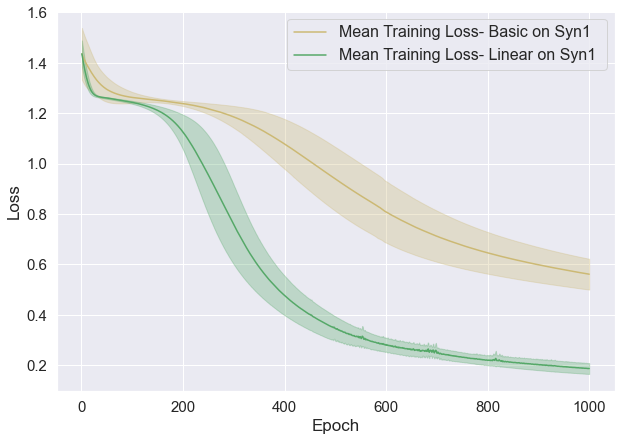

In [9]:
sns.set()

plt.plot(range(1,1001), mean_trainbas1 , 'y-', label='Mean Training Loss- Basic on Syn1 ')
plt.fill_between(range(1,1001), mean_trainbas1 - std_trainbas1, mean_trainbas1 + std_trainbas1, color='y', alpha=0.3)

plt.plot(range(1,1001), mean_trainll1 , 'g-', label='Mean Training Loss- Linear on Syn1 ')
plt.fill_between(range(1,1001), mean_trainll1 - std_trainll1, mean_trainll1 + std_trainll1, color='g', alpha=0.3)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=16, loc='upper right')
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Loss', fontsize=17)

figure = plt.gcf()
figure.set_size_inches(10, 7)
figure.savefig('plots/trainingloss_syn1_newinit.png', dpi=100)

plt.show()

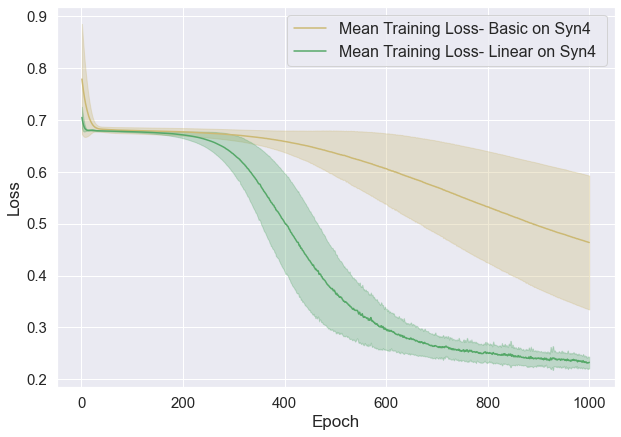

In [10]:
sns.set()

plt.plot(range(1,1001), mean_trainbas4 , 'y-', label='Mean Training Loss- Basic on Syn4 ')
plt.fill_between(range(1,1001), mean_trainbas4 - std_trainbas4, mean_trainbas4 + std_trainbas4, color='y', alpha=0.3)

plt.plot(range(1,1001), mean_trainll4 , 'g-', label='Mean Training Loss- Linear on Syn4 ')
plt.fill_between(range(1,1001), mean_trainll4 - std_trainll4, mean_trainll4 + std_trainll4, color='g', alpha=0.3)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=16, loc='upper right')
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Loss', fontsize=17)

figure = plt.gcf()
figure.set_size_inches(10, 7)
figure.savefig('plots/trainingloss_syn4_newinit.png', dpi=100)

plt.show()

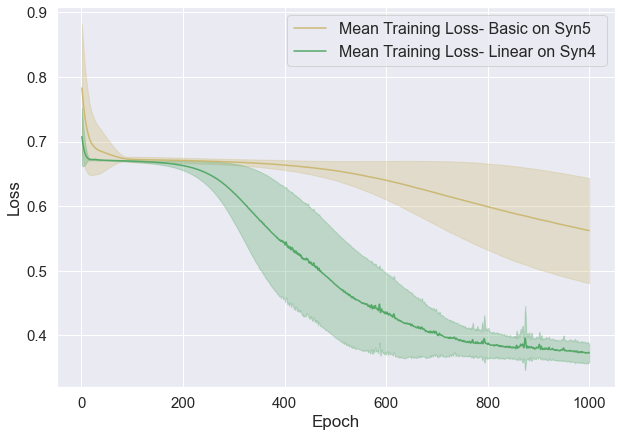

In [11]:
sns.set()

plt.plot(range(1,1001), mean_trainbas5 , 'y-', label='Mean Training Loss- Basic on Syn5 ')
plt.fill_between(range(1,1001), mean_trainbas5 - std_trainbas5, mean_trainbas5 + std_trainbas5, color='y', alpha=0.3)

plt.plot(range(1,1001), mean_trainll5 , 'g-', label='Mean Training Loss- Linear on Syn4 ')
plt.fill_between(range(1,1001), mean_trainll5 - std_trainll5, mean_trainll5 + std_trainll5, color='g', alpha=0.3)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=16, loc='upper right')
plt.xlabel('Epoch', fontsize=17)
plt.ylabel('Loss', fontsize=17)

figure = plt.gcf()
figure.set_size_inches(10, 7)
figure.savefig('plots/trainingloss_syn5_newinit.png', dpi=100)

plt.show()

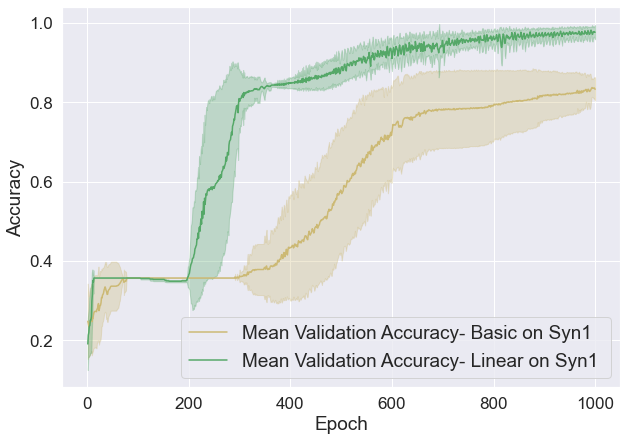

In [12]:
sns.set()

plt.plot(range(1,1001), mean_validbas1 , 'y-', label='Mean Validation Accuracy- Basic on Syn1 ')
plt.fill_between(range(1,1001), mean_validbas1 - std_validbas1, mean_validbas1 + std_validbas1, color='y', alpha=0.3)

plt.plot(range(1,1001), mean_validacclin1 , 'g-', label='Mean Validation Accuracy- Linear on Syn1 ')
plt.fill_between(range(1,1001), mean_validacclin1 - std_validacclin1, mean_validacclin1 + std_validacclin1, color='g', alpha=0.3)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=19, loc='lower right')
plt.xlabel('Epoch', fontsize=19)
plt.ylabel('Accuracy', fontsize=19)

figure = plt.gcf()
figure.set_size_inches(10, 7)
figure.savefig('plots/validacc_syn1_newinit.png', dpi=100)

plt.show()

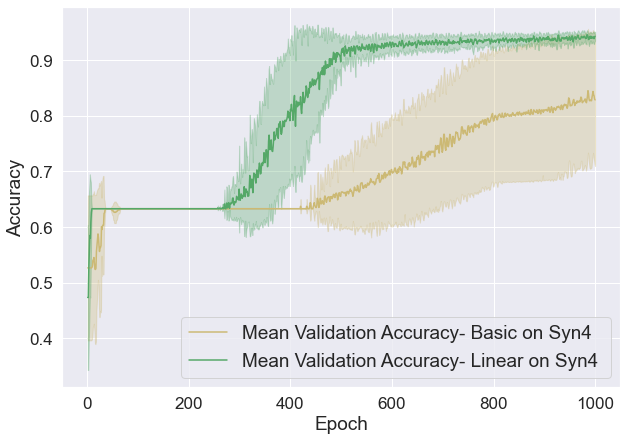

In [13]:
sns.set()

plt.plot(range(1,1001), mean_validbas4 , 'y-', label='Mean Validation Accuracy- Basic on Syn4 ')
plt.fill_between(range(1,1001), mean_validbas4 - std_validbas4, mean_validbas4 + std_validbas4, color='y', alpha=0.3)

plt.plot(range(1,1001), mean_validacclin4 , 'g-', label='Mean Validation Accuracy- Linear on Syn4 ')
plt.fill_between(range(1,1001), mean_validacclin4 - std_validacclin4, mean_validacclin4 + std_validacclin4, color='g', alpha=0.3)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=19, loc='lower right')
plt.xlabel('Epoch', fontsize=19)
plt.ylabel('Accuracy', fontsize=19)

figure = plt.gcf()
figure.set_size_inches(10, 7)
figure.savefig('plots/validacc_syn4_newinit.png', dpi=100)

plt.show()

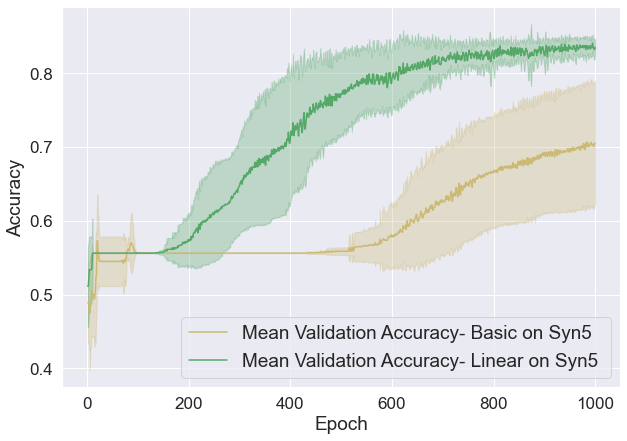

In [14]:
sns.set()

plt.plot(range(1,1001), mean_validbas5 , 'y-', label='Mean Validation Accuracy- Basic on Syn5 ')
plt.fill_between(range(1,1001), mean_validbas5 - std_validbas5, mean_validbas5 + std_validbas5, color='y', alpha=0.3)

plt.plot(range(1,1001), mean_validacclin5 , 'g-', label='Mean Validation Accuracy- Linear on Syn5 ')
plt.fill_between(range(1,1001), mean_validacclin5 - std_validacclin5, mean_validacclin5 + std_validacclin5, color='g', alpha=0.3)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=19, loc='lower right')
plt.xlabel('Epoch', fontsize=19)
plt.ylabel('Accuracy', fontsize=19)

figure = plt.gcf()
figure.set_size_inches(10, 7)
figure.savefig('plots/validacc_syn5_newinit.png', dpi=100)

plt.show()

## Train the best model with the seed and plot some statistics

Looking at the plots, the best model is the one with a linear layer at the end. Therefore, this is now trained on the full dataset and then tested on the test set.

In [15]:
# for the first dataset
np.random.seed(42)
torch.manual_seed(42)
train_loss_syn1, test_acc_syn1, syn_1_model = train_gcn(adjacency_matrix_syn1, features_syn1, labels_syn1, train_indices_full_syn1, test_indices_syn1, type_gcn="linear", initialization="new")

# for the second dataset
np.random.seed(42)
torch.manual_seed(42)
train_loss_syn4, test_acc_syn4, syn_4_model = train_gcn(adjacency_matrix_syn4, features_syn4, labels_syn4, train_indices_full_syn4, test_indices_syn4, type_gcn="linear", initialization="new")

# for the third dataset
np.random.seed(42)
torch.manual_seed(42)
train_loss_syn5, test_acc_syn5, syn_5_model = train_gcn(adjacency_matrix_syn5, features_syn5, labels_syn5, train_indices_full_syn5, test_indices_syn5, type_gcn="linear", initialization="new")

Epoch:  0  , accuracy =  0.12142857142857143
Epoch:  1  , accuracy =  0.12142857142857143
Epoch:  2  , accuracy =  0.12142857142857143
Epoch:  3  , accuracy =  0.12142857142857143
Epoch:  4  , accuracy =  0.12142857142857143
Epoch:  5  , accuracy =  0.12142857142857143
Epoch:  6  , accuracy =  0.12142857142857143
Epoch:  7  , accuracy =  0.44285714285714284
Epoch:  8  , accuracy =  0.44285714285714284
Epoch:  9  , accuracy =  0.44285714285714284
Epoch:  10  , accuracy =  0.44285714285714284
Epoch:  11  , accuracy =  0.44285714285714284
Epoch:  12  , accuracy =  0.44285714285714284
Epoch:  13  , accuracy =  0.44285714285714284
Epoch:  14  , accuracy =  0.44285714285714284
Epoch:  15  , accuracy =  0.44285714285714284
Epoch:  16  , accuracy =  0.44285714285714284
Epoch:  17  , accuracy =  0.44285714285714284
Epoch:  18  , accuracy =  0.44285714285714284
Epoch:  19  , accuracy =  0.44285714285714284
Epoch:  20  , accuracy =  0.44285714285714284
Epoch:  21  , accuracy =  0.4428571428571428

Epoch:  222  , accuracy =  0.8214285714285714
Epoch:  223  , accuracy =  0.8285714285714286
Epoch:  224  , accuracy =  0.8285714285714286
Epoch:  225  , accuracy =  0.8142857142857143
Epoch:  226  , accuracy =  0.8285714285714286
Epoch:  227  , accuracy =  0.8285714285714286
Epoch:  228  , accuracy =  0.8285714285714286
Epoch:  229  , accuracy =  0.8285714285714286
Epoch:  230  , accuracy =  0.8285714285714286
Epoch:  231  , accuracy =  0.8357142857142857
Epoch:  232  , accuracy =  0.8357142857142857
Epoch:  233  , accuracy =  0.8357142857142857
Epoch:  234  , accuracy =  0.8357142857142857
Epoch:  235  , accuracy =  0.8357142857142857
Epoch:  236  , accuracy =  0.8357142857142857
Epoch:  237  , accuracy =  0.8357142857142857
Epoch:  238  , accuracy =  0.8357142857142857
Epoch:  239  , accuracy =  0.8357142857142857
Epoch:  240  , accuracy =  0.8357142857142857
Epoch:  241  , accuracy =  0.8357142857142857
Epoch:  242  , accuracy =  0.8357142857142857
Epoch:  243  , accuracy =  0.83571

Epoch:  452  , accuracy =  0.95
Epoch:  453  , accuracy =  0.95
Epoch:  454  , accuracy =  0.9428571428571428
Epoch:  455  , accuracy =  0.95
Epoch:  456  , accuracy =  0.95
Epoch:  457  , accuracy =  0.95
Epoch:  458  , accuracy =  0.95
Epoch:  459  , accuracy =  0.95
Epoch:  460  , accuracy =  0.95
Epoch:  461  , accuracy =  0.95
Epoch:  462  , accuracy =  0.95
Epoch:  463  , accuracy =  0.95
Epoch:  464  , accuracy =  0.9357142857142857
Epoch:  465  , accuracy =  0.95
Epoch:  466  , accuracy =  0.95
Epoch:  467  , accuracy =  0.95
Epoch:  468  , accuracy =  0.95
Epoch:  469  , accuracy =  0.95
Epoch:  470  , accuracy =  0.95
Epoch:  471  , accuracy =  0.95
Epoch:  472  , accuracy =  0.95
Epoch:  473  , accuracy =  0.95
Epoch:  474  , accuracy =  0.95
Epoch:  475  , accuracy =  0.95
Epoch:  476  , accuracy =  0.95
Epoch:  477  , accuracy =  0.95
Epoch:  478  , accuracy =  0.95
Epoch:  479  , accuracy =  0.95
Epoch:  480  , accuracy =  0.95
Epoch:  481  , accuracy =  0.95
Epoch:  482 

Epoch:  681  , accuracy =  0.9857142857142858
Epoch:  682  , accuracy =  0.95
Epoch:  683  , accuracy =  0.9428571428571428
Epoch:  684  , accuracy =  0.9571428571428572
Epoch:  685  , accuracy =  0.9857142857142858
Epoch:  686  , accuracy =  0.9785714285714285
Epoch:  687  , accuracy =  0.9857142857142858
Epoch:  688  , accuracy =  0.95
Epoch:  689  , accuracy =  0.9428571428571428
Epoch:  690  , accuracy =  0.9571428571428572
Epoch:  691  , accuracy =  0.9857142857142858
Epoch:  692  , accuracy =  0.9785714285714285
Epoch:  693  , accuracy =  0.9857142857142858
Epoch:  694  , accuracy =  0.95
Epoch:  695  , accuracy =  0.9428571428571428
Epoch:  696  , accuracy =  0.9571428571428572
Epoch:  697  , accuracy =  0.9857142857142858
Epoch:  698  , accuracy =  0.9785714285714285
Epoch:  699  , accuracy =  0.9857142857142858
Epoch:  700  , accuracy =  0.95
Epoch:  701  , accuracy =  0.9428571428571428
Epoch:  702  , accuracy =  0.9571428571428572
Epoch:  703  , accuracy =  0.985714285714285

Epoch:  911  , accuracy =  0.9857142857142858
Epoch:  912  , accuracy =  0.9857142857142858
Epoch:  913  , accuracy =  0.9857142857142858
Epoch:  914  , accuracy =  0.9857142857142858
Epoch:  915  , accuracy =  0.9928571428571429
Epoch:  916  , accuracy =  0.9928571428571429
Epoch:  917  , accuracy =  0.9928571428571429
Epoch:  918  , accuracy =  0.9928571428571429
Epoch:  919  , accuracy =  0.9928571428571429
Epoch:  920  , accuracy =  0.9928571428571429
Epoch:  921  , accuracy =  0.9928571428571429
Epoch:  922  , accuracy =  0.9928571428571429
Epoch:  923  , accuracy =  0.9928571428571429
Epoch:  924  , accuracy =  0.9928571428571429
Epoch:  925  , accuracy =  0.9928571428571429
Epoch:  926  , accuracy =  0.9928571428571429
Epoch:  927  , accuracy =  0.9928571428571429
Epoch:  928  , accuracy =  0.9928571428571429
Epoch:  929  , accuracy =  0.9928571428571429
Epoch:  930  , accuracy =  0.9928571428571429
Epoch:  931  , accuracy =  0.9928571428571429
Epoch:  932  , accuracy =  0.99285

Epoch:  98  , accuracy =  0.5485714285714286
Epoch:  99  , accuracy =  0.5485714285714286
Epoch:  100  , accuracy =  0.5485714285714286
Epoch:  101  , accuracy =  0.5485714285714286
Epoch:  102  , accuracy =  0.5485714285714286
Epoch:  103  , accuracy =  0.5485714285714286
Epoch:  104  , accuracy =  0.5485714285714286
Epoch:  105  , accuracy =  0.5485714285714286
Epoch:  106  , accuracy =  0.5485714285714286
Epoch:  107  , accuracy =  0.5485714285714286
Epoch:  108  , accuracy =  0.5485714285714286
Epoch:  109  , accuracy =  0.5485714285714286
Epoch:  110  , accuracy =  0.5485714285714286
Epoch:  111  , accuracy =  0.5485714285714286
Epoch:  112  , accuracy =  0.5485714285714286
Epoch:  113  , accuracy =  0.5485714285714286
Epoch:  114  , accuracy =  0.5485714285714286
Epoch:  115  , accuracy =  0.5485714285714286
Epoch:  116  , accuracy =  0.5485714285714286
Epoch:  117  , accuracy =  0.5485714285714286
Epoch:  118  , accuracy =  0.5485714285714286
Epoch:  119  , accuracy =  0.5485714

Epoch:  291  , accuracy =  0.5485714285714286
Epoch:  292  , accuracy =  0.5485714285714286
Epoch:  293  , accuracy =  0.5485714285714286
Epoch:  294  , accuracy =  0.5485714285714286
Epoch:  295  , accuracy =  0.5485714285714286
Epoch:  296  , accuracy =  0.5485714285714286
Epoch:  297  , accuracy =  0.5485714285714286
Epoch:  298  , accuracy =  0.5485714285714286
Epoch:  299  , accuracy =  0.5485714285714286
Epoch:  300  , accuracy =  0.5485714285714286
Epoch:  301  , accuracy =  0.5485714285714286
Epoch:  302  , accuracy =  0.5485714285714286
Epoch:  303  , accuracy =  0.5485714285714286
Epoch:  304  , accuracy =  0.5485714285714286
Epoch:  305  , accuracy =  0.5485714285714286
Epoch:  306  , accuracy =  0.5485714285714286
Epoch:  307  , accuracy =  0.5485714285714286
Epoch:  308  , accuracy =  0.5485714285714286
Epoch:  309  , accuracy =  0.5485714285714286
Epoch:  310  , accuracy =  0.5485714285714286
Epoch:  311  , accuracy =  0.5485714285714286
Epoch:  312  , accuracy =  0.54857

Epoch:  491  , accuracy =  0.9085714285714286
Epoch:  492  , accuracy =  0.8971428571428571
Epoch:  493  , accuracy =  0.8457142857142858
Epoch:  494  , accuracy =  0.8514285714285714
Epoch:  495  , accuracy =  0.8971428571428571
Epoch:  496  , accuracy =  0.9028571428571428
Epoch:  497  , accuracy =  0.8857142857142857
Epoch:  498  , accuracy =  0.8914285714285715
Epoch:  499  , accuracy =  0.92
Epoch:  500  , accuracy =  0.92
Epoch:  501  , accuracy =  0.8857142857142857
Epoch:  502  , accuracy =  0.8914285714285715
Epoch:  503  , accuracy =  0.9142857142857143
Epoch:  504  , accuracy =  0.8971428571428571
Epoch:  505  , accuracy =  0.8685714285714285
Epoch:  506  , accuracy =  0.8914285714285715
Epoch:  507  , accuracy =  0.92
Epoch:  508  , accuracy =  0.9142857142857143
Epoch:  509  , accuracy =  0.8685714285714285
Epoch:  510  , accuracy =  0.8685714285714285
Epoch:  511  , accuracy =  0.9085714285714286
Epoch:  512  , accuracy =  0.9085714285714286
Epoch:  513  , accuracy =  0.8

Epoch:  700  , accuracy =  0.9085714285714286
Epoch:  701  , accuracy =  0.9142857142857143
Epoch:  702  , accuracy =  0.9085714285714286
Epoch:  703  , accuracy =  0.9142857142857143
Epoch:  704  , accuracy =  0.9142857142857143
Epoch:  705  , accuracy =  0.9085714285714286
Epoch:  706  , accuracy =  0.9085714285714286
Epoch:  707  , accuracy =  0.9142857142857143
Epoch:  708  , accuracy =  0.9142857142857143
Epoch:  709  , accuracy =  0.9085714285714286
Epoch:  710  , accuracy =  0.9085714285714286
Epoch:  711  , accuracy =  0.9142857142857143
Epoch:  712  , accuracy =  0.9142857142857143
Epoch:  713  , accuracy =  0.9142857142857143
Epoch:  714  , accuracy =  0.9142857142857143
Epoch:  715  , accuracy =  0.9085714285714286
Epoch:  716  , accuracy =  0.9085714285714286
Epoch:  717  , accuracy =  0.9085714285714286
Epoch:  718  , accuracy =  0.9142857142857143
Epoch:  719  , accuracy =  0.9085714285714286
Epoch:  720  , accuracy =  0.9085714285714286
Epoch:  721  , accuracy =  0.91428

Epoch:  933  , accuracy =  0.92
Epoch:  934  , accuracy =  0.9142857142857143
Epoch:  935  , accuracy =  0.9085714285714286
Epoch:  936  , accuracy =  0.9085714285714286
Epoch:  937  , accuracy =  0.9085714285714286
Epoch:  938  , accuracy =  0.9142857142857143
Epoch:  939  , accuracy =  0.92
Epoch:  940  , accuracy =  0.9142857142857143
Epoch:  941  , accuracy =  0.9142857142857143
Epoch:  942  , accuracy =  0.9085714285714286
Epoch:  943  , accuracy =  0.9142857142857143
Epoch:  944  , accuracy =  0.92
Epoch:  945  , accuracy =  0.92
Epoch:  946  , accuracy =  0.9142857142857143
Epoch:  947  , accuracy =  0.9142857142857143
Epoch:  948  , accuracy =  0.9142857142857143
Epoch:  949  , accuracy =  0.9142857142857143
Epoch:  950  , accuracy =  0.9142857142857143
Epoch:  951  , accuracy =  0.9142857142857143
Epoch:  952  , accuracy =  0.9142857142857143
Epoch:  953  , accuracy =  0.9142857142857143
Epoch:  954  , accuracy =  0.9142857142857143
Epoch:  955  , accuracy =  0.914285714285714

Epoch:  154  , accuracy =  0.562753036437247
Epoch:  155  , accuracy =  0.562753036437247
Epoch:  156  , accuracy =  0.562753036437247
Epoch:  157  , accuracy =  0.562753036437247
Epoch:  158  , accuracy =  0.562753036437247
Epoch:  159  , accuracy =  0.562753036437247
Epoch:  160  , accuracy =  0.562753036437247
Epoch:  161  , accuracy =  0.562753036437247
Epoch:  162  , accuracy =  0.562753036437247
Epoch:  163  , accuracy =  0.562753036437247
Epoch:  164  , accuracy =  0.562753036437247
Epoch:  165  , accuracy =  0.562753036437247
Epoch:  166  , accuracy =  0.562753036437247
Epoch:  167  , accuracy =  0.562753036437247
Epoch:  168  , accuracy =  0.562753036437247
Epoch:  169  , accuracy =  0.562753036437247
Epoch:  170  , accuracy =  0.562753036437247
Epoch:  171  , accuracy =  0.562753036437247
Epoch:  172  , accuracy =  0.562753036437247
Epoch:  173  , accuracy =  0.562753036437247
Epoch:  174  , accuracy =  0.562753036437247
Epoch:  175  , accuracy =  0.562753036437247
Epoch:  17

Epoch:  372  , accuracy =  0.7327935222672065
Epoch:  373  , accuracy =  0.7327935222672065
Epoch:  374  , accuracy =  0.7125506072874493
Epoch:  375  , accuracy =  0.7165991902834008
Epoch:  376  , accuracy =  0.728744939271255
Epoch:  377  , accuracy =  0.7327935222672065
Epoch:  378  , accuracy =  0.7165991902834008
Epoch:  379  , accuracy =  0.7246963562753036
Epoch:  380  , accuracy =  0.7246963562753036
Epoch:  381  , accuracy =  0.728744939271255
Epoch:  382  , accuracy =  0.7327935222672065
Epoch:  383  , accuracy =  0.7044534412955465
Epoch:  384  , accuracy =  0.7165991902834008
Epoch:  385  , accuracy =  0.7327935222672065
Epoch:  386  , accuracy =  0.7327935222672065
Epoch:  387  , accuracy =  0.6923076923076923
Epoch:  388  , accuracy =  0.7327935222672065
Epoch:  389  , accuracy =  0.7327935222672065
Epoch:  390  , accuracy =  0.6882591093117408
Epoch:  391  , accuracy =  0.7327935222672065
Epoch:  392  , accuracy =  0.7368421052631579
Epoch:  393  , accuracy =  0.6923076

Epoch:  586  , accuracy =  0.8299595141700404
Epoch:  587  , accuracy =  0.8097165991902834
Epoch:  588  , accuracy =  0.805668016194332
Epoch:  589  , accuracy =  0.7975708502024291
Epoch:  590  , accuracy =  0.8340080971659919
Epoch:  591  , accuracy =  0.8259109311740891
Epoch:  592  , accuracy =  0.8137651821862348
Epoch:  593  , accuracy =  0.8178137651821862
Epoch:  594  , accuracy =  0.8259109311740891
Epoch:  595  , accuracy =  0.8259109311740891
Epoch:  596  , accuracy =  0.805668016194332
Epoch:  597  , accuracy =  0.8097165991902834
Epoch:  598  , accuracy =  0.8259109311740891
Epoch:  599  , accuracy =  0.8259109311740891
Epoch:  600  , accuracy =  0.8259109311740891
Epoch:  601  , accuracy =  0.8259109311740891
Epoch:  602  , accuracy =  0.8380566801619433
Epoch:  603  , accuracy =  0.8380566801619433
Epoch:  604  , accuracy =  0.8218623481781376
Epoch:  605  , accuracy =  0.8299595141700404
Epoch:  606  , accuracy =  0.8380566801619433
Epoch:  607  , accuracy =  0.8380566

Epoch:  807  , accuracy =  0.8340080971659919
Epoch:  808  , accuracy =  0.8502024291497976
Epoch:  809  , accuracy =  0.8704453441295547
Epoch:  810  , accuracy =  0.8582995951417004
Epoch:  811  , accuracy =  0.8825910931174089
Epoch:  812  , accuracy =  0.8623481781376519
Epoch:  813  , accuracy =  0.8623481781376519
Epoch:  814  , accuracy =  0.8825910931174089
Epoch:  815  , accuracy =  0.8461538461538461
Epoch:  816  , accuracy =  0.8461538461538461
Epoch:  817  , accuracy =  0.8704453441295547
Epoch:  818  , accuracy =  0.8461538461538461
Epoch:  819  , accuracy =  0.8380566801619433
Epoch:  820  , accuracy =  0.8340080971659919
Epoch:  821  , accuracy =  0.8785425101214575
Epoch:  822  , accuracy =  0.8380566801619433
Epoch:  823  , accuracy =  0.8016194331983806
Epoch:  824  , accuracy =  0.805668016194332
Epoch:  825  , accuracy =  0.854251012145749
Epoch:  826  , accuracy =  0.8582995951417004
Epoch:  827  , accuracy =  0.8380566801619433
Epoch:  828  , accuracy =  0.8461538

# Plot the data on the training and test set

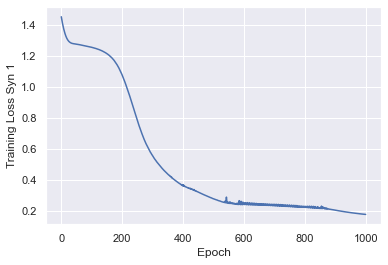

In [16]:
plt.plot(train_loss_syn1)
plt.xlabel("Epoch")
plt.ylabel("Training Loss Syn 1")
plt.savefig('plots/train_loss_final_syn1_newinit.png', dpi=100)
plt.show()

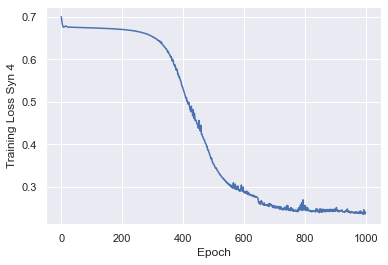

In [17]:
plt.plot(train_loss_syn4)
plt.xlabel("Epoch")
plt.ylabel("Training Loss Syn 4")
plt.savefig('plots/train_loss_final_syn4_newinit.png', dpi=100)
plt.show()

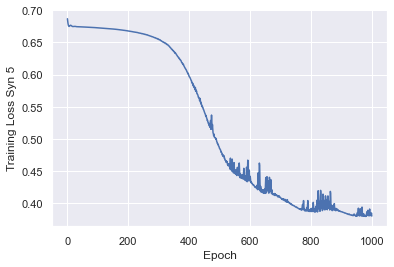

In [18]:
plt.plot(train_loss_syn5)
plt.xlabel("Epoch")
plt.ylabel("Training Loss Syn 5")
plt.savefig('plots/train_loss_final_syn5_newinit.png', dpi=100)
plt.show()

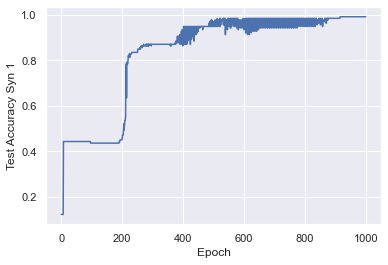

In [19]:
plt.plot(test_acc_syn1)
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy Syn 1")
plt.savefig('plots/test_acc_final_syn1_newinit.png', dpi=100)
plt.show()

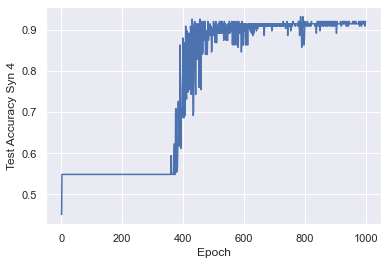

In [20]:
plt.plot(test_acc_syn4)
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy Syn 4")
plt.savefig('plots/test_acc_final_syn4_newinit.png', dpi=100)
plt.show()

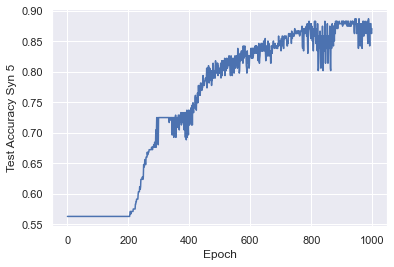

In [21]:
plt.plot(test_acc_syn5)
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy Syn 5")
plt.savefig('plots/test_acc_final_syn5_newinit.png', dpi=100)
plt.show()

In [22]:
from sklearn.metrics import accuracy_score

# test accuracy on the models eventually:
syn_1_model.eval()
sparse_adj_1 = get_sparse_adjacency_normalized(features_syn1.shape[0], adjacency_matrix_syn1)
eval_1 = syn_1_model(features_syn1, sparse_adj_1)

# get predictions and print accuracy
_, predictions_1 = torch.max(eval_1.data, 1)
print("Test accuracy of Syn1 data: ", accuracy_score(labels_syn1[test_indices_syn1], predictions_1[test_indices_syn1]))

syn_4_model.eval()
sparse_adj_4 = get_sparse_adjacency_normalized(features_syn4.shape[0], adjacency_matrix_syn4)
eval_4 = syn_4_model(features_syn4, sparse_adj_4)

# get predictions and print accuracy
_, predictions_4 = torch.max(eval_4.data, 1)
print("Test accuracy of Syn4 data: ", accuracy_score(labels_syn4[test_indices_syn4], predictions_4[test_indices_syn4]))

syn_5_model.eval()
sparse_adj_5 = get_sparse_adjacency_normalized(features_syn5.shape[0], adjacency_matrix_syn5)
eval_5 = syn_5_model(features_syn5, sparse_adj_5)

# get predictions and print accuracy
_, predictions_5 = torch.max(eval_5.data, 1)
print("Test accuracy of Syn5 data: ", accuracy_score(labels_syn5[test_indices_syn5], predictions_5[test_indices_syn5]))

syn_1_model.train()
syn_4_model.train()
syn_5_model.train();

Test accuracy of Syn1 data:  0.9928571428571429
Test accuracy of Syn4 data:  0.9142857142857143
Test accuracy of Syn5 data:  0.8623481781376519


# Save the models

In [23]:
import os

if not os.path.exists("models"):
   os.makedirs("models")

In [24]:
torch.save(syn_1_model, 'models/syn1model.pt')
torch.save(syn_4_model, 'models/syn4model.pt')
torch.save(syn_5_model, 'models/syn5model.pt')